In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')

Matplotlib is building the font cache; this may take a moment.


D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [3]:
df_merged = pd.read_csv("E:\\Projects\\KAIHO\\Data\\Kaiho_merged_data.csv")

In [6]:
df_spec = df_merged[['Tên xe_車名','Model xe_車輌型式','Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式','D/G_Ｄ／Ｇ','Thành tích bán ra_販売実績']]
df_spec.fillna(value=0,inplace=True)
df_spec['Năm sản xuất_年式'] = df_spec['Năm sản xuất_年式'].astype(int)
df_spec.dtypes

<ipython-input-6-767a03f1248a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spec['Năm sản xuất_年式'] = df_spec['Năm sản xuất_年式'].astype(int)


Tên xe_車名                  object
Model xe_車輌型式              object
Engine model_エンジン型式        object
Truyền động 1_駆動1          object
Truyền động 2_駆動2          object
TM_TM                      object
Năm sản xuất_年式             int32
D/G_Ｄ／Ｇ                    object
Thành tích bán ra_販売実績    float64
dtype: object

In [6]:
df_spec.isnull().sum()

Tên xe_車名                   0
Model xe_車輌型式               1
Engine model_エンジン型式         3
Truyền động 1_駆動1           2
Truyền động 2_駆動2          73
TM_TM                      73
Năm sản xuất_年式           369
D/G_Ｄ／Ｇ                     8
Thành tích bán ra_販売実績      0
dtype: int64

In [5]:
df_spec.nunique()

Tên xe_車名                  496
Model xe_車輌型式             1588
Engine model_エンジン型式        537
Truyền động 1_駆動1            5
Truyền động 2_駆動2            4
TM_TM                        4
Năm sản xuất_年式             58
D/G_Ｄ／Ｇ                      3
Thành tích bán ra_販売実績     436
dtype: int64

In [7]:
sum_dt = df_spec['Thành tích bán ra_販売実績'].sum()

In [10]:
sum_ten_xe = df_spec.groupby(['Tên xe_車名'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_ten_xe['percent_value']  = round(sum_ten_xe['sum']/sum_dt*100,2)
sum_ten_xe['sum']  = round(sum_ten_xe['sum'],2)
sum_ten_xe = sum_ten_xe.sort_values(by='percent_value', ascending=True)
sum_thresh  = sum_ten_xe[sum_ten_xe['percent_value'] > 0.5]
print(sum_thresh['percent_value'].max())
print(sum_thresh['percent_value'].sum())

4.37
66.14


In [11]:
sum_5_best_tenxe = sum_thresh.nlargest(5,'percent_value')
sum_5_best_tenxe

Tên xe_車名         sum  percent_value
193     ｴｽﾃｨﾏ  33273759.0           4.37
127      レガシィ  20895128.0           2.74
69      カルディナ  18250683.0           2.40
240      ｸﾗｳﾝ  17081521.5           2.24
120     マークII  16234824.0           2.13

In [73]:
sum_model_xe = df_spec.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_model_xe['percent_value']  = round(sum_model_xe['sum']/sum_dt*100,3)
sum_model_xe['sum']  = round(sum_model_xe['sum'],2)
sum_model_xe = sum_model_xe.sort_values(by='percent_value', ascending=True)
sum_thresh_model_xe  = sum_model_xe[sum_model_xe['percent_value'] >= 0.5]
print(sum_model_xe['percent_value'].max())
sum_thresh_model_xe.shape[0]

1.284


33

In [74]:
sum_5_best_modelxe = sum_thresh_model_xe.nlargest(6,'percent_value')
sum_thresh_model_xe['percent_value'].sum()

25.118000000000002

5.321


<AxesSubplot:xlabel='percent_value', ylabel='Engine model_エンジン型式'>

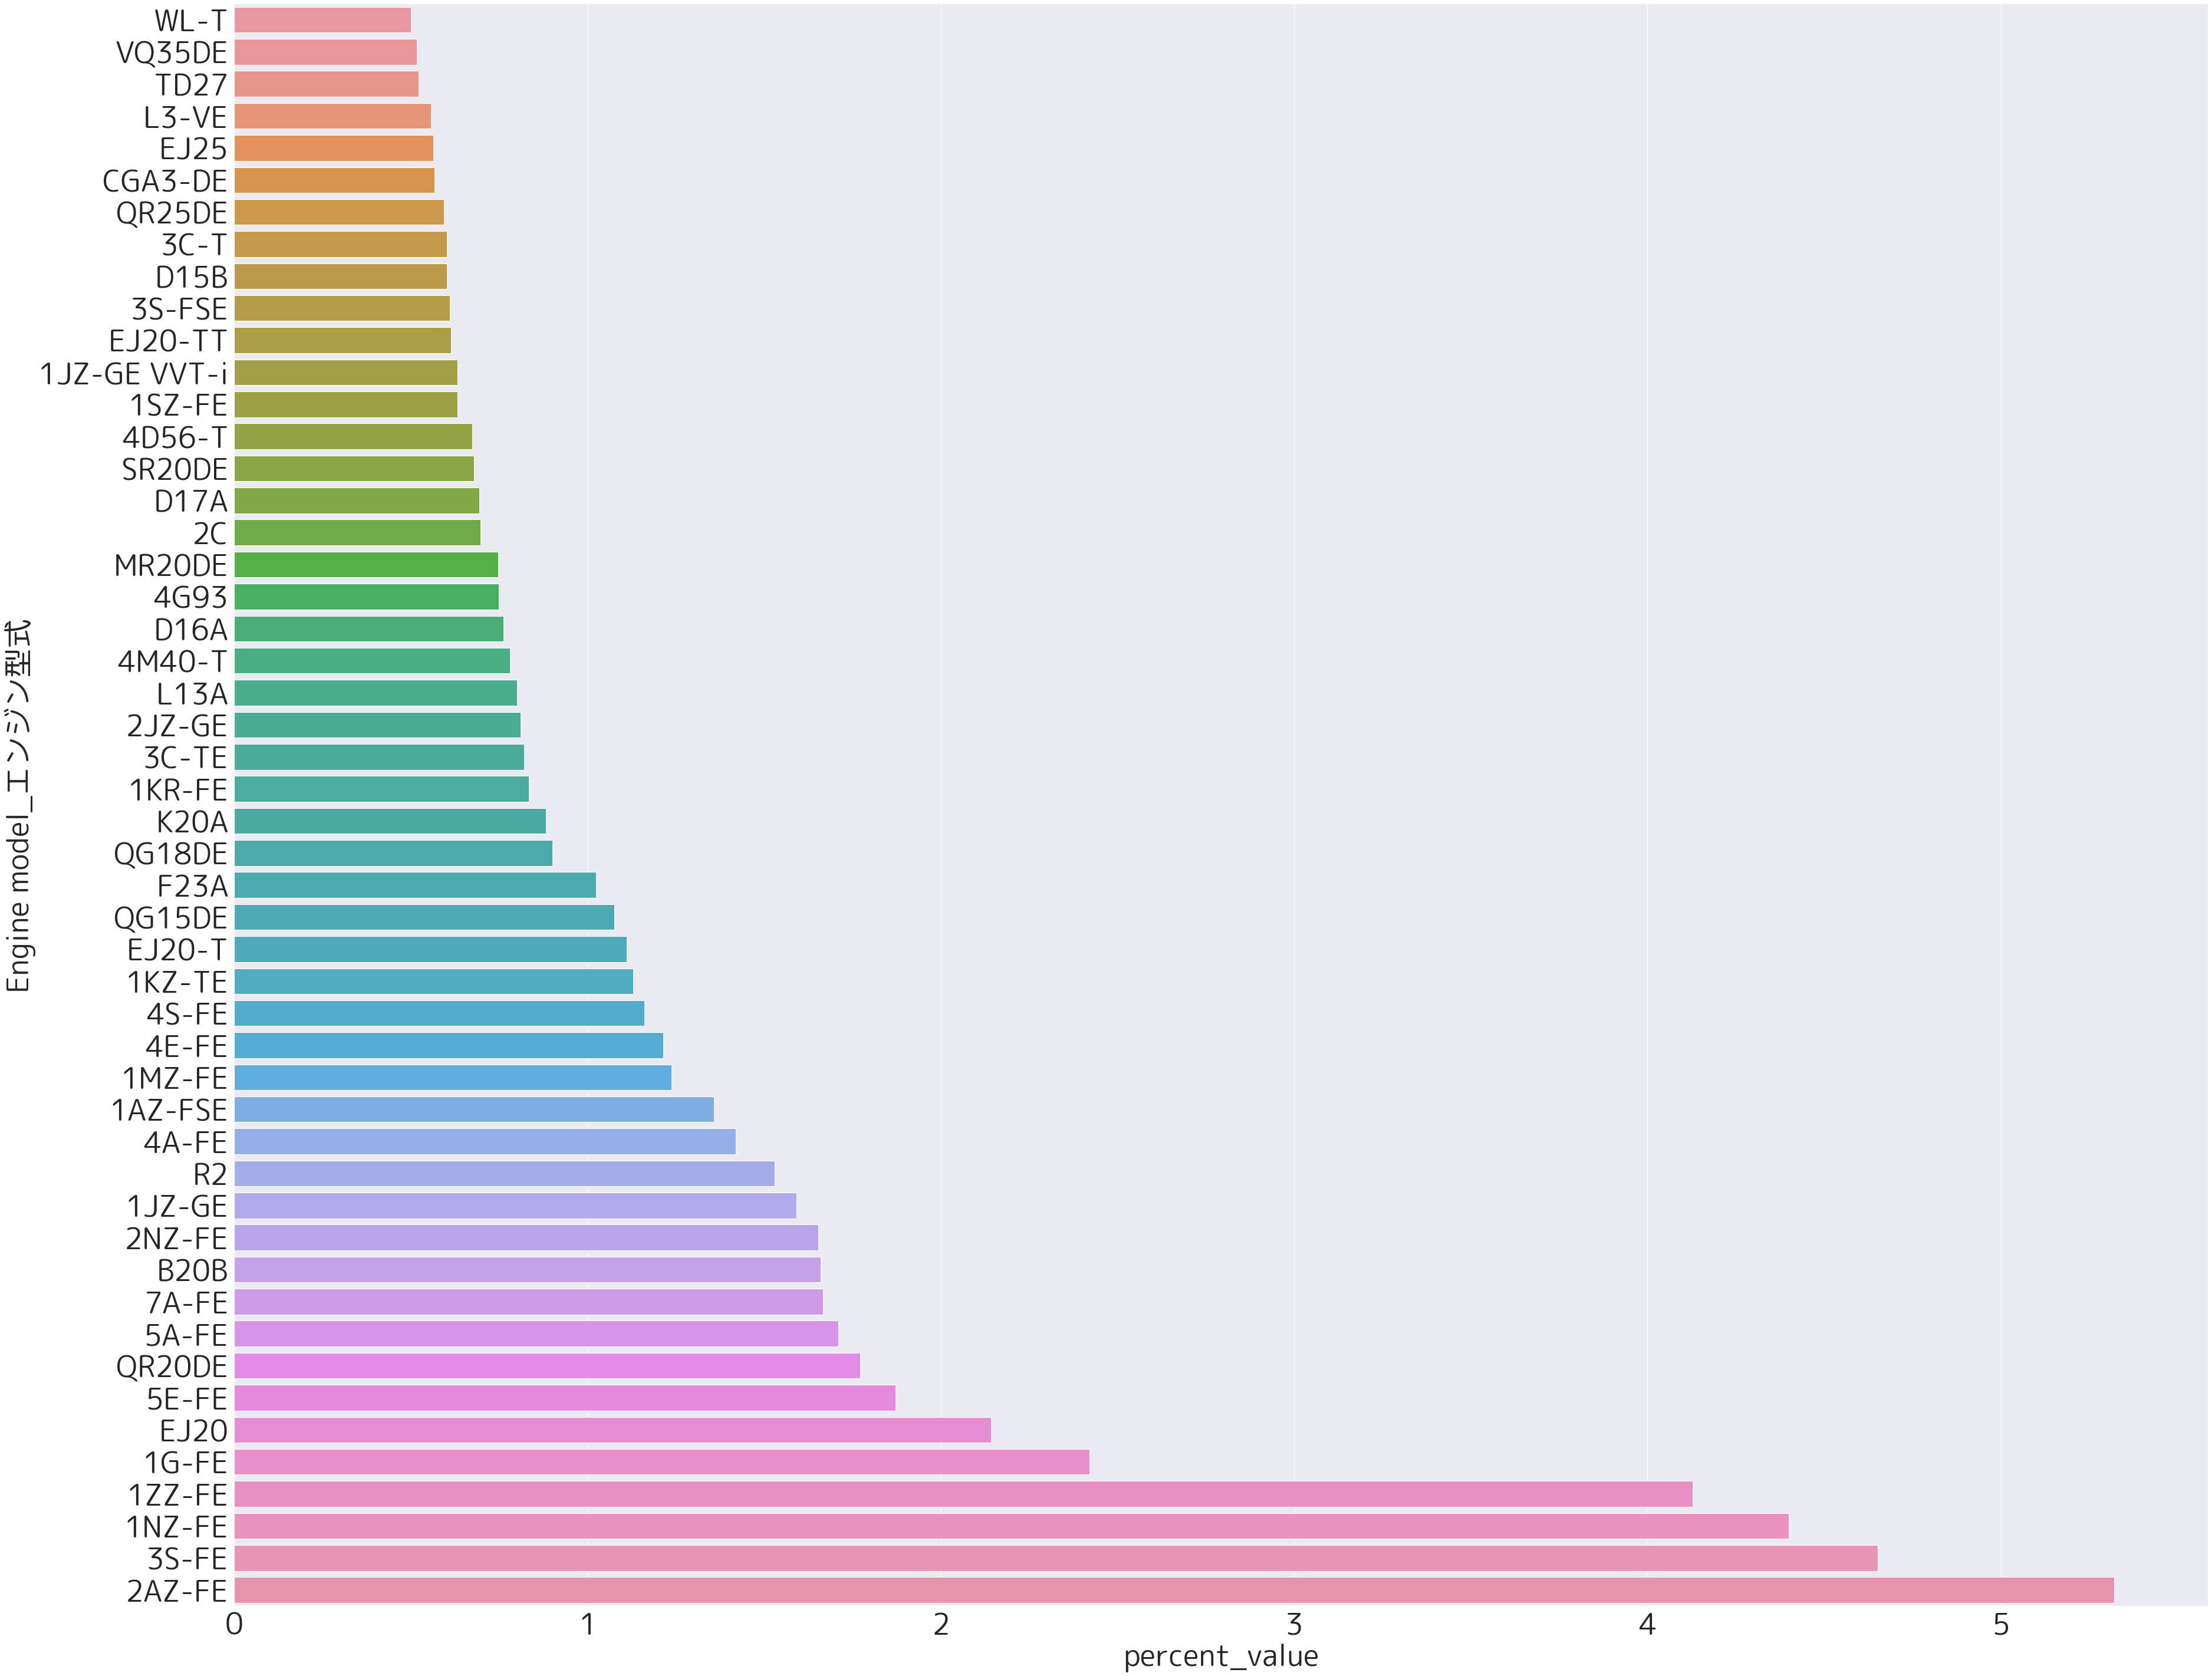

In [87]:
sum_engine_model = df_spec.groupby(['Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_engine_model['percent_value']  = round(sum_engine_model['sum']/sum_dt*100,3)
sum_engine_model['sum']  = round(sum_model_xe['sum'],2)
sum_engine_model = sum_engine_model.sort_values(by='percent_value', ascending=True)
sum_thresh_engine_model  = sum_engine_model[sum_engine_model['percent_value'] >= 0.5]
print(sum_engine_model['percent_value'].max())
sum_thresh_engine_model.shape[0]
plt.figure(figsize=(60,50))
plt.xticks(fontsize = 50)
plt.xlabel(xlabel = 'Engine model_エンジン型式',fontsize = 50)
plt.yticks(fontsize = 50)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 50)
sns.barplot(y='Engine model_エンジン型式',x='percent_value',data=sum_thresh_engine_model,ci=None)

In [77]:
sum_5_best_modelengine = sum_thresh_engine_model.nlargest(5,'percent_value')
sum_thresh_engine_model['percent_value'].sum()

65.581

  Truyền động 1_駆動1      sum  percent_value
2                RR  35000.0           0.12
3               W/O   9000.0           0.33
1                FR  30000.0          25.94
0                FF  30000.0          73.59


<AxesSubplot:xlabel='percent_value', ylabel='Truyền động 1_駆動1'>

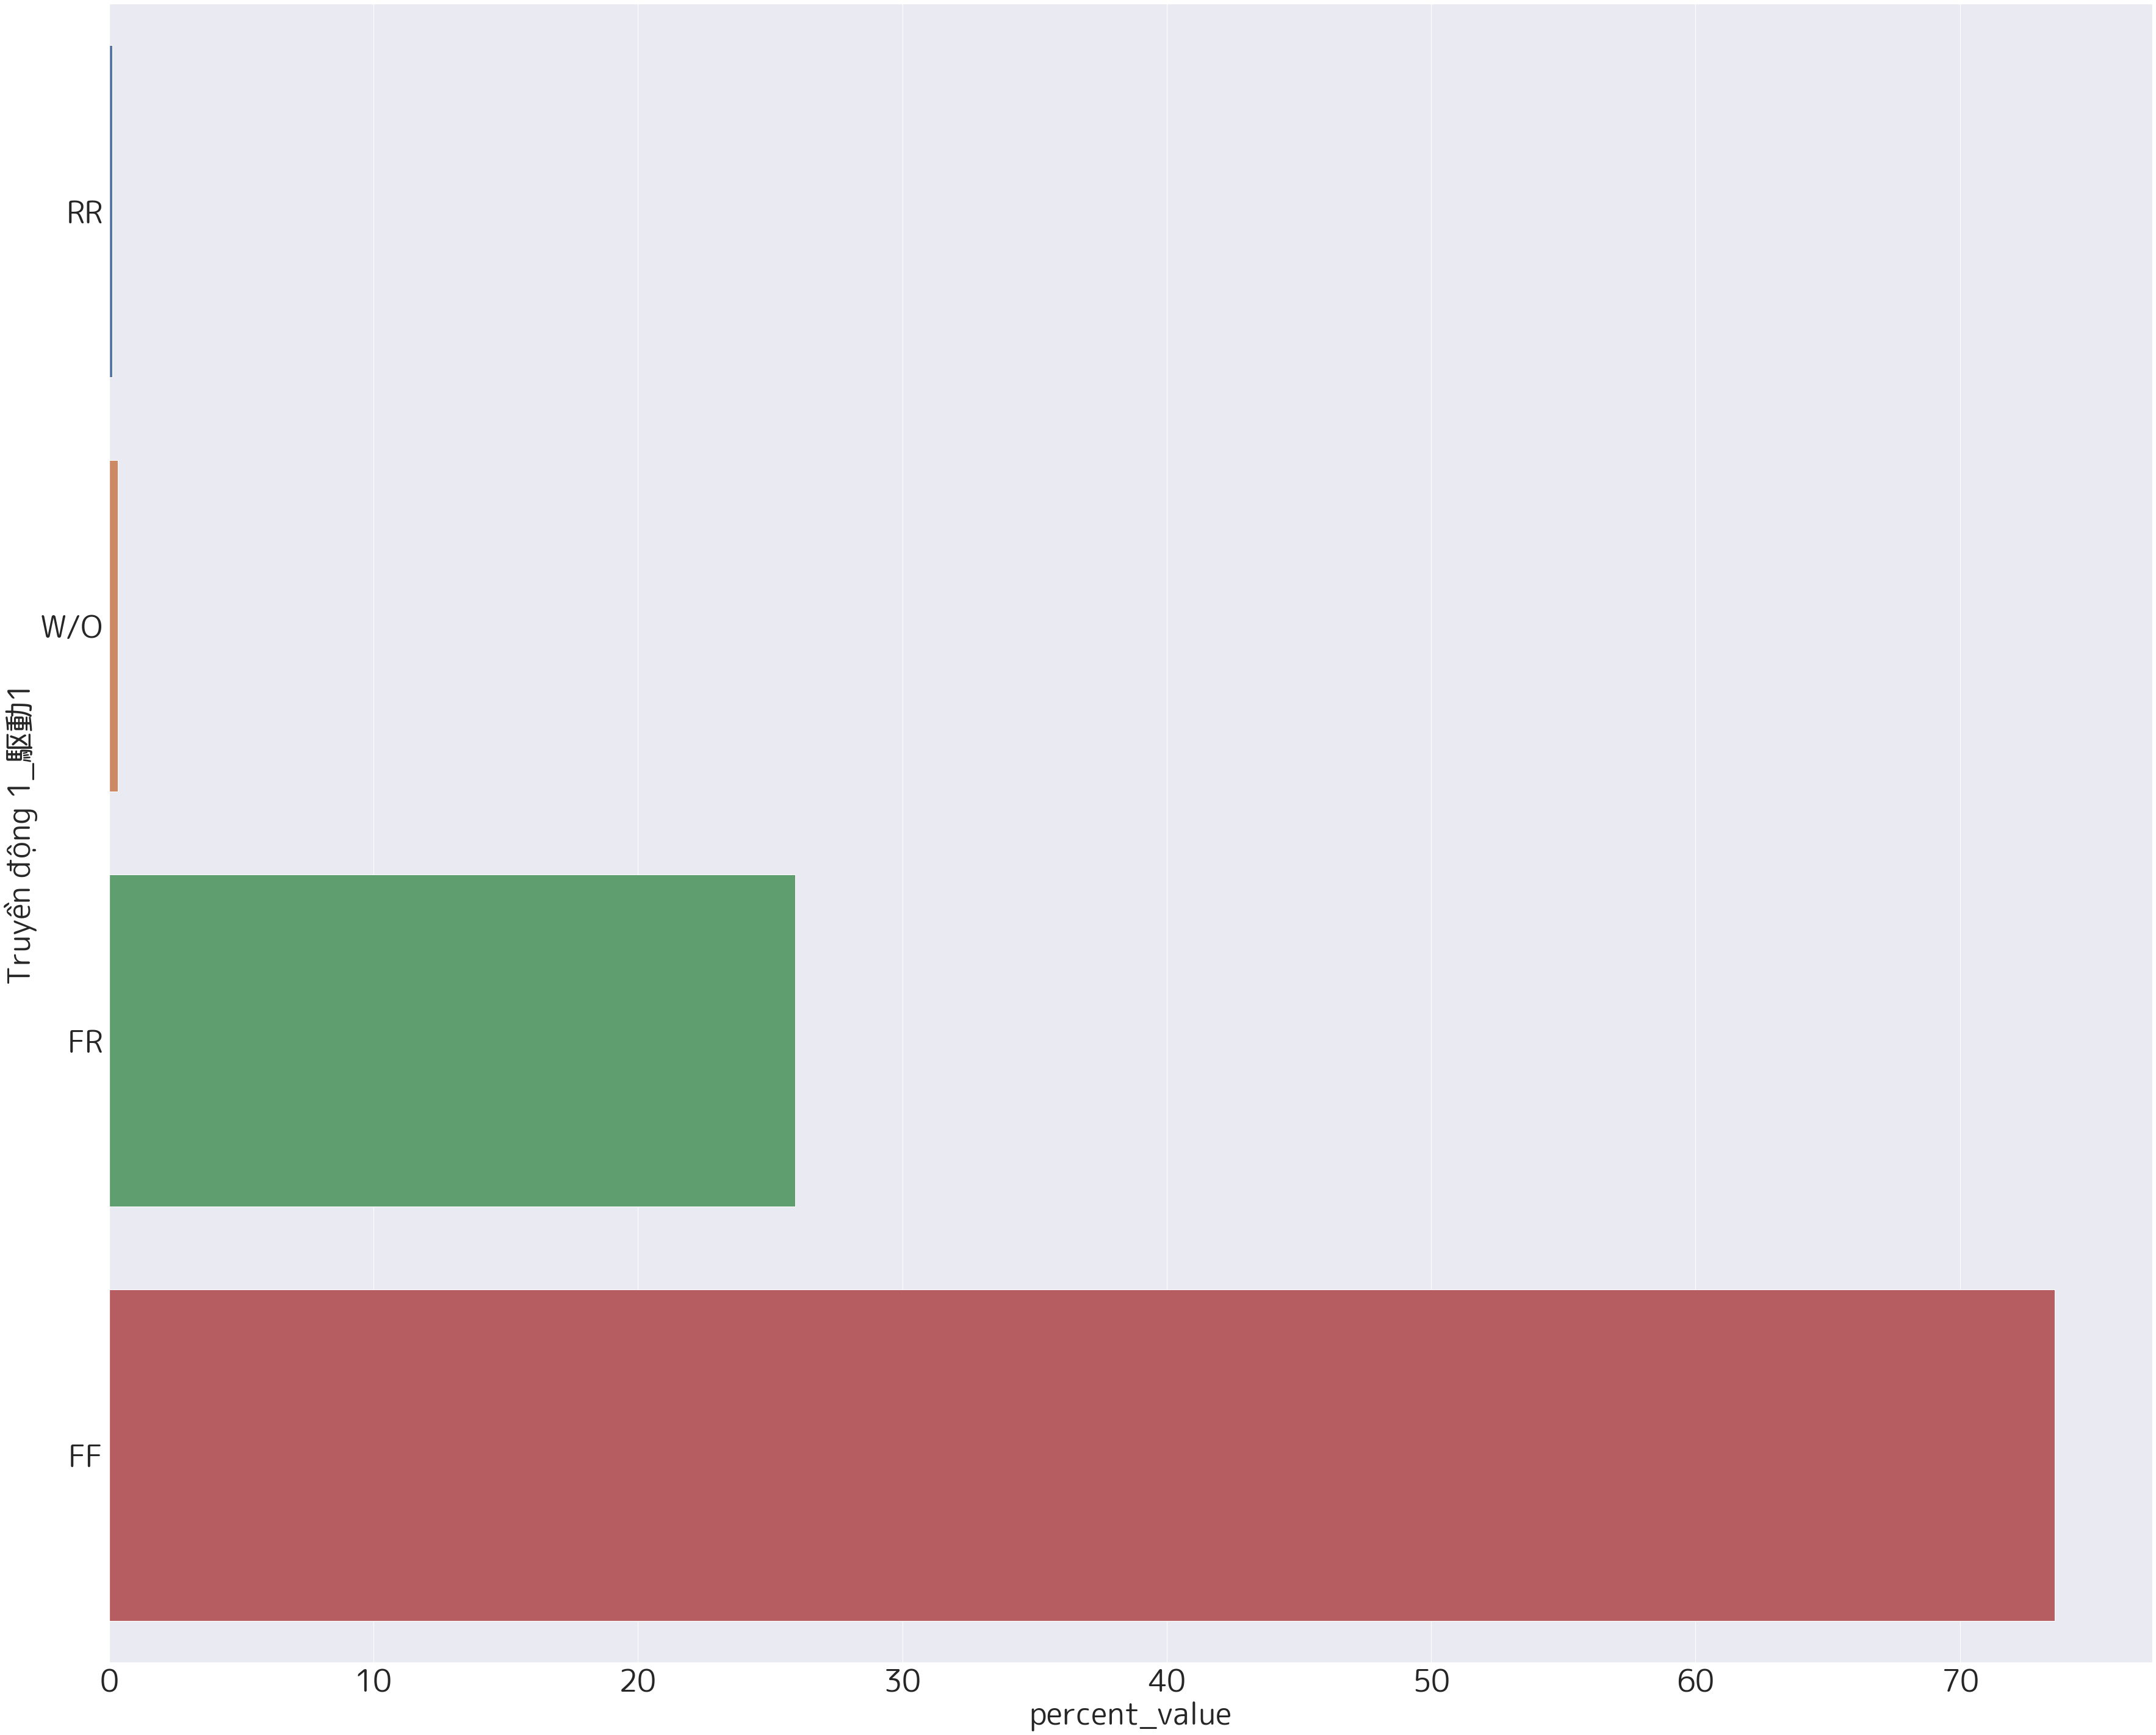

In [85]:
sum_engine_model = df_spec.groupby(['Truyền động 1_駆動1'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_engine_model['percent_value']  = round(sum_engine_model['sum']/sum_dt*100,2)
sum_engine_model['sum']  = round(sum_model_xe['sum'],2)
sum_engine_model = sum_engine_model.sort_values(by='percent_value', ascending=True)
sum_thresh_engine_model  = sum_engine_model[sum_engine_model['percent_value'] >= 0.0]
print(sum_thresh_engine_model)
plt.figure(figsize=(60,50))
plt.xticks(fontsize = 50)
plt.xlabel(xlabel = 'Model xe_車輌型式',fontsize = 50)
plt.yticks(fontsize = 50)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 50)
sns.barplot(y='Truyền động 1_駆動1',x='percent_value',data=sum_engine_model,ci=None)

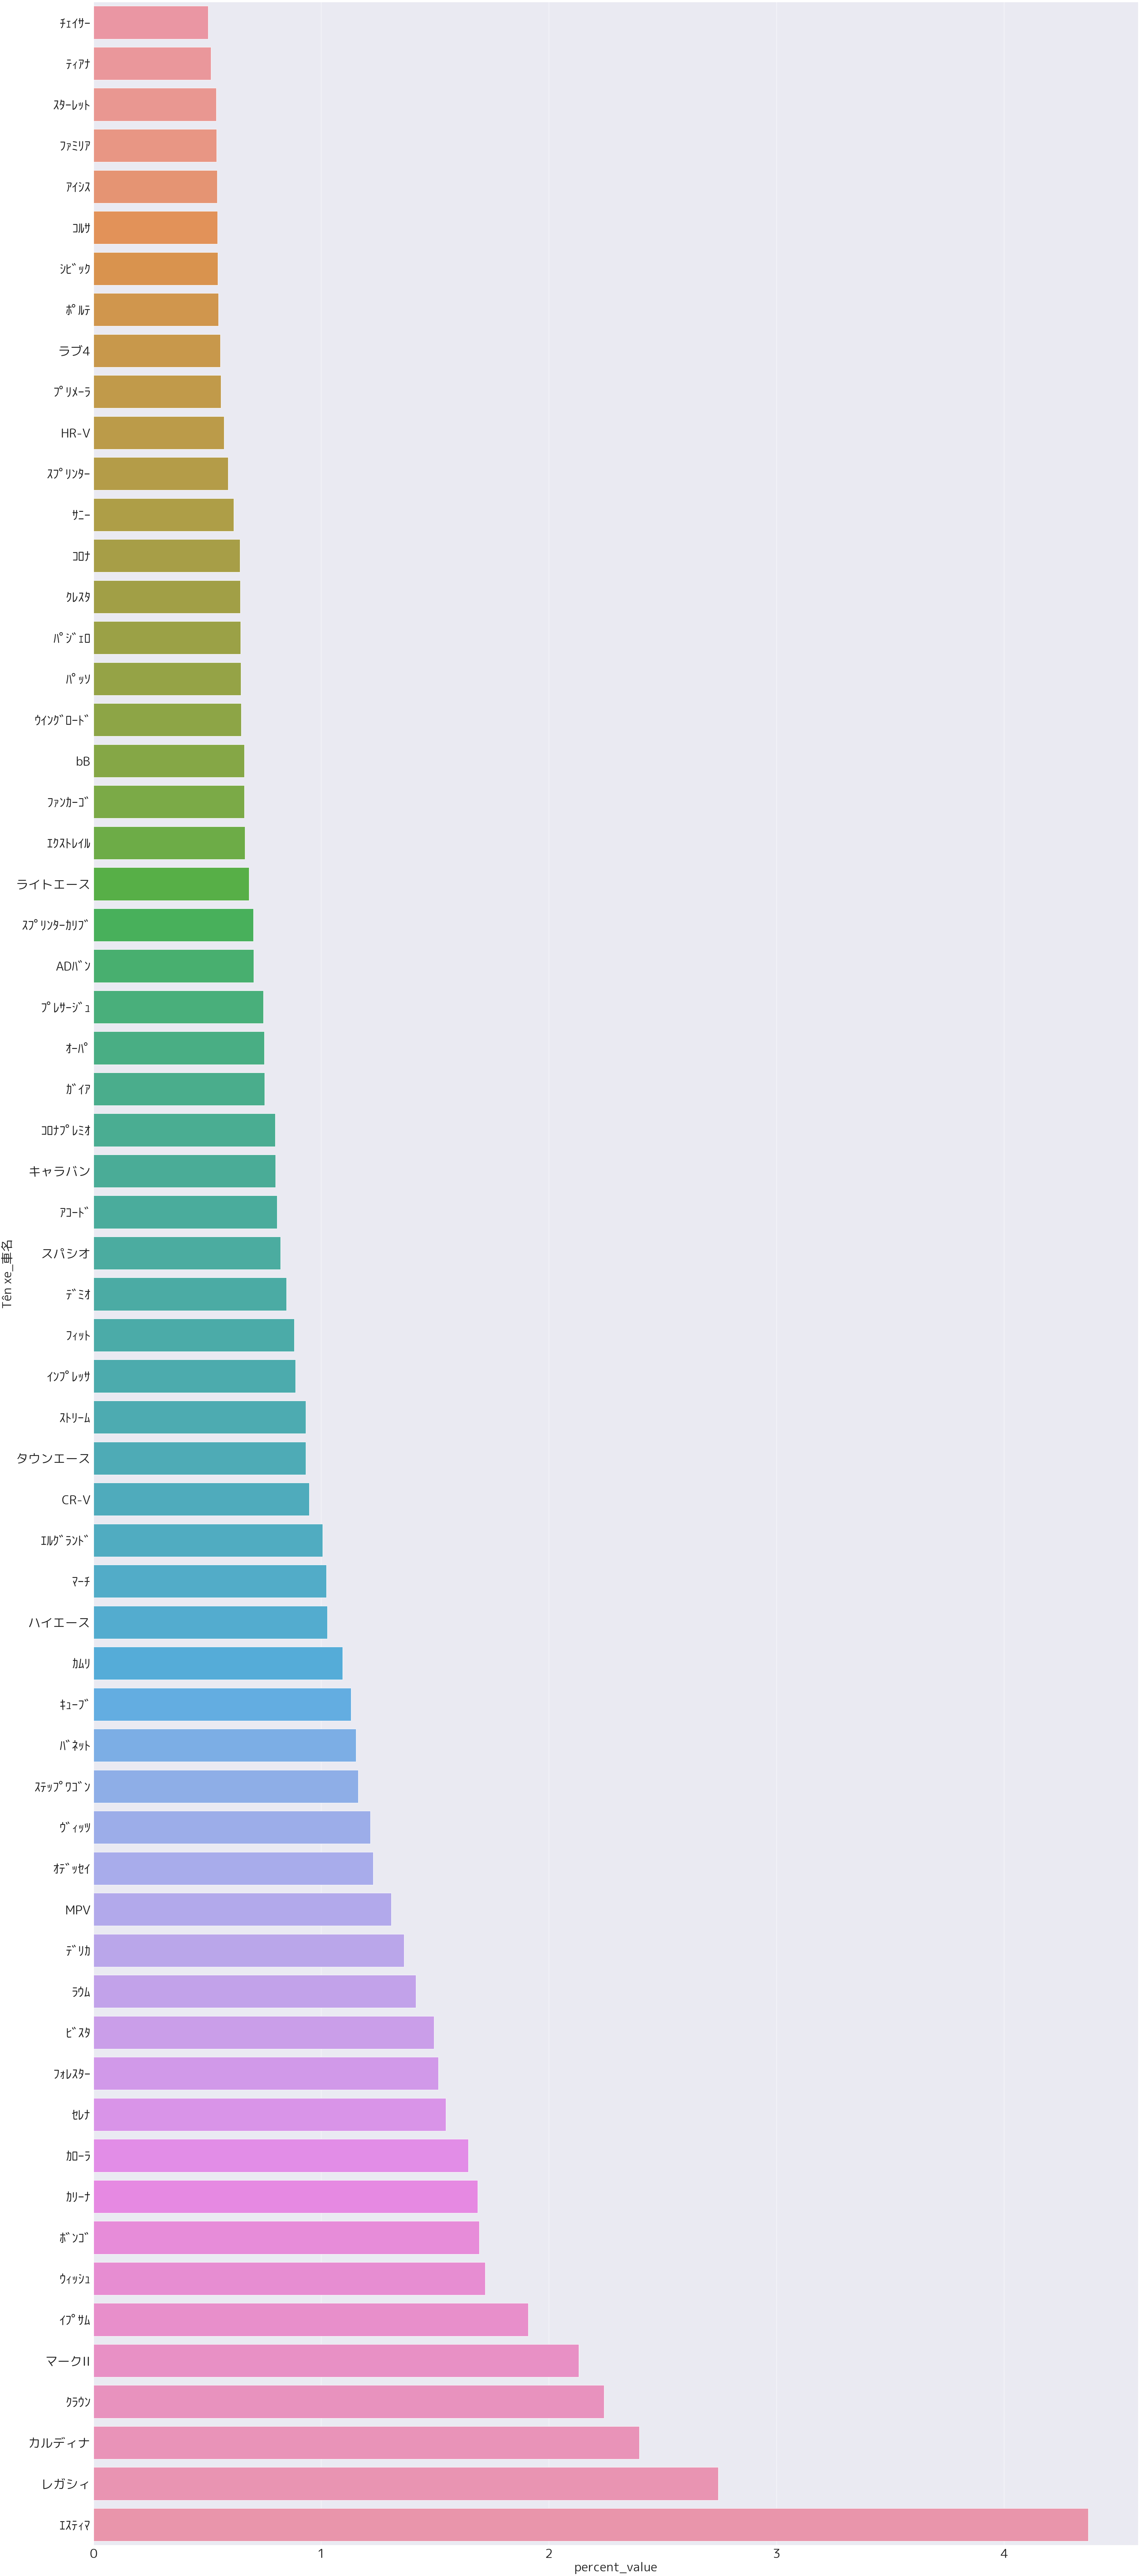

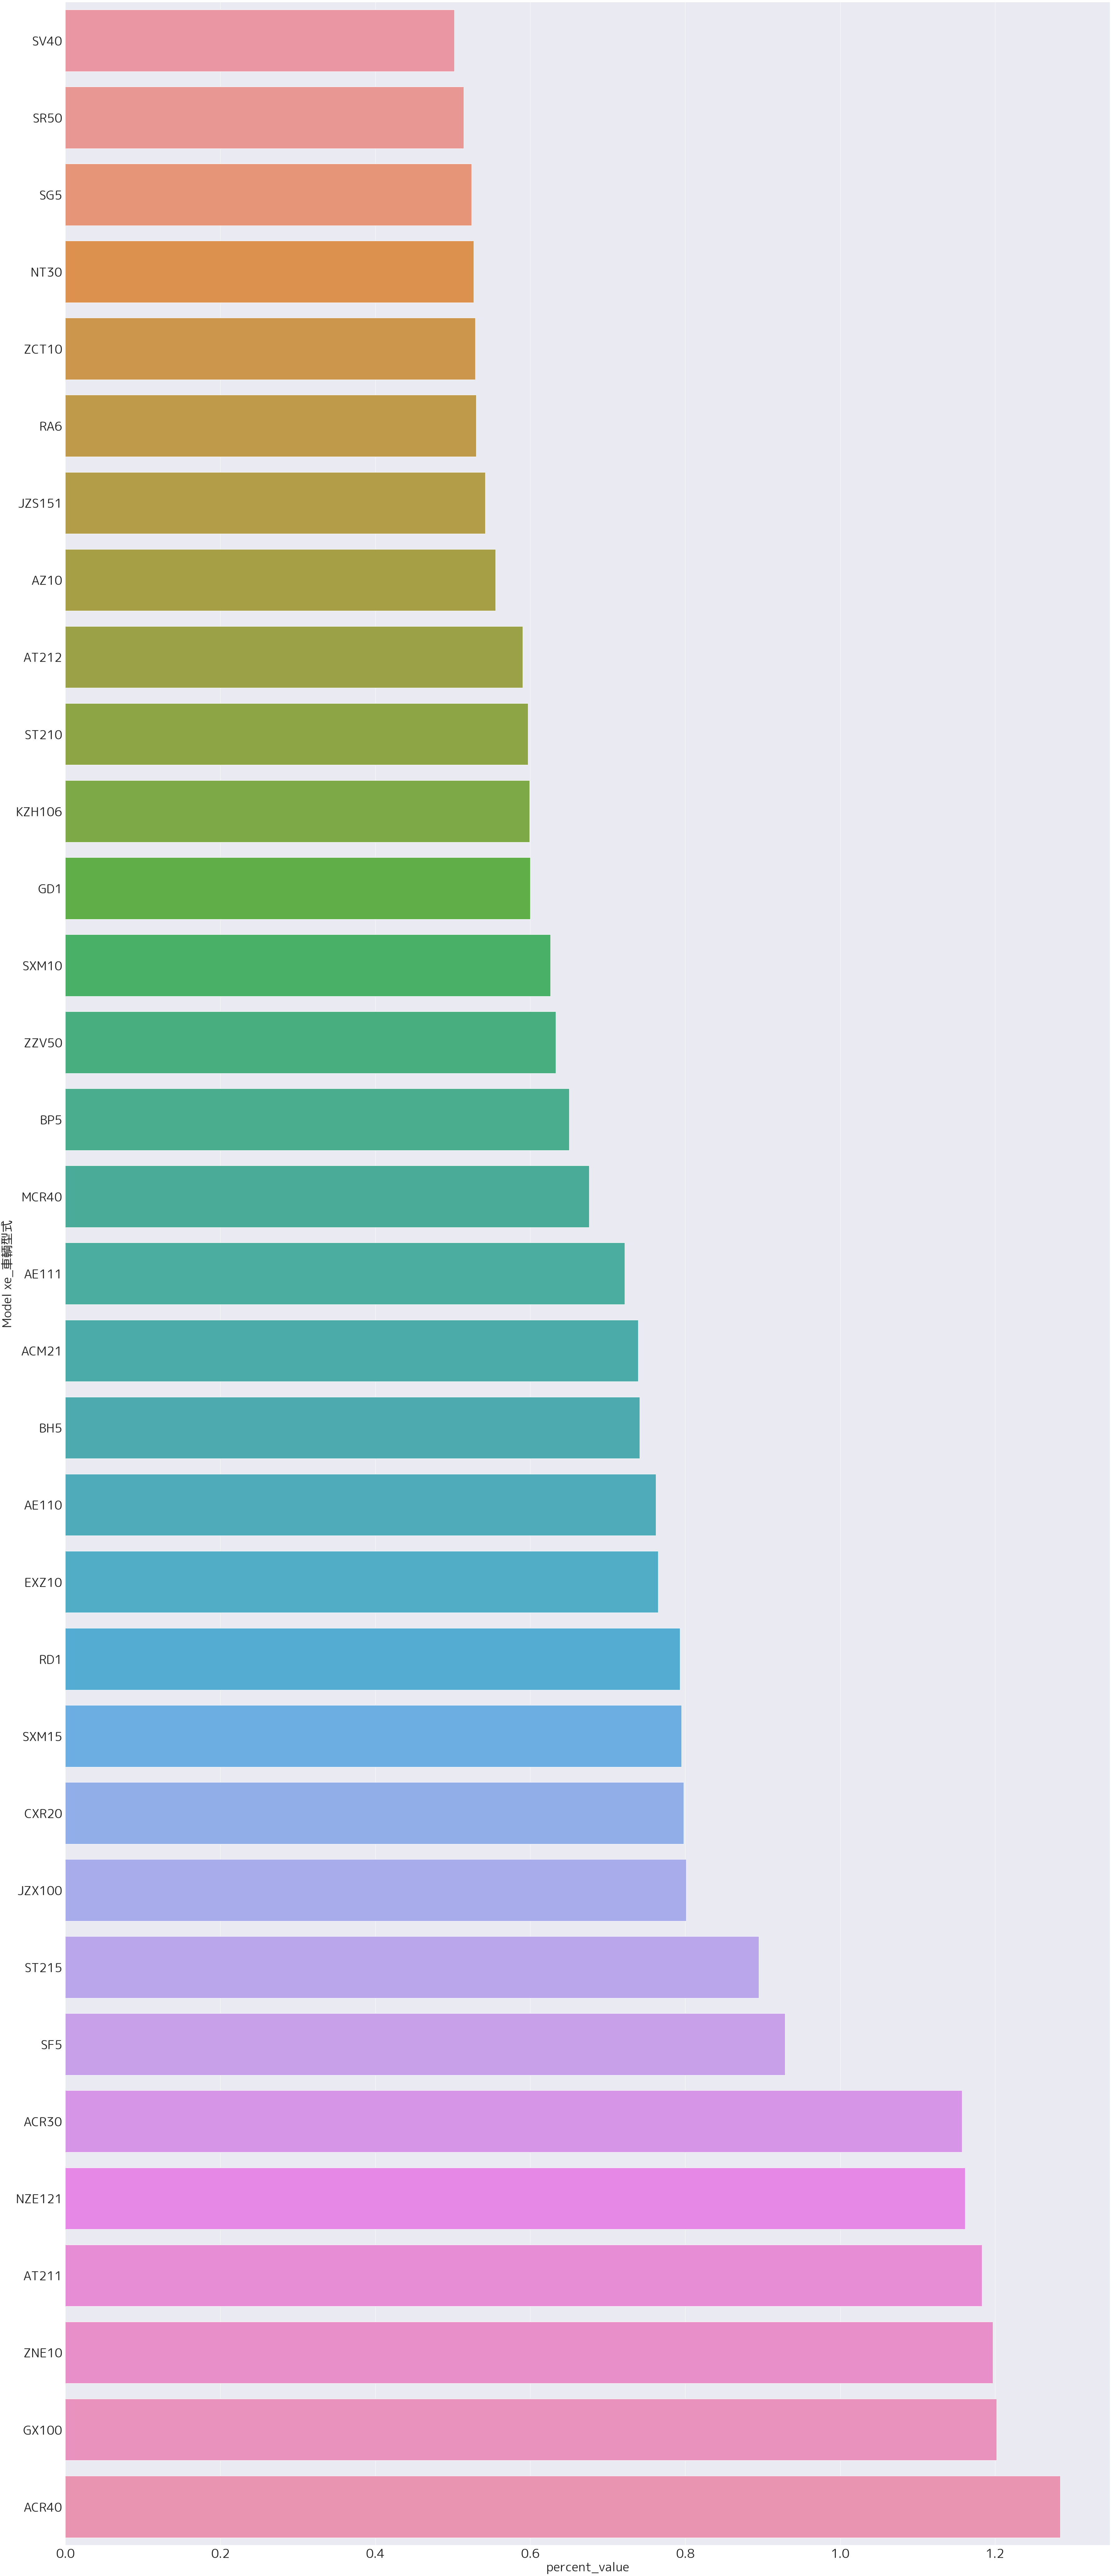

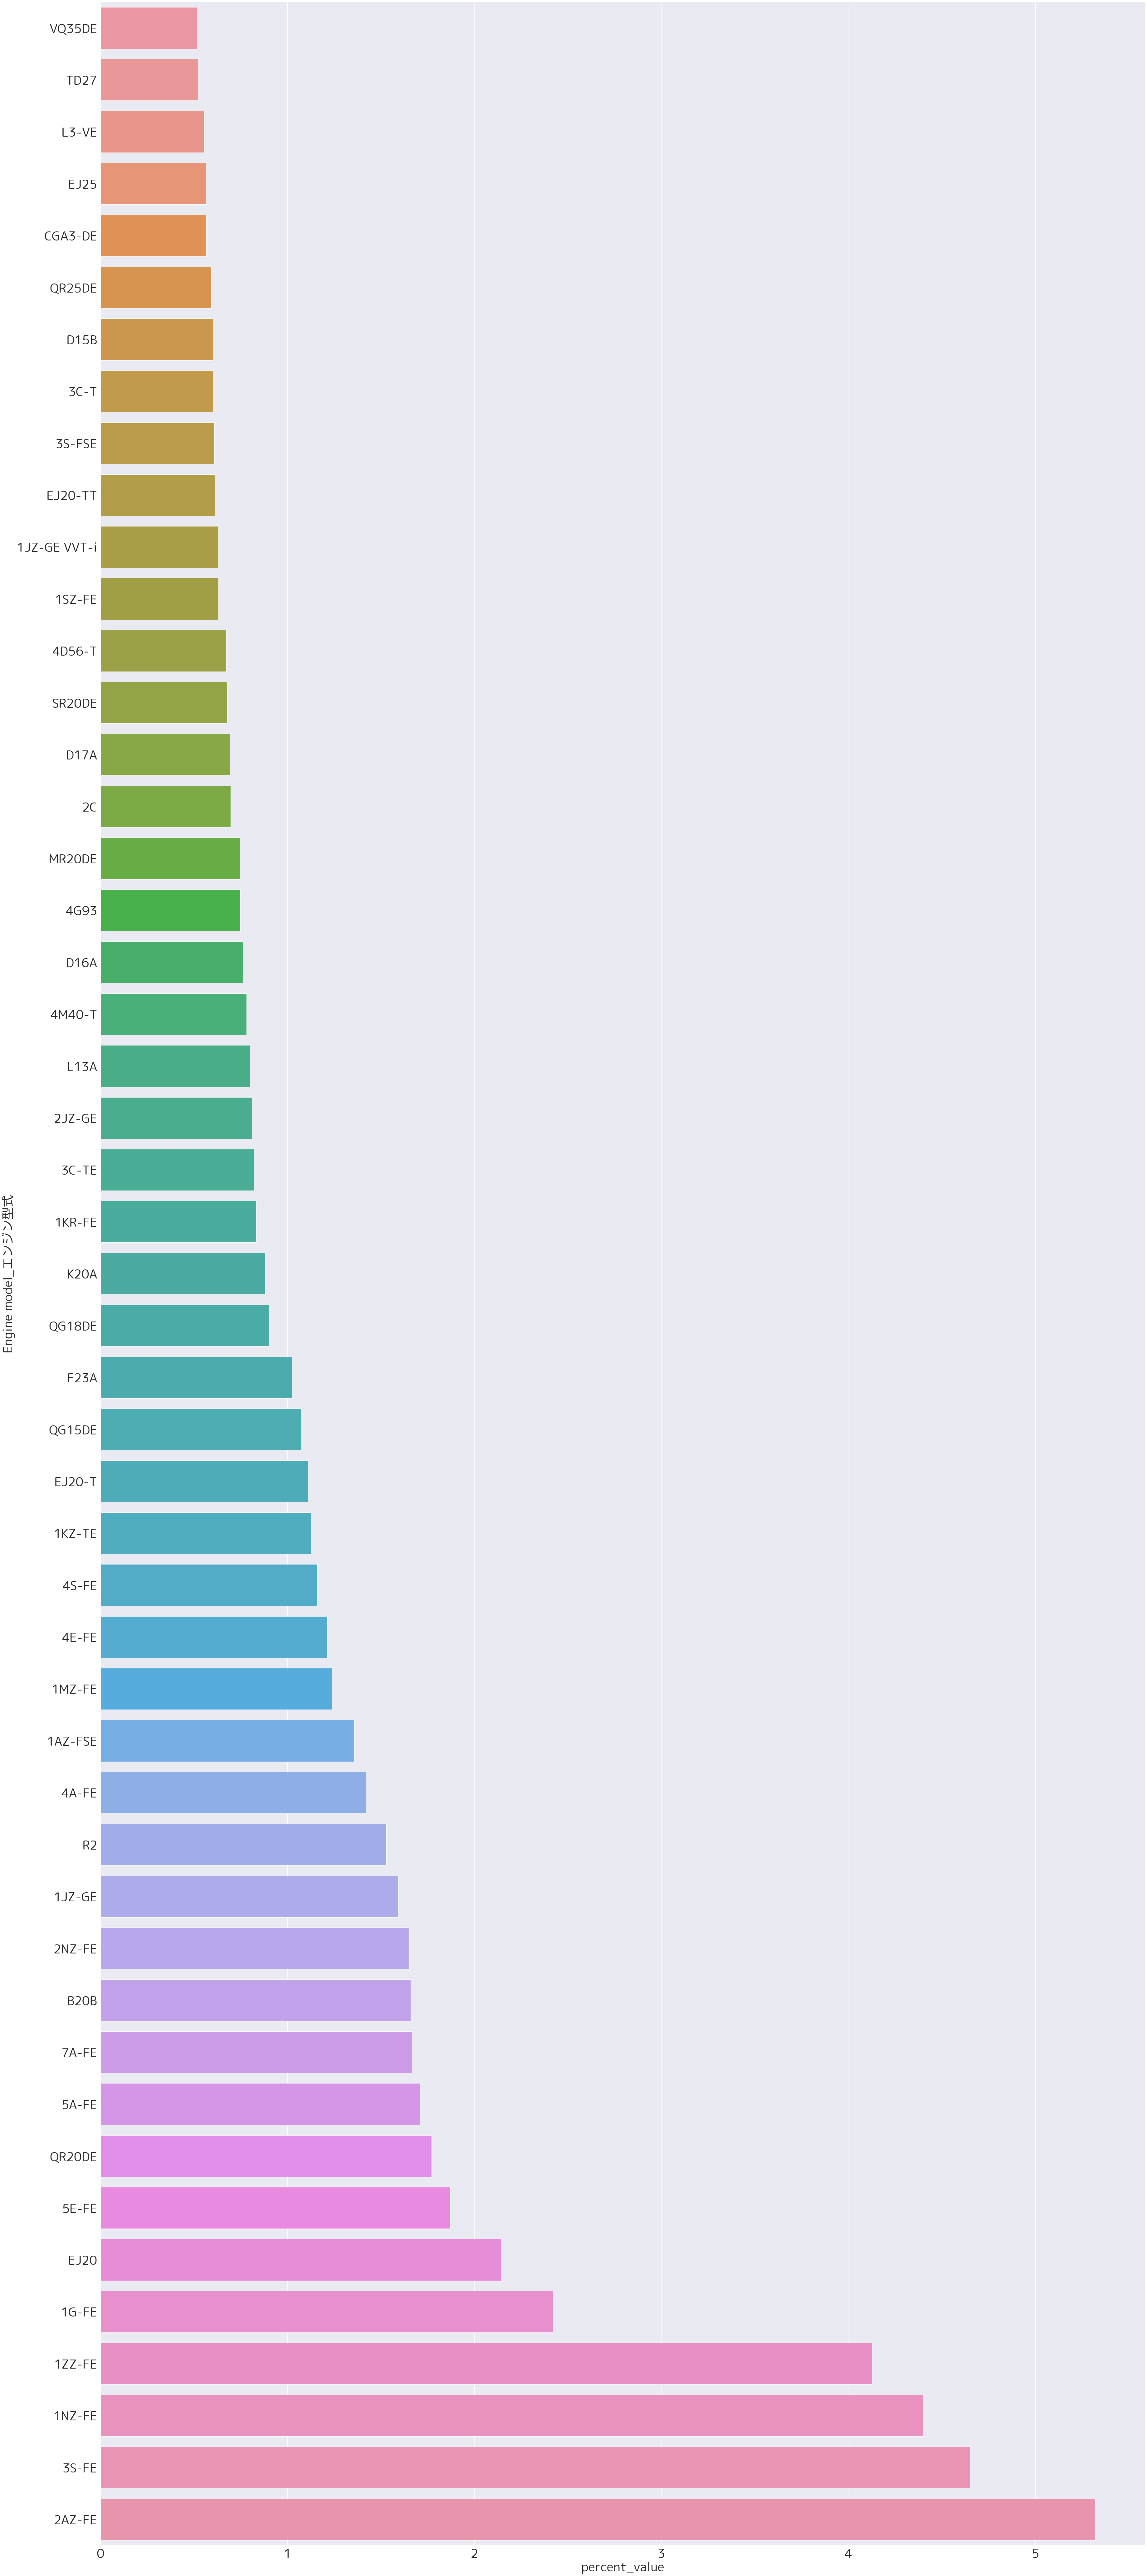

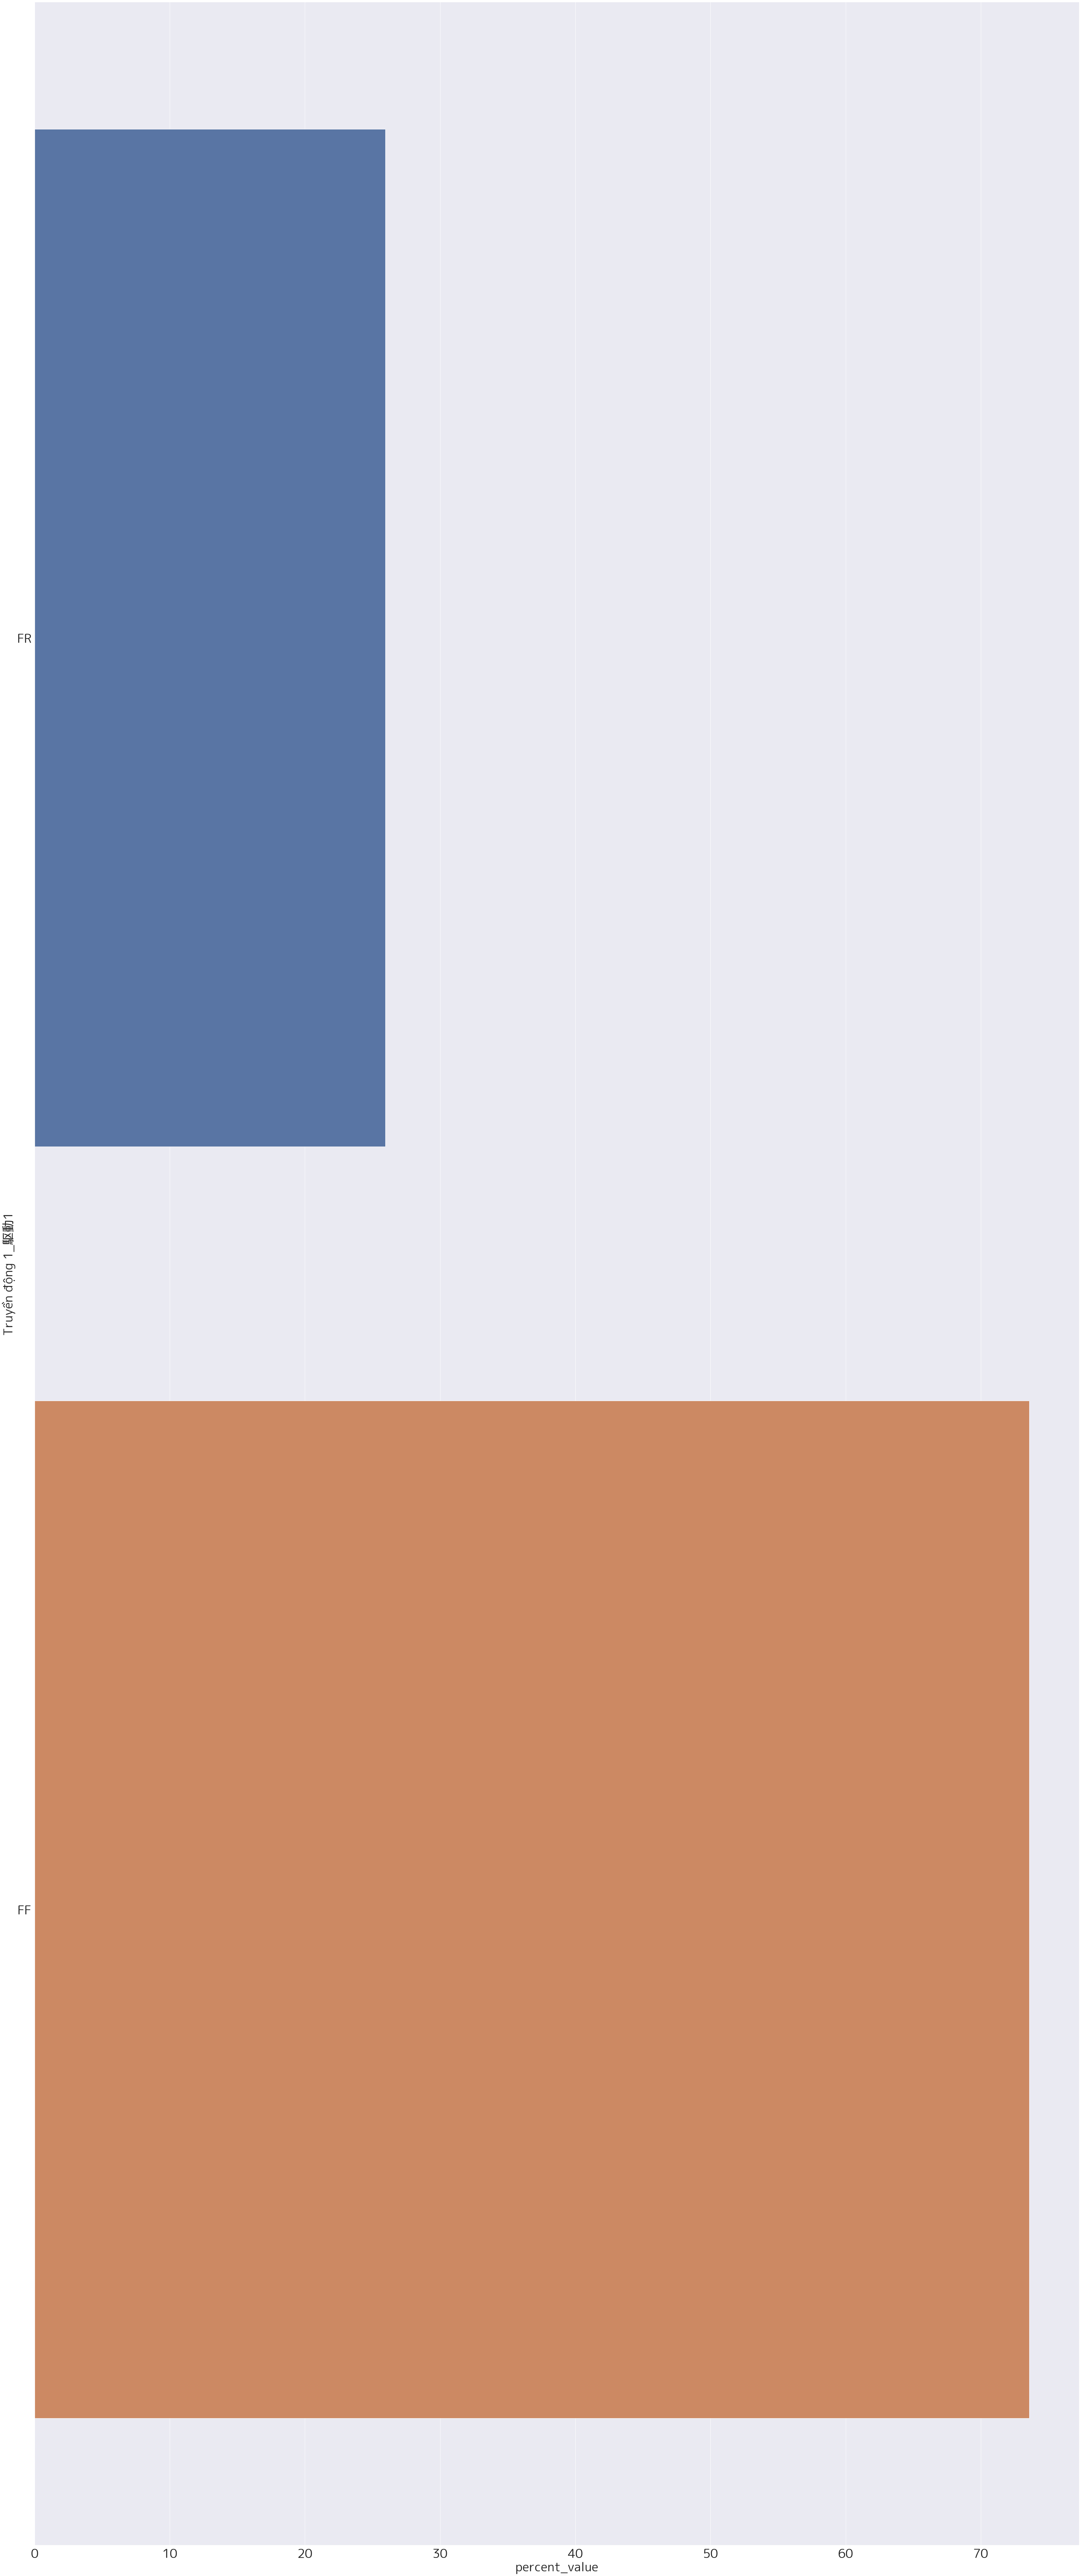

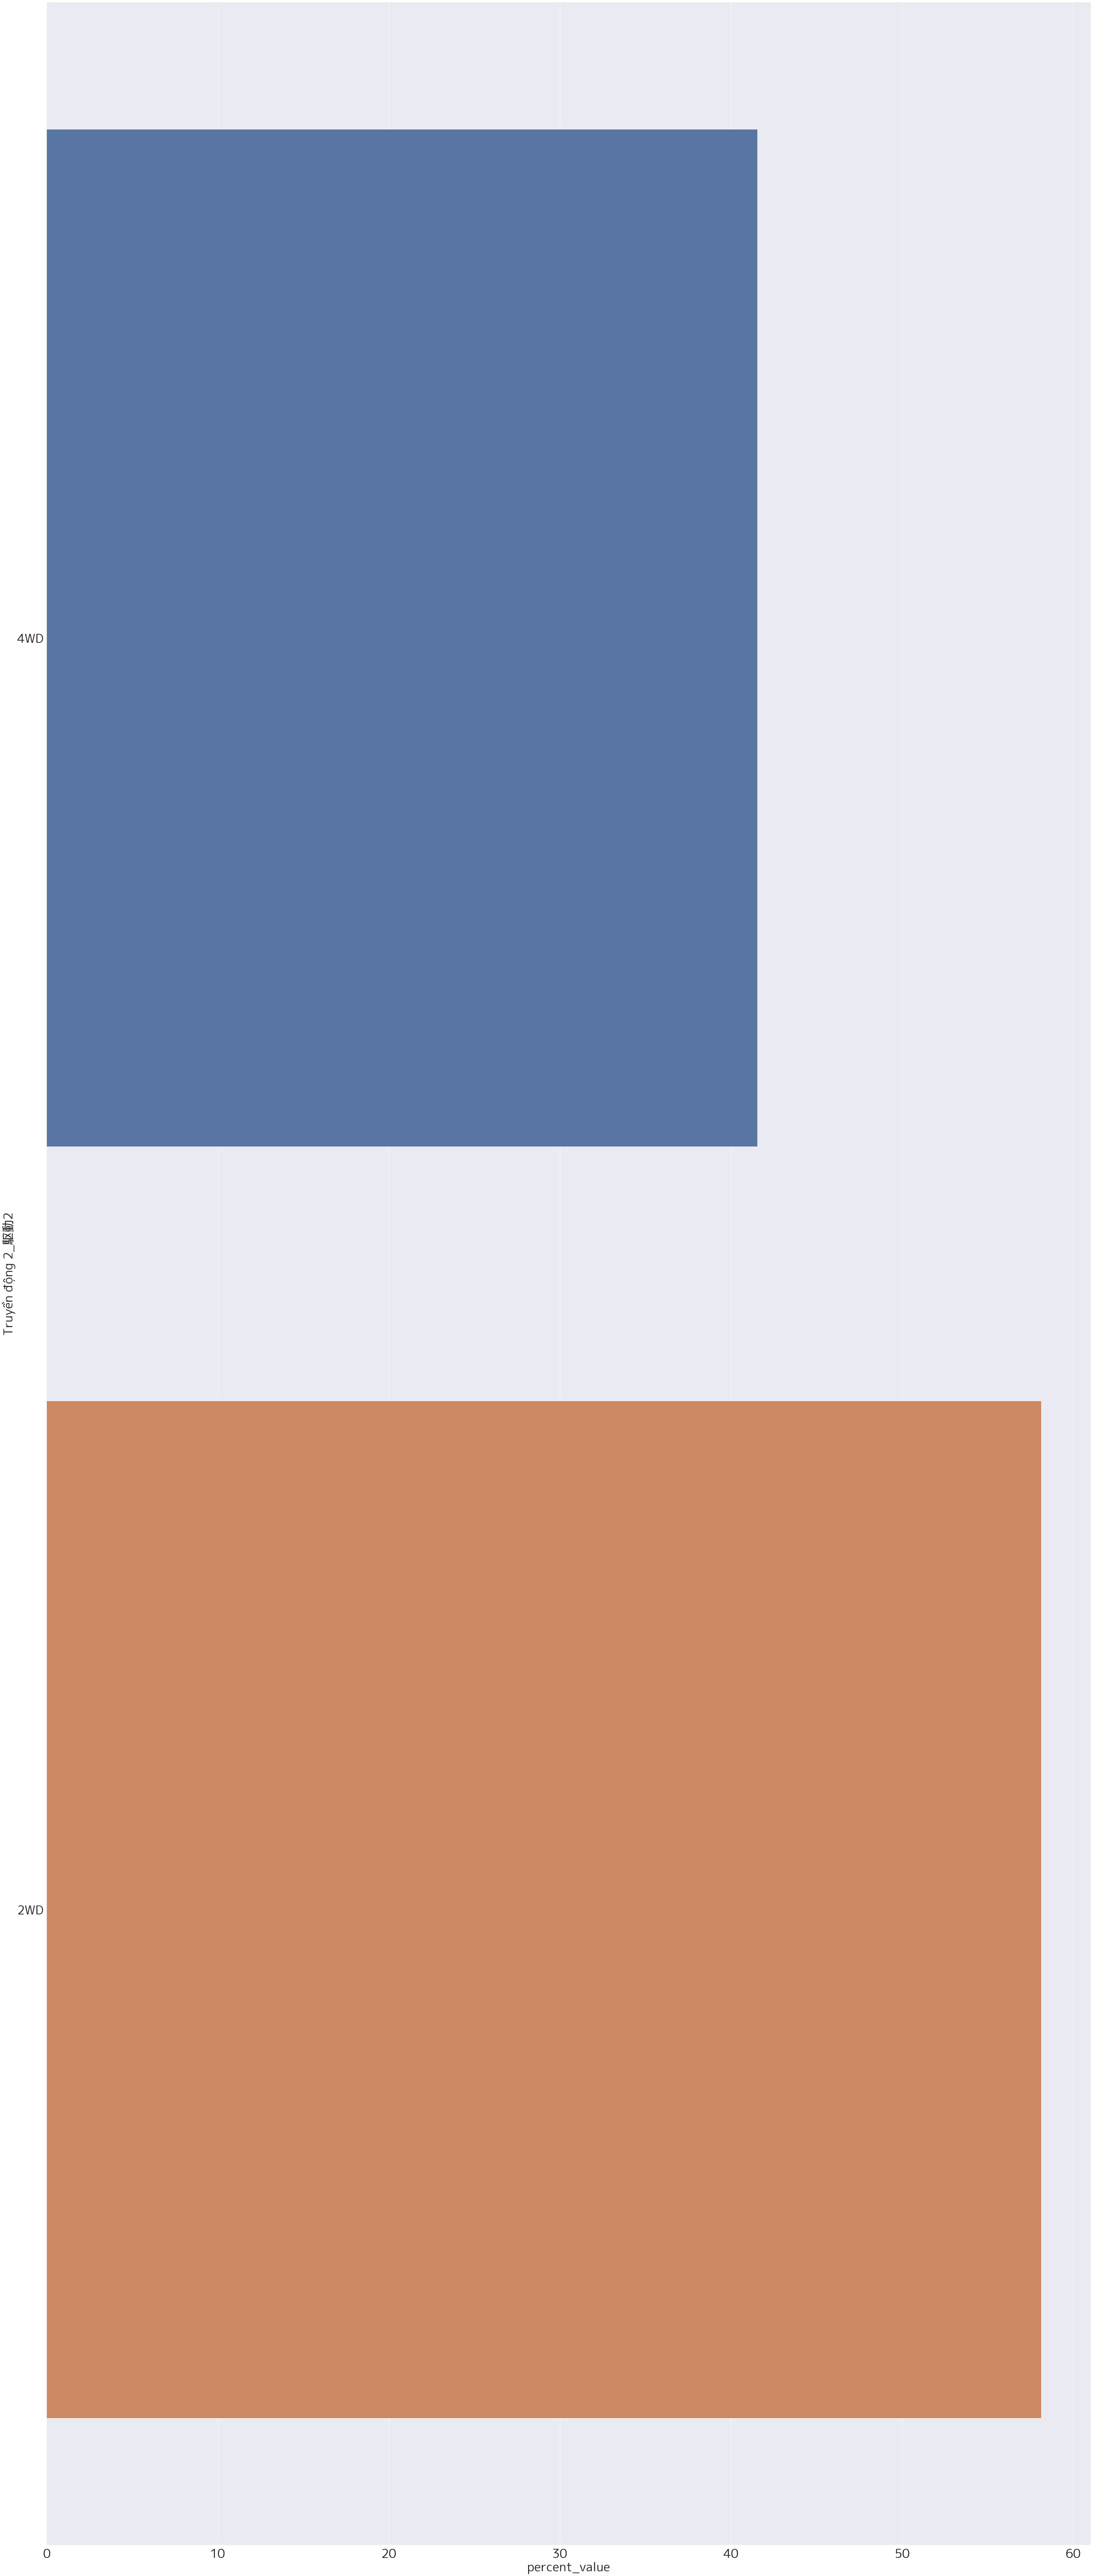

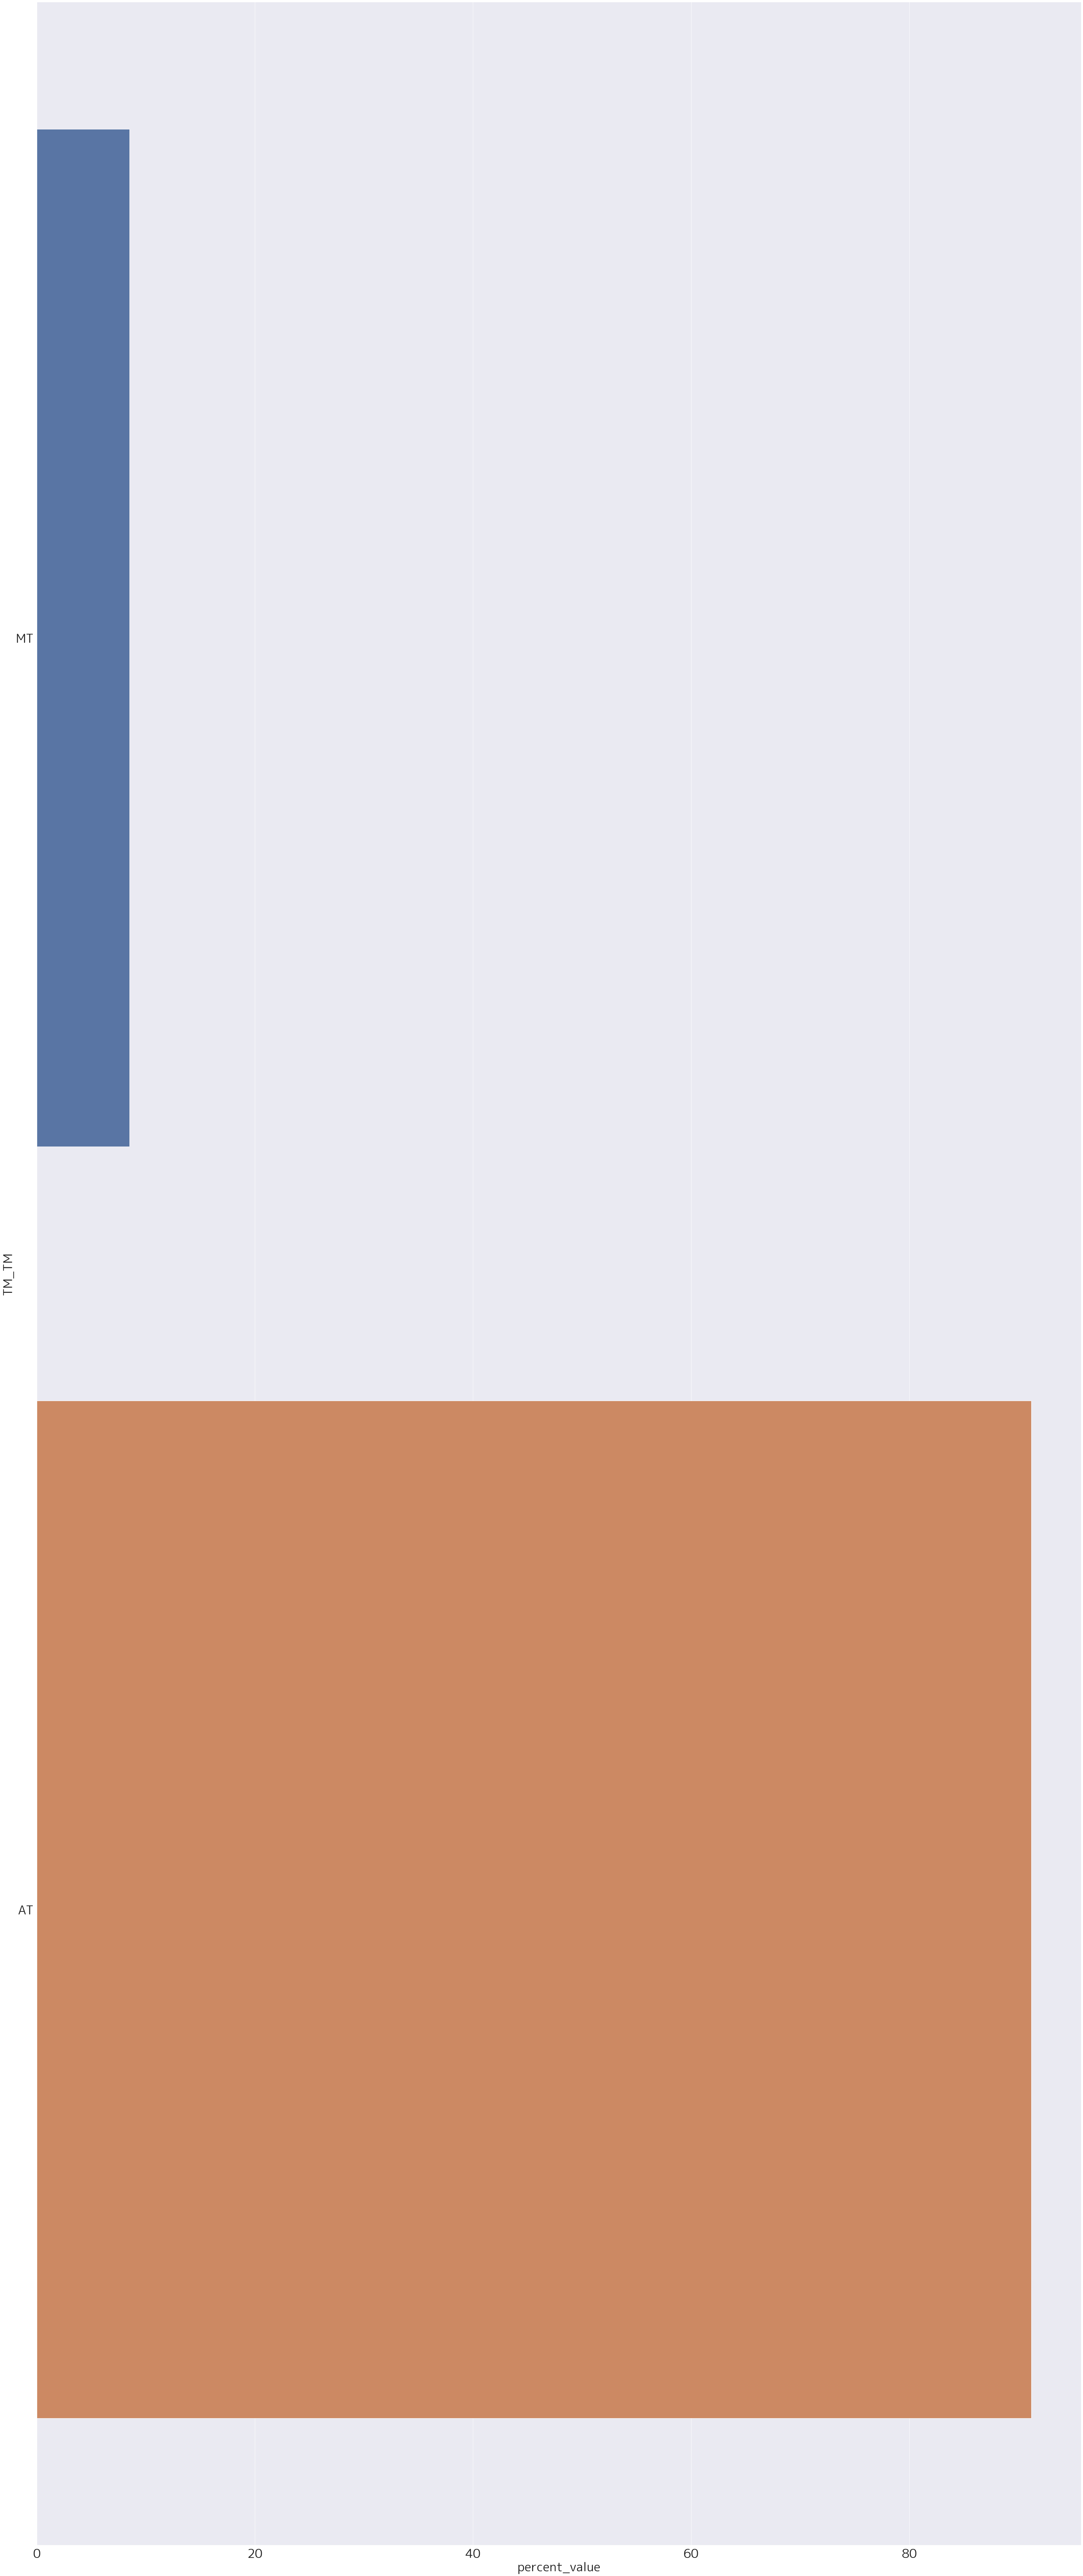

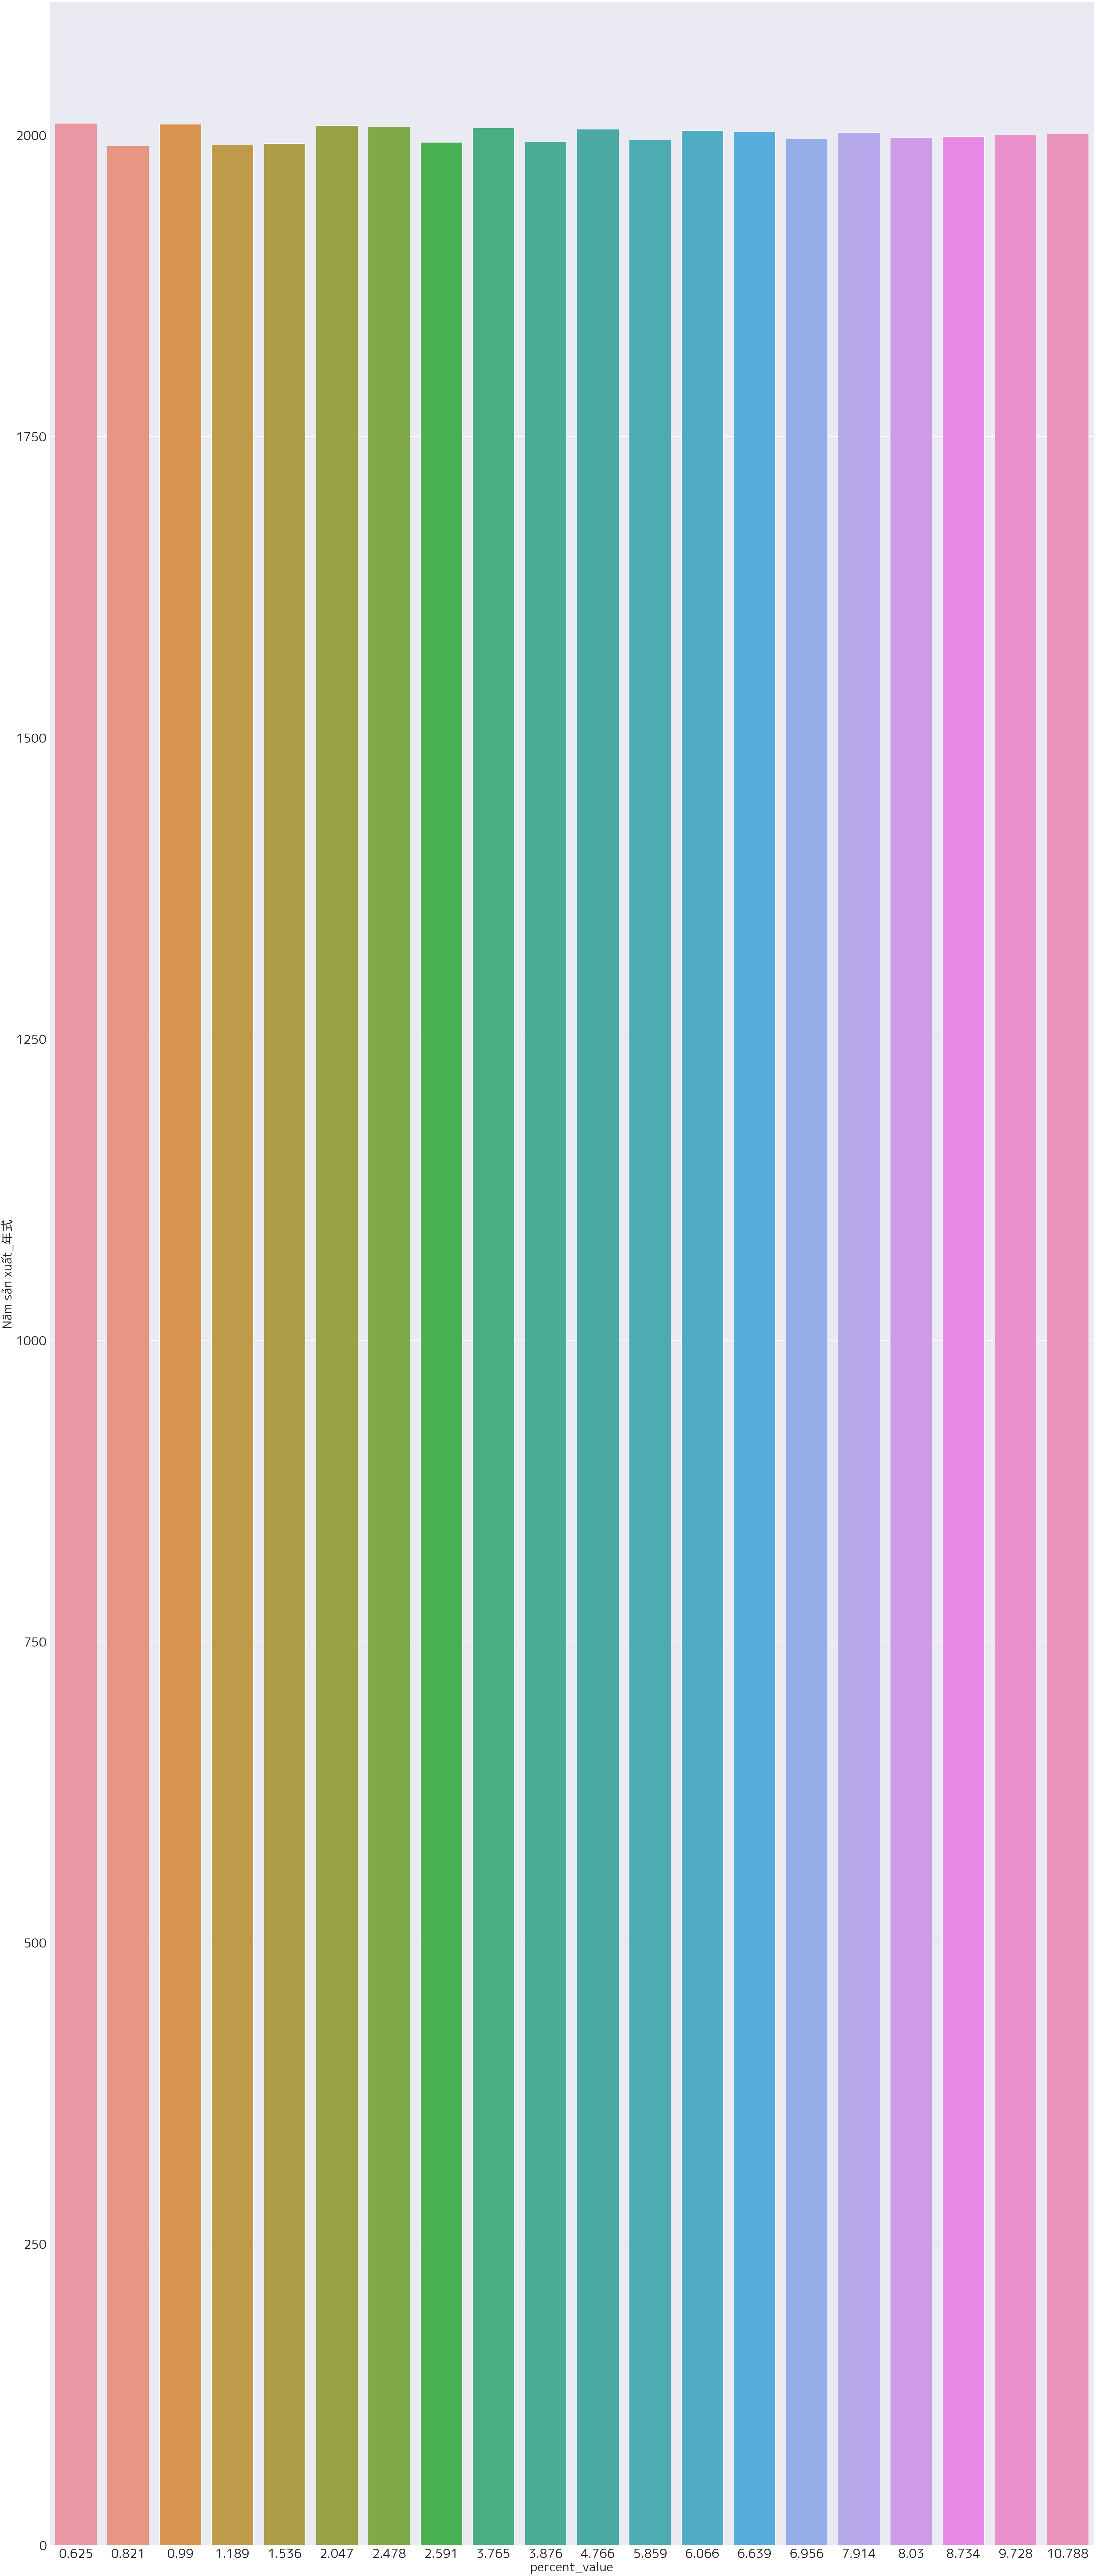

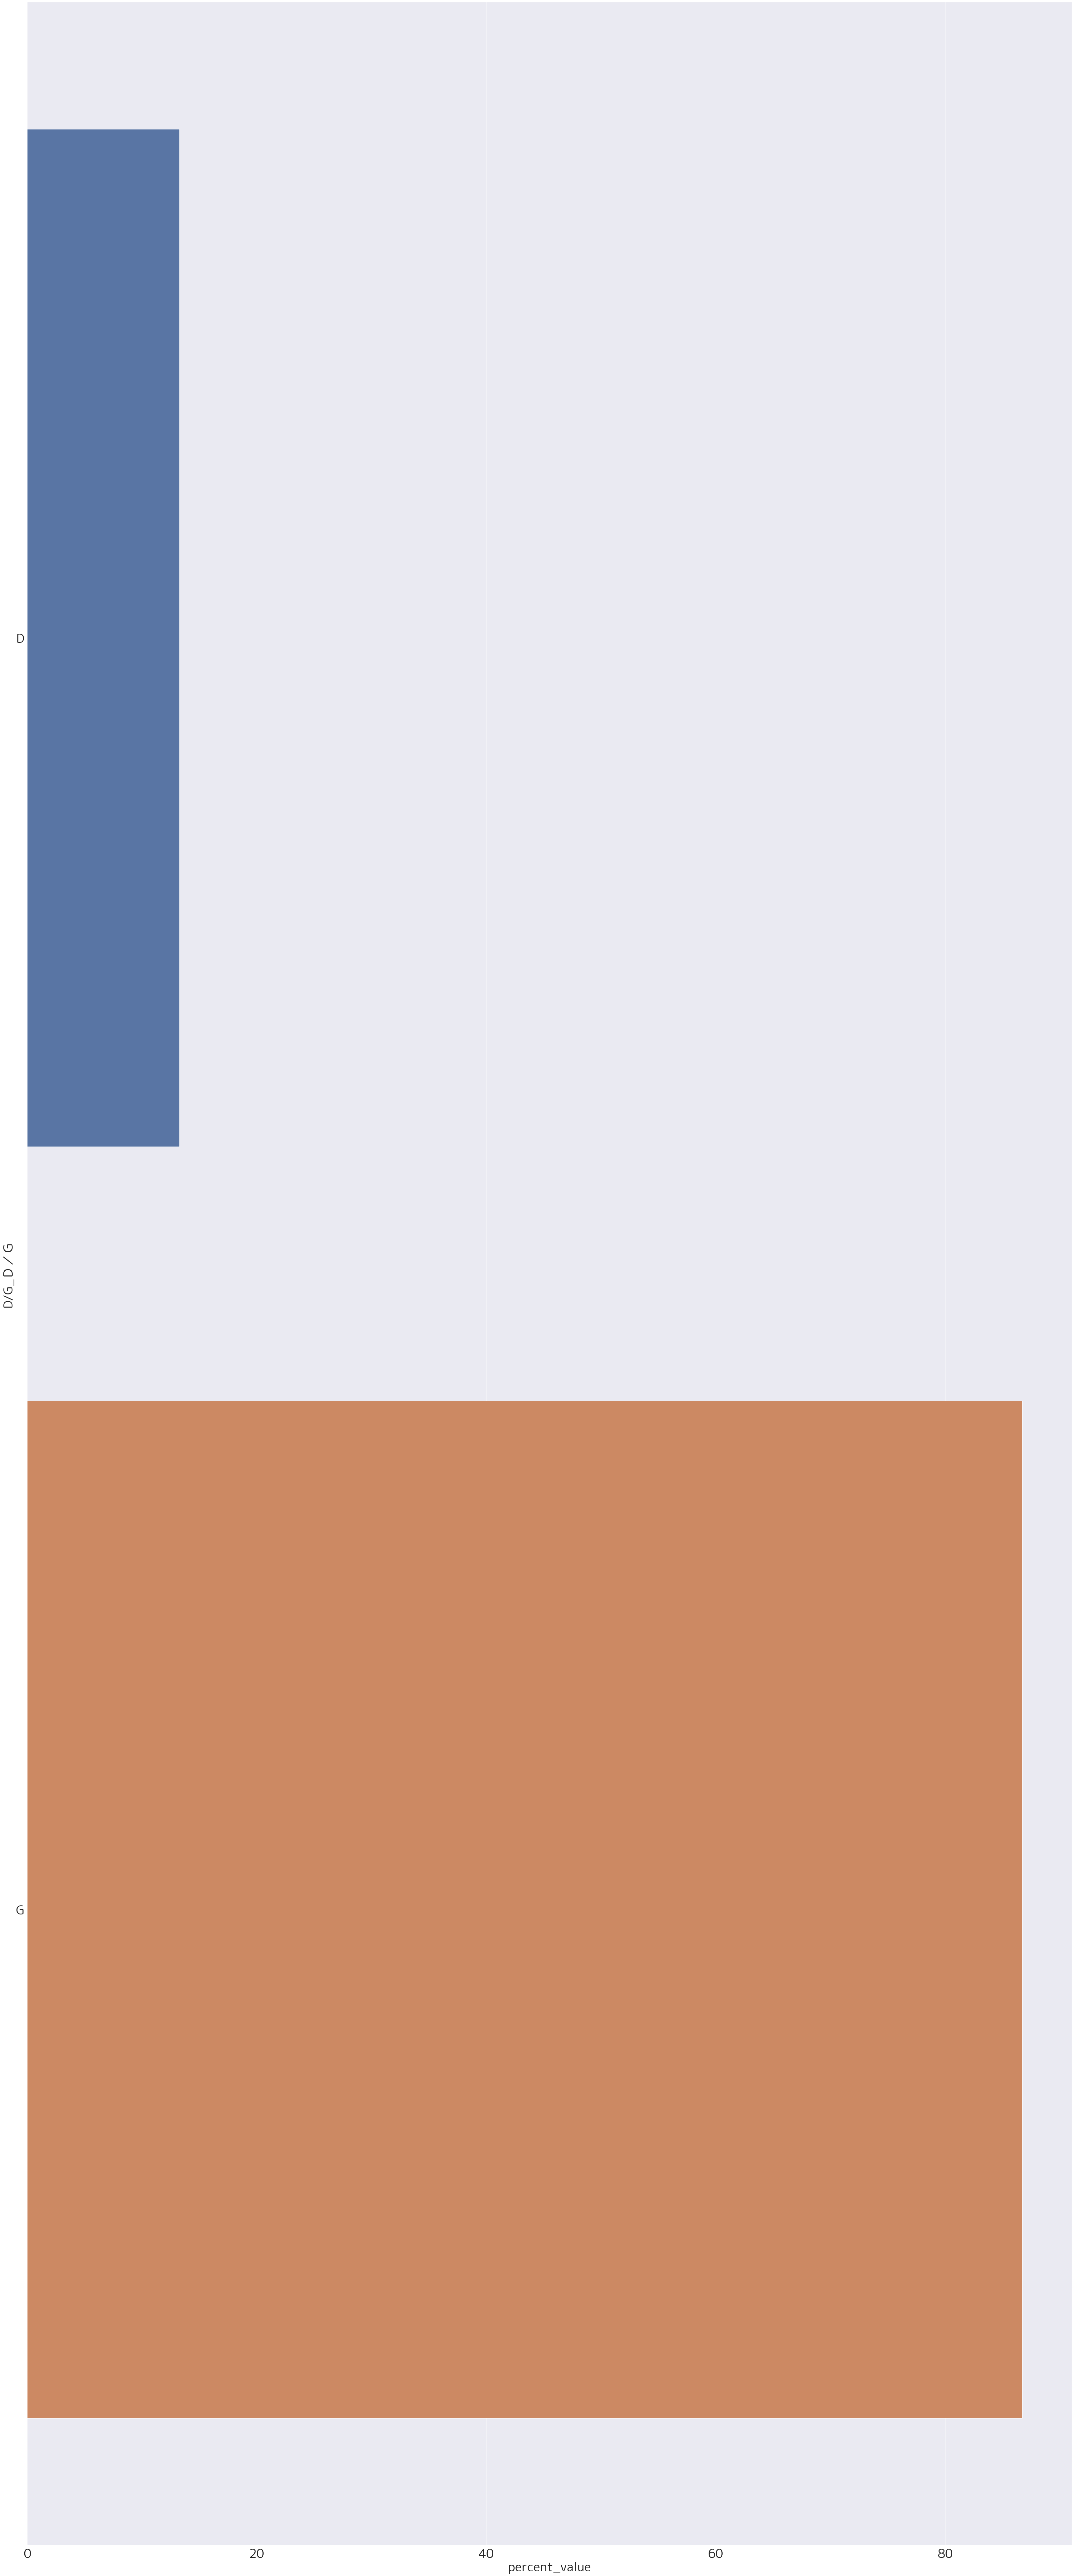

In [62]:
column_name = list(df_spec.columns)
for col in column_name[:-1]:
    sum_col = df_spec.groupby([col])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
    sum_col['percent_value']  = round(sum_col['sum']/sum_dt*100,3)
    sum_col['sum']  = round(sum_col['sum'],2)
    sum_thresh  = sum_col[sum_col['percent_value'] > 0.5]
    sum_thresh = sum_thresh.sort_values(by='percent_value', ascending=True)
    plt.figure(figsize=(60,150))
    plt.xticks(fontsize = 40)
    plt.xlabel(xlabel = col,fontsize = 40)
    plt.yticks(fontsize = 40)
    plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 40)
    sns.barplot(y=col,x='percent_value',data=sum_thresh,ci=None)

  Truyền động 2_駆動2      sum  percent_value
2               W/O  35000.0           0.09
1               4WD  30000.0          41.54
0               2WD  30000.0          58.13


<AxesSubplot:xlabel='percent_value', ylabel='Truyền động 2_駆動2'>

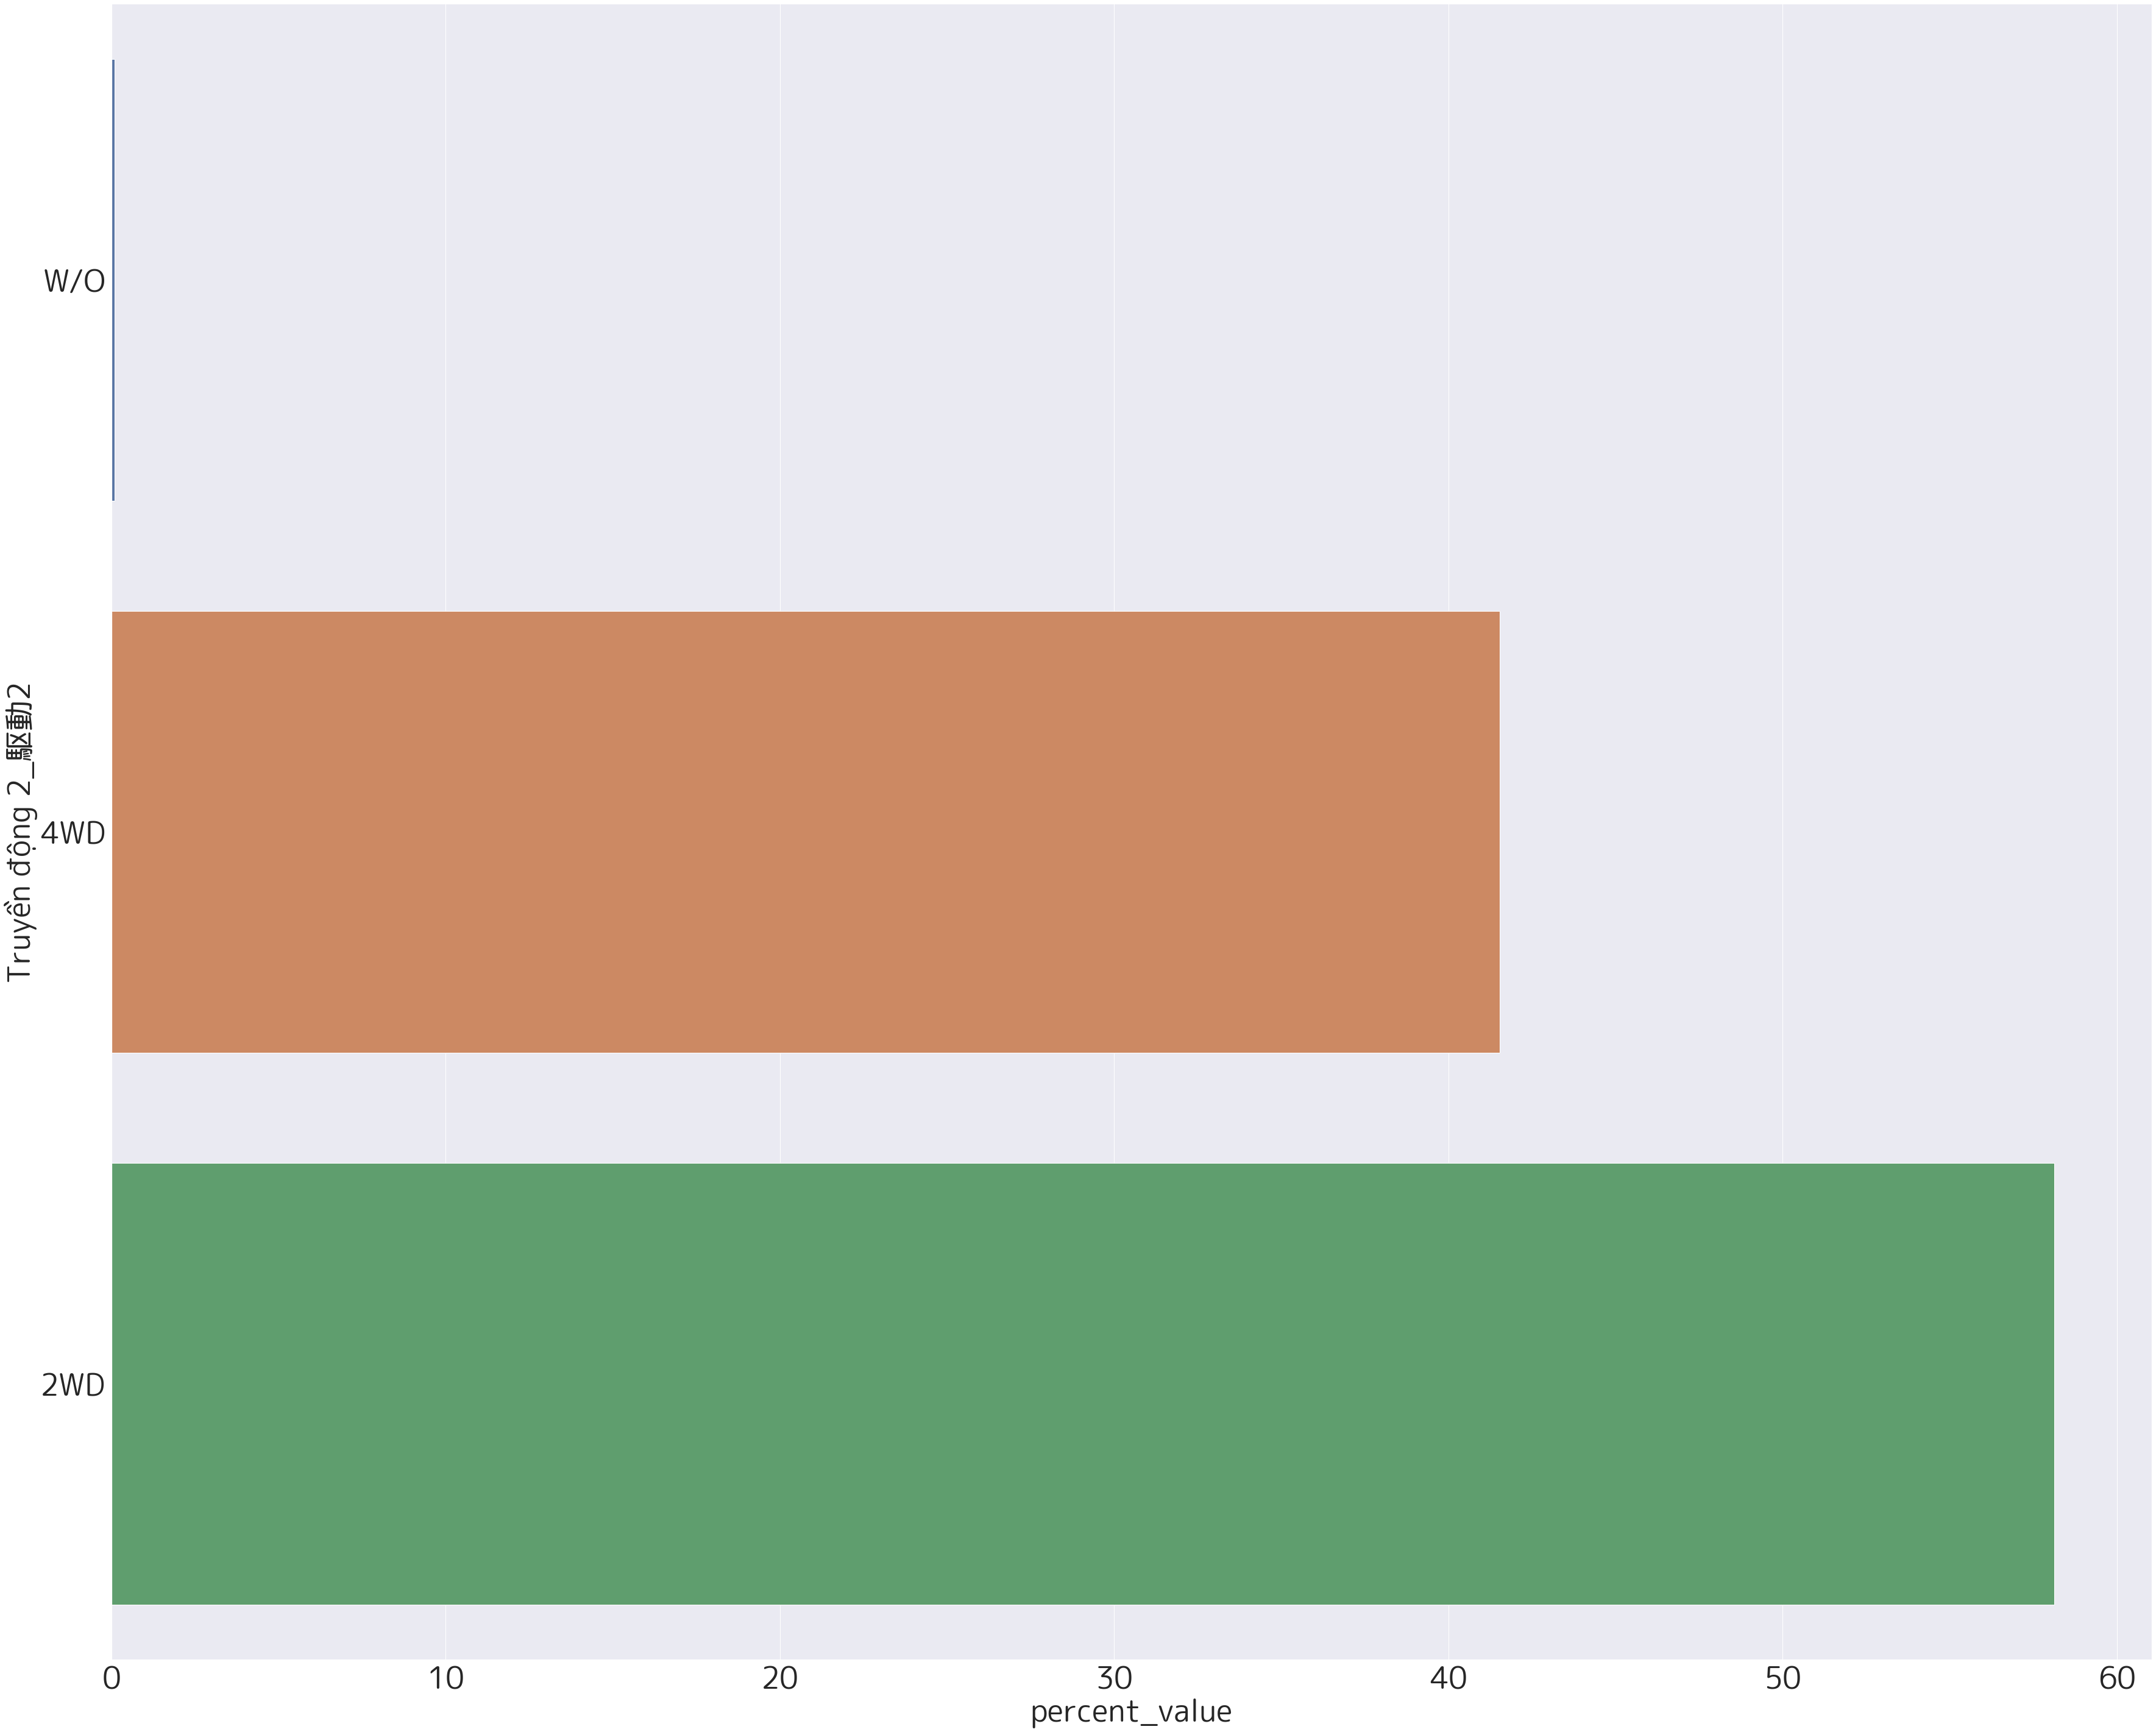

In [88]:
sum_engine_model = df_spec.groupby(['Truyền động 2_駆動2'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_engine_model['percent_value']  = round(sum_engine_model['sum']/sum_dt*100,2)
sum_engine_model['sum']  = round(sum_model_xe['sum'],2)
sum_engine_model = sum_engine_model.sort_values(by='percent_value', ascending=True)
sum_thresh_engine_model  = sum_engine_model[sum_engine_model['percent_value'] >= 0.0]
print(sum_thresh_engine_model)
plt.figure(figsize=(60,50))
plt.xticks(fontsize = 50)
plt.xlabel(xlabel = 'Model xe_車輌型式',fontsize = 50)
plt.yticks(fontsize = 50)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 50)
sns.barplot(y='Truyền động 2_駆動2',x='percent_value',data=sum_engine_model,ci=None)

  TM_TM          sum  percent_value
2   W/O     692000.0           0.09
1    MT   64653821.0           8.49
0    AT  694285091.5          91.18


<AxesSubplot:xlabel='percent_value', ylabel='TM_TM'>

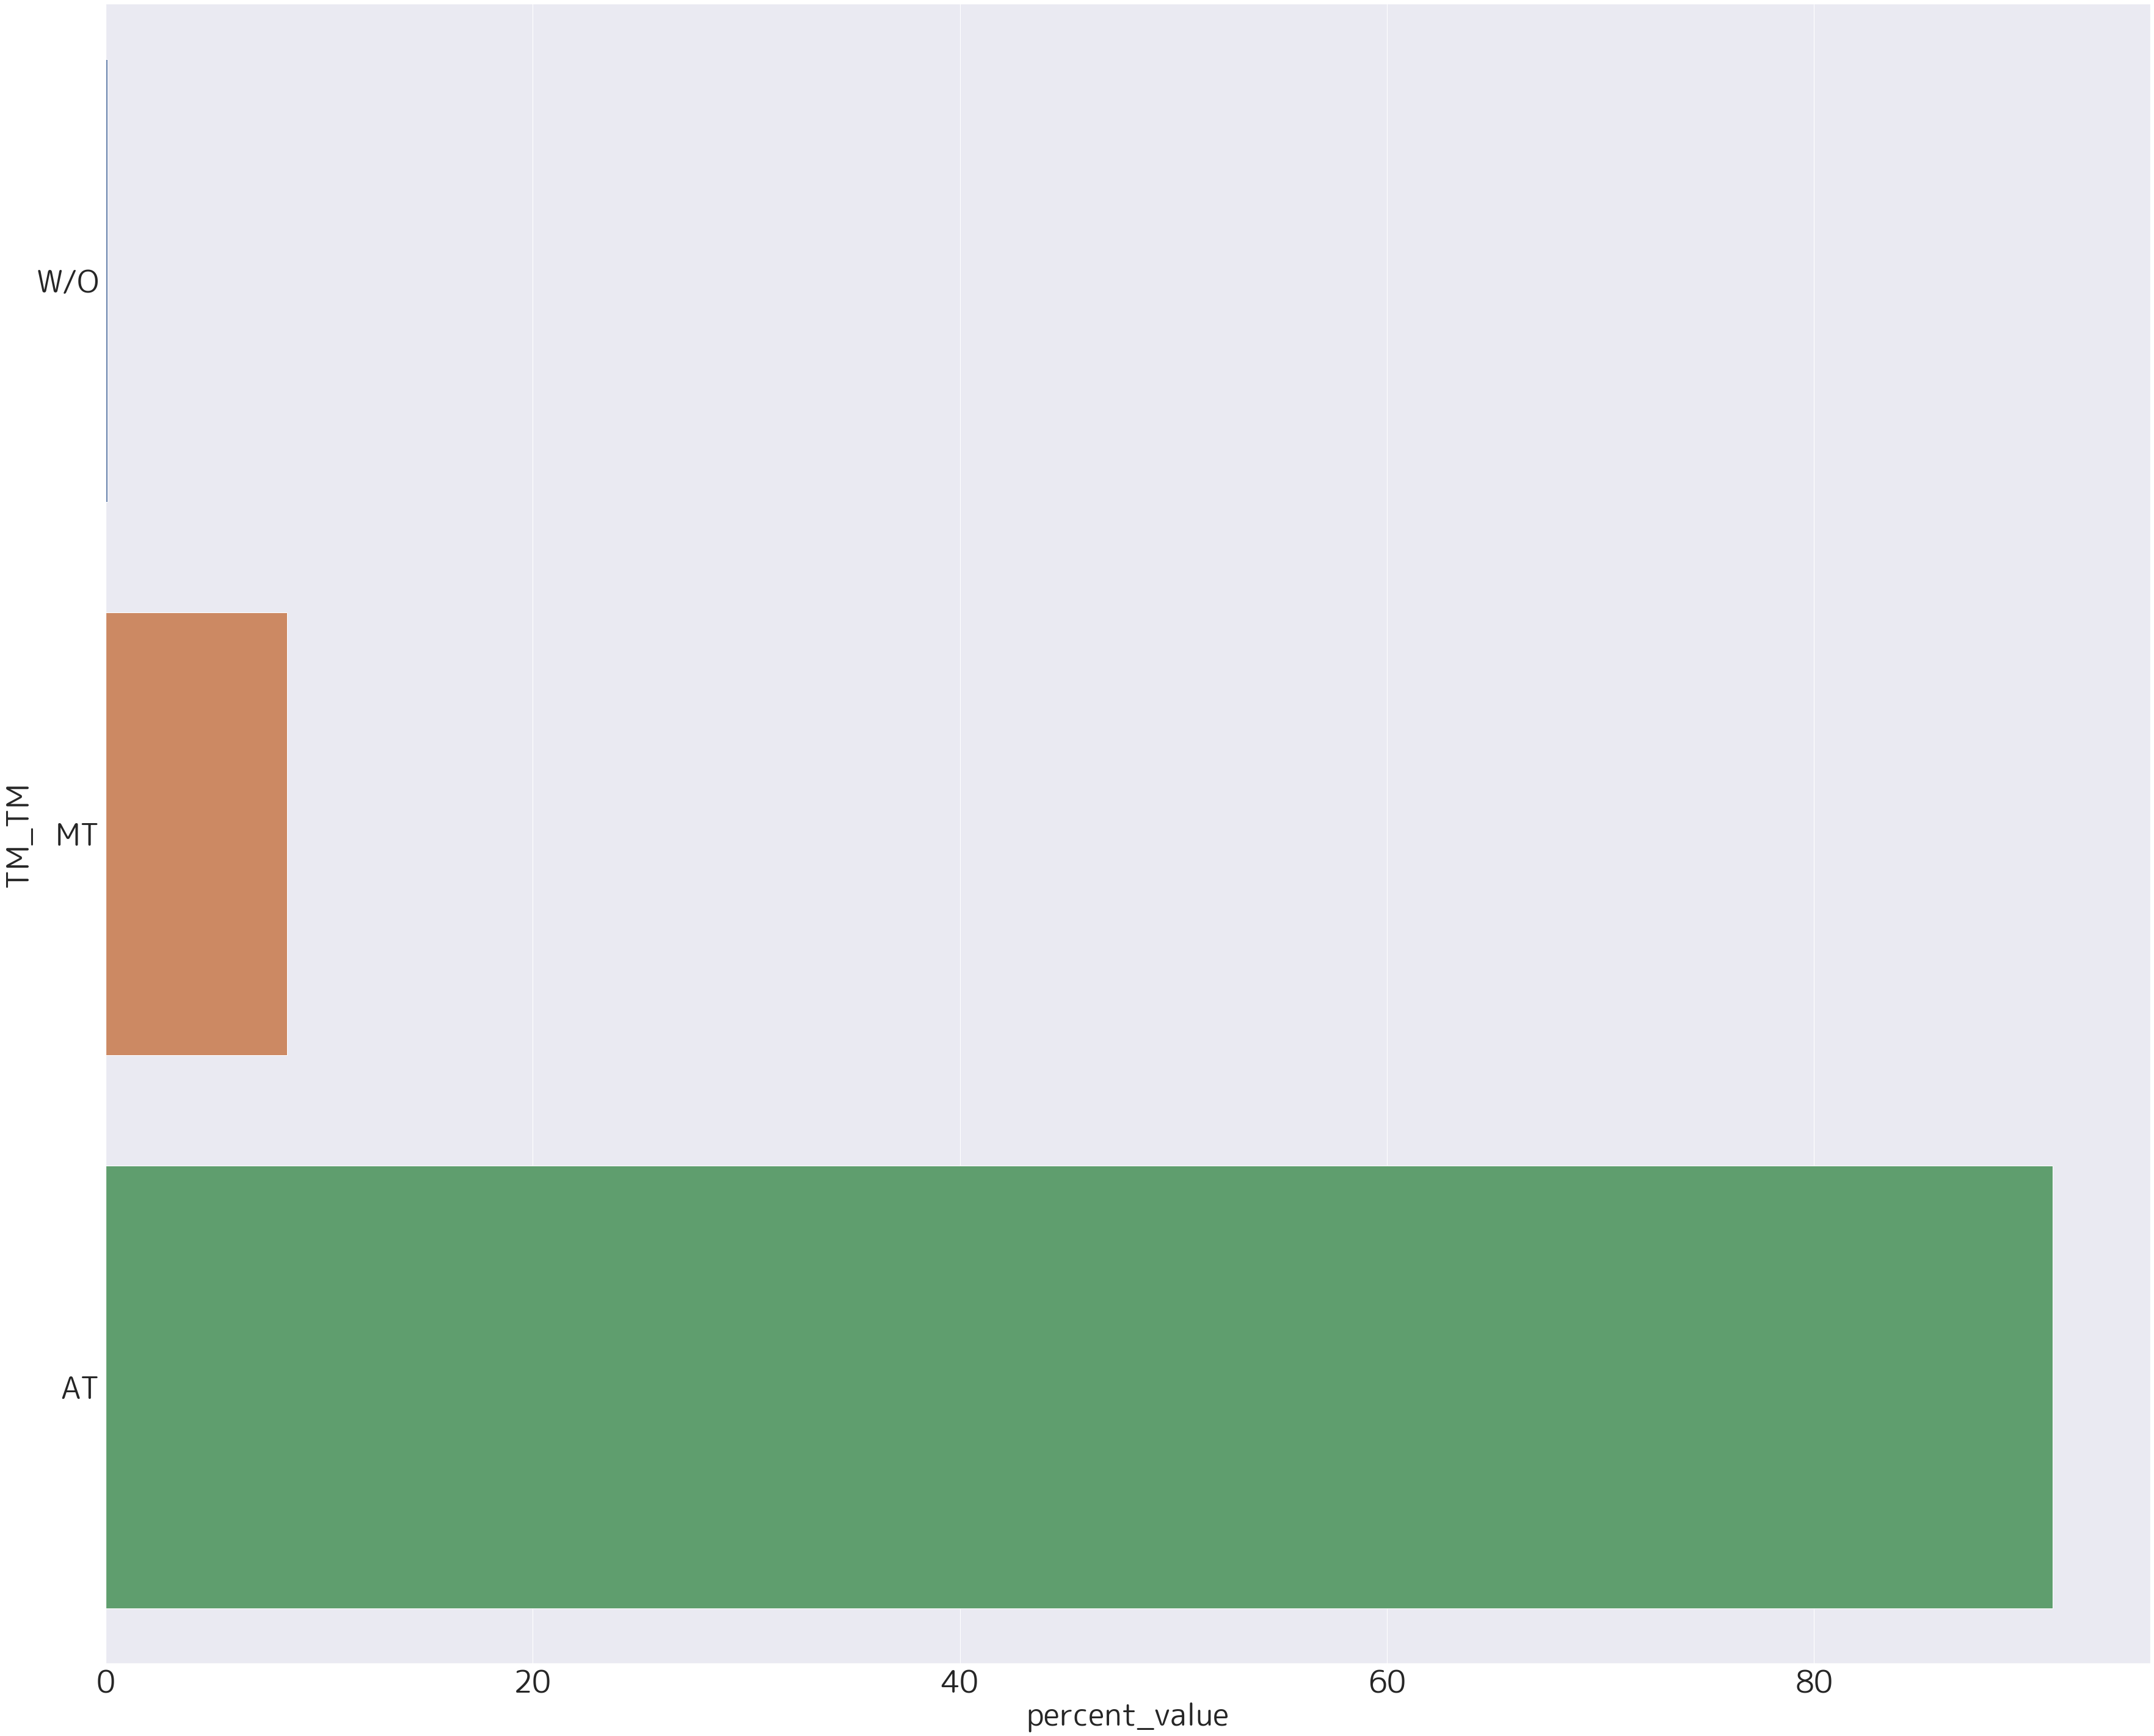

In [91]:
sum_engine_model = df_merged.groupby(['TM_TM'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_engine_model['percent_value']  = round(sum_engine_model['sum']/sum_dt*100,2)
sum_engine_model['sum']  = round(sum_engine_model['sum'],2)
sum_engine_model = sum_engine_model.sort_values(by='percent_value', ascending=True)
sum_thresh_engine_model  = sum_engine_model[sum_engine_model['percent_value'] >= 0.0]
print(sum_thresh_engine_model)
plt.figure(figsize=(60,50))
plt.xticks(fontsize = 50)
plt.xlabel(xlabel = 'TM_TM',fontsize = 50)
plt.yticks(fontsize = 50)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 50)
sns.barplot(y='TM_TM',x='percent_value',data=sum_engine_model,ci=None)

  D/G_Ｄ／Ｇ          sum  percent_value
0       D  100886808.0          13.25
1       G  660256922.5          86.71


<AxesSubplot:xlabel='percent_value', ylabel='D/G_Ｄ／Ｇ'>

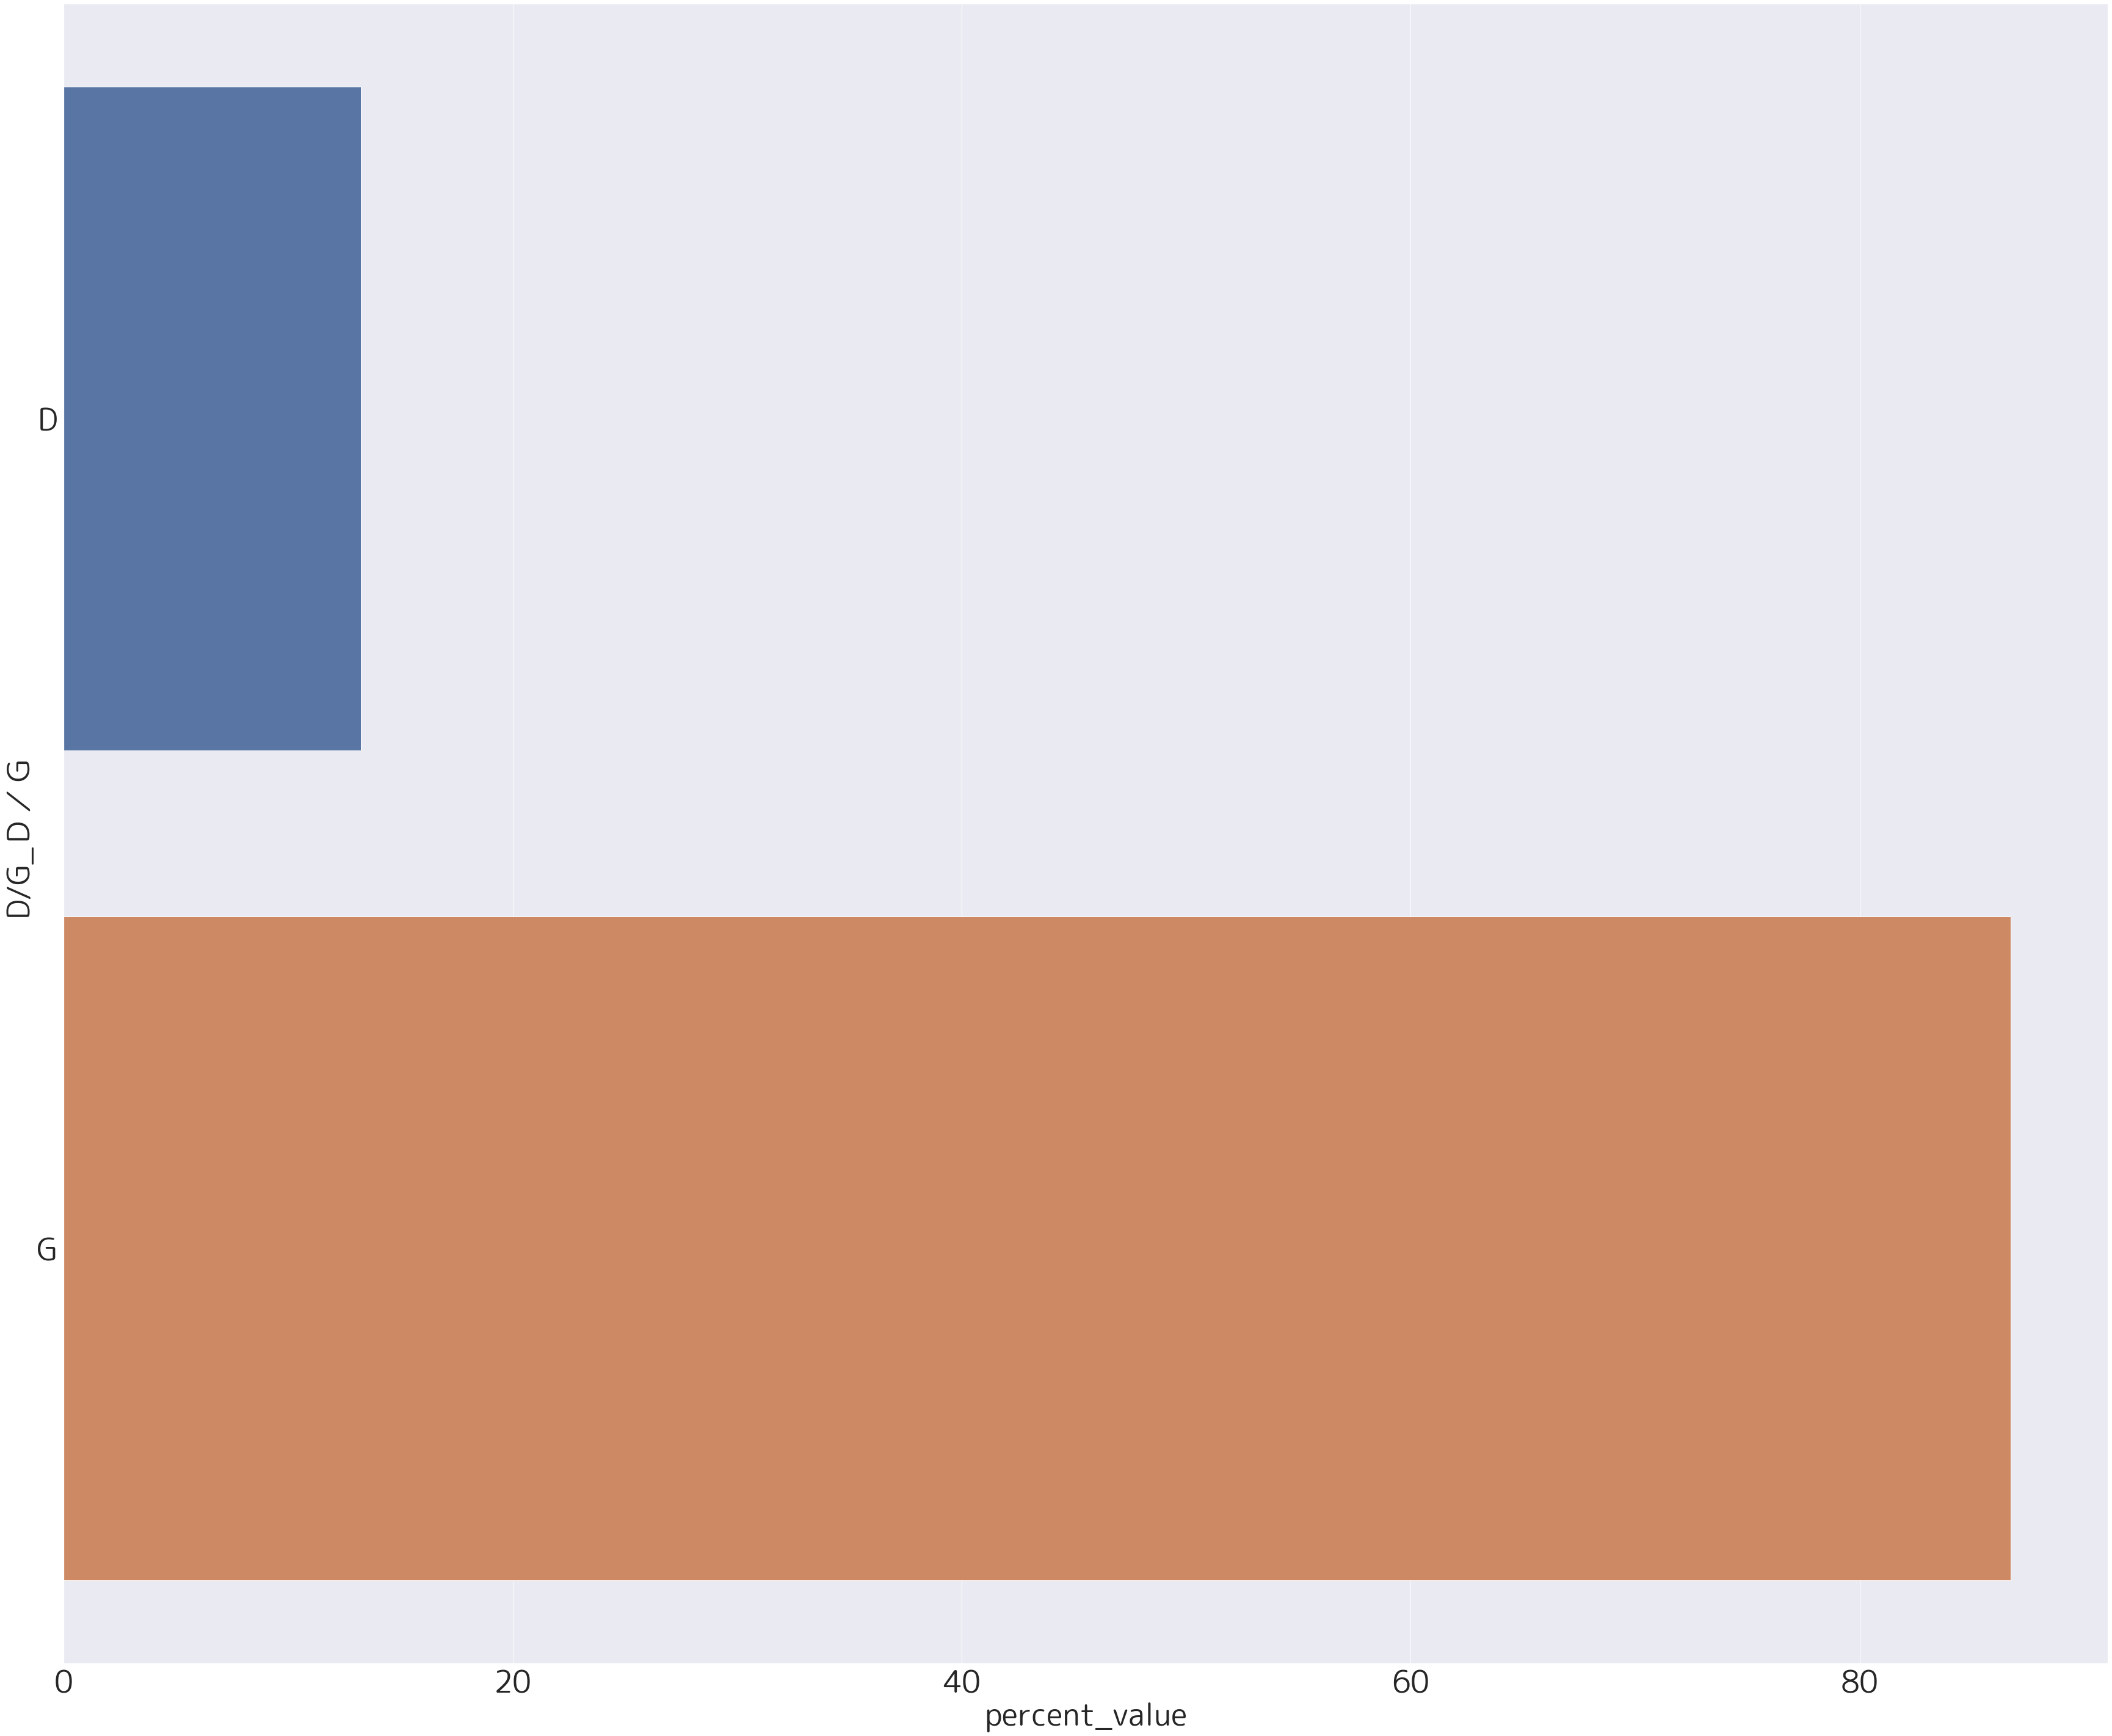

In [104]:
sum_engine_model = df_merged.groupby(['D/G_Ｄ／Ｇ'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_engine_model['percent_value']  = round(sum_engine_model['sum']/sum_dt*100,2)
sum_engine_model['sum']  = round(sum_engine_model['sum'],2)
sum_engine_model = sum_engine_model.sort_values(by='percent_value', ascending=True)
sum_thresh_engine_model  = sum_engine_model[sum_engine_model['percent_value'] >= 0.0]
print(sum_thresh_engine_model)
plt.figure(figsize=(60,50))
plt.xticks(fontsize = 50)
plt.xlabel(xlabel = 'D/G_Ｄ／Ｇ',fontsize = 50)
plt.yticks(fontsize = 50)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 50)
sns.barplot(y='D/G_Ｄ／Ｇ',x='percent_value',data=sum_engine_model,ci=None)

    Năm sản xuất_年式         sum  percent_value
57            20000     35000.0           0.00
18             1983     35000.0           0.00
13               97     30000.0           0.00
9                10     35000.0           0.00
55             2020     38000.0           0.00
56             5600     30000.0           0.00
10               89    100000.0           0.01
16              200     74000.0           0.01
8                 9     65000.0           0.01
54             2019     57000.0           0.01
6                 7     85000.0           0.01
11               94    150000.0           0.02
21             1986    152000.0           0.02
19             1984    155000.0           0.02
51             2016    133000.0           0.02
17             1978    120000.0           0.02
53             2018    243044.0           0.03
52             2017    250140.0           0.03
20             1985    195000.0           0.03
2                 2    202000.0           0.03
4            

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

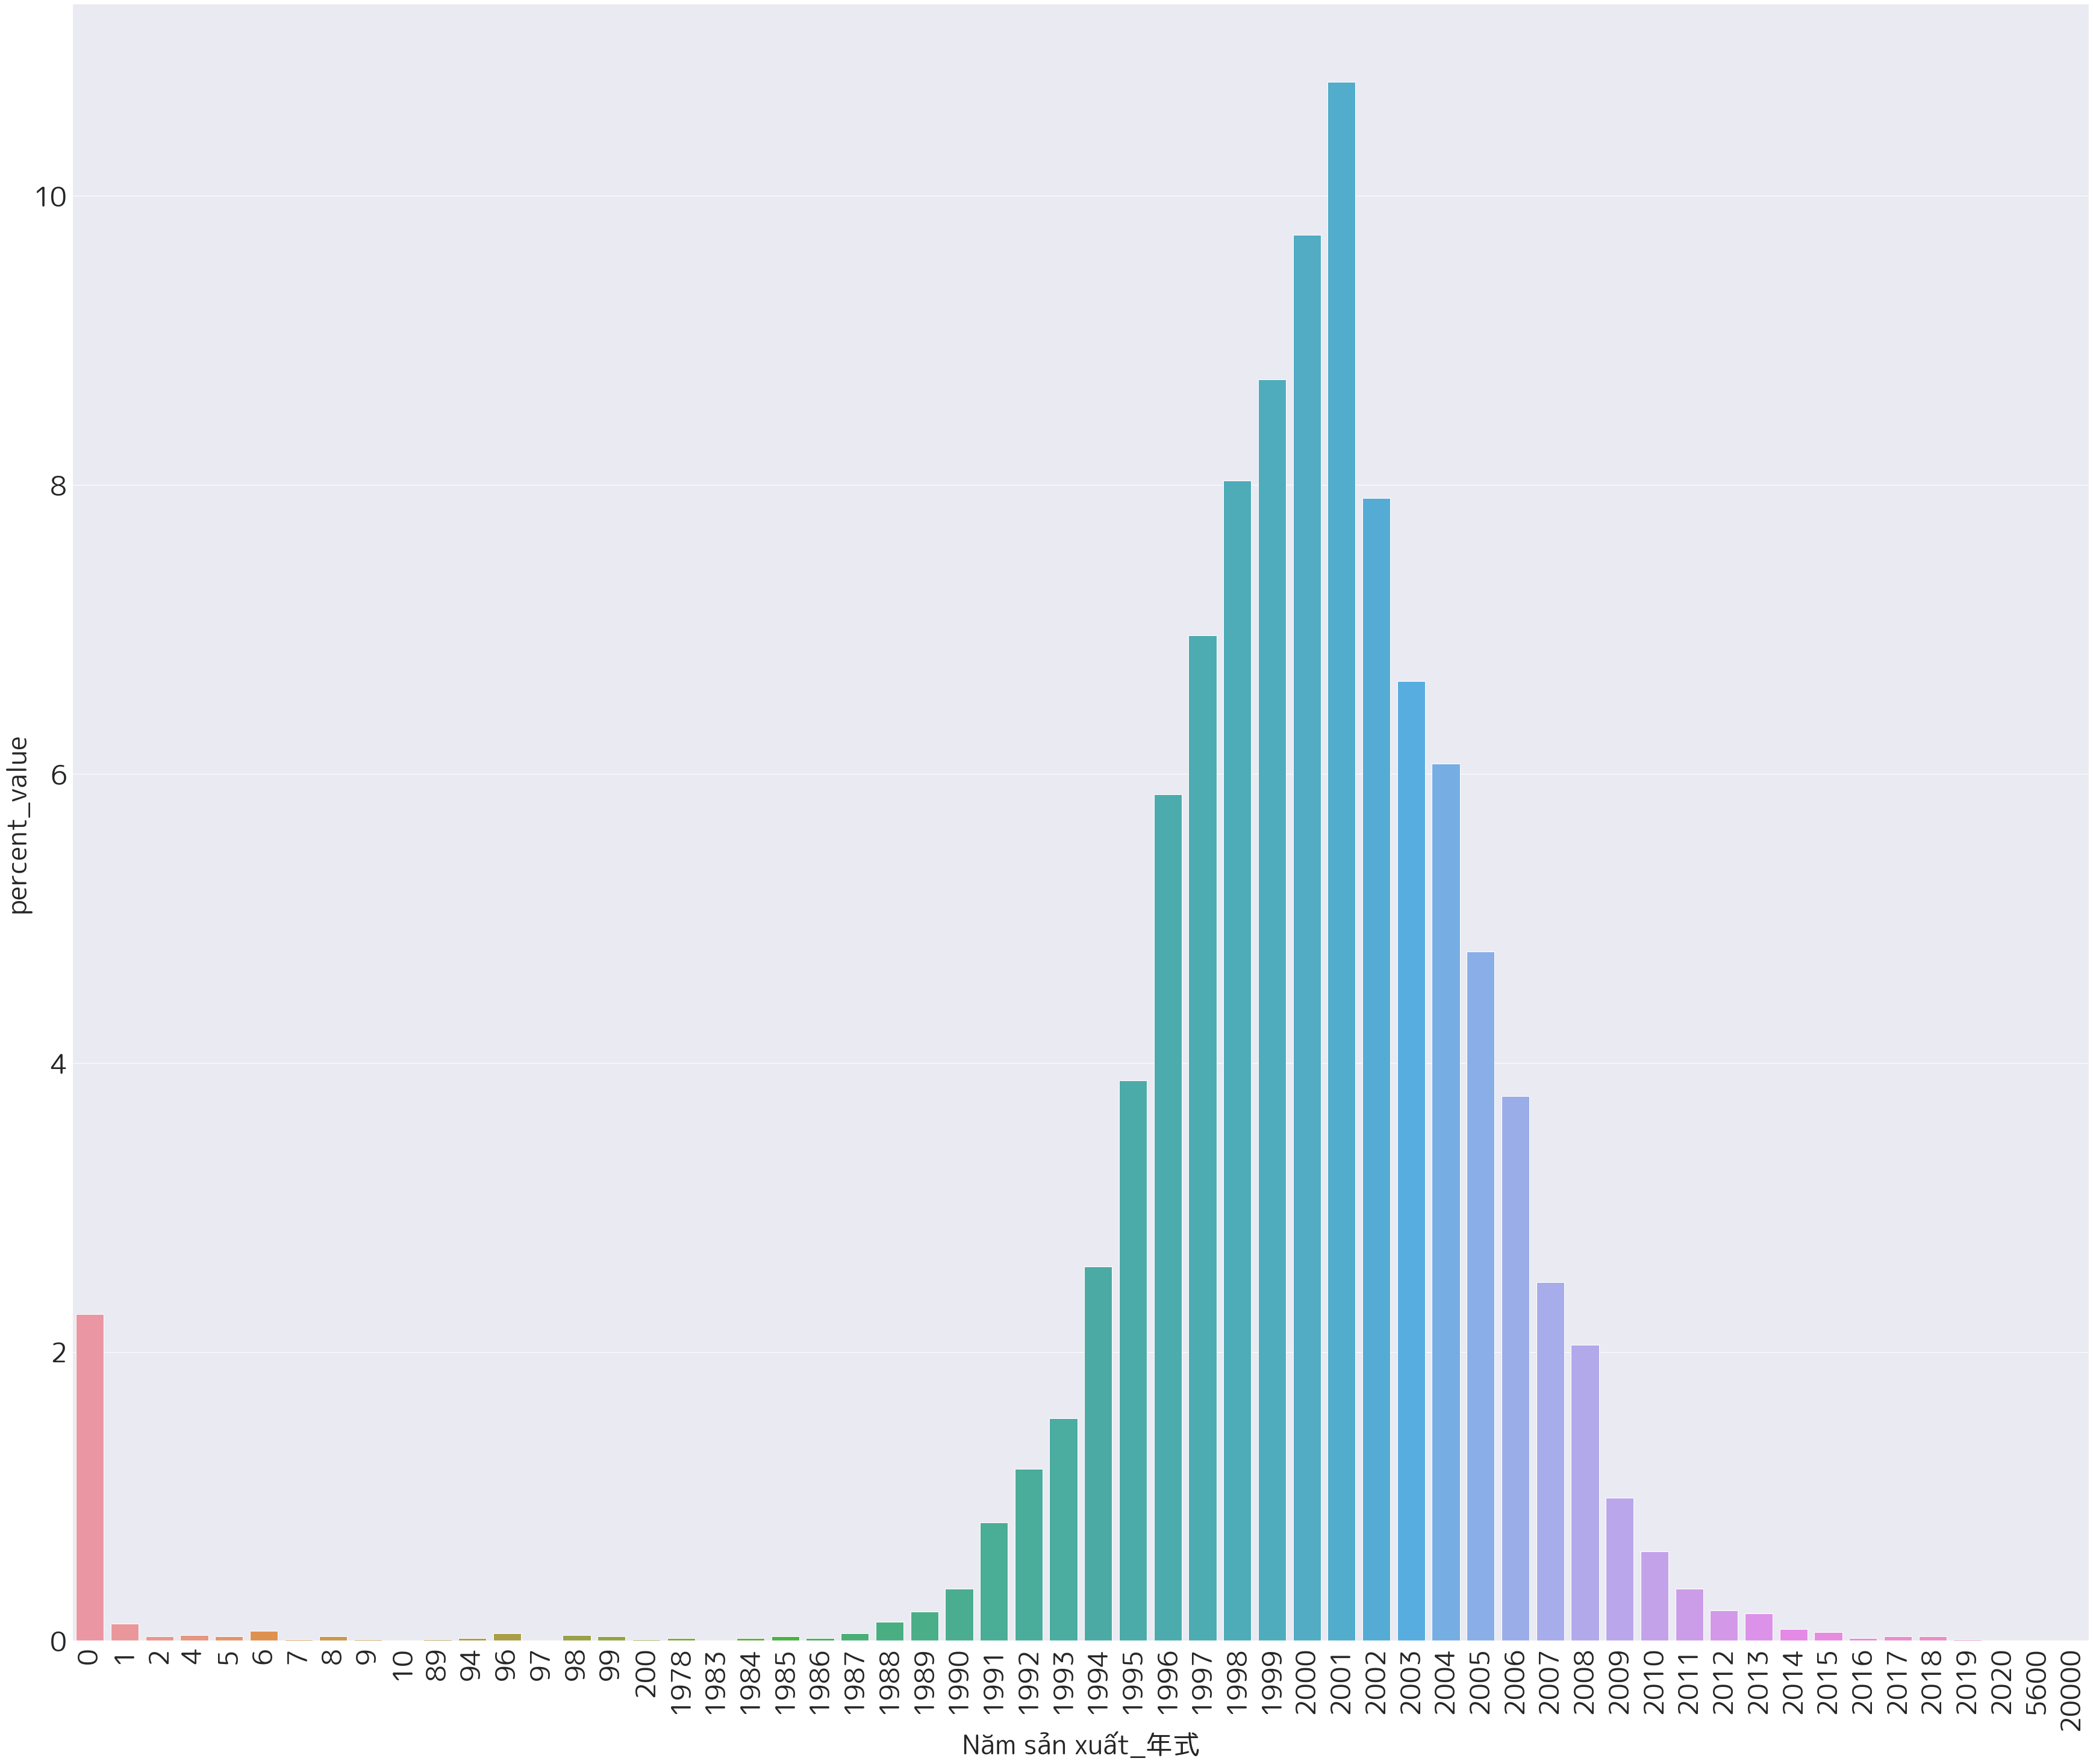

In [133]:
sum_col = df_spec.groupby(['Năm sản xuất_年式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_col['percent_value']  = round(sum_col['sum']/sum_dt*100,2)
sum_col['sum']  = round(sum_col['sum'],2)
sum_thresh  = sum_col[sum_col['percent_value'] >= 0.0]
sum_thresh = sum_thresh.sort_values(by='percent_value', ascending=True)
print(sum_thresh)
plt.figure(figsize=(60,50))
plt.xticks(fontsize = 45,rotation = 90)
plt.xlabel(xlabel = 'Năm sản xuất_年式',fontsize = 45)
plt.yticks(fontsize = 45)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 45)
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=sum_thresh,ci=None)

<AxesSubplot:xlabel='percent_value', ylabel='Model xe_車輌型式'>

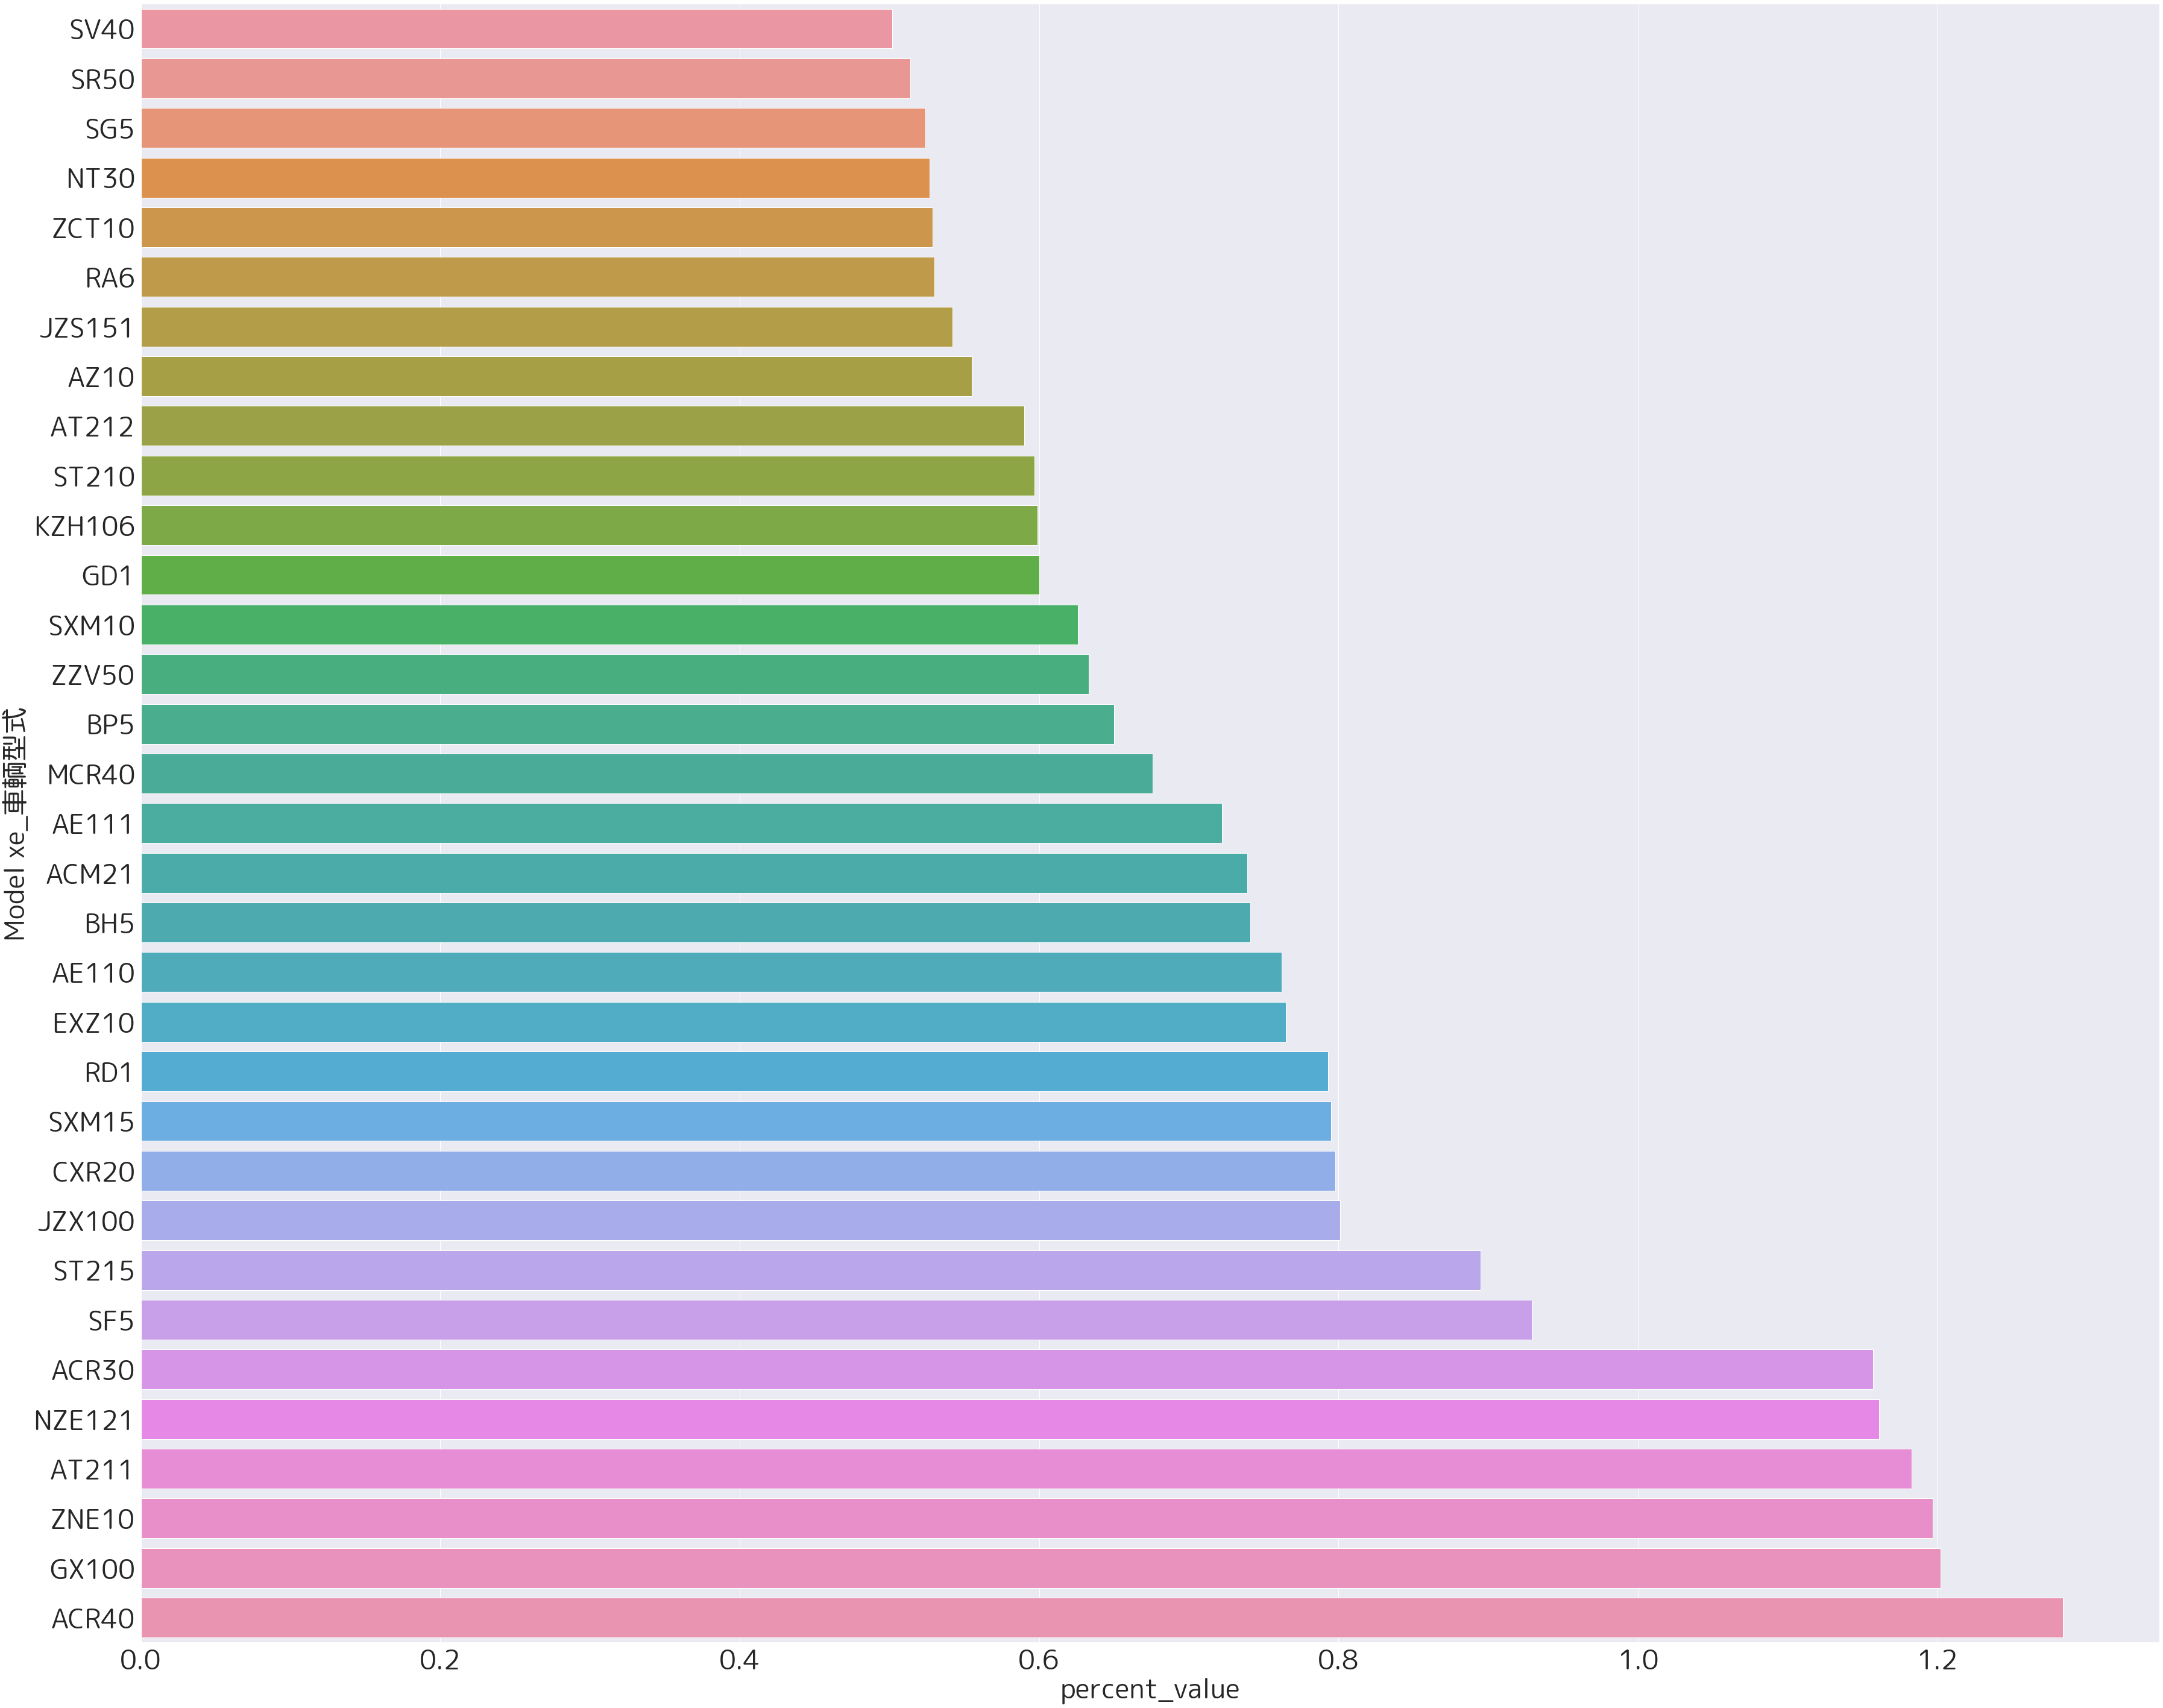

In [67]:
sum_col = df_spec.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_col['percent_value']  = round(sum_col['sum']/sum_dt*100,3)
sum_col['sum']  = round(sum_col['sum'],2)
sum_thresh  = sum_col[sum_col['percent_value'] > 0.5]
sum_thresh = sum_thresh.sort_values(by='percent_value', ascending=True)
plt.figure(figsize=(60,50))
plt.xticks(fontsize = 45)
plt.xlabel(xlabel = 'Model xe_車輌型式',fontsize = 45)
plt.yticks(fontsize = 45)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 45)
sns.barplot(y='Model xe_車輌型式',x='percent_value',data=sum_thresh,ci=None)

In [194]:
sum_thresh['Tên xe_車名'].nunique()

62

<AxesSubplot:xlabel='Model xe_車輌型式', ylabel='percent_value'>

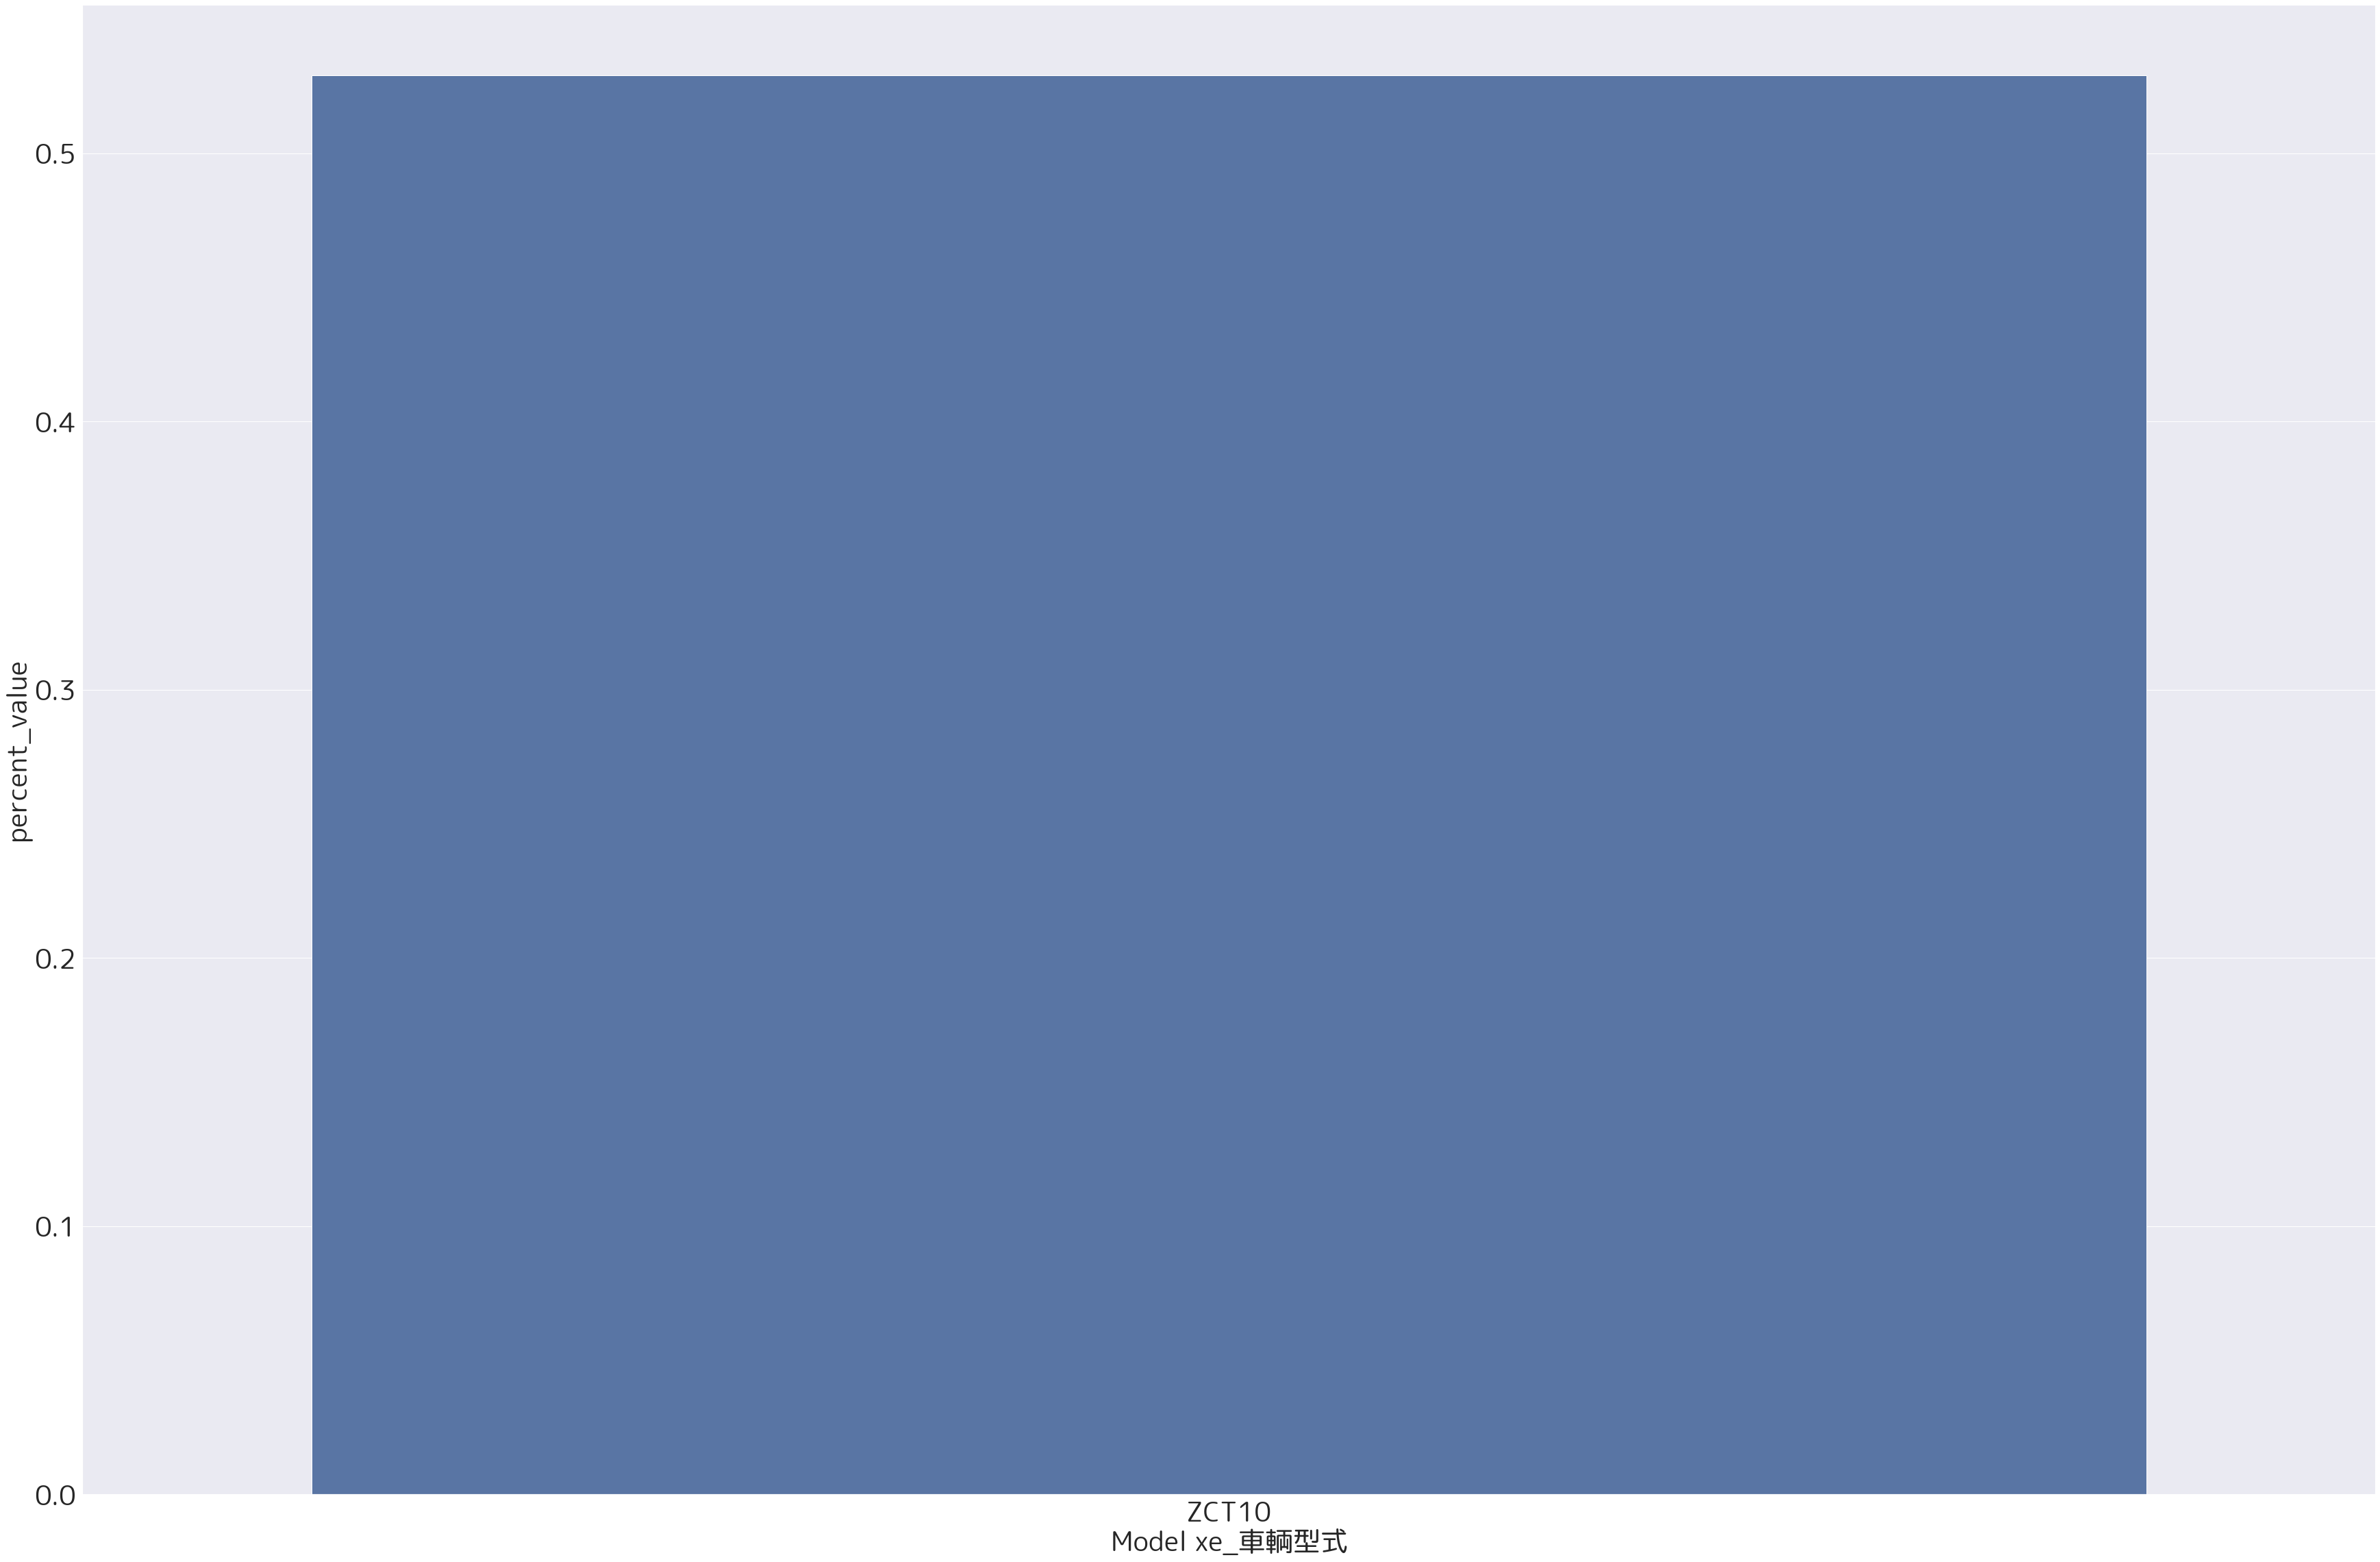

In [86]:
plt.figure(figsize=(60,40))
plt.xticks(fontsize = 40)
plt.xlabel(xlabel = col,fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 40)
sns.barplot(x='Model xe_車輌型式',y='percent_value',data=sum_thresh[sum_thresh['Tên xe_車名']== 'ｵｰﾊﾟ' ],ci=None)

In [105]:
df_best_5_tenxe = df_spec[(df_spec['Tên xe_車名'] == 'ｴｽﾃｨﾏ') | (df_spec['Tên xe_車名'] == 'レガシィ') | (df_spec['Tên xe_車名'] == 'カルディナ') | (df_spec['Tên xe_車名'] == 'ｸﾗｳﾝ') | (df_spec['Tên xe_車名'] == 'マークII')]
df_best_5_tenxe

Tên xe_車名 Model xe_車輌型式 Engine model_エンジン型式 Truyền động 1_駆動1  \
16         レガシィ           BH9                EJ25                FF   
23         ｸﾗｳﾝ        JZS171              1JZ-GE                FR   
33         ｸﾗｳﾝ        JZS155              2JZ-GE                FR   
37        マークII          LX90             2LII-TE                FR   
42         レガシィ           BG5                EJ20                FF   
...         ...           ...                 ...               ...   
20320     ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
20325      レガシィ           BE5              EJ20-T                FF   
20326     カルディナ         ST198               3S-FE                FF   
20342     マークII         GX100               1G-FE                FR   
20385     マークII        JZX100        1JZ-GE VVT-i                FR   

      Truyền động 2_駆動2 TM_TM  Năm sản xuất_年式 D/G_Ｄ／Ｇ  Thành tích bán ra_販売実績  
16                  4WD    AT           1999.0       G                 35000.0  
23                  2WD    AT           1999.0       G                 10000.0  
33                  2WD    AT           1996.0       G                 35000.0  
37                  2WD    AT           1994.0       D                110000.0  
42                  4WD    MT           1997.0       G                 30000.0  
...                 ...   ...              ...     ...                     ...  
20320               4WD    AT           2000.0       G                 85000.0  
20325               4WD    MT           2003.0       G                 10000.0  
20326               4WD    AT           2002.0       G                  5000.0  
20342               2WD    AT           2000.0       G                 10000.0  
20385               2WD    AT           1999.0       G                  3000.0  

[2641 rows x 9 columns]

In [141]:
best_5_tenxe = ['ｴｽﾃｨﾏ','レガシィ','カルディナ','ｸﾗｳﾝ','マークII']
best_6_model_xe = ['ACR40','GX100','ZNE10','AT211','NZE121','ACR30']
best_5_engine_model = ['AZ-FE','S-FE','NZ-FE','ZZ-FE','1G-FE']

In [143]:
df_best_5_tenxe['Model xe_車輌型式'].unique()

array(['BH9', 'JZS171', 'JZS155', 'LX90', 'BG5', 'AT211', 'ST215',
       'JZS151', 'ST210', 'ACR30', 'BP5', 'ACR40', 'BP9', 'BH5', 'TCR21',
       'JZX110', 'GS136', 'ST198', 'TCR20', 'GS151', 'TCR10', 'GX100',
       'TCR11', 'GX110', 'GX90', 'CT197', 'ST195', 'MCR40', 'JZS179',
       'JZX93', 'BL5', 'BG3', 'JZS173', 'BEE', 'BPE', 'BHE', 'BE5',
       'JZX115', 'GRS183', 'BLE', 'JZX100', 'ACR55', 'GS131', 'BG9',
       'CT190', 'BL9', 'GX81', 'GRS182', 'JZS153', 'GS130', 'ST190',
       'AZT241', 'AHR10', 'CT198', 'MCR30', 'AT191', 'GS171', 'JZX90',
       'CXR20', 'AZT246', 'JZX101', 'GX105', 'JZX105', 'ACR50', 'BD9',
       'GX115', 'CXR10G', 'JZS175', 'JZS157', 'GRS180', 'ST191', 'JKS175',
       'BE9', 'BG7', 'ZZT241', 'ET196', 'CXR21', 'BD3', 'BD5', 'CT196',
       'GS141', 'CXR10', 'BM9', 'UZS131', 'GRS200', 'BR9', 'GRS181',
       'ST246', 'GSR55', 'GSR50', 'BF5', 'GXS12', 'BC3', 'JZS130',
       'CT196V', 'JZS145', 'CXR20G', 'JZS141', 'ET196V', 'BD2', 'CT195',
       'GX70',

<AxesSubplot:xlabel='Model xe_車輌型式', ylabel='count'>

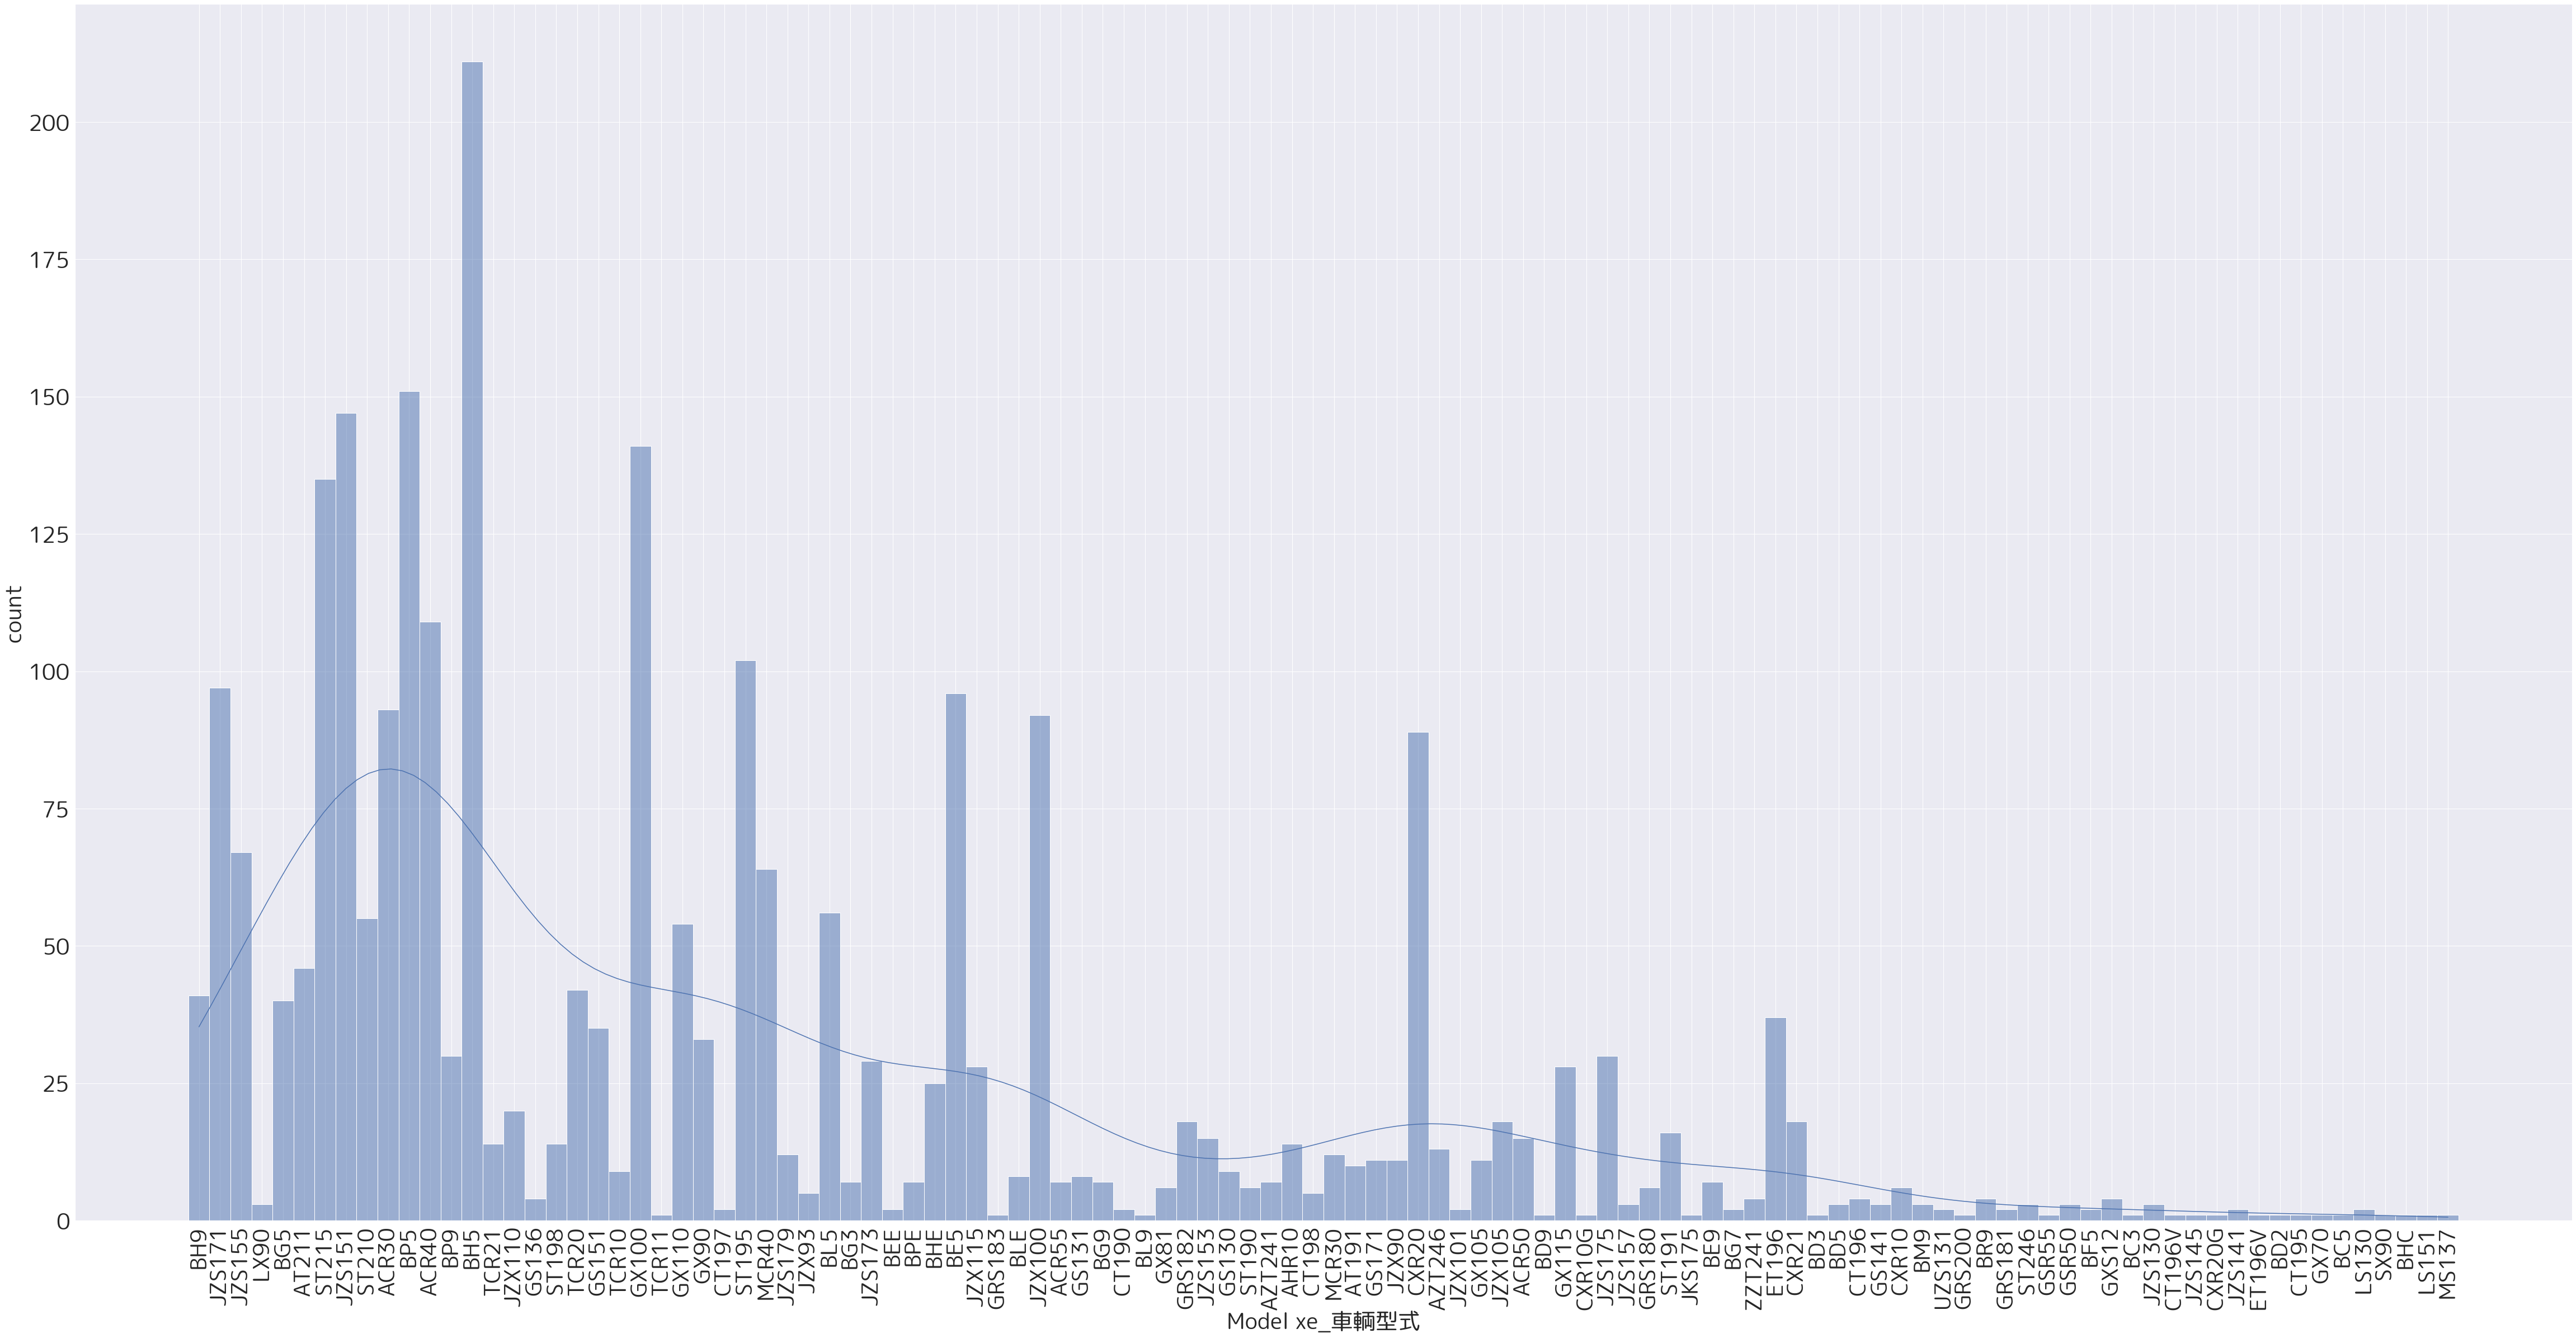

In [151]:
plt.figure(figsize=(80,40))
plt.xticks(fontsize = 40,rotation=90)
plt.xlabel(xlabel = 'Model xe_車輌型式' ,fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel(ylabel = 'count',fontsize = 40,rotation=90)
sns.histplot(data=df_best_5_tenxe, x="Model xe_車輌型式",kde=True)

<AxesSubplot:xlabel='Tên xe_車名', ylabel='Thành tích bán ra_販売実績'>

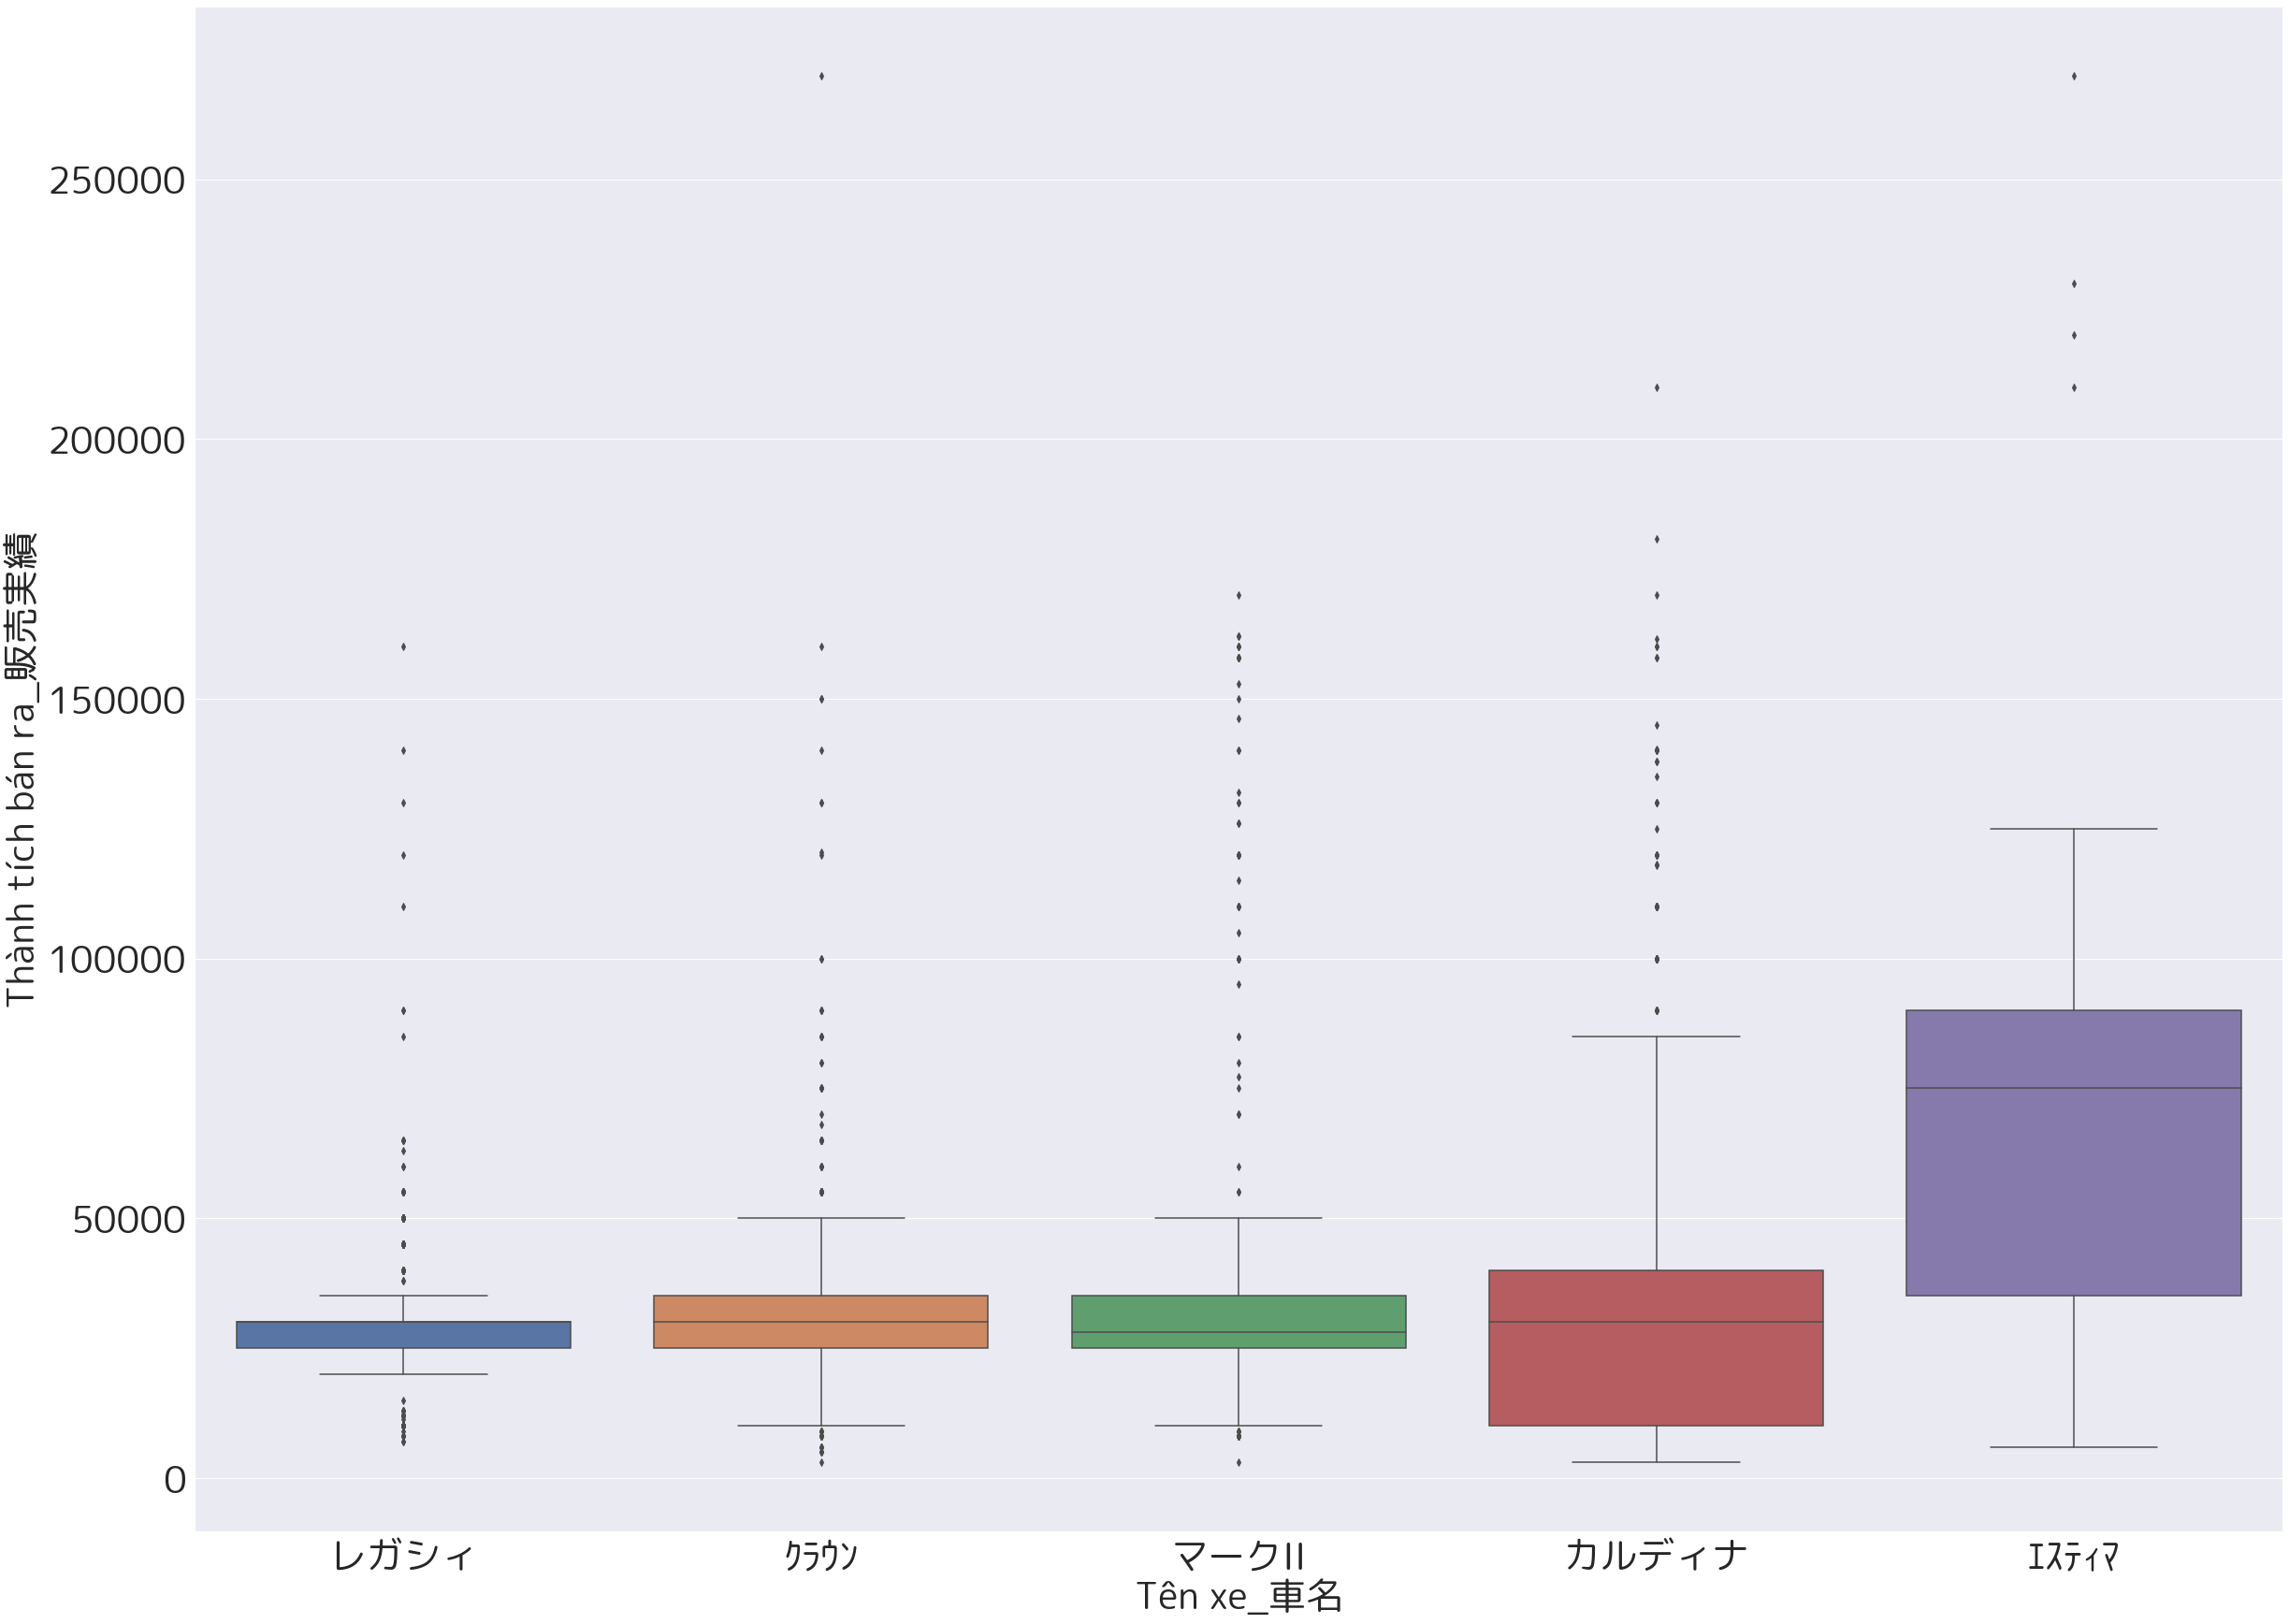

In [156]:
plt.figure(figsize=(40,30))
plt.xticks(fontsize = 40)
plt.xlabel(xlabel = 'Tên xe_車名' ,fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 40)
sns.boxplot(x='Tên xe_車名',y='Thành tích bán ra_販売実績',data=df_best_5_tenxe)

In [157]:
df_ｴｽﾃｨﾏ = df_spec[(df_spec['Tên xe_車名'] == 'ｴｽﾃｨﾏ')]

<AxesSubplot:xlabel='Model xe_車輌型式', ylabel='Thành tích bán ra_販売実績'>

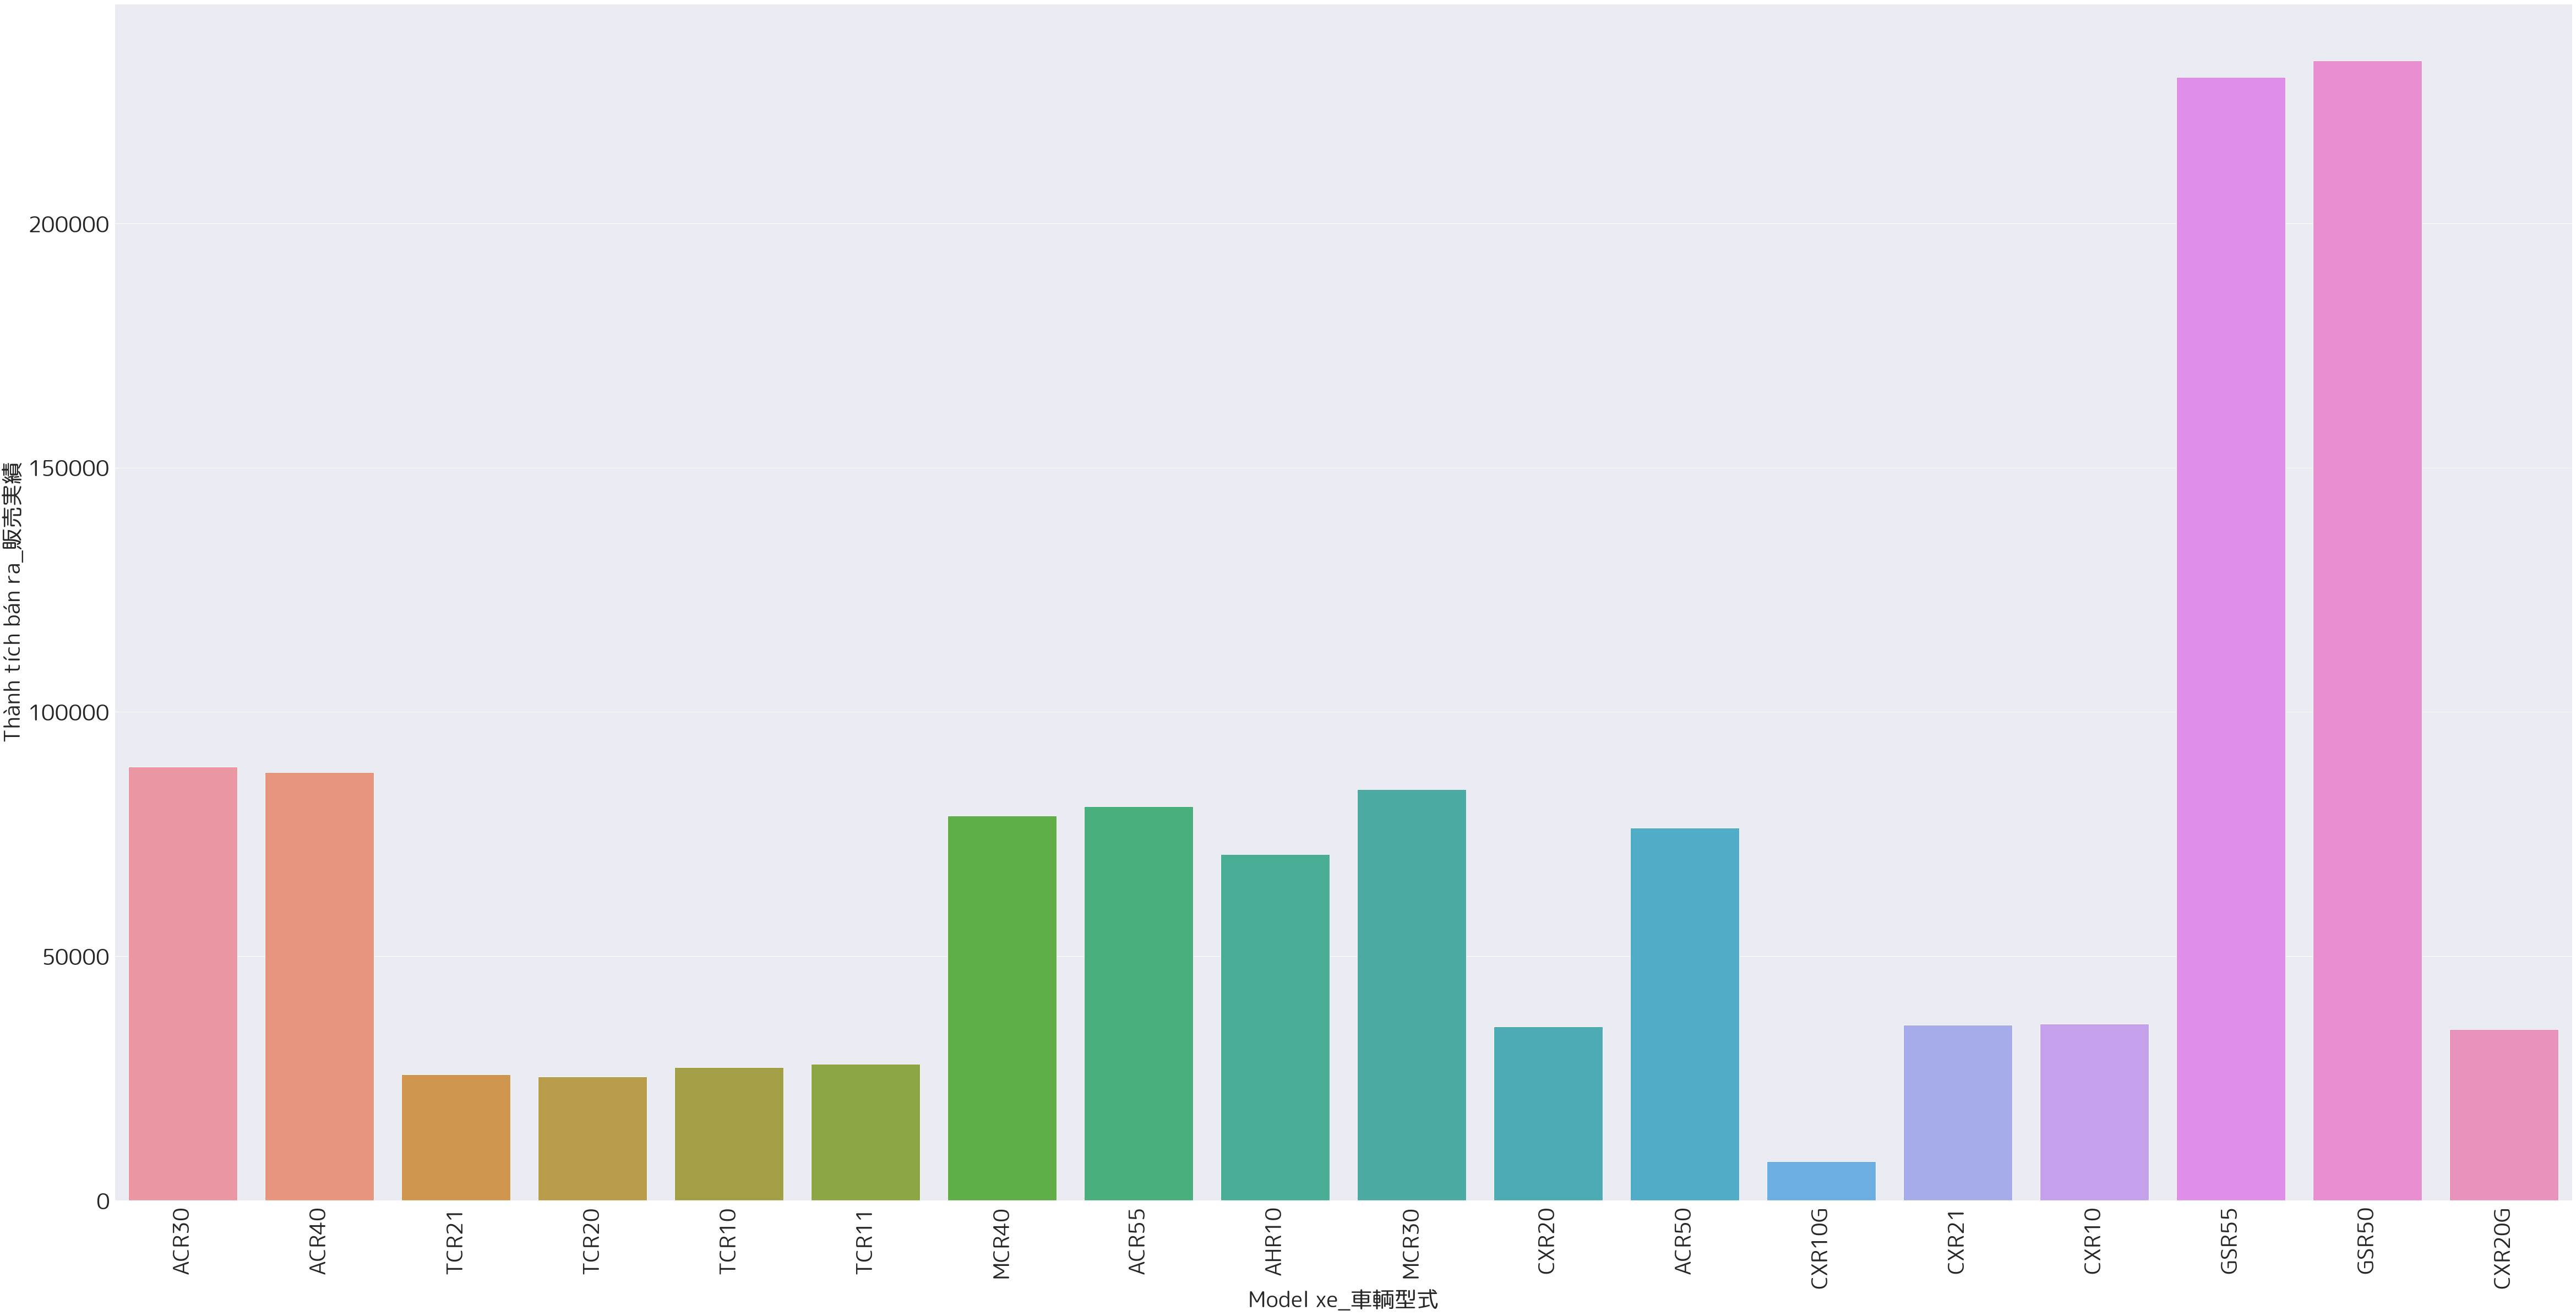

In [163]:
plt.figure(figsize=(80,40))
plt.xticks(fontsize = 50,rotation=90)
plt.xlabel(xlabel = 'Model xe_車輌型式' ,fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel(ylabel = 'count',fontsize = 40,rotation=90)
sns.barplot(data=df_ｴｽﾃｨﾏ, x="Model xe_車輌型式",y='Thành tích bán ra_販売実績',ci=None)

In [164]:
df_ACR40 = df_spec[(df_spec['Model xe_車輌型式'] == 'GSR50')]

<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='Thành tích bán ra_販売実績'>

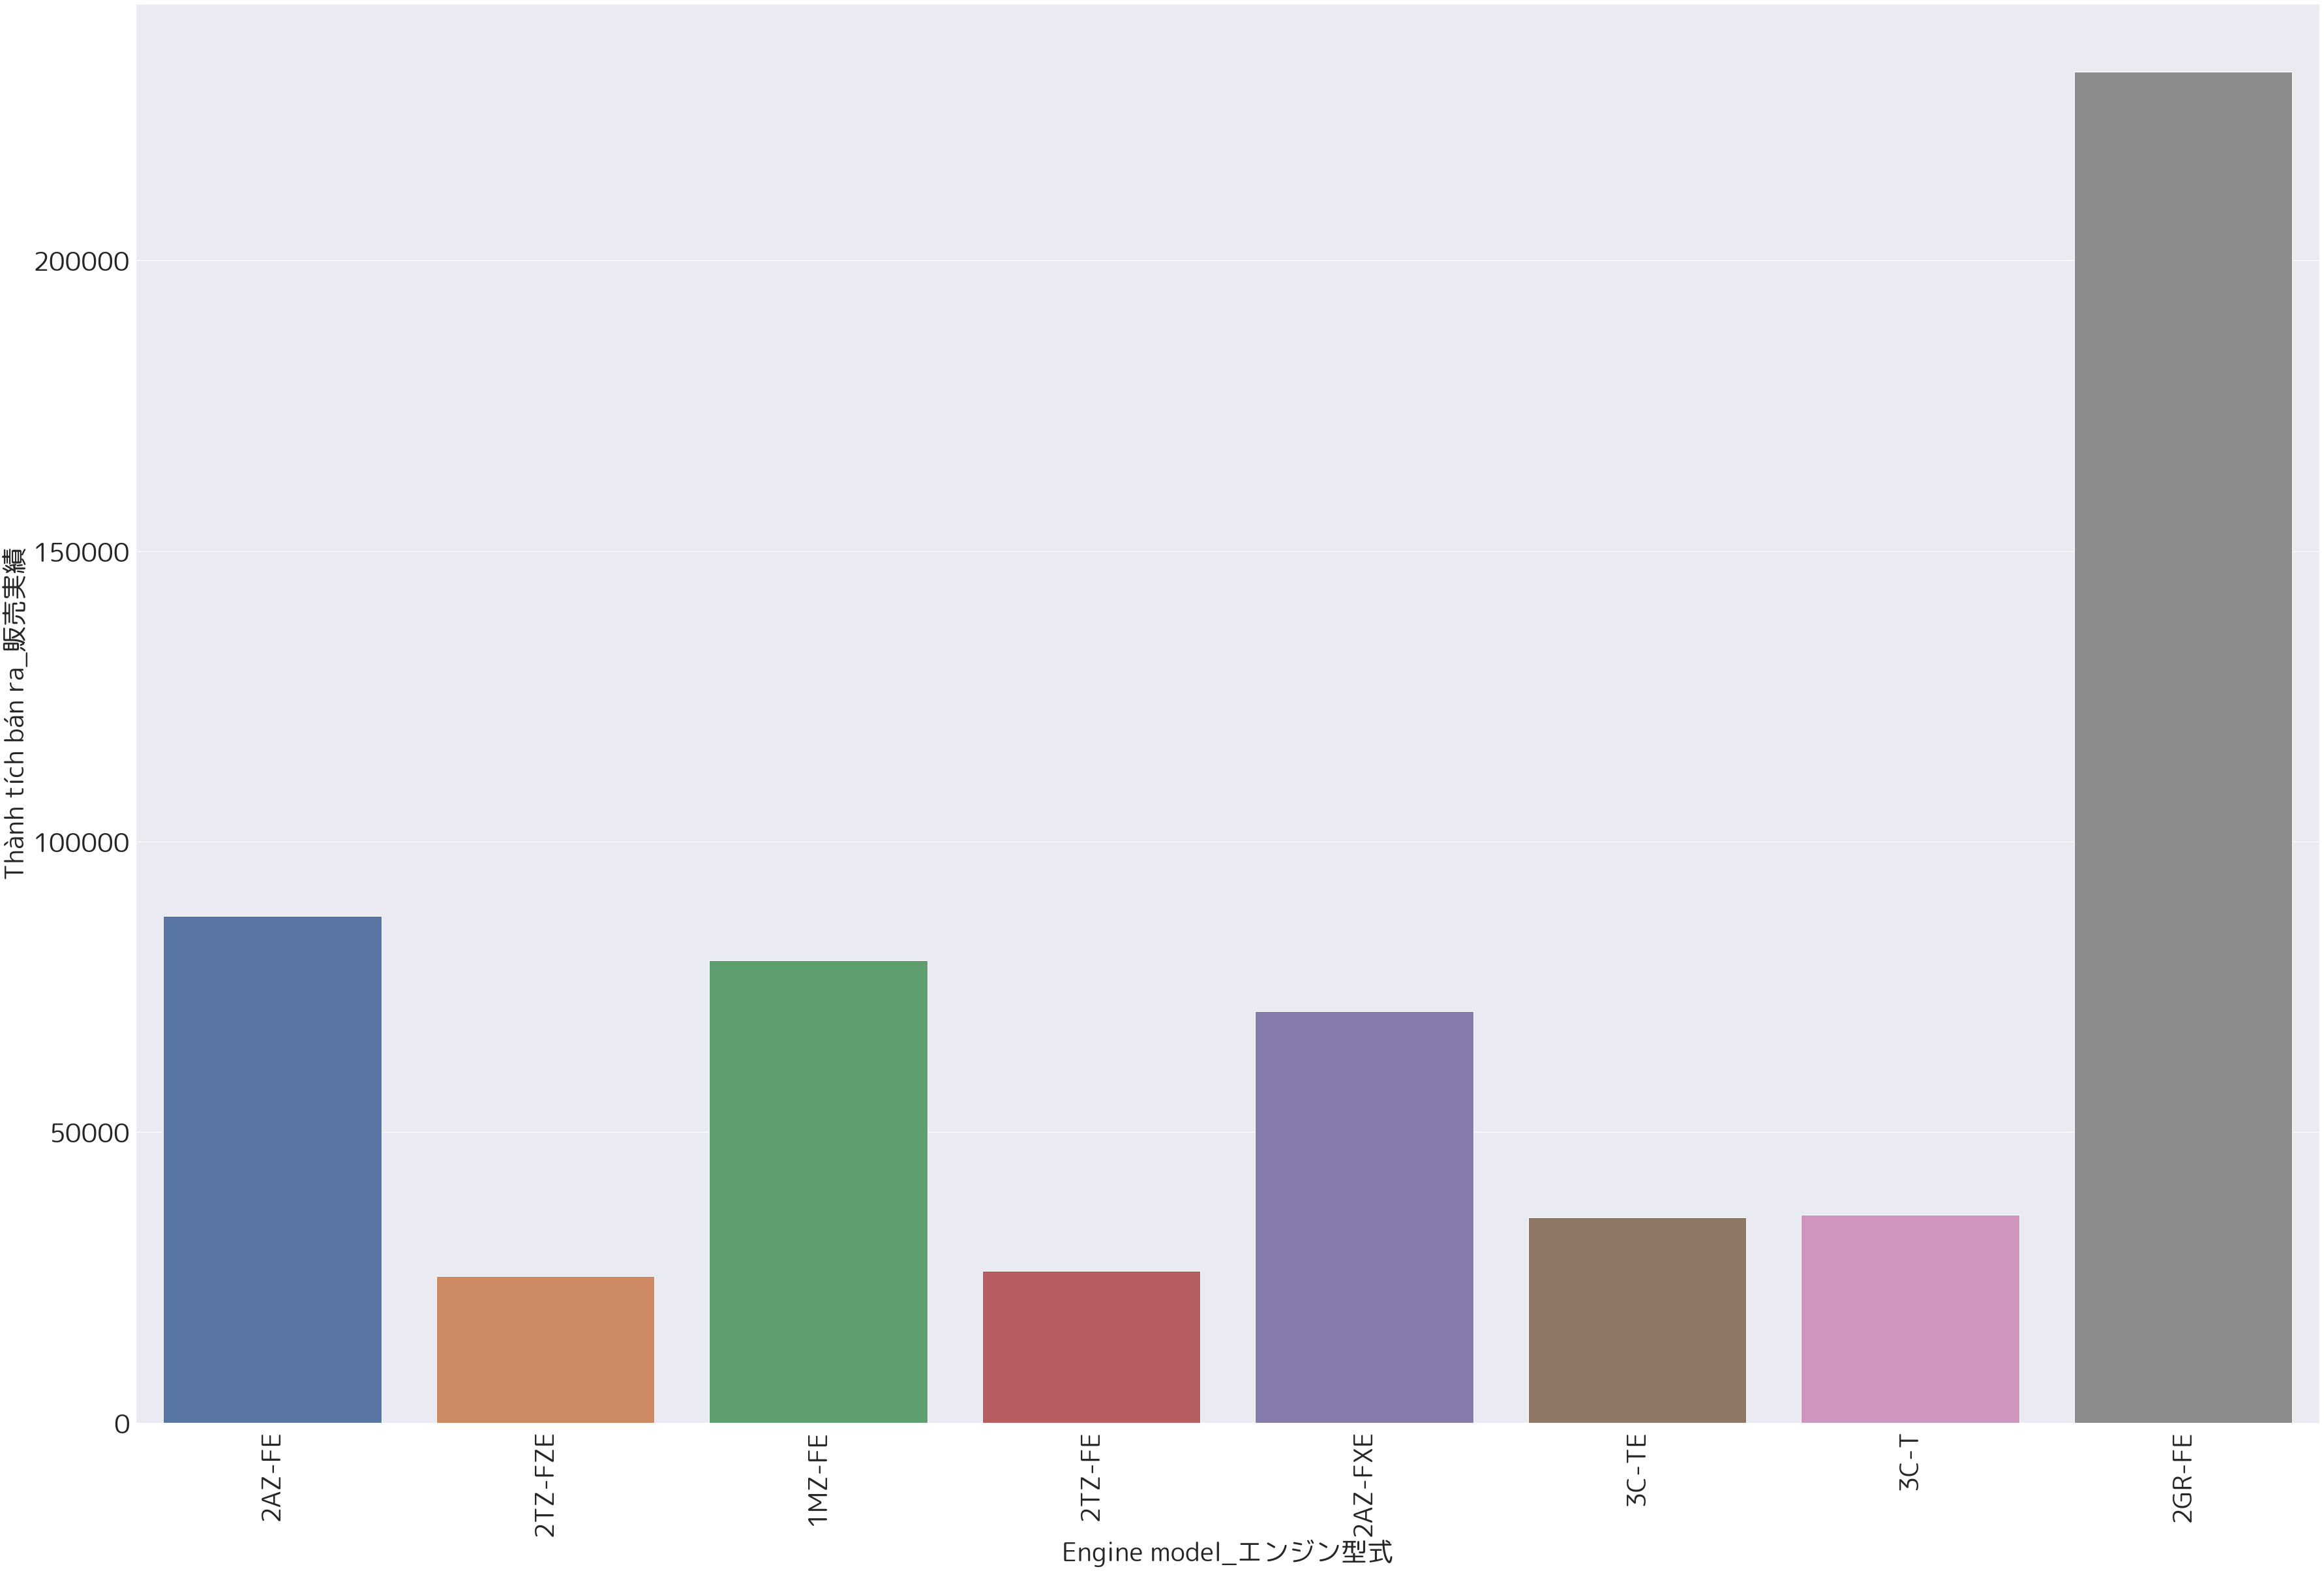

In [187]:
plt.figure(figsize=(60,40))
plt.xticks(fontsize = 40,rotation=90)
plt.xlabel(xlabel = 'Engine model_エンジン型式' ,fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel(ylabel = 'count',fontsize = 40)
sns.barplot(data=df_ｴｽﾃｨﾏ, x="Engine model_エンジン型式",y='Thành tích bán ra_販売実績',ci=None)

In [185]:
df_2GRFE = df_spec[(df_spec['Engine model_エンジン型式'] == '2GR-FE')]
df_spec['Năm sản xuất_年式'] = df_spec['Năm sản xuất_年式'].astype('float64')

<ipython-input-185-fdd1884efc33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spec['Năm sản xuất_年式'] = df_spec['Năm sản xuất_年式'].astype('float64')


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='Thành tích bán ra_販売実績'>

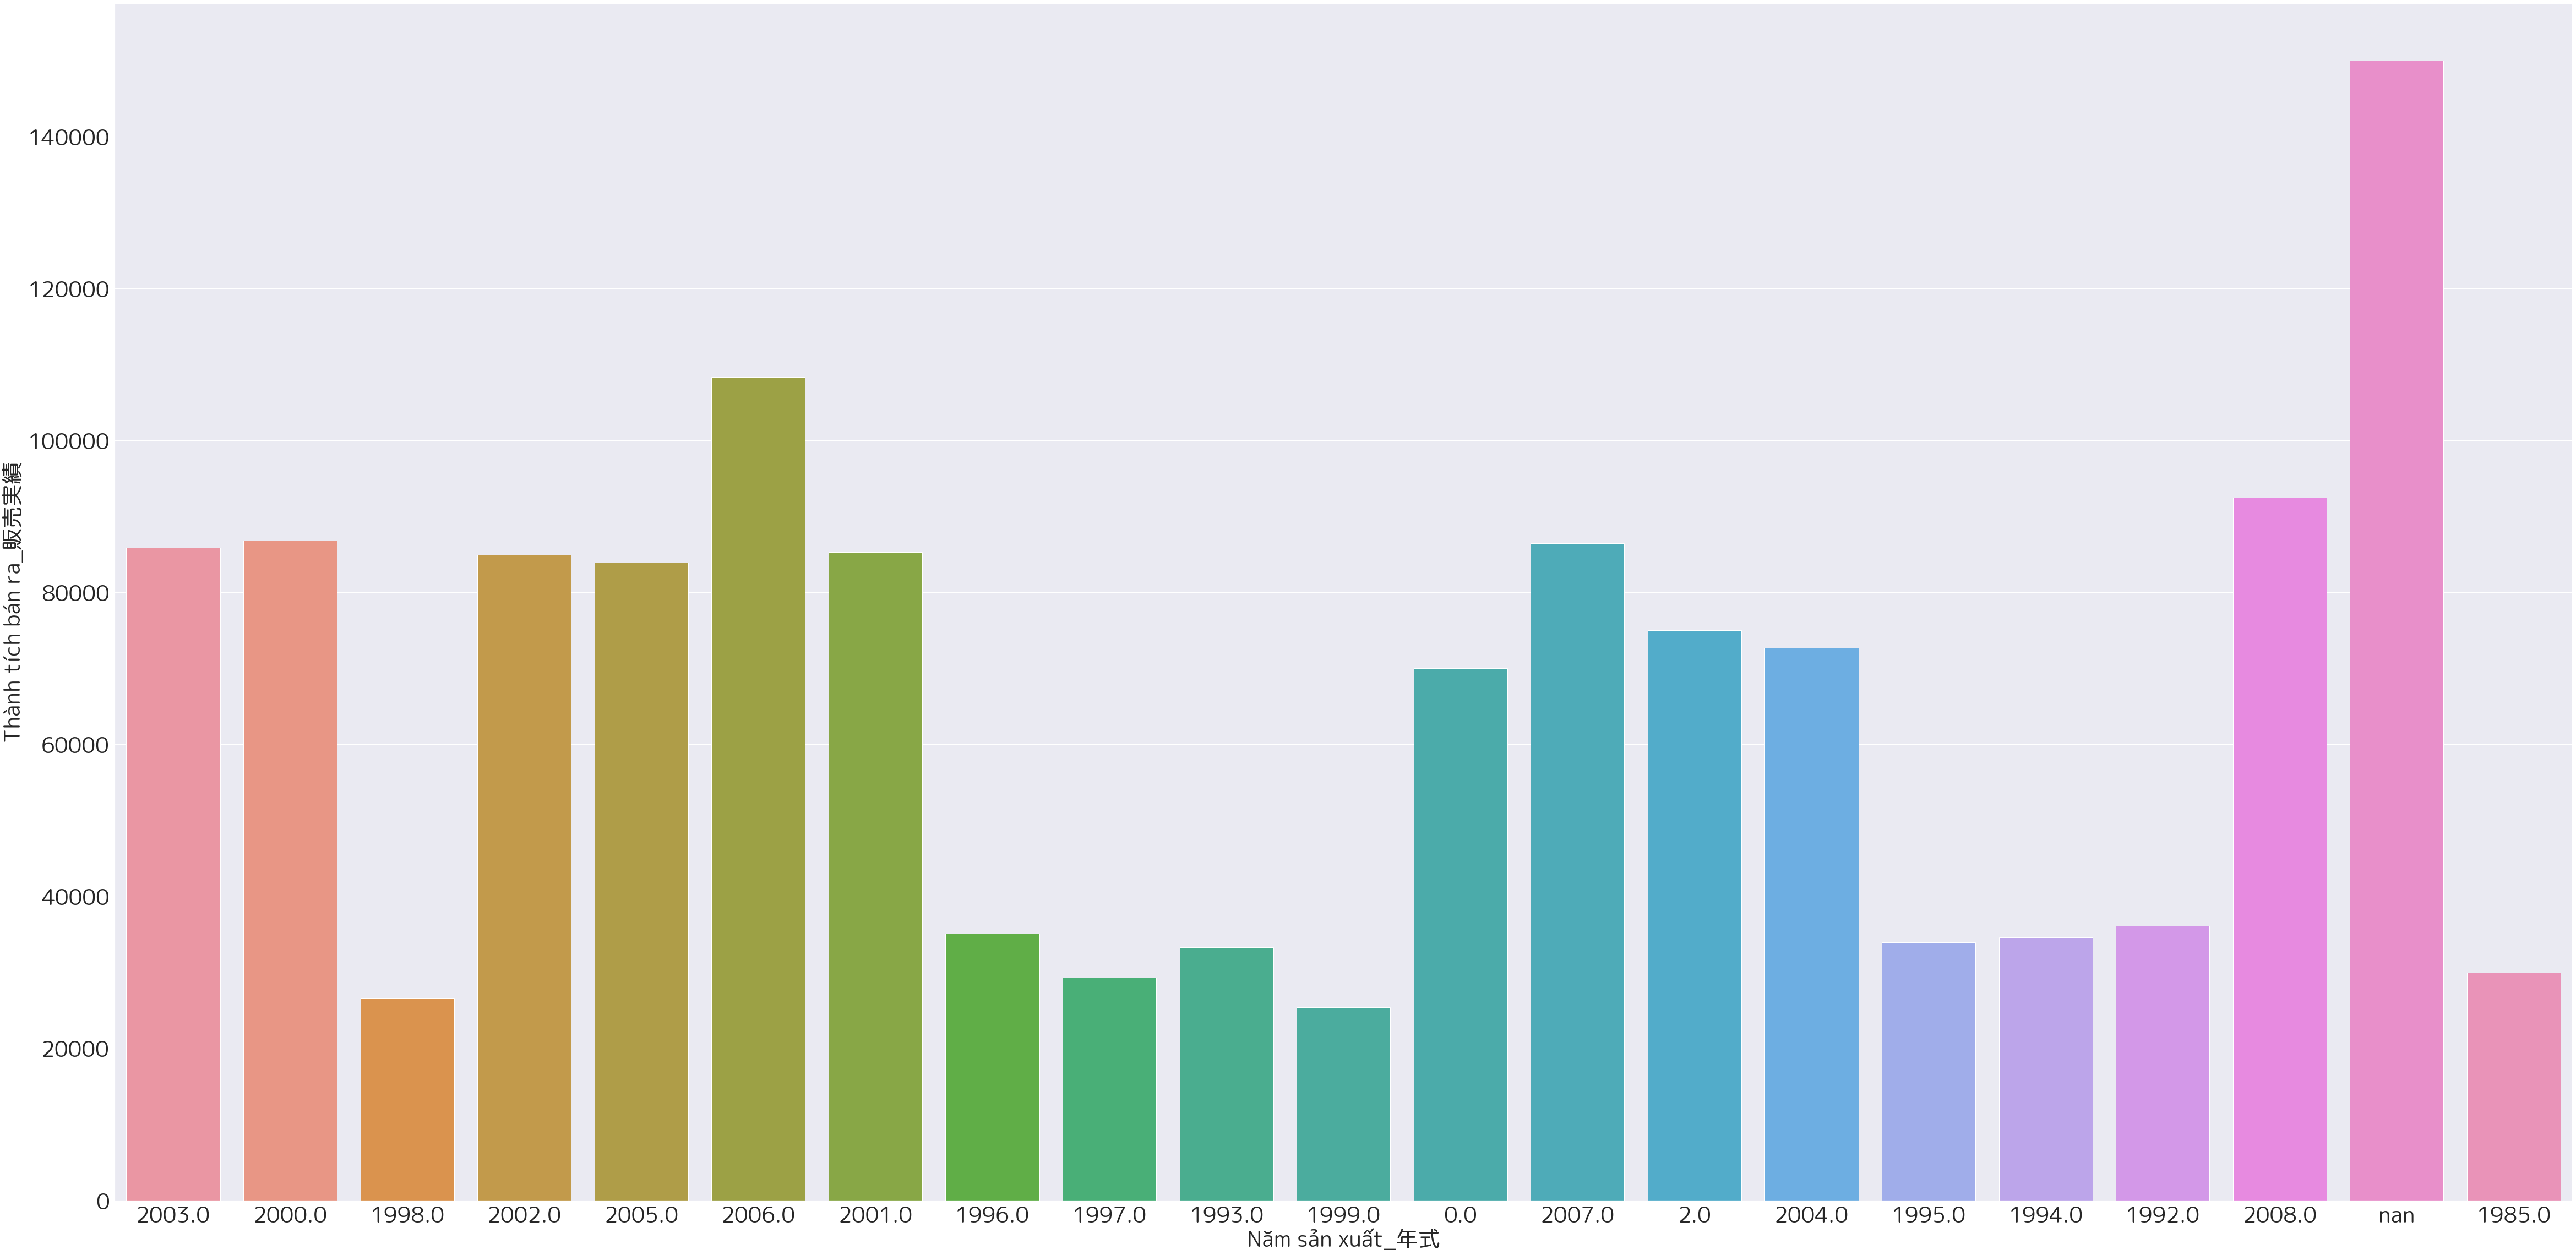

In [186]:
plt.figure(figsize=(80,40))
plt.xticks(fontsize = 40)
plt.xlabel(xlabel = 'Năm sản xuất_年式' ,fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel(ylabel = 'count',fontsize = 40)
sns.barplot(data=df_ｴｽﾃｨﾏ, x="Năm sản xuất_年式",y='Thành tích bán ra_販売実績',ci=None)

In [210]:
# tenxe_modelxe = df_spec.groupby(['Tên xe_車名'])['Model xe_車輌型式'].apply(list).reset_index(name='list_models')
tenxe_modelxe  = df_spec.groupby('Tên xe_車名')['Model xe_車輌型式'].agg(lambda x: list(set(x))).reset_index(name='list_models')
tenxe_modelxe

Tên xe_車名                                        list_models
0        180SX                                             [RS13]
1          208                                         [VF3CC5FS]
2           A4                     [WAUZZZ8D, WAUZZZ8K, WAUZZZ8E]
3           A6                               [WAUZZZ4A, WAUZZZ4B]
4    ADｴｷｽﾊﾟｰﾄ                                            [VJY12]
..         ...                                                ...
491       ﾛﾃﾞｵ                                           [TFS55H]
492      ﾜｺﾞﾝR  [MA63S, CT21S, CV21S, MC21S, MH44S, MH22S, MH2...
493   ﾜｺﾞﾝRｿﾘｵ                [MA15S, MA34S, MA63S, MA61S, MA64S]
494  ﾜｺﾞﾝRﾌﾟﾗｽ                                            [MA63S]
495  ﾜｺﾞﾝRﾜｲﾄﾞ                       [MA61S, MA34S, MA63S, MB61S]

[496 rows x 2 columns]

In [211]:
tenxe_modelxe['list_models'].dtype

dtype('O')

In [212]:
modelxe_engine  = df_spec.groupby('Model xe_車輌型式')['Engine model_エンジン型式'].agg(lambda x: list(set(x))).reset_index(name='list_engine')
modelxe_engine

Model xe_車輌型式   list_engine
0            1C8F4  [CHRYSLER-T]
1          1GCDL19     [CHEV-4G]
2         1GNEL19W     [CHEV-4G]
3             A05A        [3A90]
4              A32      [VQ20DE]
...            ...           ...
1582        ZZT240      [1ZZ-FE]
1583        ZZT241      [1ZZ-FE]
1584        ZZT245      [1ZZ-FE]
1585         ZZV50      [1ZZ-FE]
1586         ZZW30      [1ZZ-FE]

[1587 rows x 2 columns]

In [13]:
tenxe_engine = df_spec.groupby('Tên xe_車名').agg(lambda x: list(set(x)))
tenxe_engine

Model xe_車輌型式  \
Tên xe_車名                                                      
180SX                                                 [RS13]   
208                                               [VF3CC5FS]   
A4                            [WAUZZZ8K, WAUZZZ8E, WAUZZZ8D]   
A6                                      [WAUZZZ4A, WAUZZZ4B]   
ADｴｷｽﾊﾟｰﾄ                                            [VJY12]   
...                                                      ...   
ﾛﾃﾞｵ                                                [TFS55H]   
ﾜｺﾞﾝR      [MC21S, MH44S, MA63S, CT21S, MC22S, MH22S, MH2...   
ﾜｺﾞﾝRｿﾘｵ                 [MA61S, MA63S, MA34S, MA64S, MA15S]   
ﾜｺﾞﾝRﾌﾟﾗｽ                                            [MA63S]   
ﾜｺﾞﾝRﾜｲﾄﾞ                       [MA61S, MA63S, MA34S, MB61S]   

                                         Engine model_エンジン型式  \
Tên xe_車名                                                      
180SX                                             [CA18-DET]   
208                                                   [5F01]   
A4         [AUDI-APT, ABC, AUDI-ADR, AUDI-ALT, AUDI-CDN, ...   
A6                                      [AUDI-AAH, AUDI-AGA]   
ADｴｷｽﾊﾟｰﾄ                                           [MR18DE]   
...                                                      ...   
ﾛﾃﾞｵ                                                [4JB1-T]   
ﾜｺﾞﾝR                 [R06A, K6A-T, K10A, K6A, F6A-T, F6A-E]   
ﾜｺﾞﾝRｿﾘｵ                          [K12B, M13A, K10A-T, K10A]   
ﾜｺﾞﾝRﾌﾟﾗｽ                                     [K10A-T, K10A]   
ﾜｺﾞﾝRﾜｲﾄﾞ                               [M13A, K10A-T, K10A]   

          Truyền động 1_駆動1 Truyền động 2_駆動2     TM_TM  \
Tên xe_車名                                                 
180SX                  [FR]             [2WD]      [MT]   
208                    [FF]             [2WD]      [AT]   
A4                     [FF]        [4WD, 2WD]  [AT, MT]   
A6                     [FF]             [2WD]      [AT]   
ADｴｷｽﾊﾟｰﾄ              [FF]             [2WD]      [AT]   
...                     ...               ...       ...   
ﾛﾃﾞｵ                   [FR]             [4WD]      [MT]   
ﾜｺﾞﾝR                  [FF]        [4WD, 2WD]      [AT]   
ﾜｺﾞﾝRｿﾘｵ               [FF]        [4WD, 2WD]  [AT, MT]   
ﾜｺﾞﾝRﾌﾟﾗｽ              [FF]        [4WD, 2WD]      [AT]   
ﾜｺﾞﾝRﾜｲﾄﾞ              [FF]        [4WD, 2WD]  [AT, MT]   

                                             Năm sản xuất_年式 D/G_Ｄ／Ｇ  \
Tên xe_車名                                                              
180SX                                               [1989.0]     [G]   
208                                                 [2013.0]     [G]   
A4         [nan, nan, nan, nan, nan, nan, 1997.0, 1999.0,...     [G]   
A6                                          [1993.0, 1997.0]     [G]   
ADｴｷｽﾊﾟｰﾄ                                           [2008.0]     [G]   
...                                                      ...     ...   
ﾛﾃﾞｵ                                                [1991.0]     [D]   
ﾜｺﾞﾝR      [1995.0, 1996.0, 1999.0, 2000.0, 2001.0, 2002....     [G]   
ﾜｺﾞﾝRｿﾘｵ   [1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003....     [G]   
ﾜｺﾞﾝRﾌﾟﾗｽ                                   [2000.0, 1999.0]     [G]   
ﾜｺﾞﾝRﾜｲﾄﾞ  [0.0, 1997.0, 1998.0, 1999.0, 2000.0, 2003.0, ...     [G]   

                                      Thành tích bán ra_販売実績  
Tên xe_車名                                                     
180SX                                              [30000.0]  
208                                                [50000.0]  
A4         [40000.0, 8000.0, 20000.0, 9000.0, 45000.0, 50...  
A6                                        [66667.0, 76190.0]  
ADｴｷｽﾊﾟｰﾄ                                          [25000.0]  
...                                                      ...  
ﾛﾃﾞｵ                                     [150000.0, 10000.0]  
ﾜｺﾞﾝR      [12000.0, 20000.0, 17000.0, 25000.0, 9000.0, 1...  
ﾜｺﾞﾝRｿﾘｵ   [20000.0, 8000.0, 4928.0, 89000.0, 

In [14]:
df_doanhthu_loaixe =  df_merged[['Tên xe_車名','Model xe_車輌型式','Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式','D/G_Ｄ／Ｇ','Loại xe_車種','Thành tích bán ra_販売実績']]
df_doanhthu_loaixe

Tên xe_車名 Model xe_車輌型式 Engine model_エンジン型式 Truyền động 1_駆動1  \
0      ｼﾋﾞｯｸﾊｲﾌﾞﾘｯﾄﾞ           ES9             LDA-MF5                FF   
1               ｶﾘｰﾅ         AT211               7A-FE                FF   
2               ｶﾘｰﾅ         AT211               7A-FE                FF   
3              ｽﾄﾘｰﾑ           RN1                D17A                FF   
4              ｾﾌｨｰﾛ           A33              VQ20DE                FF   
...              ...           ...                 ...               ...   
20423       ｶﾛｰﾗﾗﾝｸｽ        NZE121              1NZ-FE                FF   
20424           ﾃﾞﾘｶ          PD8W              4M40-T                FR   
20425          ﾎﾞﾝｺﾞ         SK22M                  R2                FR   
20426         ライトエース          CM41                  2C                FR   
20427         ﾊﾟｼﾞｪﾛ           V34              4D56-T                FR   

      Truyền động 2_駆動2 TM_TM  Năm sản xuất_年式 D/G_Ｄ／Ｇ    Loại xe_車種  \
0                   2WD    AT           2002.0       G  普通車1500-2000   
1                   2WD    AT           2000.0       G  普通車1500-2000   
2                   2WD    AT           2000.0       G  普通車1500-2000   
3                   2WD    AT           2005.0       G  普通車1500-2000   
4                   2WD    AT           2001.0       G  普通車2000-3000   
...                 ...   ...              ...     ...           ...   
20423               2WD    AT           2002.0       G  普通車1500-2000   
20424               4WD    AT           1995.0       D           商用車   
20425               4WD    MT           1999.0       D           商用車   
20426               4WD    MT           1990.0       D           商用車   
20427               4WD    MT           1992.0       D  普通車2000-3000   

       Thành tích bán ra_販売実績  
0                     12000.0  
1                     30000.0  
2                     10000.0  
3                     12000.0  
4                     10000.0  
...                       ...  
20423                 12000.0  
20424                  3500.0  
20425                  3500.0  
20426                  5000.0  
20427                  5000.0  

[20428 rows x 10 columns]

In [17]:
sum_year = df_doanhthu_loaixe.groupby(['Loại xe_車種'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
sum_year['percent_value']  = round(sum_year['sum']/sum_dt*100,3)
sum_year = sum_year.sort_values(by='percent_value', ascending=True)
sum_year

Loại xe_車種          sum  percent_value
0           その他      35000.0          0.005
1     トラック 2-3t    7498250.0          0.985
7          軽自動車   12606180.0          1.656
6      普通車3000超   52821161.5          6.937
2           商用車   72387429.0          9.506
4     普通車1500以下   75797706.0          9.954
5  普通車2000-3000  139981902.0         18.383
3  普通車1500-2000  400341102.0         52.575

In [66]:
df_普通車1500_2000 = df_merged[df_merged['Loại xe_車種'] == '普通車1500-2000']
df_普通車1500_2000.nunique()

Vị trí_ロケーション                                                 3
Ngày sản xuất_生産日                                            31
Tháng sản xuất_生産月                                           12
Năm sản xuất_生産年                                             13
Nv sản xuất_生産担当者                                            43
Số nhập kho_入庫番号                                           9855
Nguồn nhập hàng_仕入先                                        1744
Mã loại phụ tùng_商品コード                                        9
Tên phụ tùng_商品名                                              9
Số nhập kho(phụ tùng)_入庫番号 (部品)                           11001
Tên xe_車名                                                   223
Model xe_車輌型式                                               753
Engine model_エンジン型式                                         301
Số lượng_数量_PARTS                                             1
Tổng giá nhập_仕入合計                                         5456
Số phút công_標準工数                       

In [63]:
tenxe_loaixe = df_doanhthu_loaixe.groupby('Loại xe_車種')['Tên xe_車名'].agg(lambda x: list(set(x)))
df_doanhthu_loaixe.nunique()

Tên xe_車名                  496
Model xe_車輌型式             1587
Engine model_エンジン型式        536
Truyền động 1_駆動1            4
Truyền động 2_駆動2            3
TM_TM                        3
Năm sản xuất_年式             58
D/G_Ｄ／Ｇ                      2
Loại xe_車種                   8
Thành tích bán ra_販売実績     436
dtype: int64

In [20]:
tenxe_loaixe

Loại xe_車種
その他                                                         [マツダ]
トラック 2-3t       [ﾀｲﾀﾝ, ｷｬﾝﾀｰ, ﾎﾞﾝｺﾞﾄﾗｯｸ, ﾀﾞｯﾄｻﾝ, ｻﾆｰﾄﾗｯｸ, ｴﾙﾌ,...
商用車             [ﾎｰﾐｰ, ﾗﾙｺﾞ, ハイエース, ﾊｲﾗｯｸｽｻｰﾌ, ｷｬﾗﾊﾞﾝﾊﾞﾝ, ｶﾛｰﾗ...
普通車1500-2000    [ﾌﾟﾛｼｰﾄﾞﾚﾊﾞﾝﾃ, RVR, ｽﾌﾟﾘﾝﾀｰ, プジョー　307, ｸﾙｰ, ｱﾍ...
普通車1500以下       [ﾊﾟｯｿ, ｽﾌﾟﾗｯｼｭ, アトレーセブン, ｳﾞｨｯﾂ, ﾌｧﾐﾘｱSﾜｺﾞﾝ, ｷｬ...
普通車2000-3000    [ｺﾝﾌｫｰﾄ, ｽｶｲﾗｲﾝ, ｴｽｹｰﾌﾟ, ﾏｰｸX, キャバリエ, ﾌﾟﾚｰﾘｰｼﾞ...
普通車3000超        [ｳﾞｪﾙﾌｧｲｱ, ｱﾙﾌｧｰﾄﾞG, ﾗﾝﾄﾞｸﾙｰｻﾞｰ, ﾊﾘｱｰ, ｸﾗｳﾝﾏｼﾞ...
軽自動車            [ｼﾞﾑﾆｰ, ﾜｺﾞﾝR, ﾐﾗｼﾞｰﾉ, R2, ﾌﾟﾚｵ, ｻﾞｯﾂ, ワゴンR ステ...
Name: Tên xe_車名, dtype: object

In [ ]:
ｴｽﾃｨﾏ	33273759.0	4.37
127	レガシィ	20895128.0	2.74
69	カルディナ	18250683.0	2.40
240	ｸﾗｳﾝ	17081521.5	2.24
120	マークII

In [192]:
#ten xe la ｴｽﾃｨﾏ
df_ｴｽﾃｨﾏ= df_spec[df_spec['Tên xe_車名'] == 'ｴｽﾃｨﾏ']
count_model = df_ｴｽﾃｨﾏ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
sum_model = df_ｴｽﾃｨﾏ.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_ｴｽﾃｨﾏ.nunique()

Tên xe_車名                  1
Model xe_車輌型式             18
Engine model_エンジン型式        8
Truyền động 1_駆動1          2
Truyền động 2_駆動2          2
TM_TM                      2
Năm sản xuất_年式           20
D/G_Ｄ／Ｇ                    2
Thành tích bán ra_販売実績    38
dtype: int64

<ipython-input-194-9fcf87ef57ac>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-194-9fcf87ef57ac>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-194-9fcf87ef57ac>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticklabels(),size =30)


Text(0.5, 0, 'Model xe_車輌型式')

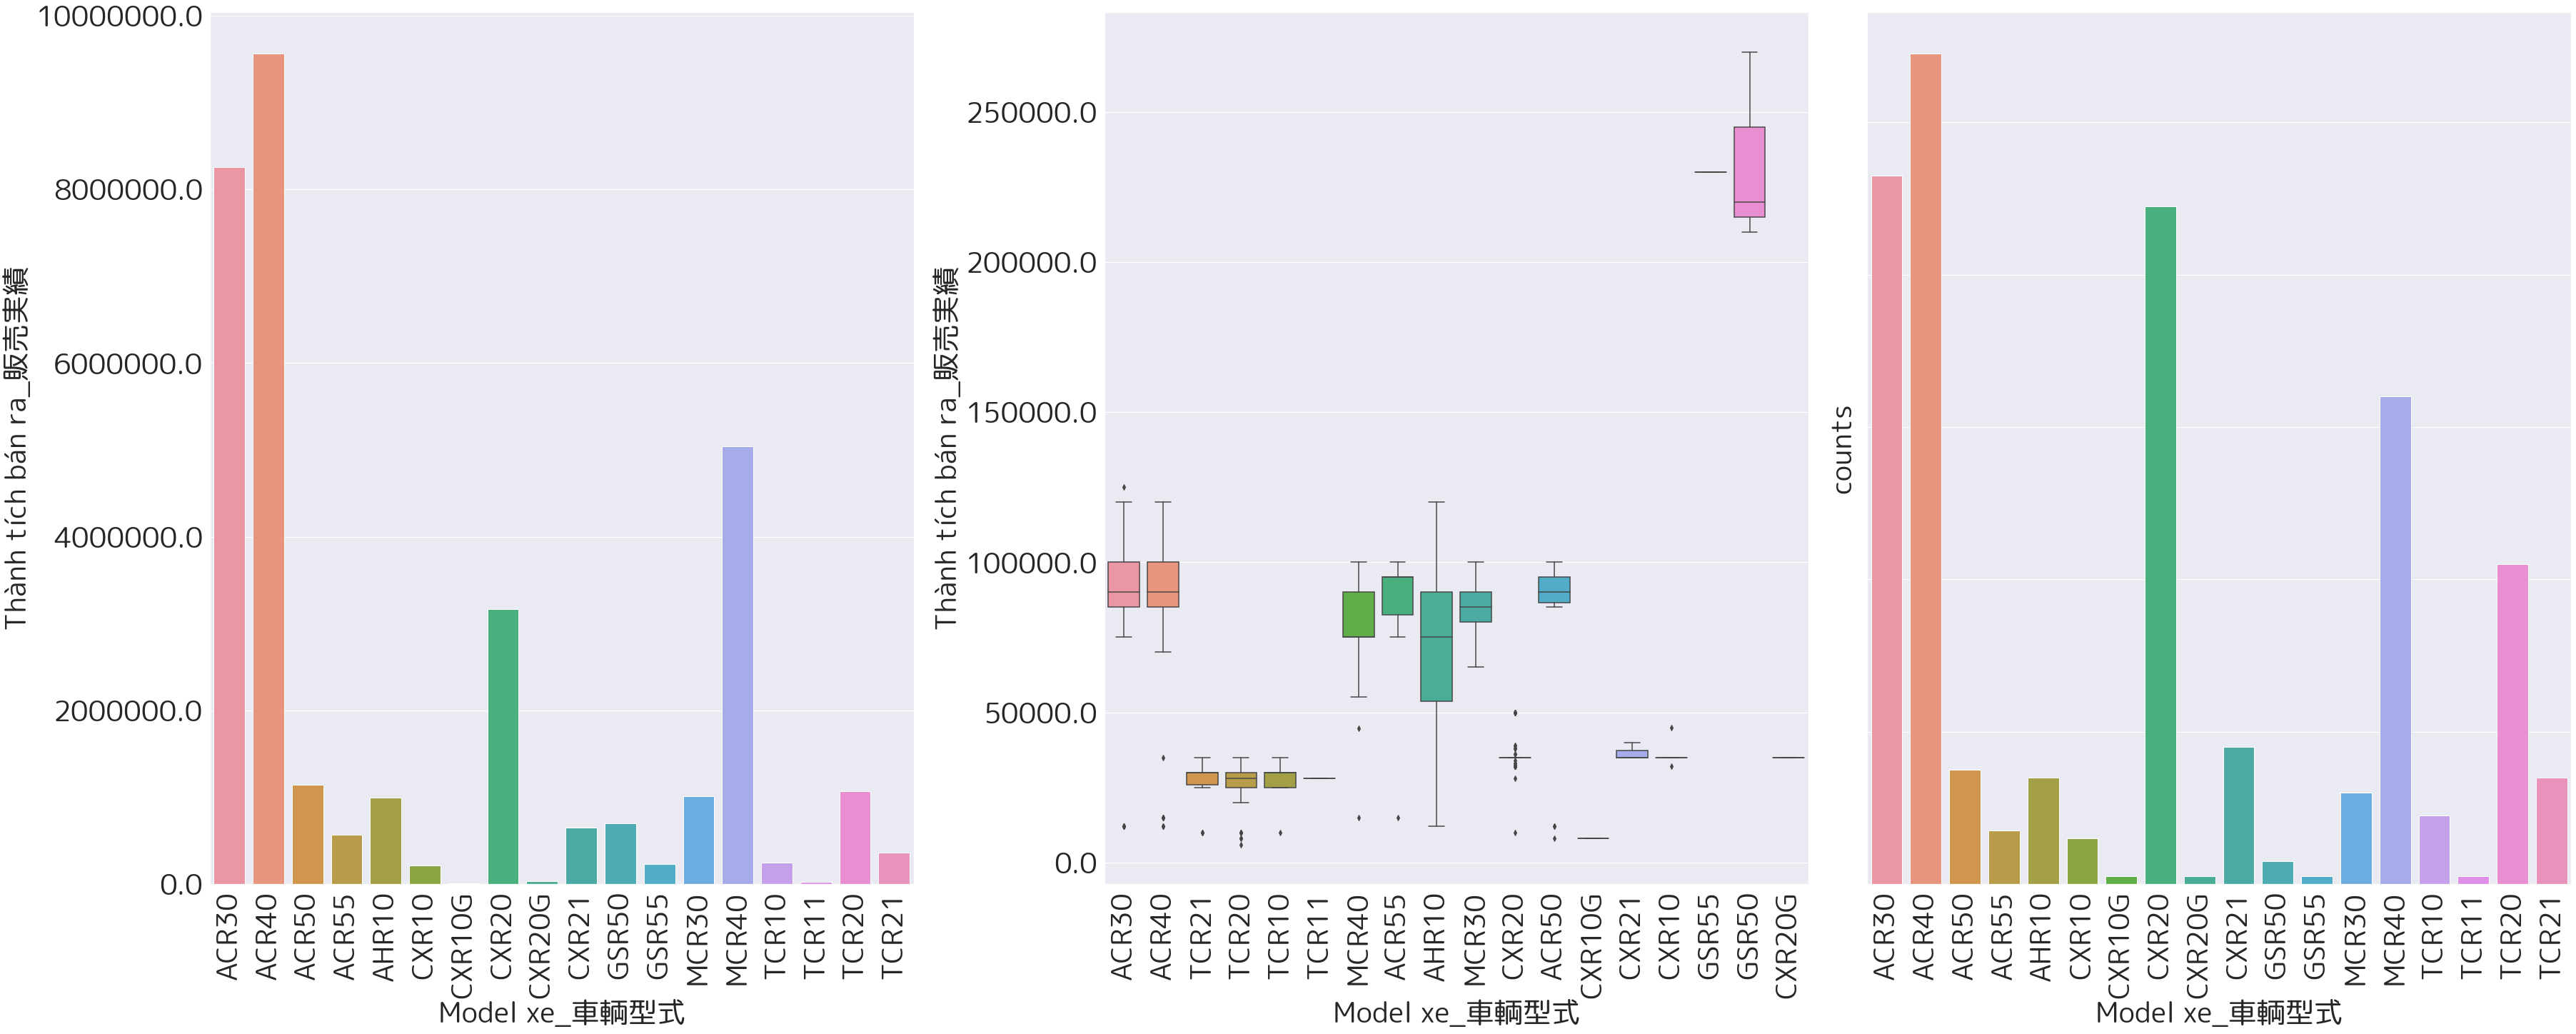

In [194]:
# plt.figure(figsize=(80,50))
# plt.xticks(fontsize = 60)
# plt.xlabel(xlabel = 'Năm sản xuất_年式' ,fontsize = 60)
# plt.yticks(fontsize = 60)
# plt.ylabel(ylabel = 'count',fontsize = 60)
# sns.barplot(data=df_ｴｽﾃｨﾏ, x="Model xe_車輌型式",y='Thành tích bán ra_販売実績',ci=None)
count_model = df_ｴｽﾃｨﾏ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
df_ｴｽﾃｨﾏ.nunique()
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Model xe_車輌型式',y='sum',data=sum_model,ax=axs[0],ci=None)
q = sns.boxplot(x='Model xe_車輌型式',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ,ax=axs[1])
r = sns.barplot(x='Model xe_車輌型式',y='counts',data=count_model,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,rotation=90)
q.set_xticklabels(q.get_xticklabels(),size =40,rotation=90)
r.set_xticklabels(r.get_xticklabels(),size =40,rotation=90)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticklabels(),size =30)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Model xe_車輌型式",fontsize = 40)
q.set_xlabel("Model xe_車輌型式",fontsize = 40)
r.set_xlabel("Model xe_車輌型式",fontsize = 40)

<ipython-input-161-5240135f963c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-161-5240135f963c>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-161-5240135f963c>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Engine model_エンジン型式')

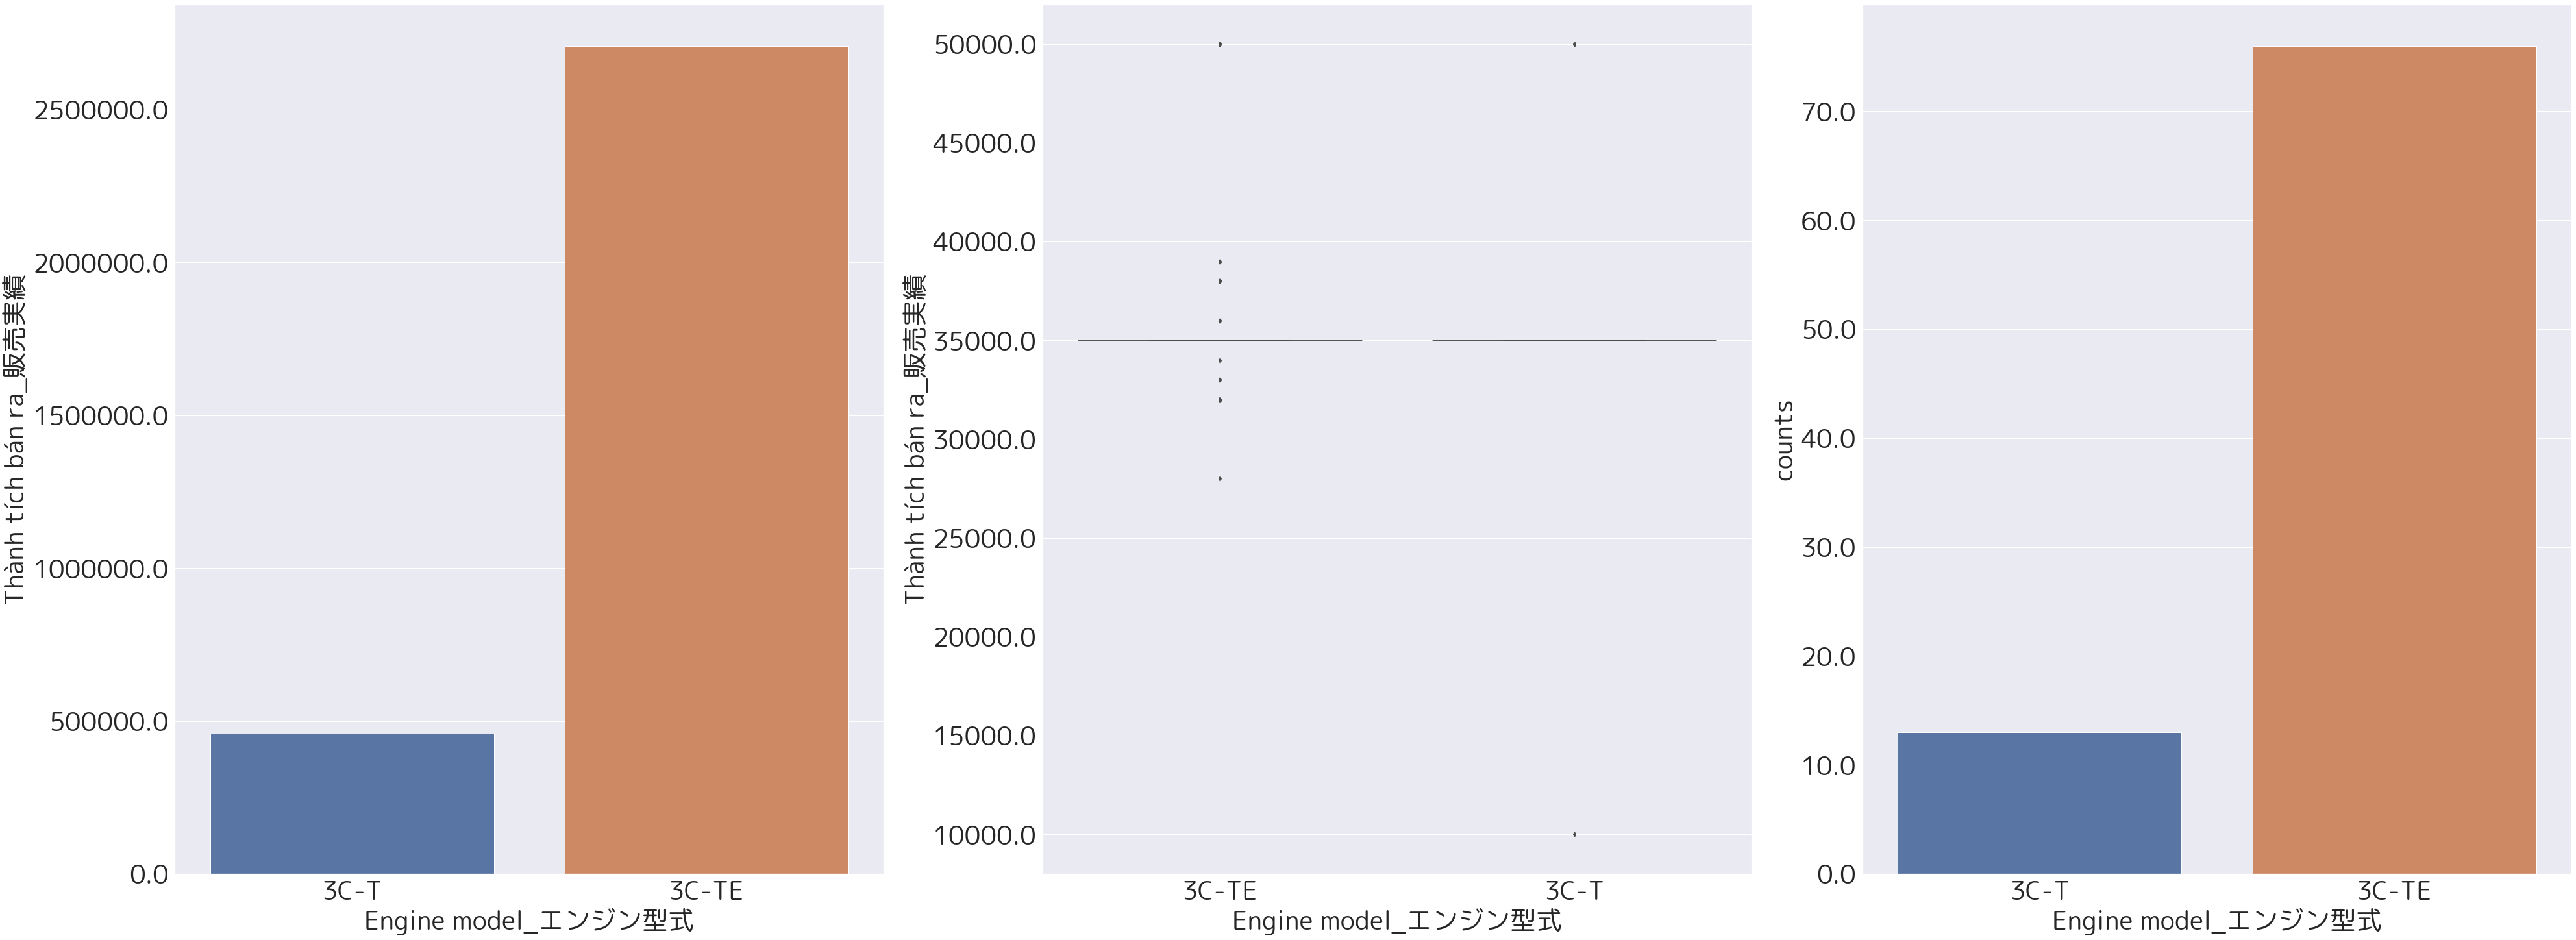

In [161]:
df_ｴｽﾃｨﾏ_CXR20 = df_ｴｽﾃｨﾏ[df_ｴｽﾃｨﾏ['Model xe_車輌型式'] == 'CXR20']
# print(df_ｴｽﾃｨﾏ_ACR40.nunique())
# print(df_ｴｽﾃｨﾏ_ACR40)
count_em = df_ｴｽﾃｨﾏ_CXR20.groupby(['Engine model_エンジン型式'])['Engine model_エンジン型式'].count().reset_index(name='counts')
sum_em = df_ｴｽﾃｨﾏ_CXR20.groupby(['Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
# plt.figure(figsize=(80,60))
# plt.xticks(fontsize = 60)
# plt.xlabel(xlabel = 'Engine model_エンジン型式' ,fontsize = 60)
# plt.yticks(fontsize = 60)
# plt.ylabel(ylabel = 'count',fontsize = 60)
# sns.barplot(data=df_ｴｽﾃｨﾏ, x="Năm sản xuất_年式",y='Thành tích bán ra_販売実績',ci=None)
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(55, 20),constrained_layout=True)
p = sns.barplot(x='Engine model_エンジン型式',y='sum',data=sum_em,ax=axs[0],ci=None)
q = sns.boxplot(x='Engine model_エンジン型式',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ_CXR20,ax=axs[1])
r = sns.barplot(x='Engine model_エンジン型式',y='counts',data=count_em,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Engine model_エンジン型式",fontsize = 40)
q.set_xlabel("Engine model_エンジン型式",fontsize = 40)
r.set_xlabel("Engine model_エンジン型式",fontsize = 40)

In [42]:
df_ｴｽﾃｨﾏ_ACR40 

Tên xe_車名 Model xe_車輌型式 Engine model_エンジン型式 Truyền động 1_駆動1  \
95        ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
215       ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
300       ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
657       ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
660       ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
...         ...           ...                 ...               ...   
18335     ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
18985     ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
19299     ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
19787     ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   
20320     ｴｽﾃｨﾏ         ACR40              2AZ-FE                FF   

      Truyền động 2_駆動2 TM_TM  Năm sản xuất_年式 D/G_Ｄ／Ｇ  Thành tích bán ra_販売実績  
95                  4WD    AT             2000       G                100000.0  
215                 4WD    AT             2002       G                100000.0  
300                 4WD    AT             2000       G                100000.0  
657                 4WD    AT             2002       G                 90000.0  
660                 4WD    AT             2002       G                100000.0  
...                 ...   ...              ...     ...                     ...  
18335               4WD    AT             2003       G                 90000.0  
18985               4WD    AT             2001       G                120000.0  
19299               4WD    AT             2002       G                120000.0  
19787               4WD    AT             2001       G                120000.0  
20320               4WD    AT             2000       G                 85000.0  

[109 rows x 9 columns]

In [81]:
count_namsx

Năm sản xuất_年式  counts
0                0       1
1             2000      21
2             2001      35
3             2002      25
4             2003      14
5             2004       8
6             2005       5

<ipython-input-191-95c0313bfe15>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-191-95c0313bfe15>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-191-95c0313bfe15>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Năm sản xuất_年式')

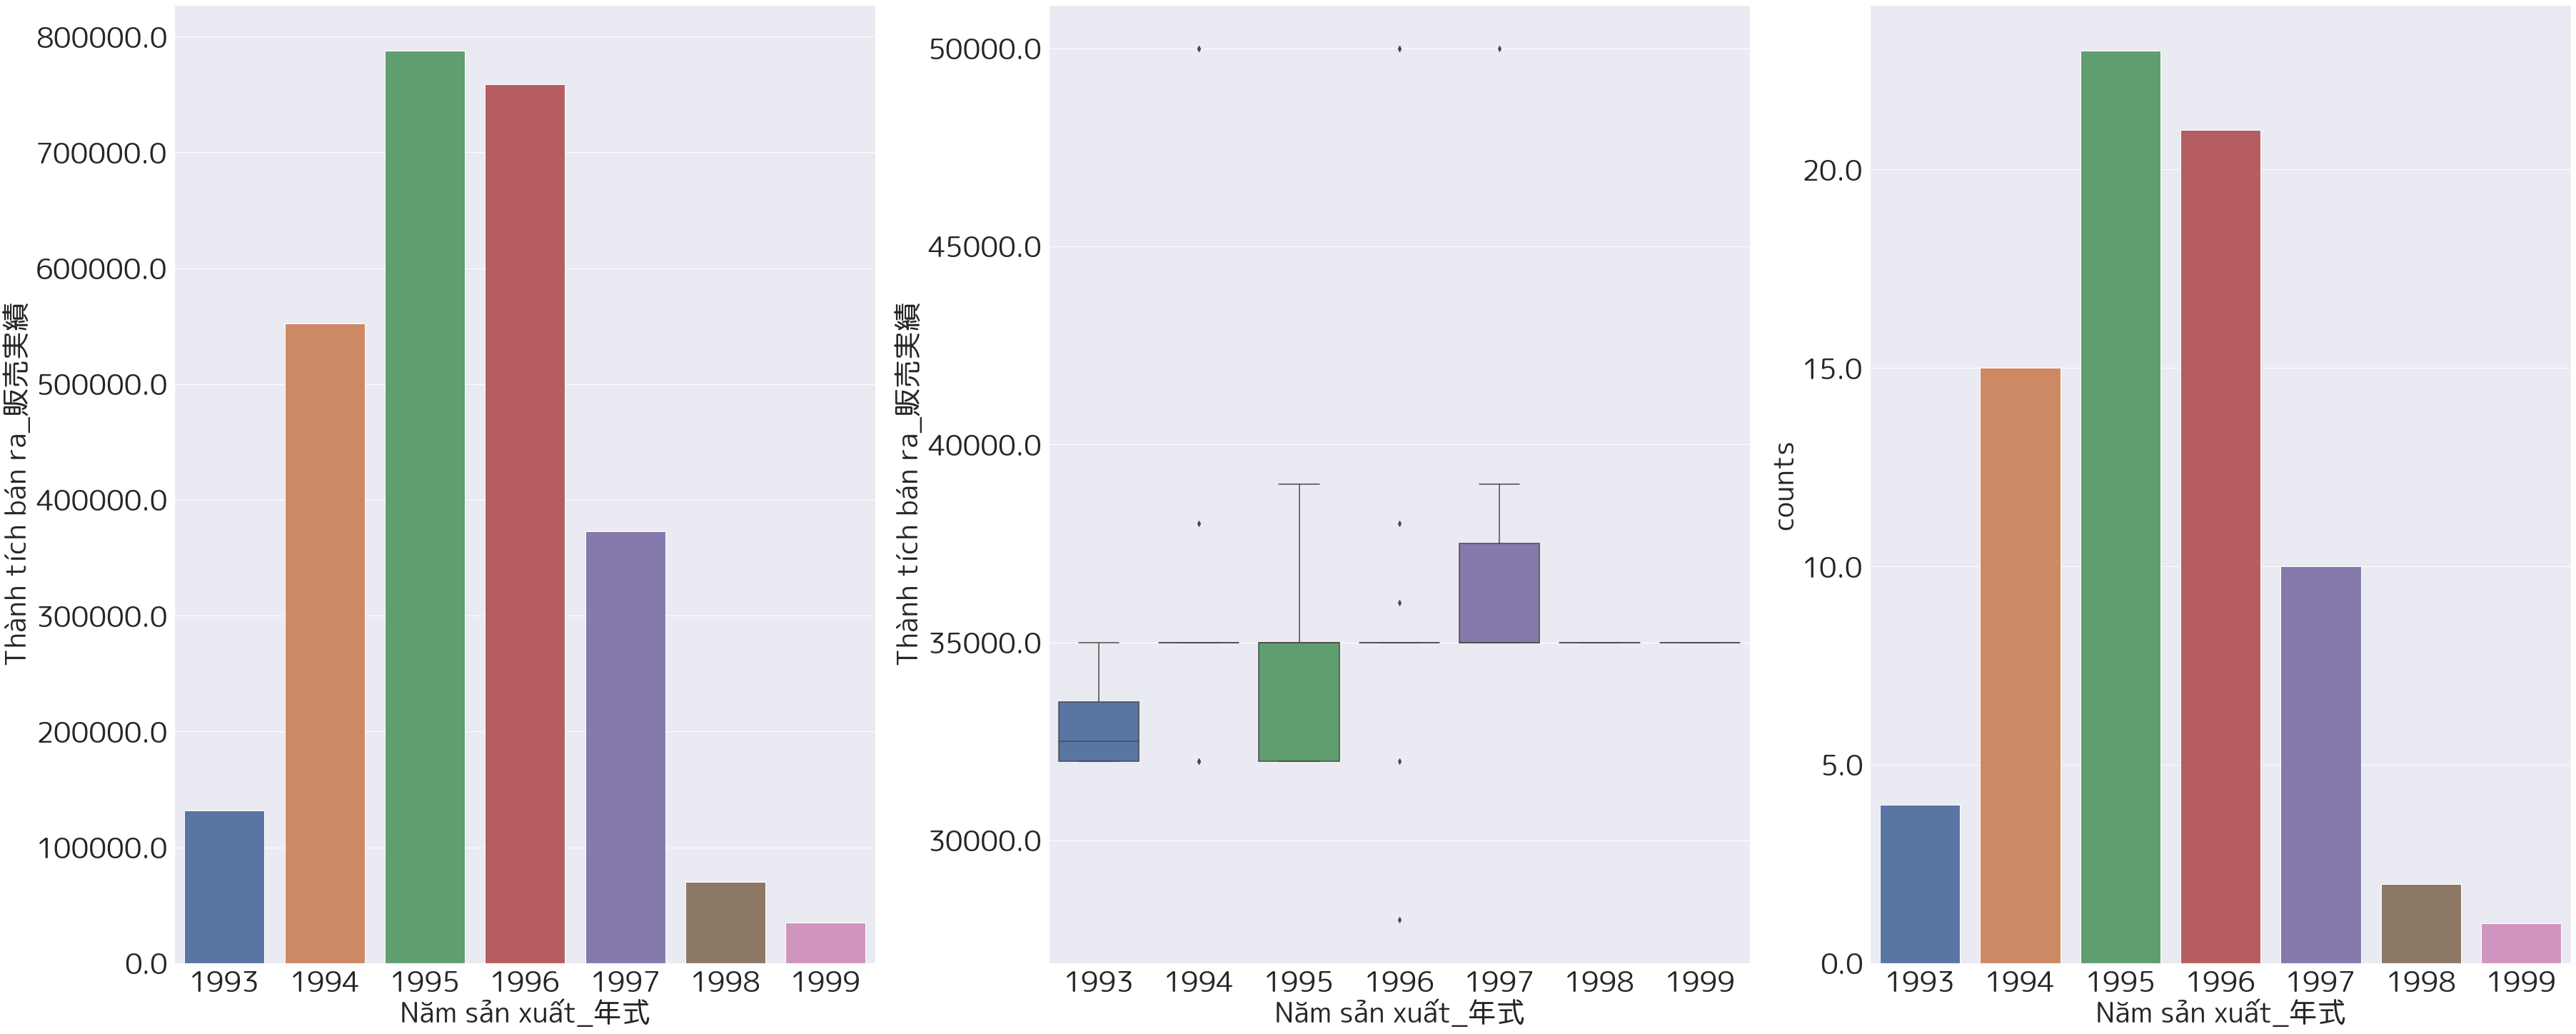

In [191]:
df_ｴｽﾃｨﾏ_CXR20_3C_T = df_ｴｽﾃｨﾏ_CXR20[df_ｴｽﾃｨﾏ_CXR20['Engine model_エンジン型式'] == '3C-TE']
count_namsx = df_ｴｽﾃｨﾏ_CXR20_3C_T.groupby(['Năm sản xuất_年式'])['Năm sản xuất_年式'].count().reset_index(name='counts')
sum_namsx = df_ｴｽﾃｨﾏ_CXR20_3C_T.groupby(['Năm sản xuất_年式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
# plt.figure(figsize=(80,60))
# plt.xticks(fontsize = 60)
# plt.xlabel(xlabel = 'Engine model_エンジン型式' ,fontsize = 60)
# plt.yticks(fontsize = 60)
# plt.ylabel(ylabel = 'count',fontsize = 60)
# sns.barplot(data=df_ｴｽﾃｨﾏ_GSR55_2GR_FE, x="Engine model_エンジン型式",y='Thành tích bán ra_販売実績',ci=None)
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
# fig.tight_layout()
p = sns.barplot(x='Năm sản xuất_年式',y='sum',data=sum_namsx,ax=axs[0],ci=None)
q = sns.boxplot(x='Năm sản xuất_年式',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ_CXR20_3C_T,ax=axs[1])
r = sns.barplot(x='Năm sản xuất_年式',y='counts',data=count_namsx,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Năm sản xuất_年式",fontsize = 40)
q.set_xlabel("Năm sản xuất_年式",fontsize = 40)
r.set_xlabel("Năm sản xuất_年式",fontsize = 40)

<ipython-input-167-5d8c4d0296f5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-167-5d8c4d0296f5>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-167-5d8c4d0296f5>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 1_駆動1')

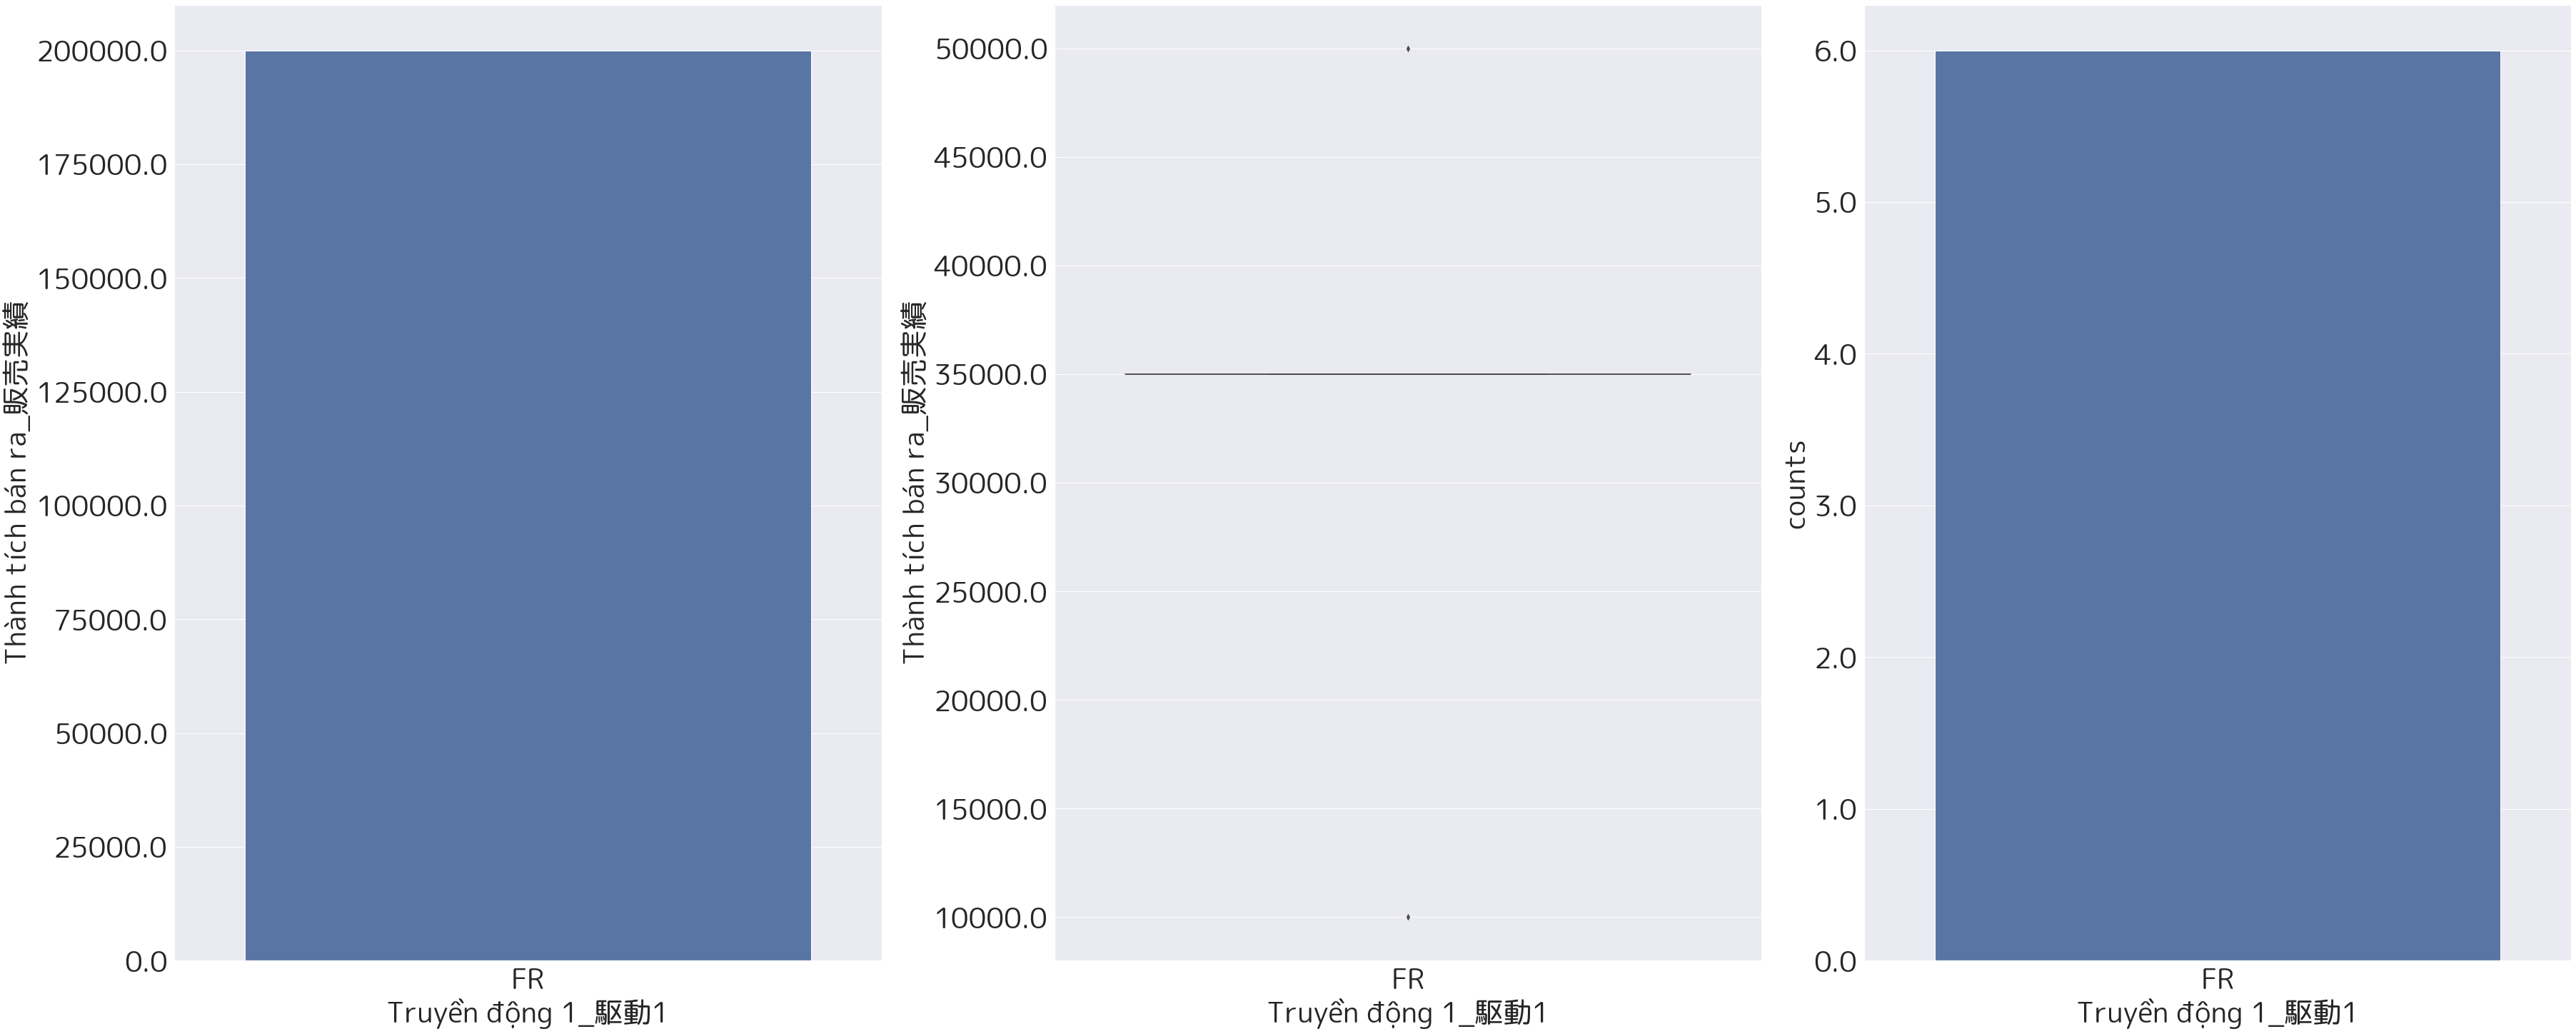

In [167]:
df_ｴｽﾃｨﾏ_CXR20_3C_T_1993 = df_ｴｽﾃｨﾏ_CXR20_3C_T[df_ｴｽﾃｨﾏ_CXR20_3C_T['Năm sản xuất_年式'] == 1993]
count_td1 = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993.groupby(['Truyền động 1_駆動1'])['Truyền động 1_駆動1'].count().reset_index(name='counts')
sum_td1 = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993.groupby(['Truyền động 1_駆動1'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 1_駆動1',y='sum',data=sum_td1,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 1_駆動1',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ_CXR20_3C_T_1993,ax=axs[1])
r = sns.barplot(x='Truyền động 1_駆動1',y='counts',data=count_td1,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
q.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
r.set_xlabel("Truyền động 1_駆動1",fontsize = 40)

      Tên xe_車名 Model xe_車輌型式 Engine model_エンジン型式 Truyền động 1_駆動1  \
6800      ｴｽﾃｨﾏ         CXR20                3C-T                FR   
11826     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
14925     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
15474     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
15517     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
15758     ｴｽﾃｨﾏ         CXR20                3C-T                FR   

      Truyền động 2_駆動2 TM_TM  Năm sản xuất_年式 D/G_Ｄ／Ｇ  Thành tích bán ra_販売実績  
6800                4WD    AT             1993       D                 50000.0  
11826               4WD    AT             1993       D                 35000.0  
14925               4WD    AT             1993       D                 10000.0  
15474               4WD    AT             1993       D                 35000.0  
15517               4WD    MT             1993       D                 35000.0  
15758           

<ipython-input-169-6a907042c087>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-169-6a907042c087>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-169-6a907042c087>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 2_駆動2')

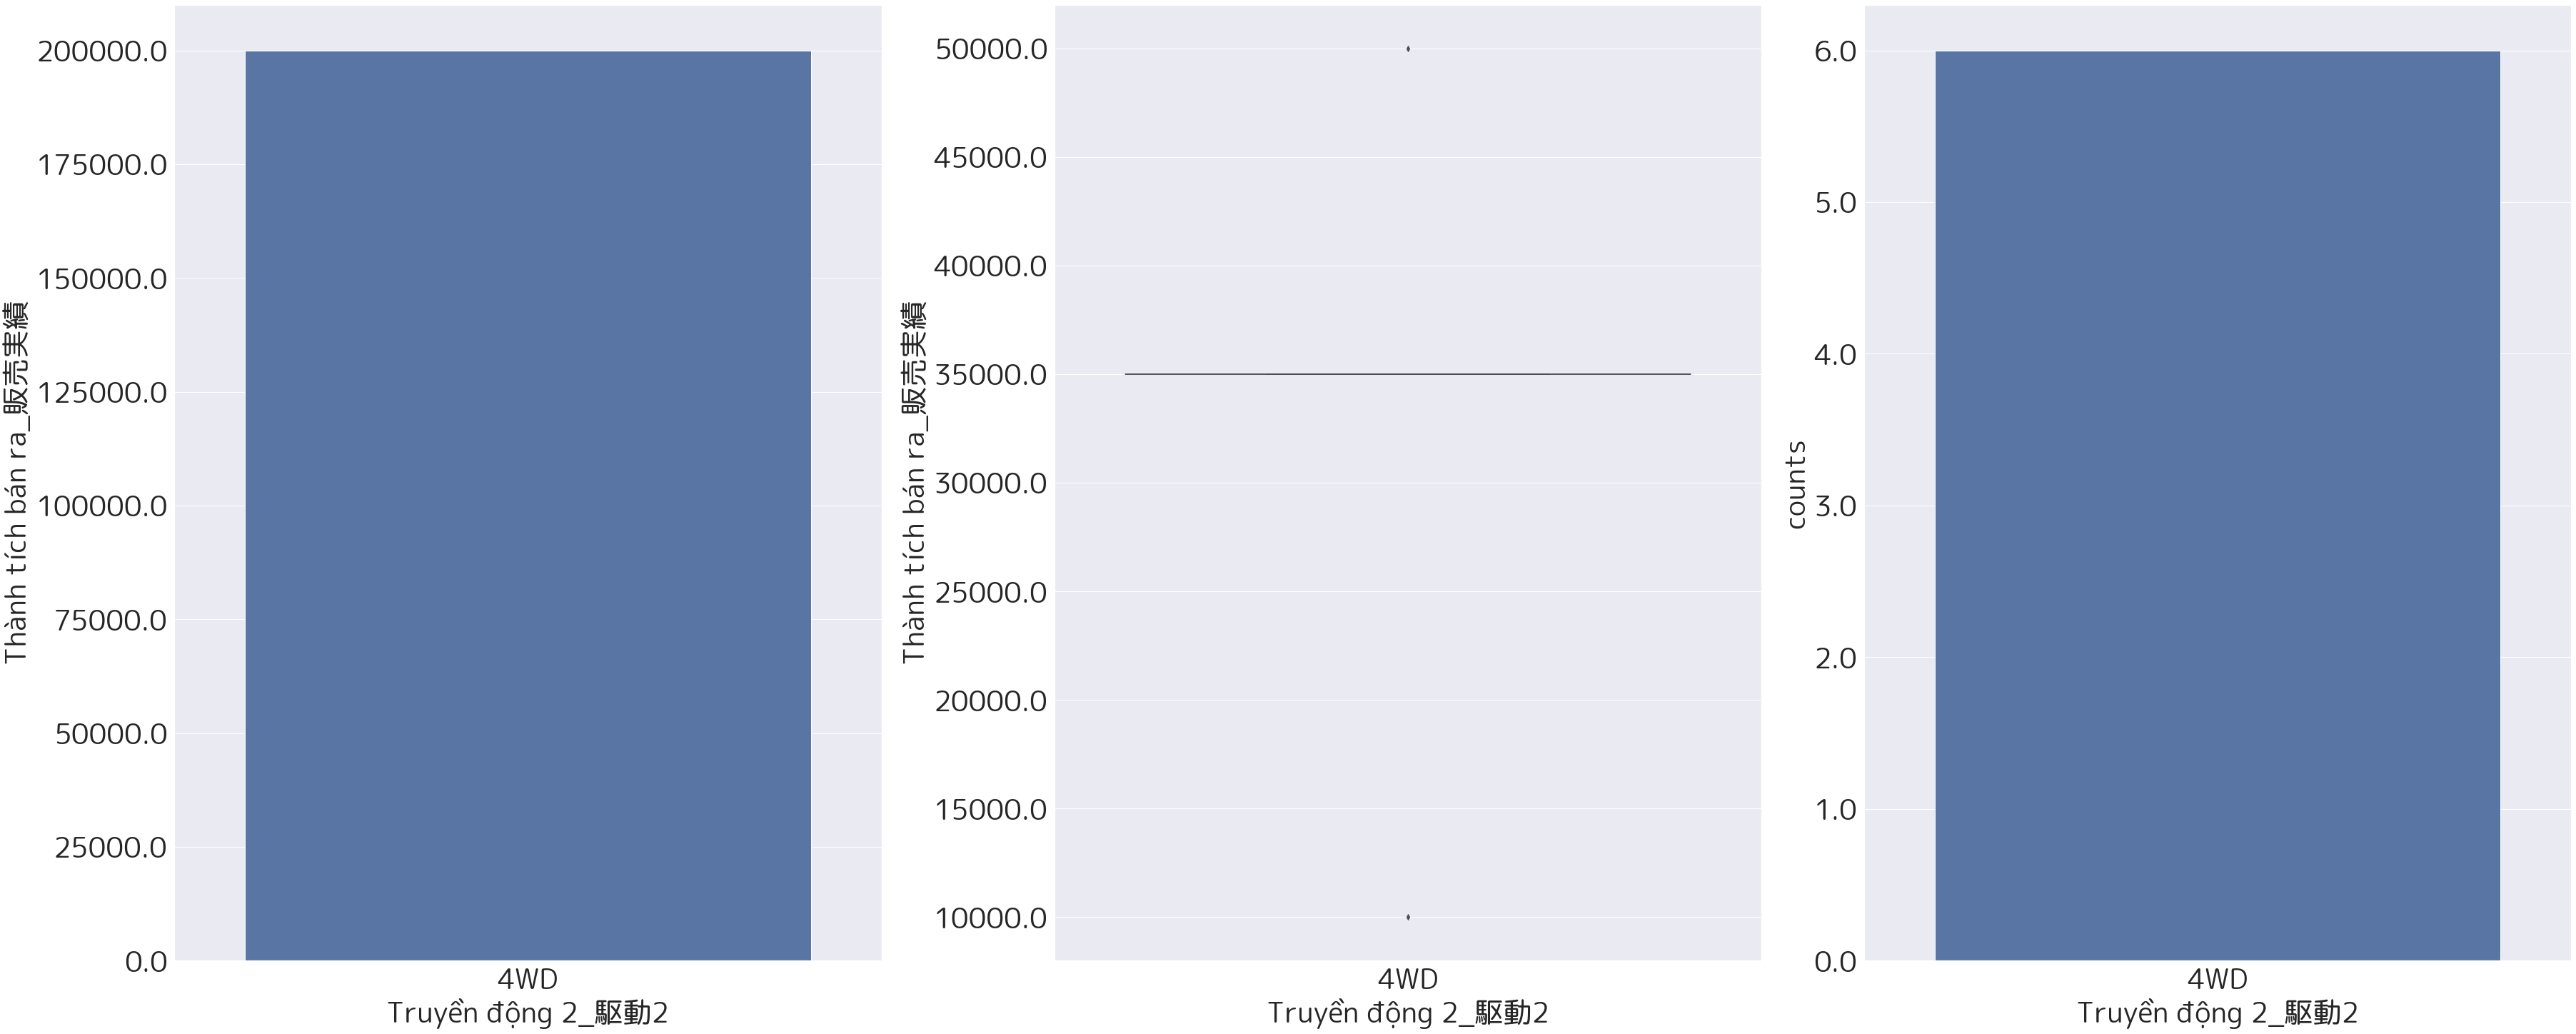

In [169]:
df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993[df_ｴｽﾃｨﾏ_CXR20_3C_T_1993['Truyền động 1_駆動1'] == 'FR']
print(df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR)
count_td2 = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR.groupby(['Truyền động 2_駆動2'])['Truyền động 2_駆動2'].count().reset_index(name='counts')
sum_td2 = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR.groupby(['Truyền động 2_駆動2'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 2_駆動2',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 2_駆動2',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR,ax=axs[1])
r = sns.barplot(x='Truyền động 2_駆動2',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
q.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
r.set_xlabel("Truyền động 2_駆動2",fontsize = 40)

      Tên xe_車名 Model xe_車輌型式 Engine model_エンジン型式 Truyền động 1_駆動1  \
6800      ｴｽﾃｨﾏ         CXR20                3C-T                FR   
11826     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
14925     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
15474     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
15517     ｴｽﾃｨﾏ         CXR20                3C-T                FR   
15758     ｴｽﾃｨﾏ         CXR20                3C-T                FR   

      Truyền động 2_駆動2 TM_TM  Năm sản xuất_年式 D/G_Ｄ／Ｇ  Thành tích bán ra_販売実績  
6800                4WD    AT             1993       D                 50000.0  
11826               4WD    AT             1993       D                 35000.0  
14925               4WD    AT             1993       D                 10000.0  
15474               4WD    AT             1993       D                 35000.0  
15517               4WD    MT             1993       D                 35000.0  
15758           

<ipython-input-172-d05604c2d231>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-172-d05604c2d231>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-172-d05604c2d231>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'TM_TM')

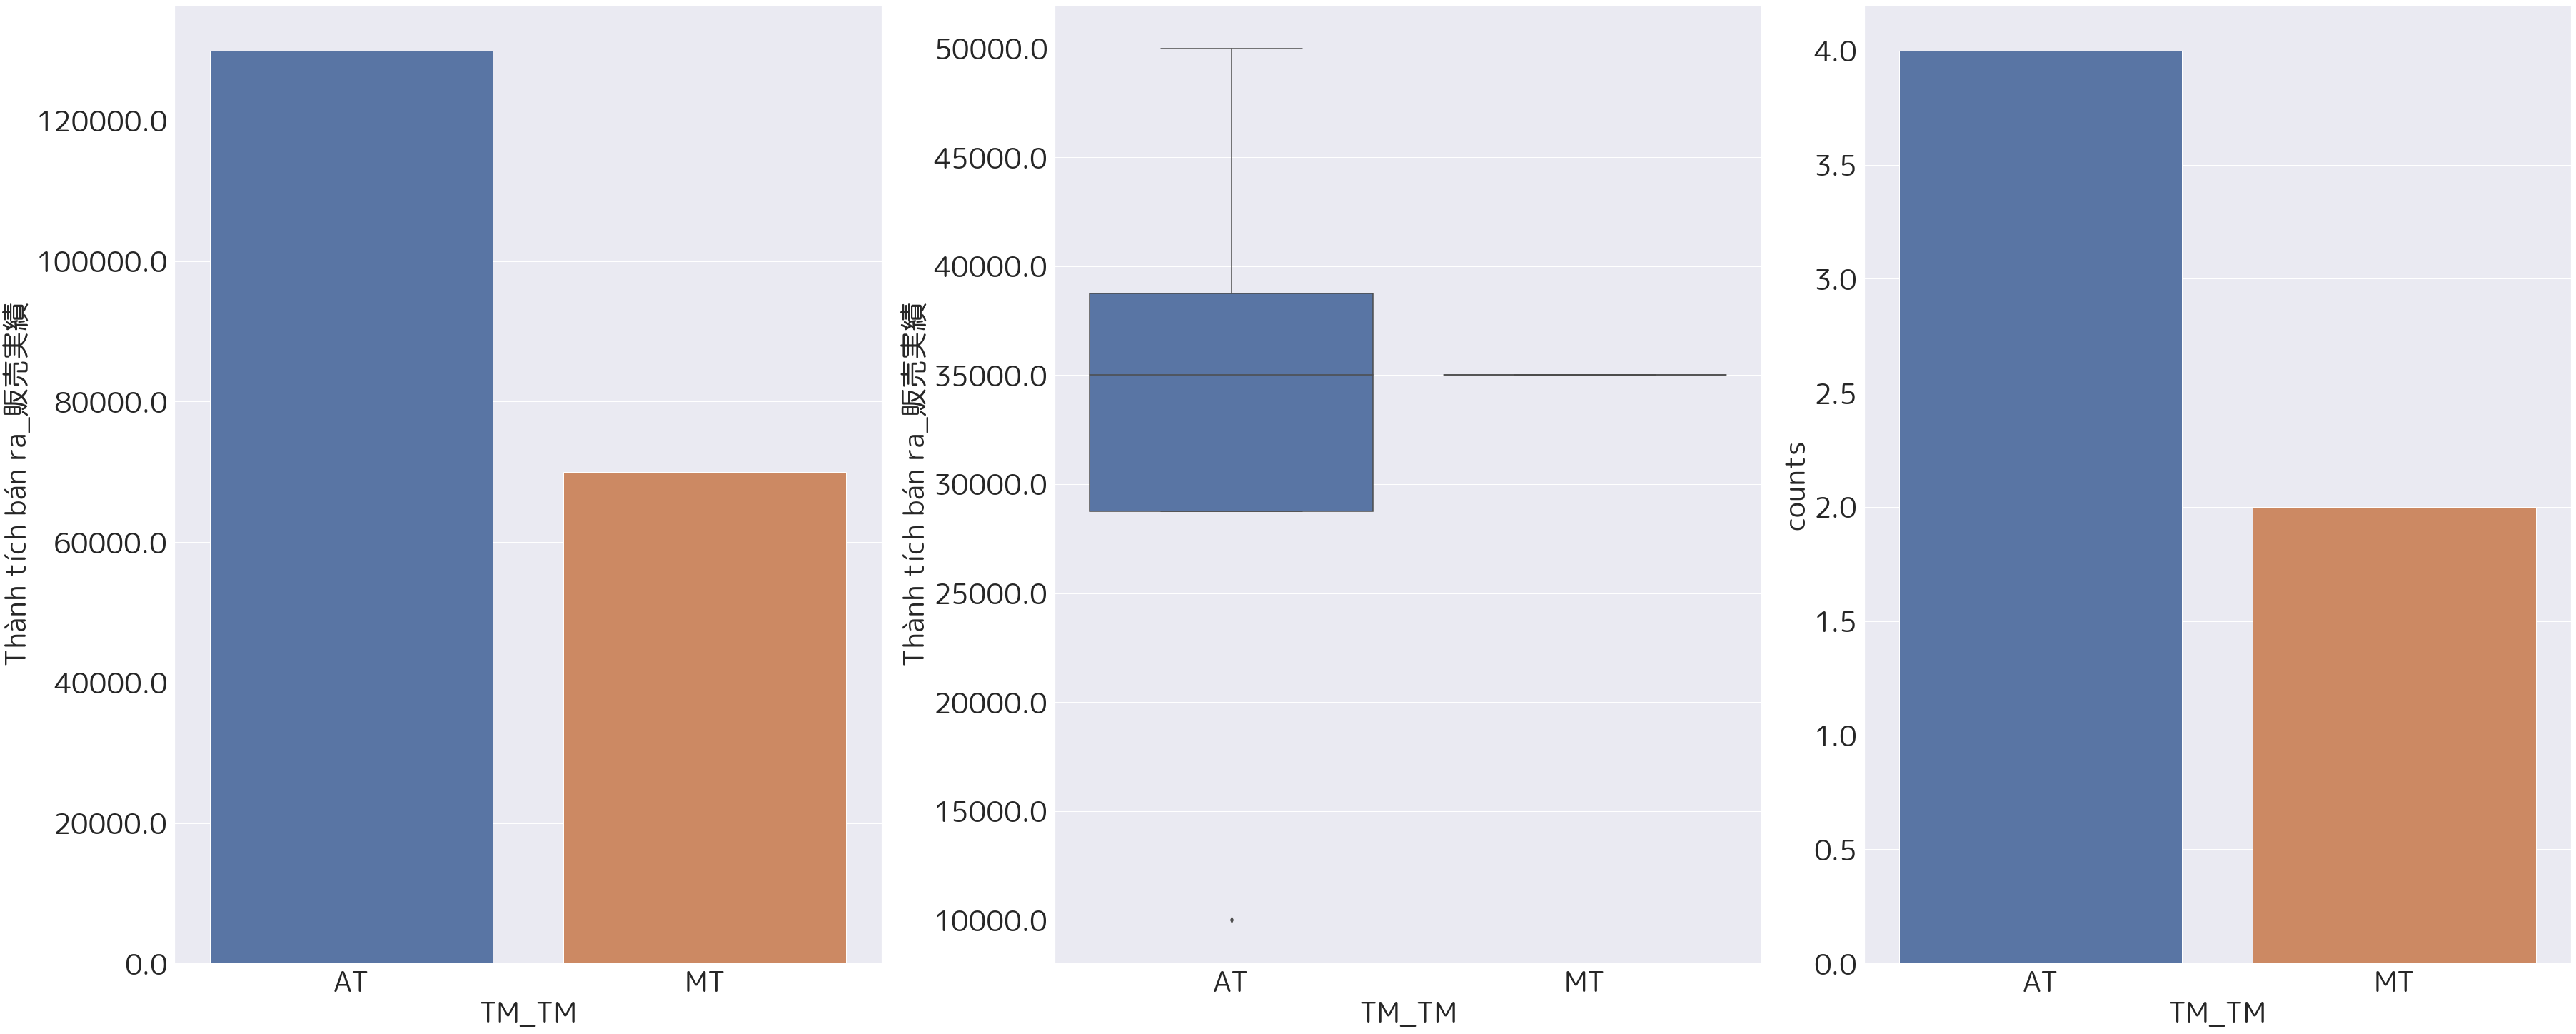

In [172]:
df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993[df_ｴｽﾃｨﾏ_CXR20_3C_T_1993['Truyền động 2_駆動2'] == '4WD']
count_tm = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD.groupby(['TM_TM'])['TM_TM'].count().reset_index(name='counts')
sum_tm = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD.groupby(['TM_TM'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
print(df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD)
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='TM_TM',y='sum',data=sum_tm,ax=axs[0],ci=None)
q = sns.boxplot(x='TM_TM',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD,ax=axs[1])
r = sns.barplot(x='TM_TM',y='counts',data=count_tm,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("TM_TM",fontsize = 40)
q.set_xlabel("TM_TM",fontsize = 40)
r.set_xlabel("TM_TM",fontsize = 40)

<ipython-input-173-7dd88edd2b11>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-173-7dd88edd2b11>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-173-7dd88edd2b11>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'D/G_Ｄ／Ｇ')

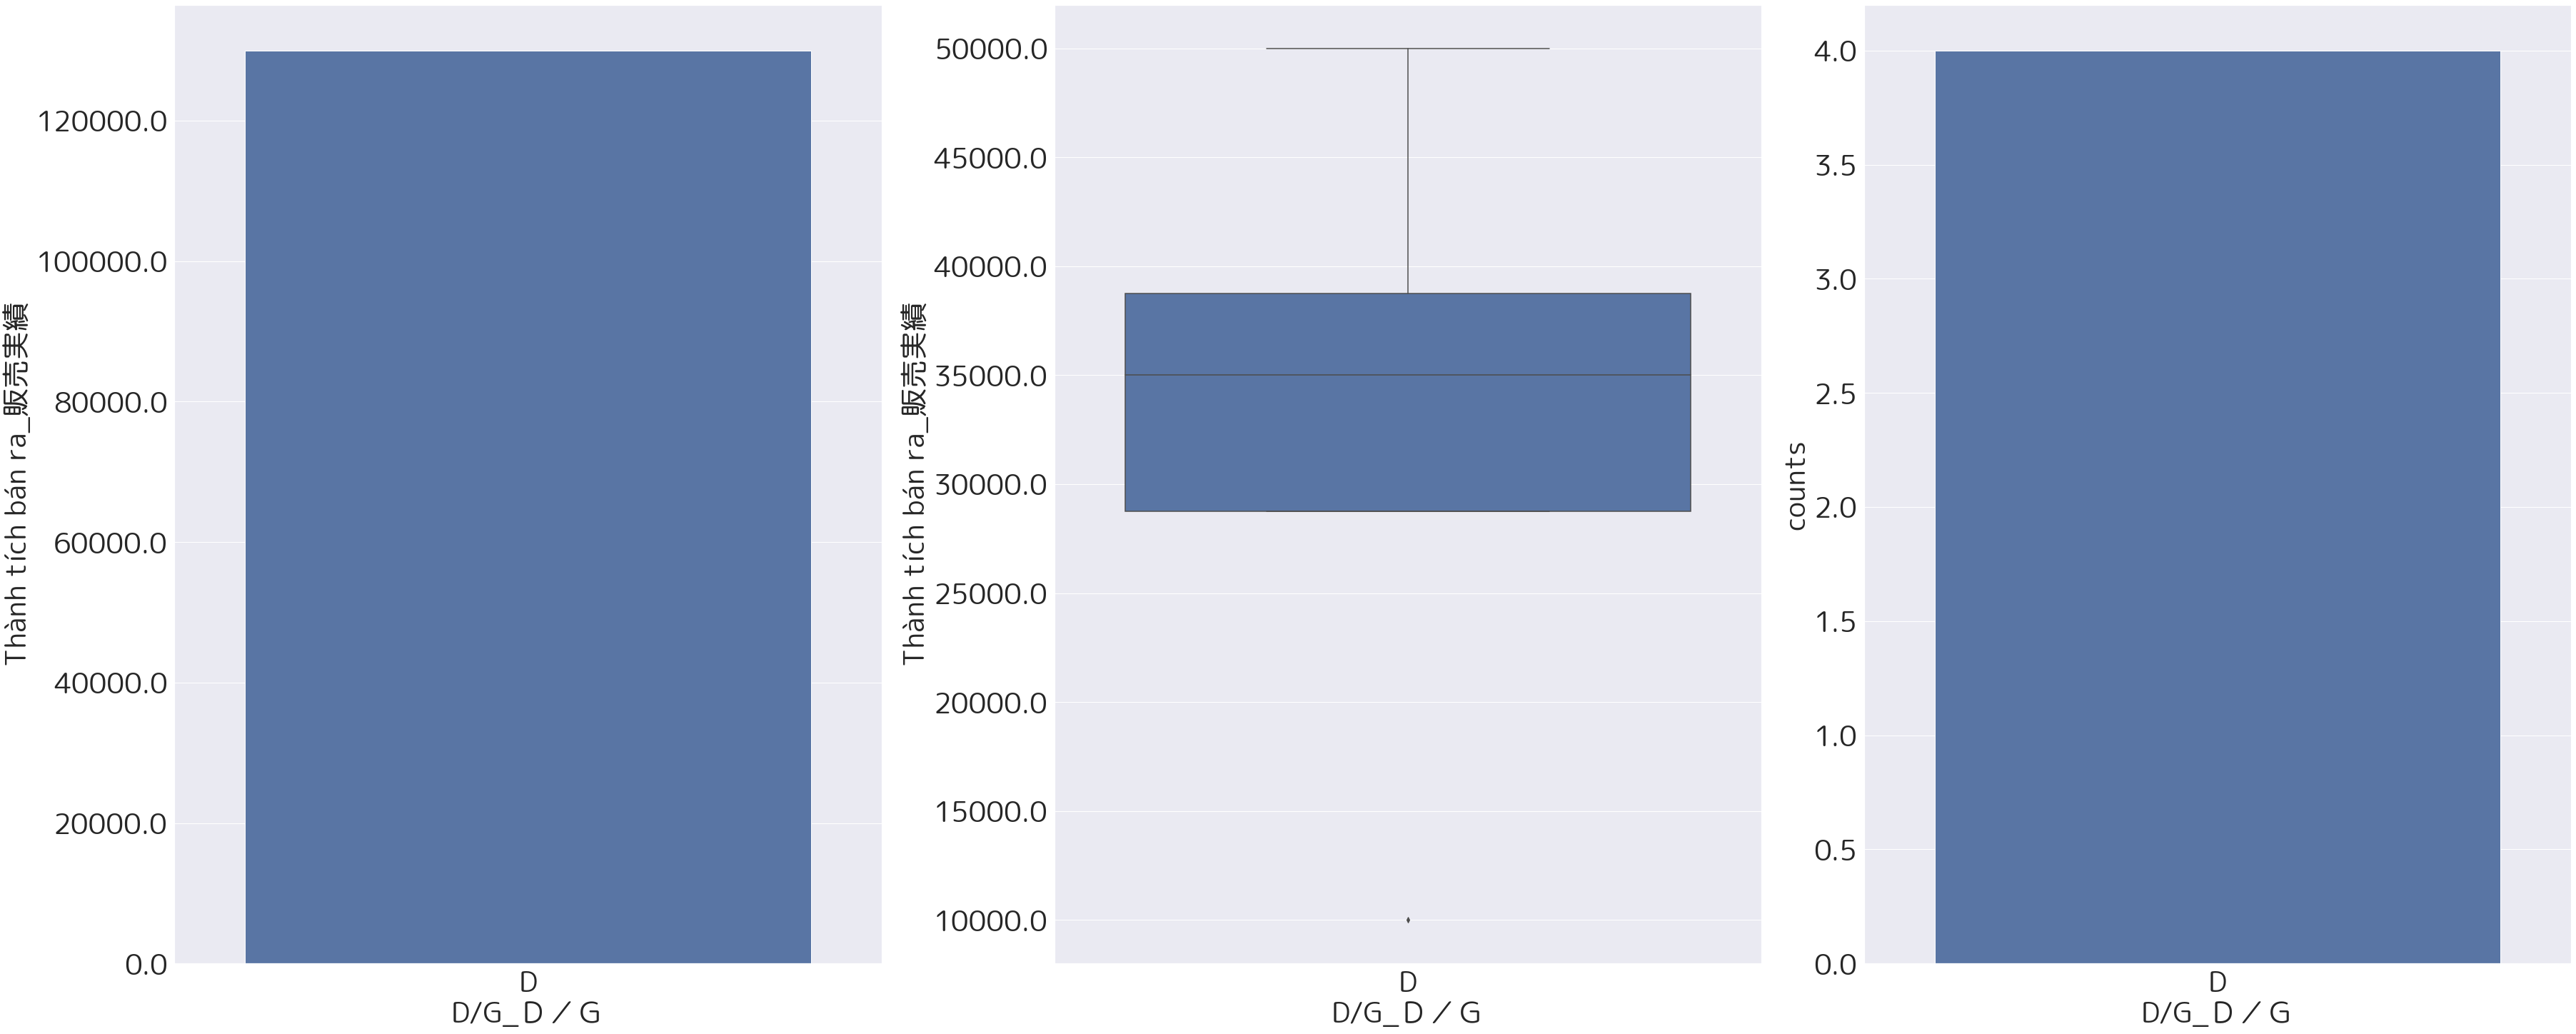

In [173]:
df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD_AT = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD[df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD['TM_TM'] == 'AT']
count_dg = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['D/G_Ｄ／Ｇ'].count().reset_index(name='counts')
sum_dg = df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
# fig.tight_layout()
p = sns.barplot(x='D/G_Ｄ／Ｇ',y='sum',data=sum_dg,ax=axs[0],ci=None)
q = sns.boxplot(x='D/G_Ｄ／Ｇ',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ_CXR20_3C_T_1993_FR_4WD_AT,ax=axs[1])
r = sns.barplot(x='D/G_Ｄ／Ｇ',y='counts',data=count_dg,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
q.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
r.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)

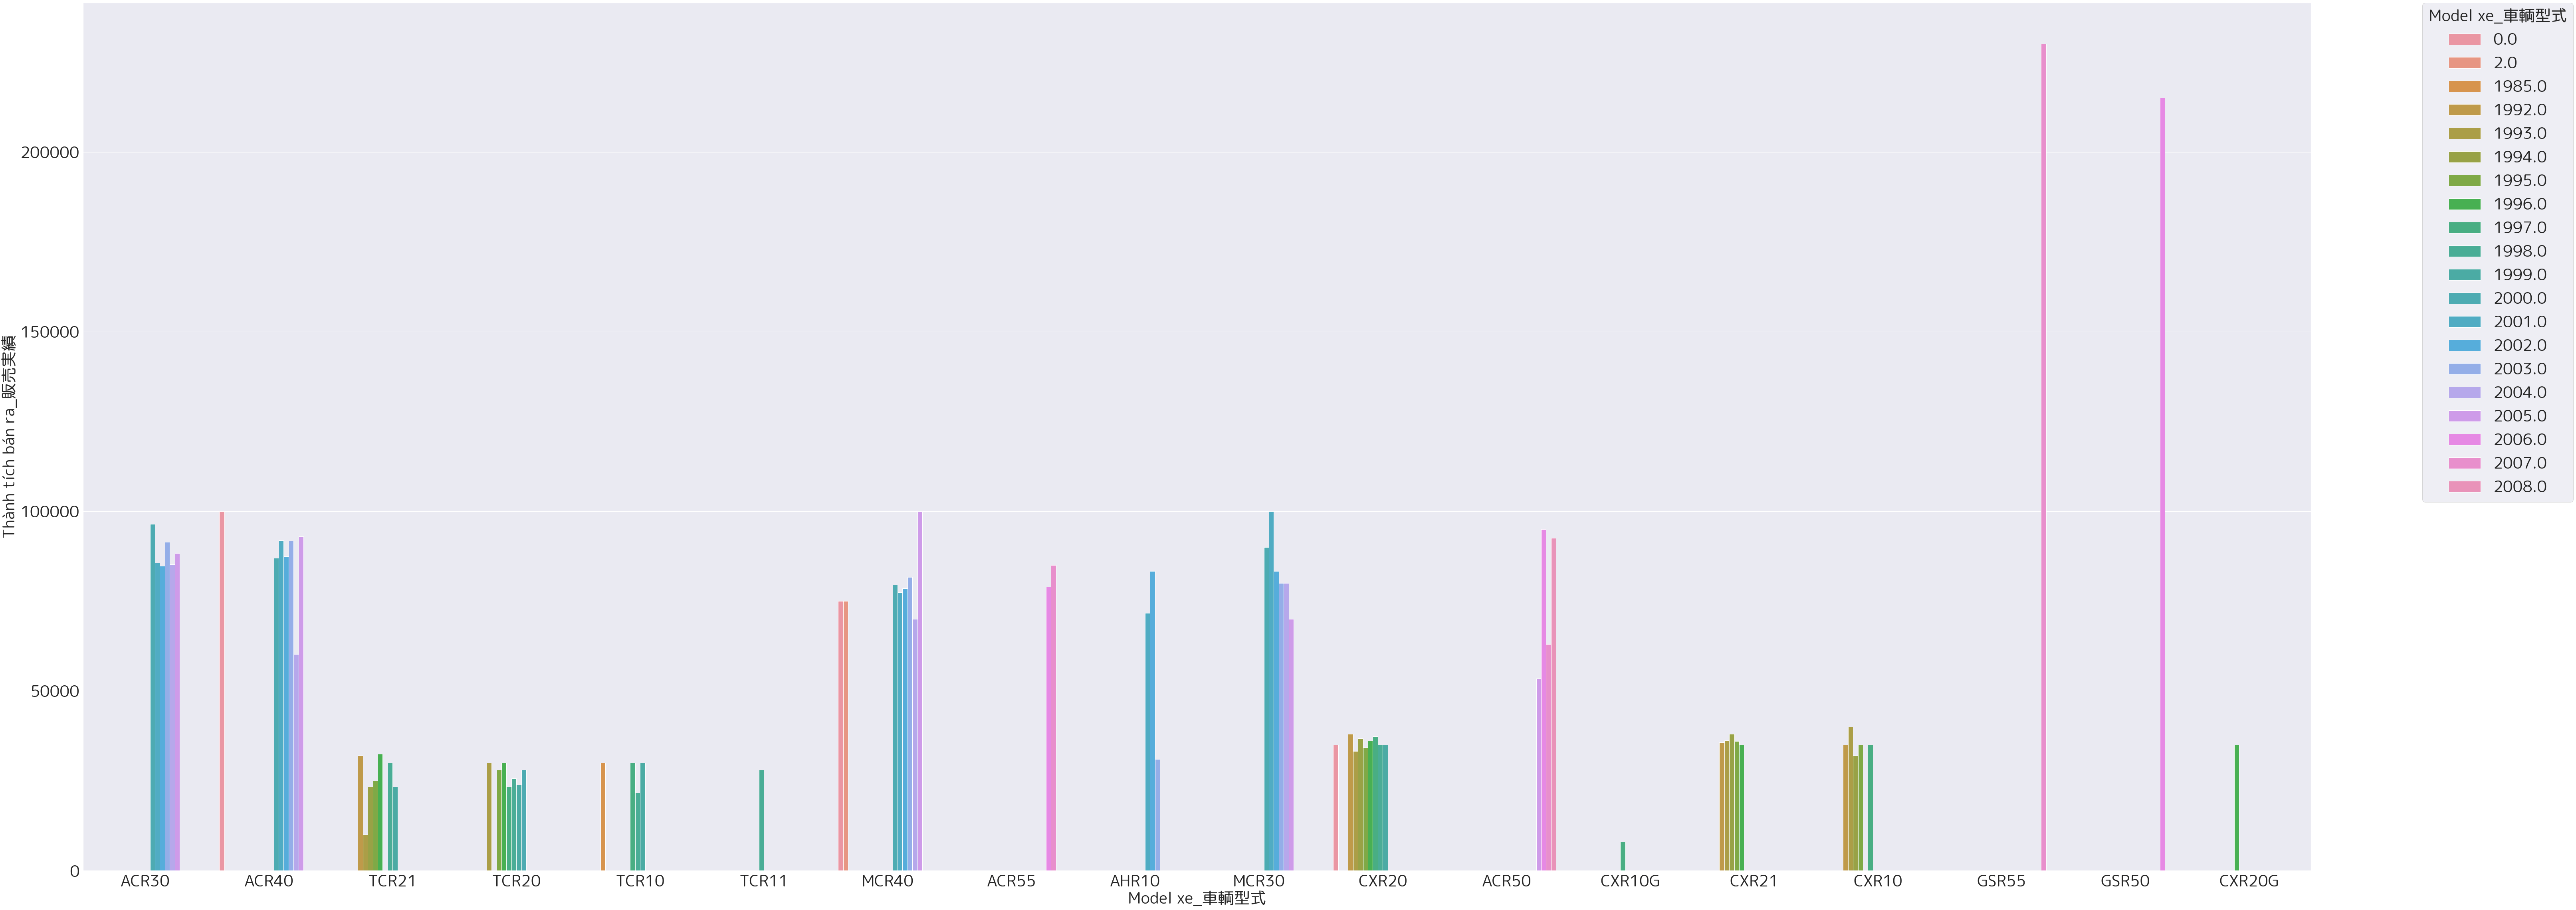

In [31]:
plt.figure(figsize=(100,40))
plt.xticks(fontsize = 40)
plt.xlabel(xlabel = 'Năm sản xuất_年式' ,fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel(ylabel = 'count',fontsize = 40)
sns.barplot(data=df_ｴｽﾃｨﾏ, x = 'Model xe_車輌型式',hue="Năm sản xuất_年式",y='Thành tích bán ra_販売実績',ci=None)
plt.legend(title='Model xe_車輌型式', fontsize='40', title_fontsize='40',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [42]:
test = df_ｴｽﾃｨﾏ.groupby('Model xe_車輌型式').agg(lambda x: list(set(x)))
test

Tên xe_車名 Engine model_エンジン型式 Truyền động 1_駆動1  \
Model xe_車輌型式                                                   
ACR30           [ｴｽﾃｨﾏ]            [2AZ-FE]              [FF]   
ACR40           [ｴｽﾃｨﾏ]            [2AZ-FE]              [FF]   
ACR50           [ｴｽﾃｨﾏ]            [2AZ-FE]              [FF]   
ACR55           [ｴｽﾃｨﾏ]            [2AZ-FE]              [FF]   
AHR10           [ｴｽﾃｨﾏ]           [2AZ-FXE]              [FF]   
CXR10           [ｴｽﾃｨﾏ]       [3C-T, 3C-TE]              [FR]   
CXR10G          [ｴｽﾃｨﾏ]             [3C-TE]              [FR]   
CXR20           [ｴｽﾃｨﾏ]       [3C-T, 3C-TE]              [FR]   
CXR20G          [ｴｽﾃｨﾏ]             [3C-TE]              [FR]   
CXR21           [ｴｽﾃｨﾏ]       [3C-T, 3C-TE]              [FR]   
GSR50           [ｴｽﾃｨﾏ]            [2GR-FE]              [FF]   
GSR55           [ｴｽﾃｨﾏ]            [2GR-FE]              [FF]   
MCR30           [ｴｽﾃｨﾏ]            [1MZ-FE]              [FF]   
MCR40           [ｴｽﾃｨﾏ]            [1MZ-FE]              [FF]   
TCR10           [ｴｽﾃｨﾏ]   [2TZ-FE, 2TZ-FZE]              [FR]   
TCR11           [ｴｽﾃｨﾏ]           [2TZ-FZE]              [FR]   
TCR20           [ｴｽﾃｨﾏ]   [2TZ-FE, 2TZ-FZE]              [FR]   
TCR21           [ｴｽﾃｨﾏ]   [2TZ-FE, 2TZ-FZE]              [FR]   

              Truyền động 2_駆動2     TM_TM  \
Model xe_車輌型式                               
ACR30                     [2WD]      [AT]   
ACR40                [4WD, 2WD]      [AT]   
ACR50                     [2WD]      [AT]   
ACR55                     [4WD]      [AT]   
AHR10                [4WD, 2WD]      [AT]   
CXR10                     [2WD]  [AT, MT]   
CXR10G                    [2WD]      [AT]   
CXR20                [4WD, 2WD]  [AT, MT]   
CXR20G                    [4WD]      [AT]   
CXR21                     [4WD]      [AT]   
GSR50                     [2WD]      [AT]   
GSR55                     [4WD]      [AT]   
MCR30                     [2WD]      [AT]   
MCR40                     [4WD]      [AT]   
TCR10                     [2WD]      [AT]   
TCR11                     [2WD]      [AT]   
TCR20                     [4WD]      [AT]   
TCR21                     [4WD]  [AT, MT]   

                                                 Năm sản xuất_年式 D/G_Ｄ／Ｇ  \
Model xe_車輌型式                                                              
ACR30           [2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0]     [G]   
ACR40          [0.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, ...     [G]   
ACR50                           [2008.0, 2005.0, 2006.0, 2007.0]     [G]   
ACR55                                           [2006.0, 2007.0]     [G]   
AHR10                                   [2001.0, 2002.0, 2003.0]     [G]   
CXR10                   [1992.0, 1993.0, 1994.0, 1995.0, 1997.0]     [D]   
CXR10G                                                  [1997.0]     [D]   
CXR20          [0.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, ...     [D]   
CXR20G                                                  [1996.0]     [D]   
CXR21                   [1992.0, 1993.0, 1994.0, 1995.0, 1996.0]     [D]   
GSR50                                              [nan, 2006.0]     [G]   
GSR55                                                   [2007.0]     [G]   
MCR30           [2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0]     [G]   
MCR40          [0.0, 2.0, 2000.0, 2001.0, 2002.0, 2003.0, 200...     [G]   
TCR10                           [1985.0, 1997.0, 1998.0, 1999.0]     [G]   
TCR11                                                   [1998.0]     [G]   
TCR20          [nan, 1993.0, 1995.0, 1996.0, 1997.0, 1998.0, ...     [G]   
TCR21          [1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1998....     [G]   

                                          Thành tích bán ra_販売実績  
Model xe_車輌型式                                                     
ACR30          [12000.0, 100000.0, 120000.0, 80000.0, 88000.0...  
ACR40          [100000.0, 80000.0, 12000.0, 75000.0, 120000.0...  
ACR50          [12000.0

In [40]:
 df_ｴｽﾃｨﾏ.groupby('Model xe_車輌型式').sum().sort_values(by='Thành tích bán ra_販売実績', ascending=False)

Năm sản xuất_年式  Thành tích bán ra_販売実績
Model xe_車輌型式                                         
ACR40                 216184.0               9561000.0
ACR30                 186162.0               8255000.0
MCR40                 124082.0               5039759.0
CXR20                 175561.0               3169000.0
ACR50                  30098.0               1145000.0
TCR20                  81903.0               1065000.0
MCR30                  24025.0               1010000.0
AHR10                  28024.0                992000.0
GSR50                   4012.0                700000.0
CXR21                  35876.0                647000.0
ACR55                  14044.0                565000.0
TCR21                  27945.0                362000.0
TCR10                  17968.0                245000.0
GSR55                   2007.0                230000.0
CXR10                  11964.0                217000.0
CXR20G                  1996.0                 35000.0
TCR11                   1998.0                 28000.0
CXR10G                  1997.0                  8000.0

# Phân tích tên xe là  ｴｽﾃｨﾏ

In [177]:
# ten xe la レガシィ
df_レガシィ = df_spec[(df_spec['Tên xe_車名'] == 'レガシィ')]

<ipython-input-190-cda5591797ff>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 50)
<ipython-input-190-cda5591797ff>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 50)
<ipython-input-190-cda5591797ff>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticklabels(),size =50)


Text(0.5, 0, 'Model xe_車輌型式')

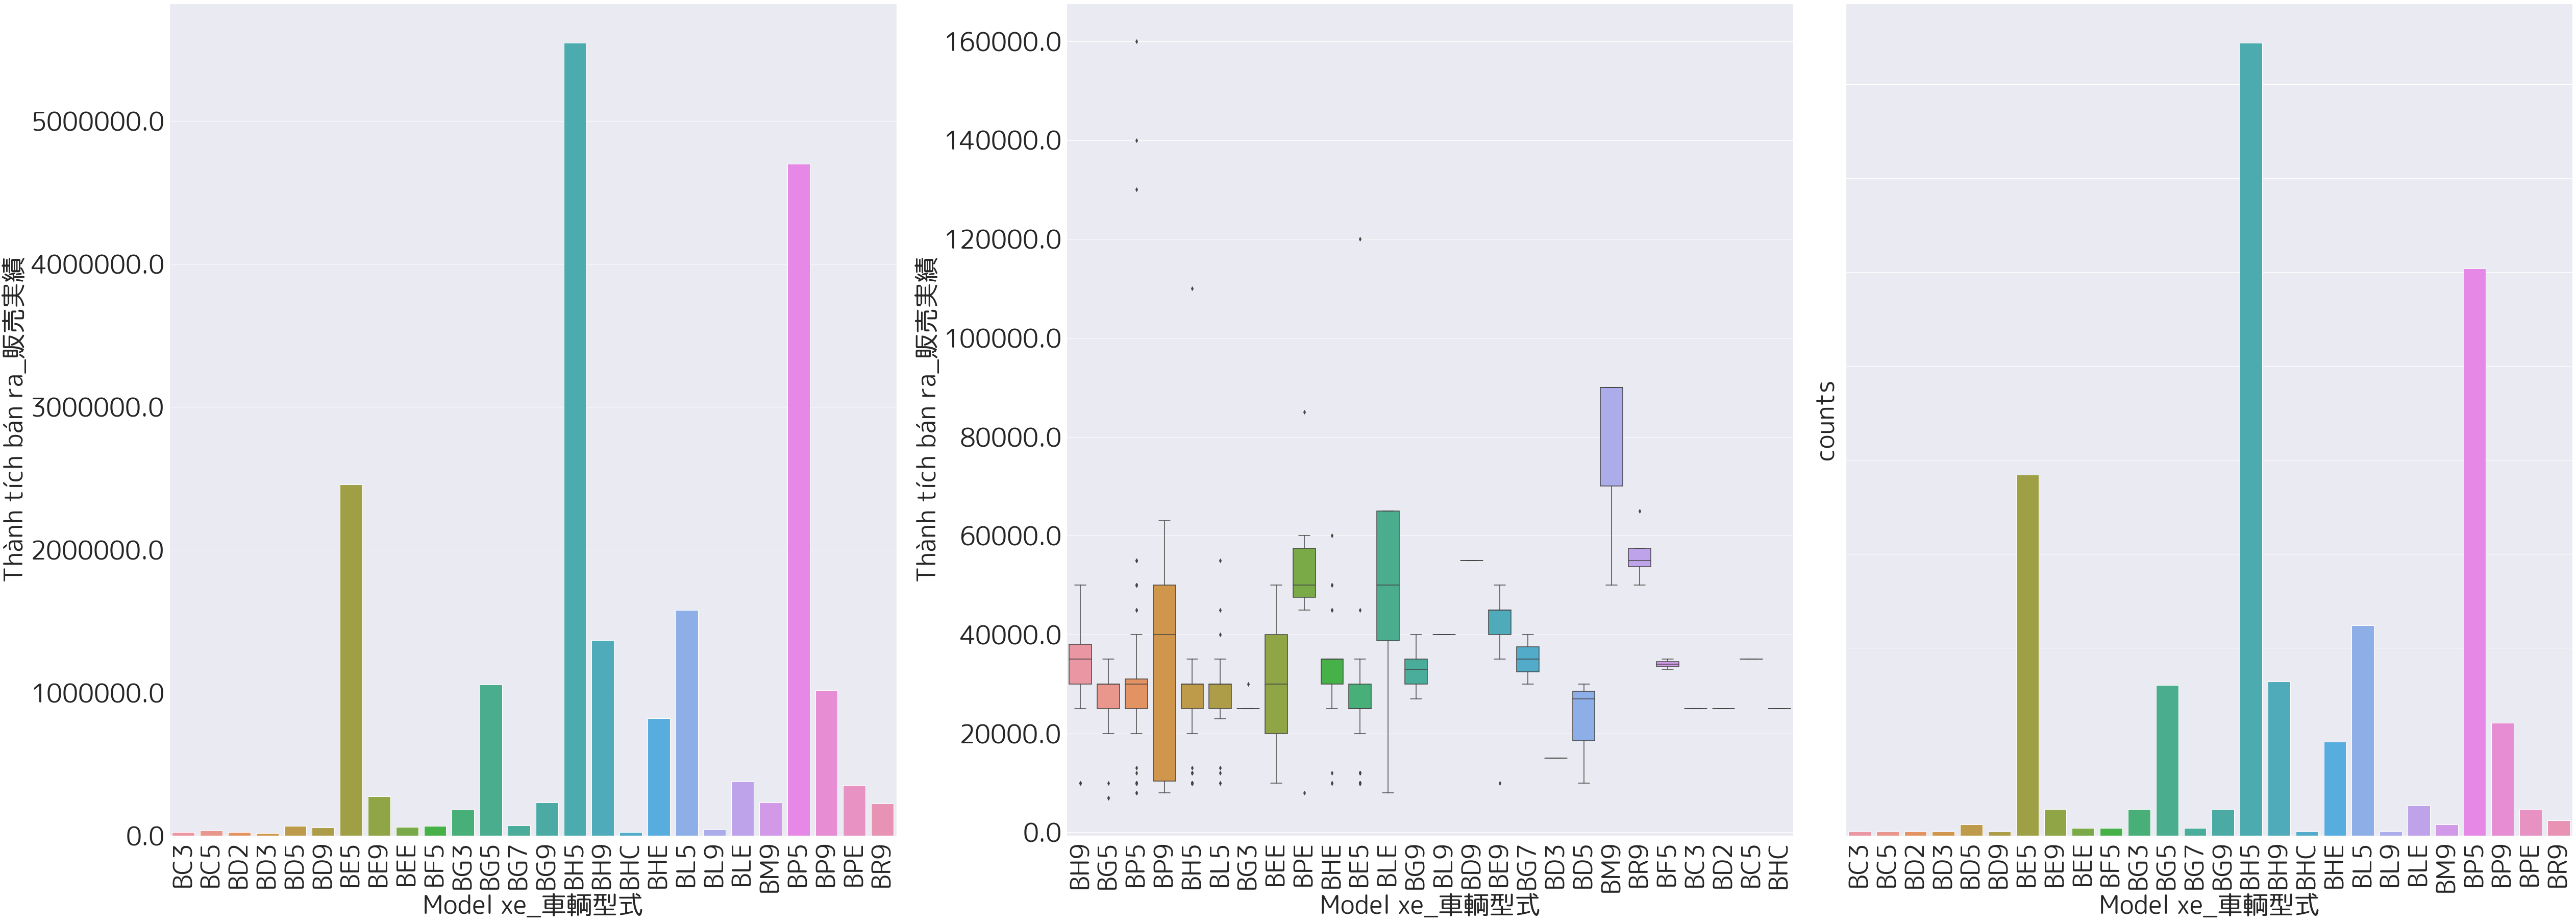

In [190]:
count_model = df_レガシィ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
count_model = df_レガシィ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
sum_model =  df_レガシィ.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
# sum_model = sum_model.sort_values(by='sum', ascending=True)
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(70, 25),constrained_layout=True)
p = sns.barplot(x='Model xe_車輌型式',y='sum',data=sum_model,ax=axs[0],ci=None)
q = sns.boxplot(x='Model xe_車輌型式',y='Thành tích bán ra_販売実績',data=df_レガシィ,ax=axs[1])
r = sns.barplot(x='Model xe_車輌型式',y='counts',data=count_model,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =50,rotation=90)
q.set_xticklabels(q.get_xticklabels(),size =50,rotation=90)
r.set_xticklabels(r.get_xticklabels(),size =50,rotation=90)
p.set_yticklabels(p.get_yticks(), size = 50)
q.set_yticklabels(q.get_yticks(), size = 50)
r.set_yticklabels(r.get_yticklabels(),size =50)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
r.set_ylabel("counts",fontsize = 50)
p.set_xlabel("Model xe_車輌型式",fontsize = 50)
q.set_xlabel("Model xe_車輌型式",fontsize = 50)
r.set_xlabel("Model xe_車輌型式",fontsize = 50)

In [186]:
sum_model['Model xe_車輌型式'].unique()

array(['BC3', 'BC5', 'BD2', 'BD3', 'BD5', 'BD9', 'BE5', 'BE9', 'BEE',
       'BF5', 'BG3', 'BG5', 'BG7', 'BG9', 'BH5', 'BH9', 'BHC', 'BHE',
       'BL5', 'BL9', 'BLE', 'BM9', 'BP5', 'BP9', 'BPE', 'BR9'],
      dtype=object)

<ipython-input-195-b50f27852c7e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-195-b50f27852c7e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-195-b50f27852c7e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Engine model_エンジン型式')

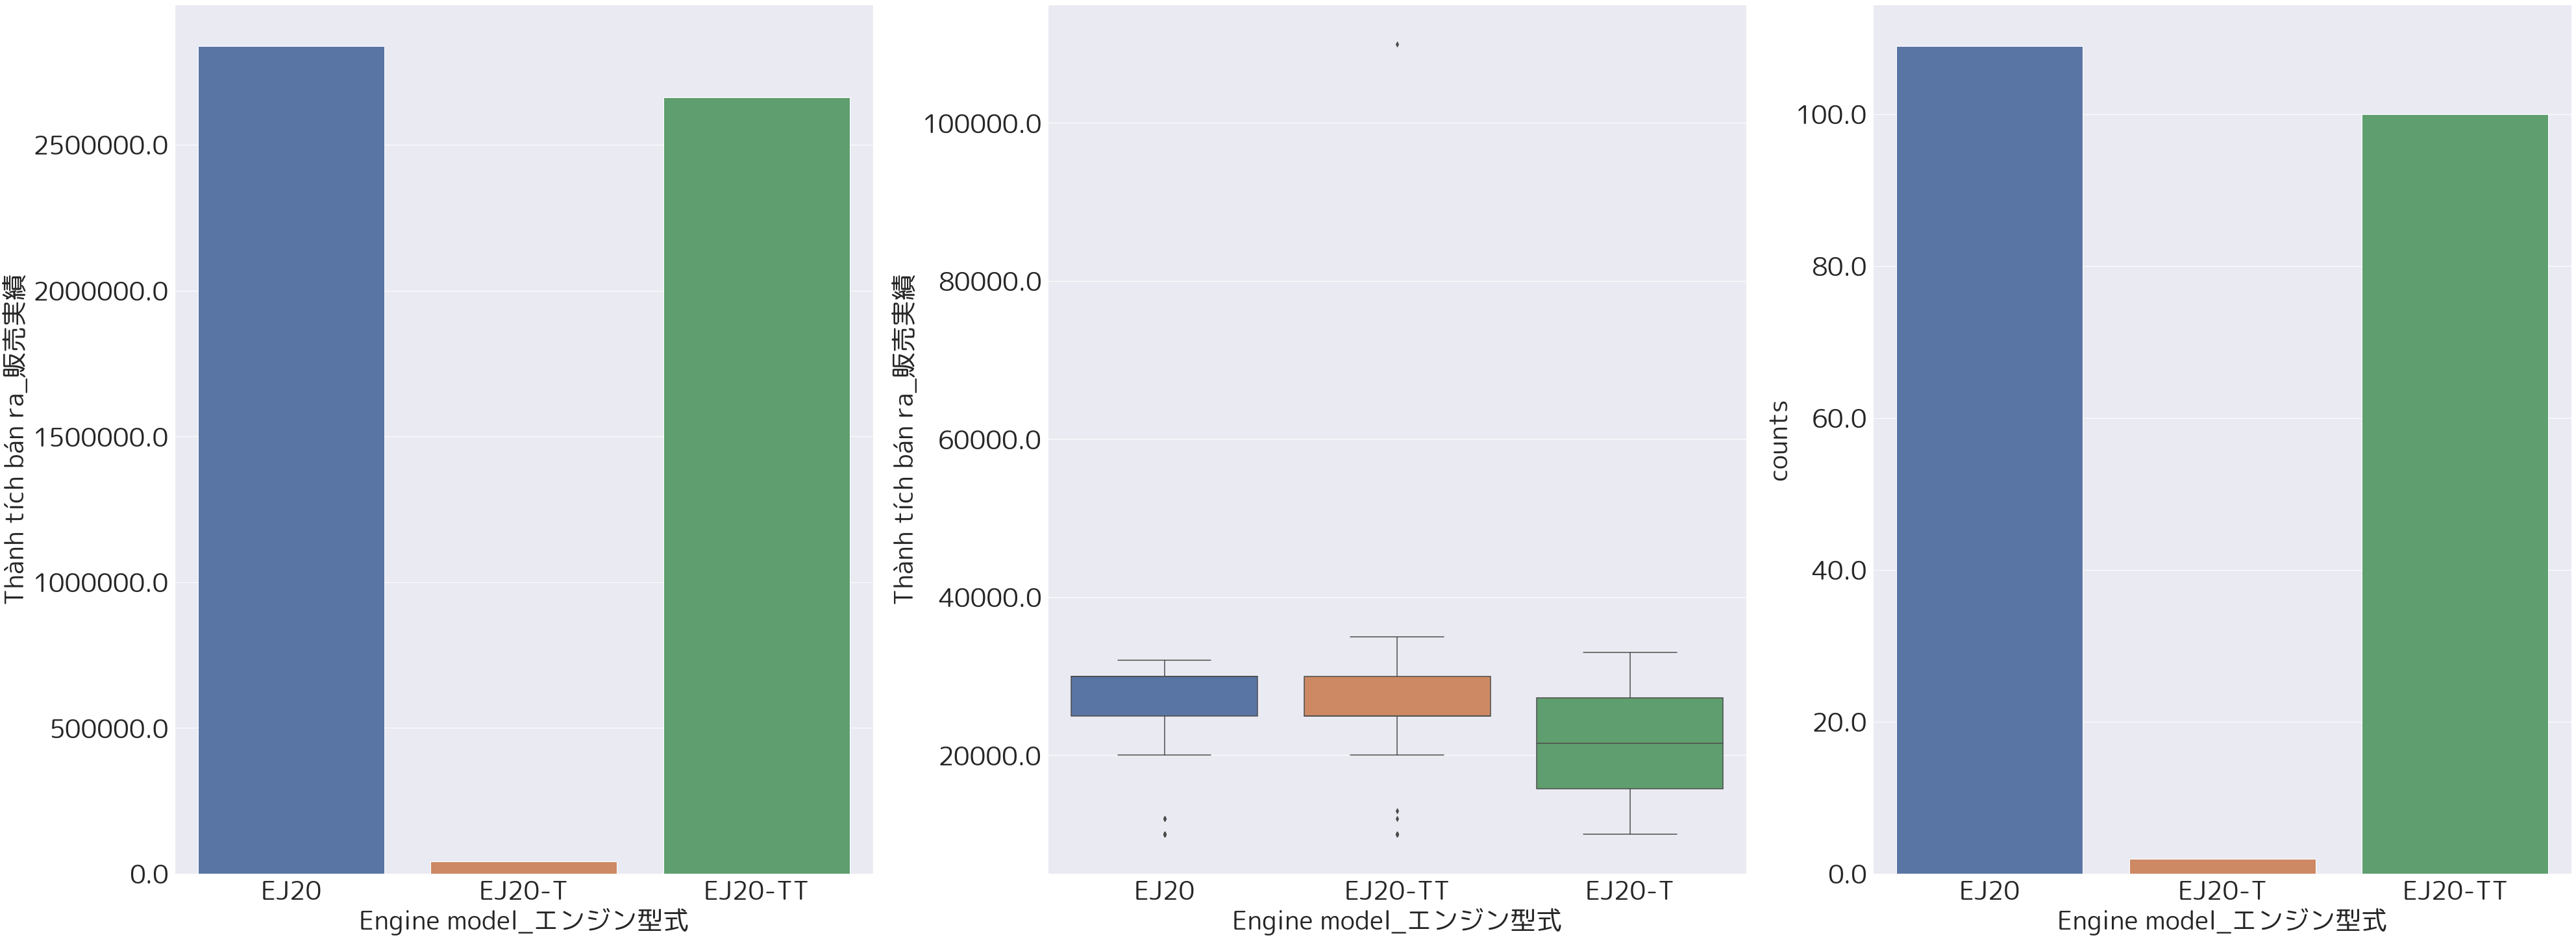

In [195]:
#chọn model xe BH5
df_レガシィ_BH5 =  df_レガシィ[df_レガシィ['Model xe_車輌型式'] == 'BH5']
count_em = df_レガシィ_BH5.groupby(['Engine model_エンジン型式'])['Engine model_エンジン型式'].count().reset_index(name='counts')
sum_em = df_レガシィ_BH5.groupby(['Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
# plt.figure(figsize=(80,60))
# plt.xticks(fontsize = 60)
# plt.xlabel(xlabel = 'Engine model_エンジン型式' ,fontsize = 60)
# plt.yticks(fontsize = 60)
# plt.ylabel(ylabel = 'count',fontsize = 60)
# sns.barplot(data=df_ｴｽﾃｨﾏ, x="Năm sản xuất_年式",y='Thành tích bán ra_販売実績',ci=None)
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(55, 20),constrained_layout=True)
p = sns.barplot(x='Engine model_エンジン型式',y='sum',data=sum_em,ax=axs[0],ci=None)
q = sns.boxplot(x='Engine model_エンジン型式',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5,ax=axs[1])
r = sns.barplot(x='Engine model_エンジン型式',y='counts',data=count_em,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Engine model_エンジン型式",fontsize = 40)
q.set_xlabel("Engine model_エンジン型式",fontsize = 40)
r.set_xlabel("Engine model_エンジン型式",fontsize = 40)

<ipython-input-196-9179eb84761e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-196-9179eb84761e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-196-9179eb84761e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Năm sản xuất_年式')

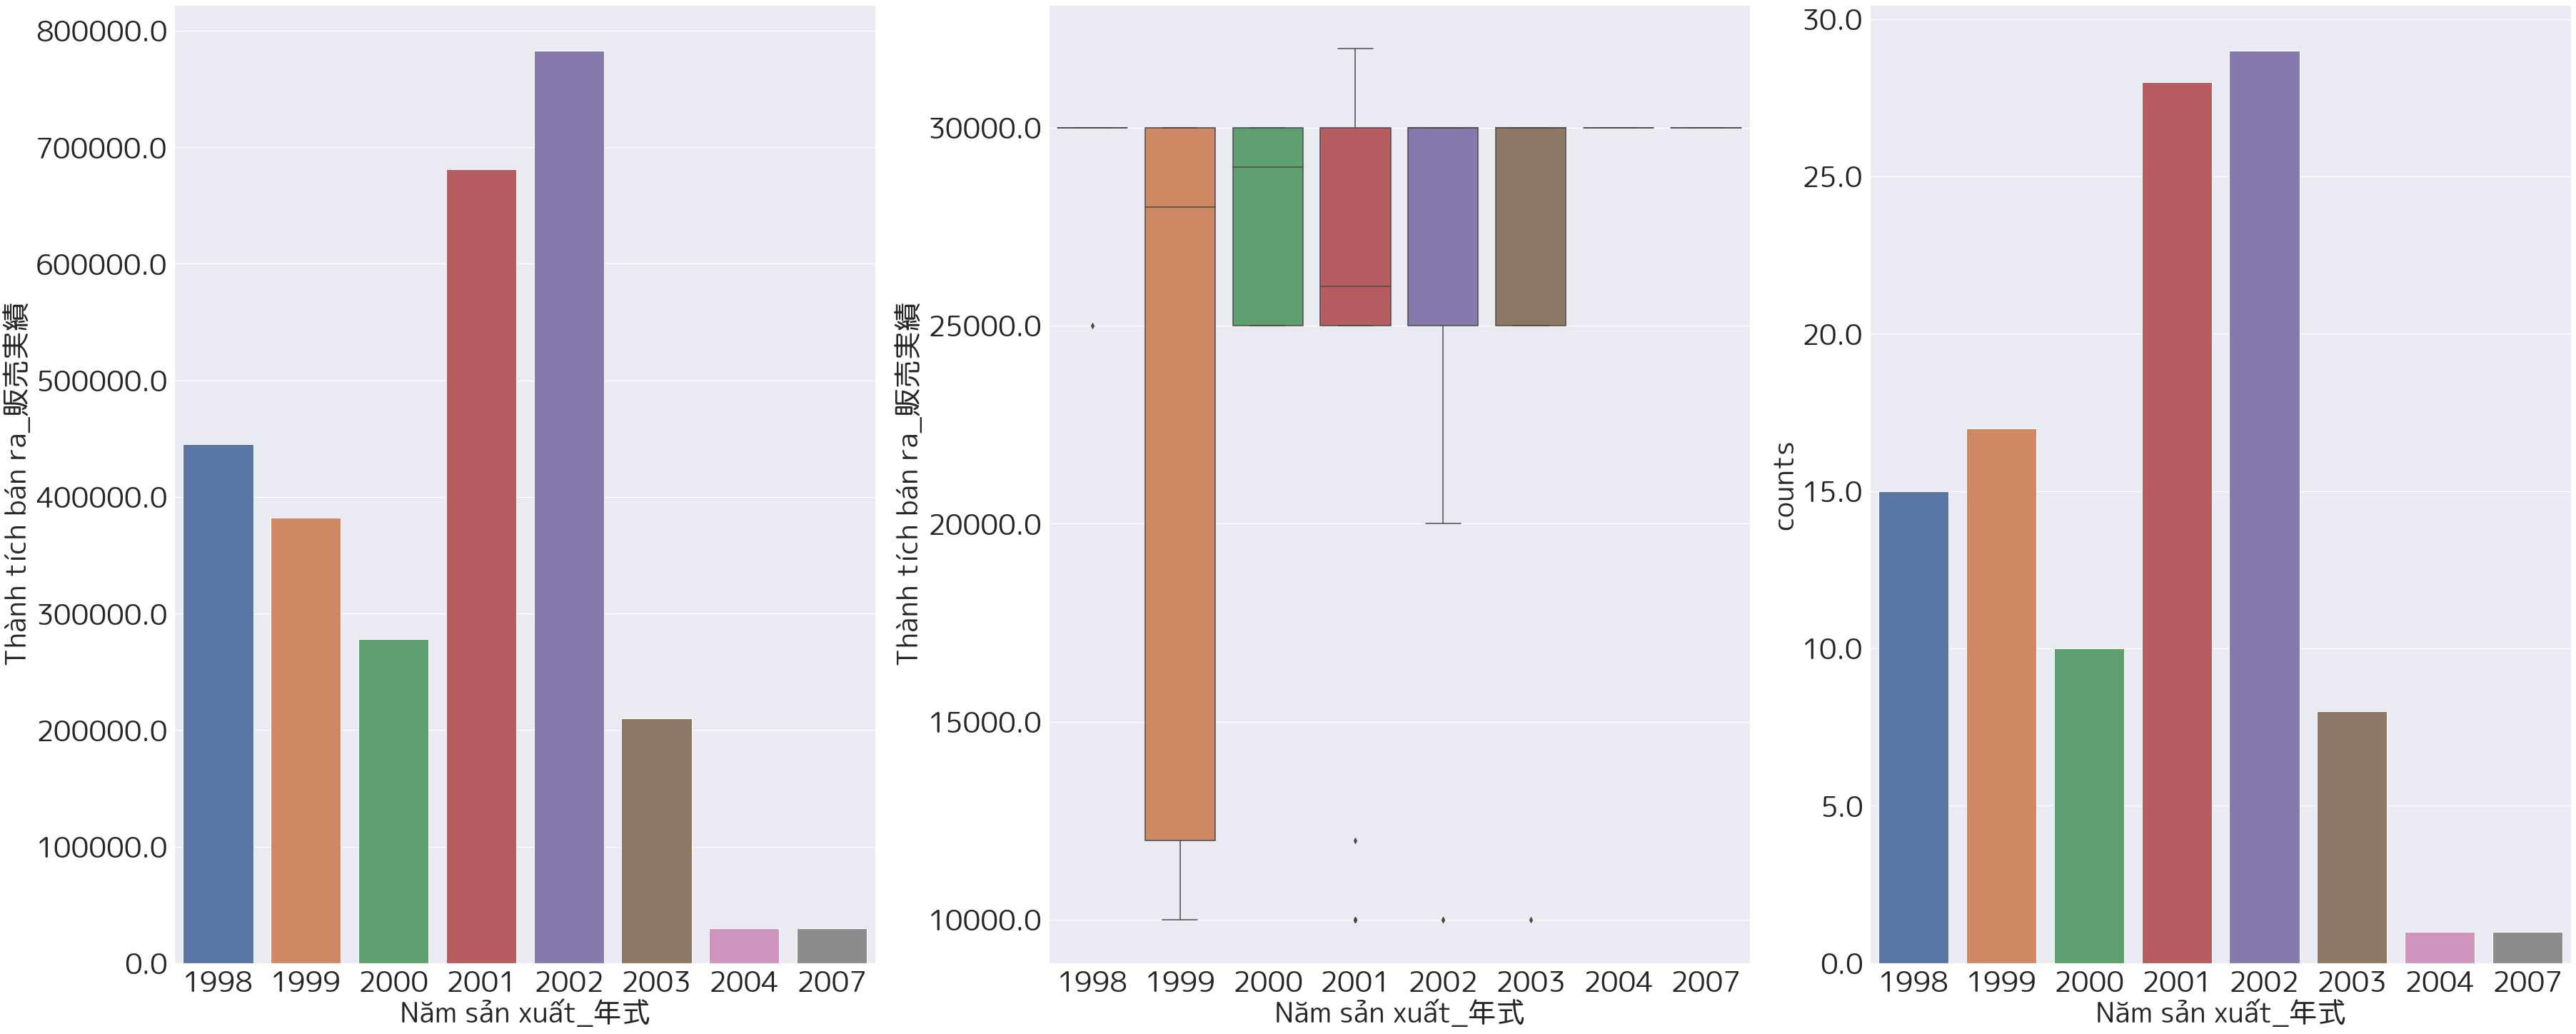

In [196]:
df_レガシィ_BH5_EJ20 = df_レガシィ_BH5[df_レガシィ_BH5['Engine model_エンジン型式'] == 'EJ20']
count_namsx = df_レガシィ_BH5_EJ20.groupby(['Năm sản xuất_年式'])['Năm sản xuất_年式'].count().reset_index(name='counts')
sum_namsx = df_レガシィ_BH5_EJ20.groupby(['Năm sản xuất_年式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
# plt.figure(figsize=(80,60))
# plt.xticks(fontsize = 60)
# plt.xlabel(xlabel = 'Engine model_エンジン型式' ,fontsize = 60)
# plt.yticks(fontsize = 60)
# plt.ylabel(ylabel = 'count',fontsize = 60)
# sns.barplot(data=df_ｴｽﾃｨﾏ_GSR55_2GR_FE, x="Engine model_エンジン型式",y='Thành tích bán ra_販売実績',ci=None)
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
# fig.tight_layout()
p = sns.barplot(x='Năm sản xuất_年式',y='sum',data=sum_namsx,ax=axs[0],ci=None)
q = sns.boxplot(x='Năm sản xuất_年式',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20,ax=axs[1])
r = sns.barplot(x='Năm sản xuất_年式',y='counts',data=count_namsx,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Năm sản xuất_年式",fontsize = 40)
q.set_xlabel("Năm sản xuất_年式",fontsize = 40)
r.set_xlabel("Năm sản xuất_年式",fontsize = 40)

<ipython-input-200-0b7cd47ee5d9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-200-0b7cd47ee5d9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-200-0b7cd47ee5d9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 1_駆動1')

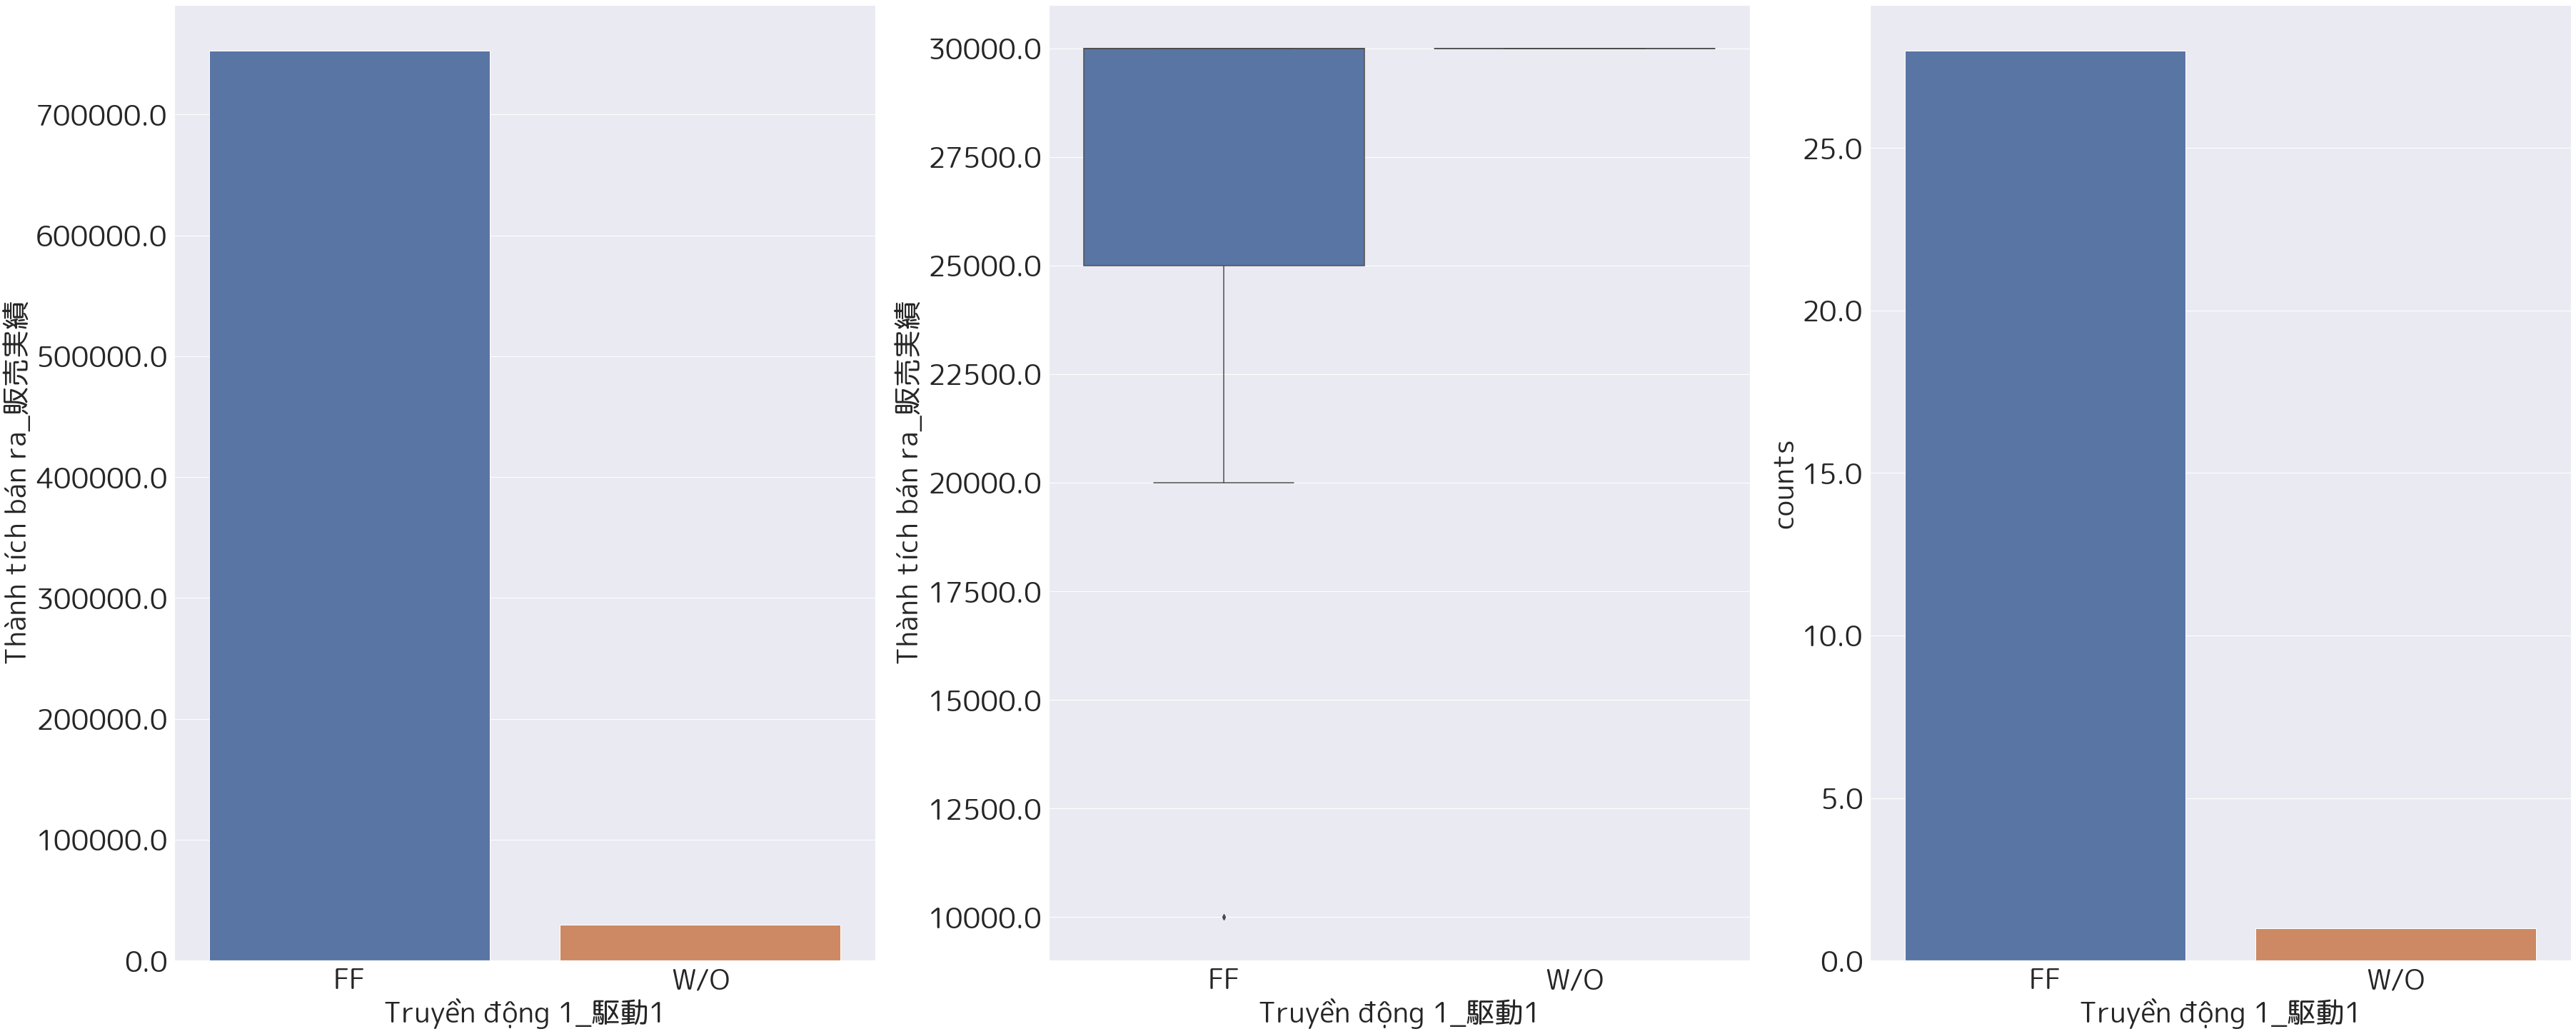

In [200]:
df_レガシィ_BH5_EJ20_2002 = df_レガシィ_BH5_EJ20[df_レガシィ_BH5_EJ20['Năm sản xuất_年式'] == 2002]
count_td1 = df_レガシィ_BH5_EJ20_2002.groupby(['Truyền động 1_駆動1'])['Truyền động 1_駆動1'].count().reset_index(name='counts')
sum_td1 = df_レガシィ_BH5_EJ20_2002.groupby(['Truyền động 1_駆動1'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 1_駆動1',y='sum',data=sum_td1,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 1_駆動1',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2002,ax=axs[1])
r = sns.barplot(x='Truyền động 1_駆動1',y='counts',data=count_td1,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
q.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
r.set_xlabel("Truyền động 1_駆動1",fontsize = 40)

<ipython-input-201-c5023d2ae2d8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-201-c5023d2ae2d8>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-201-c5023d2ae2d8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 2_駆動2')

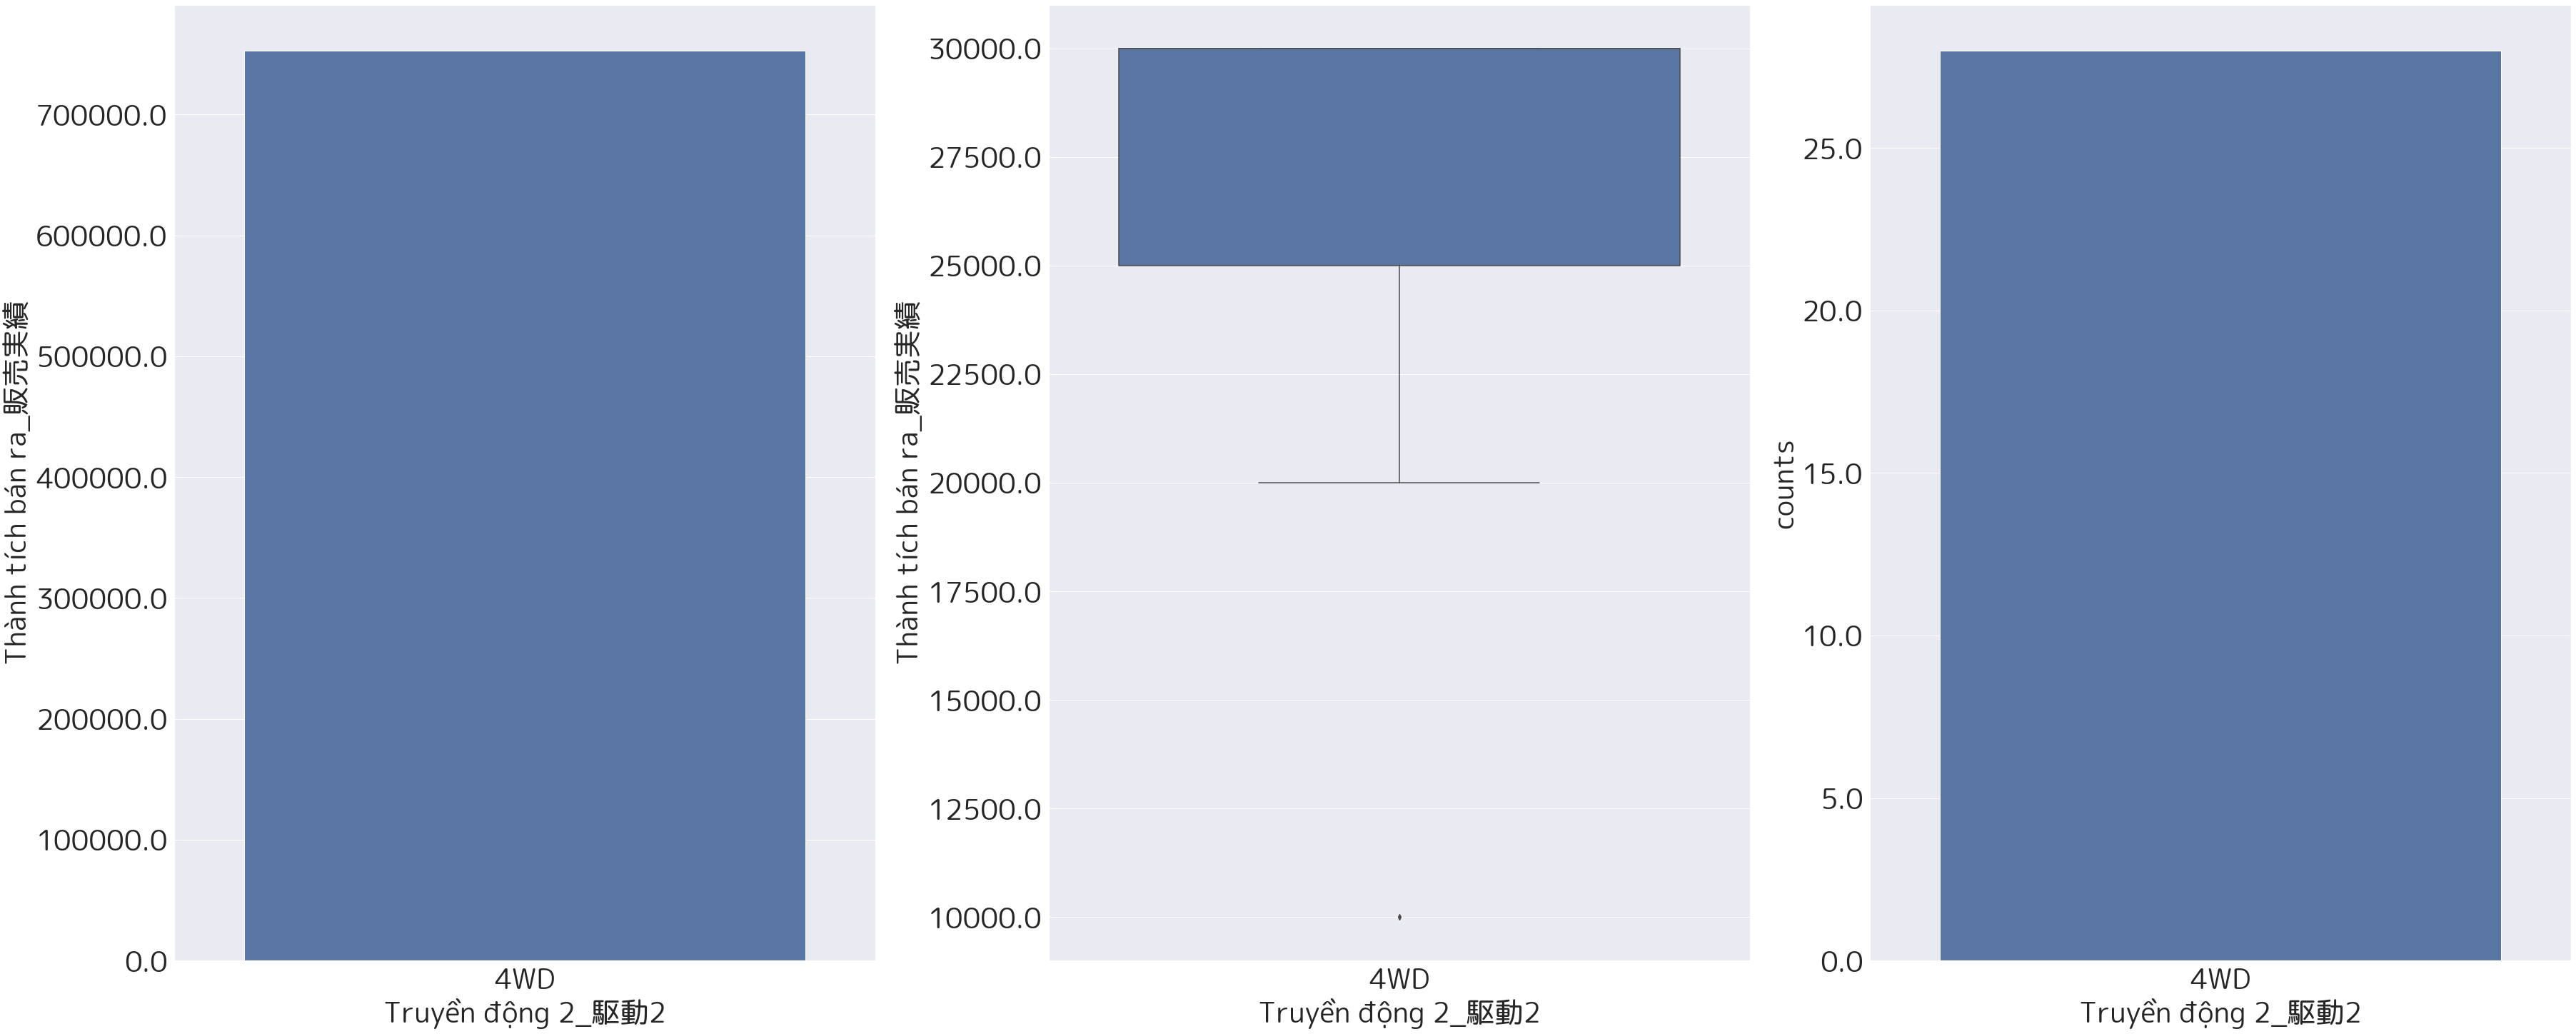

In [201]:
df_レガシィ_BH5_EJ20_2002_FF = df_レガシィ_BH5_EJ20_2002[df_レガシィ_BH5_EJ20_2002['Truyền động 1_駆動1'] == 'FF']
count_td2 = df_レガシィ_BH5_EJ20_2002_FF.groupby(['TM_TM'])['Truyền động 2_駆動2'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BH5_EJ20_2002_FF.groupby(['Truyền động 2_駆動2'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 2_駆動2',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 2_駆動2',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2002_FF,ax=axs[1])
r = sns.barplot(x='Truyền động 2_駆動2',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
q.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
r.set_xlabel("Truyền động 2_駆動2",fontsize = 40)

<ipython-input-204-603cc249bb7f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-204-603cc249bb7f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-204-603cc249bb7f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'TM_TM')

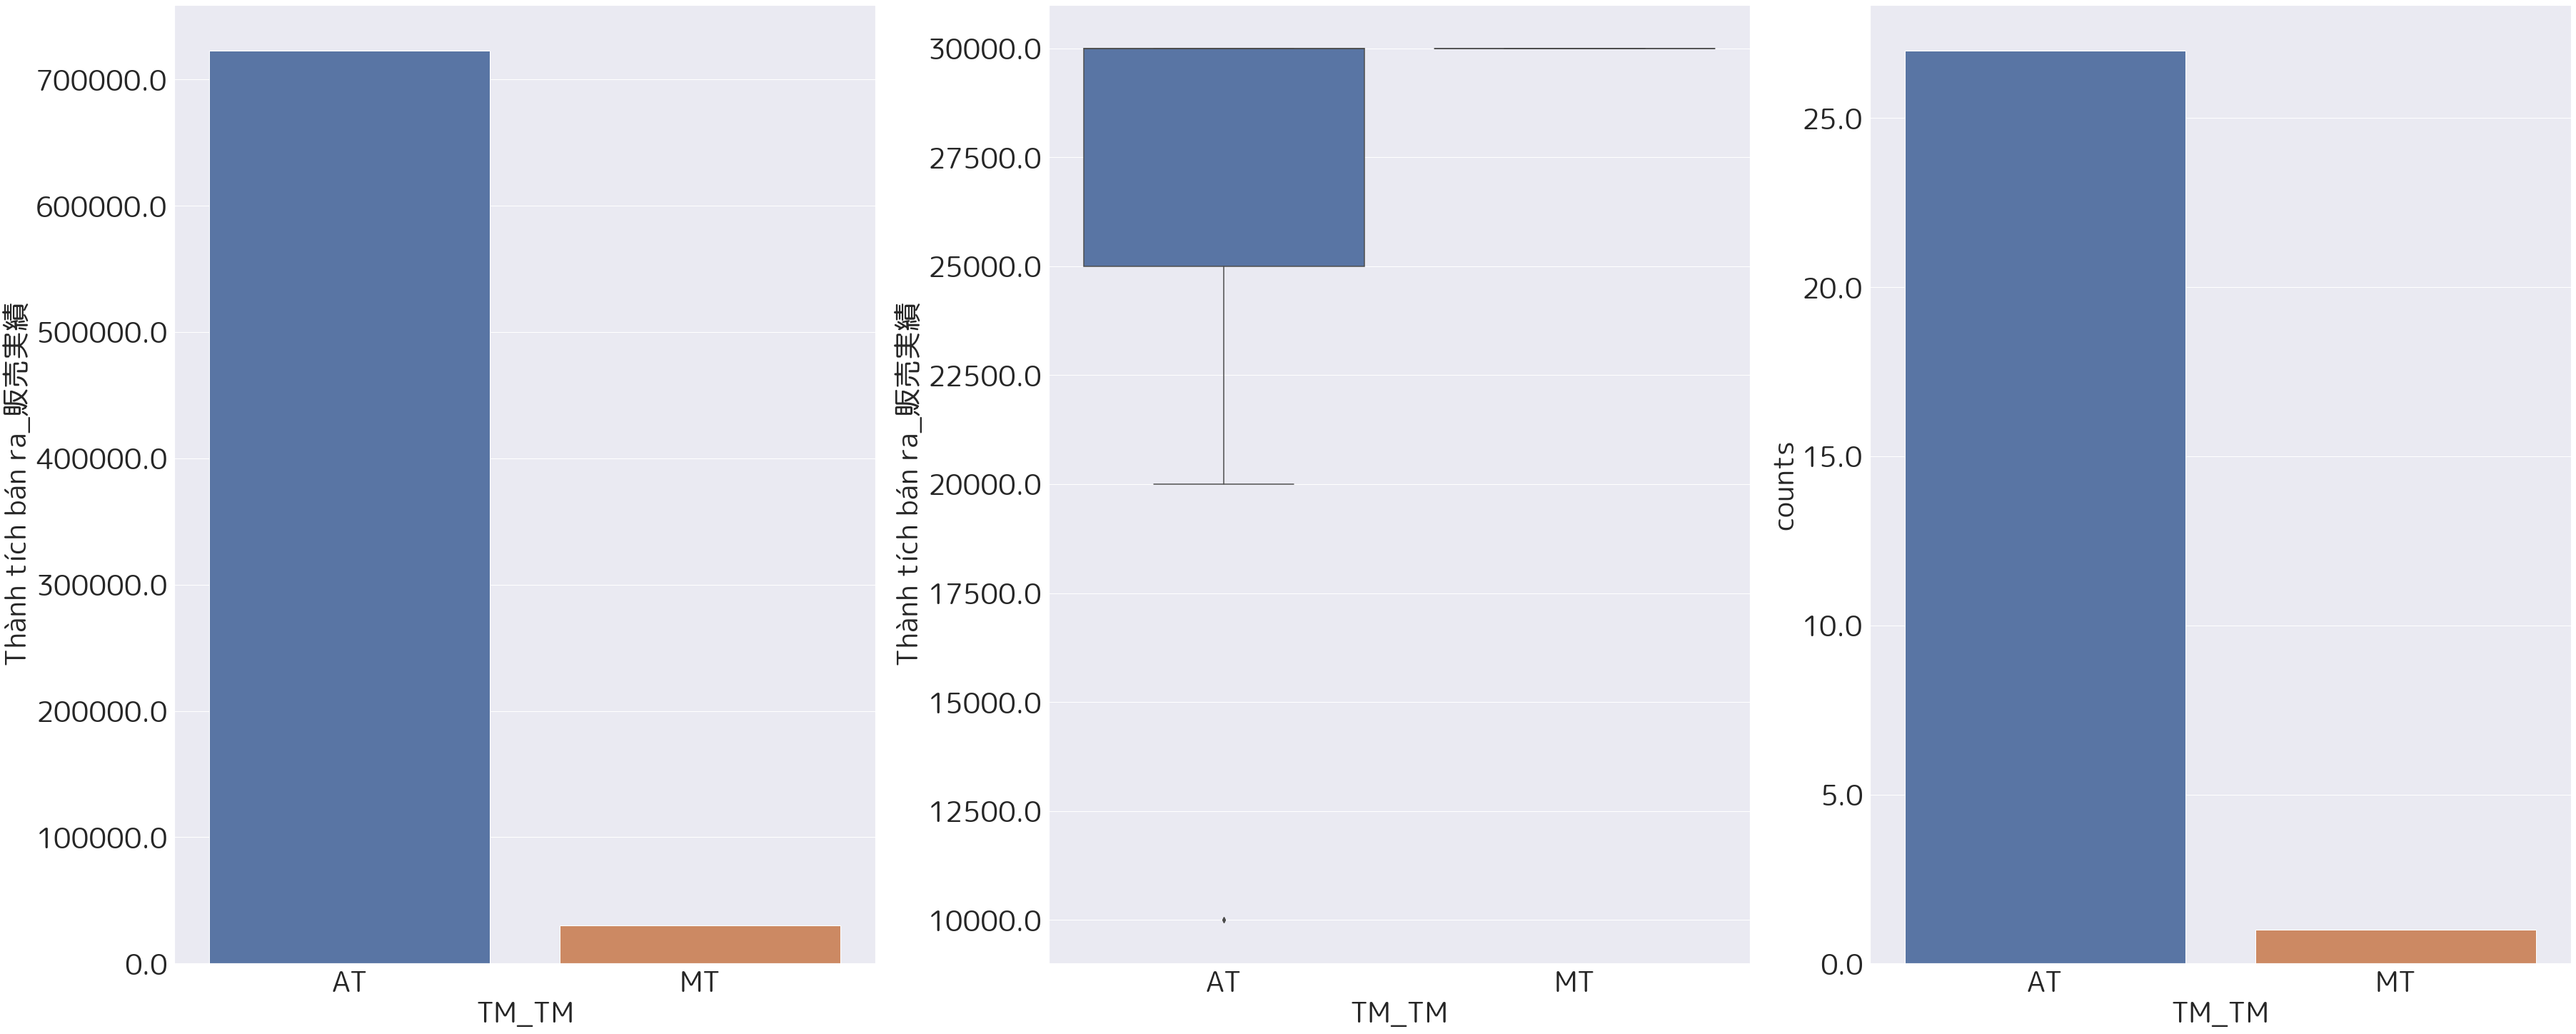

In [204]:
df_レガシィ_BH5_EJ20_2002_FF_4WD = df_レガシィ_BH5_EJ20_2002_FF[df_レガシィ_BH5_EJ20_2002_FF['Truyền động 2_駆動2'] == '4WD']
count_td2 = df_レガシィ_BH5_EJ20_2002_FF_4WD.groupby(['TM_TM'])['TM_TM'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BH5_EJ20_2002_FF_4WD.groupby(['TM_TM'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='TM_TM',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='TM_TM',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2002_FF_4WD,ax=axs[1])
r = sns.barplot(x='TM_TM',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("TM_TM",fontsize = 40)
q.set_xlabel("TM_TM",fontsize = 40)
r.set_xlabel("TM_TM",fontsize = 40)

<ipython-input-206-d505bc6f5cff>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-206-d505bc6f5cff>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-206-d505bc6f5cff>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'D/G_Ｄ／Ｇ')

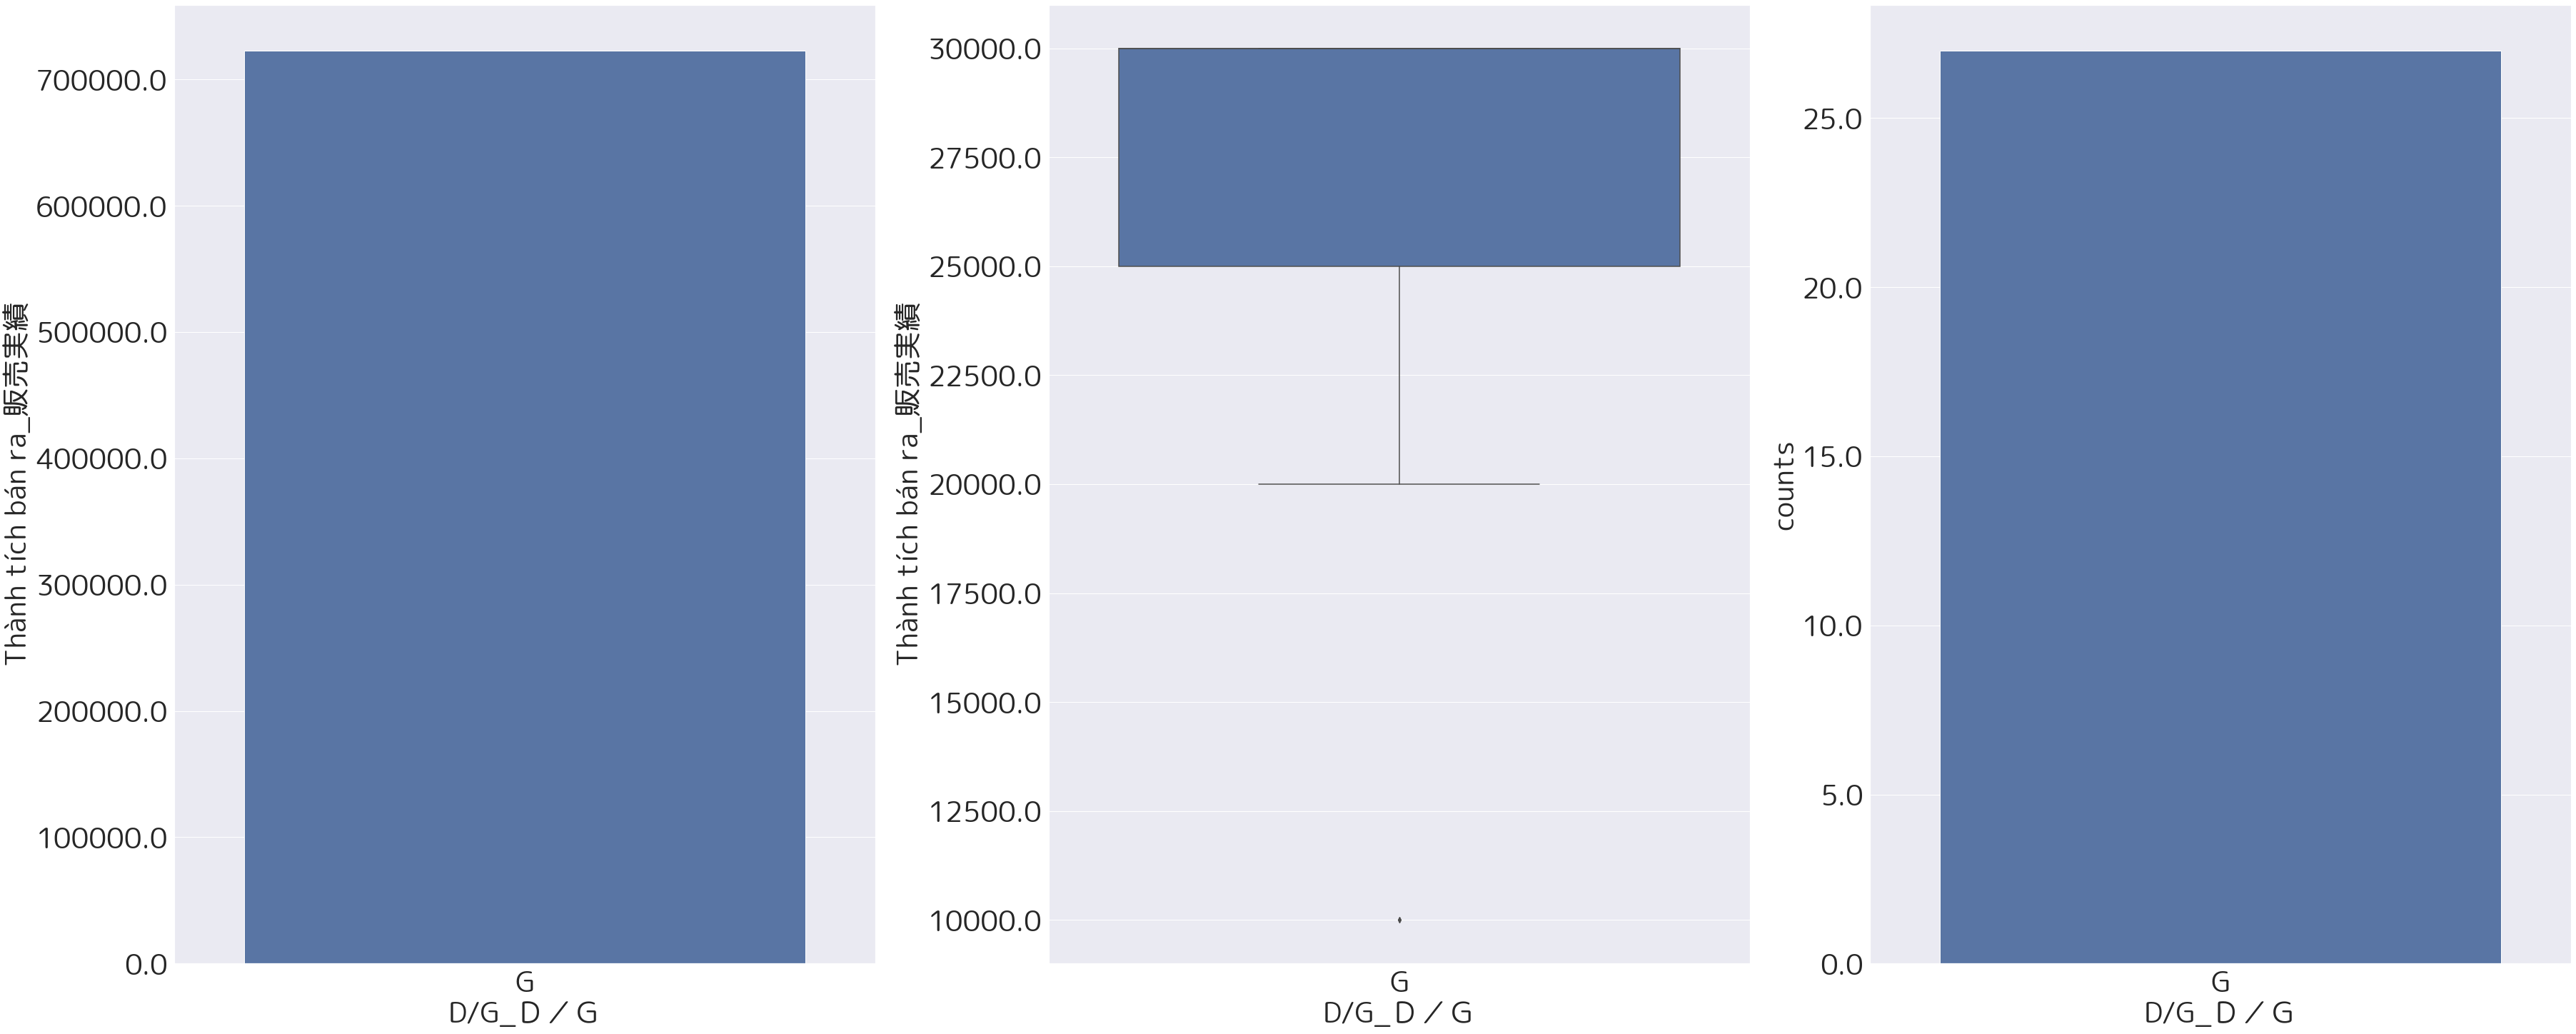

In [206]:
df_レガシィ_BH5_EJ20_2002_FF_4WD_AT = df_レガシィ_BH5_EJ20_2002_FF[df_レガシィ_BH5_EJ20_2002_FF['TM_TM'] == 'AT']
count_td2 = df_レガシィ_BH5_EJ20_2002_FF_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['D/G_Ｄ／Ｇ'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BH5_EJ20_2002_FF_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='D/G_Ｄ／Ｇ',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='D/G_Ｄ／Ｇ',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2002_FF_4WD_AT,ax=axs[1])
r = sns.barplot(x='D/G_Ｄ／Ｇ',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
q.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
r.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)

<ipython-input-207-71ff82b9b8f3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-207-71ff82b9b8f3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-207-71ff82b9b8f3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'D/G_Ｄ／Ｇ')

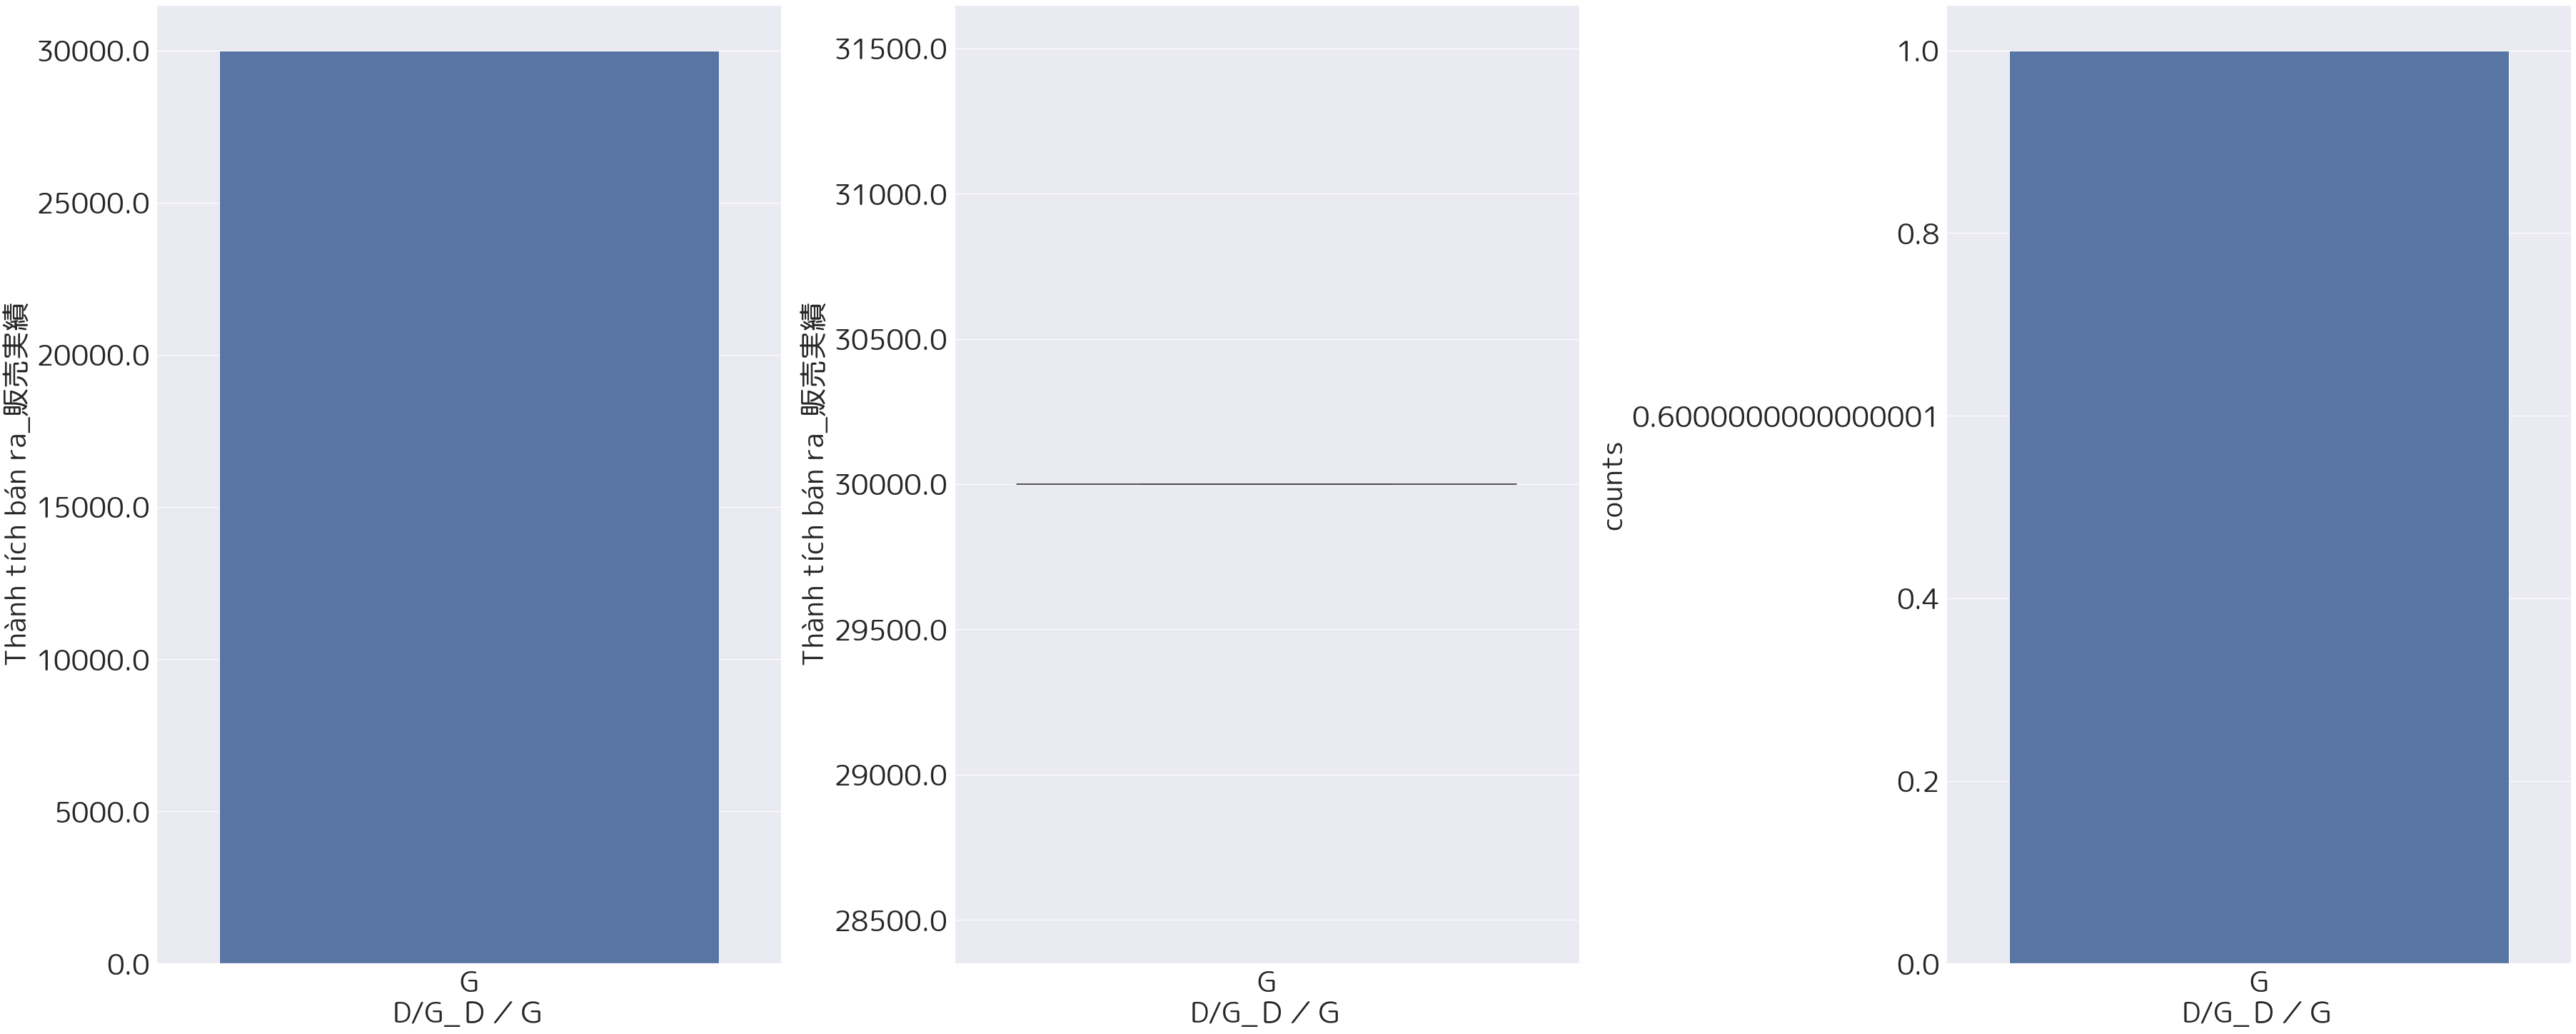

In [207]:
df_レガシィ_BH5_EJ20_2002_FF_4WD_AT = df_レガシィ_BH5_EJ20_2002_FF[df_レガシィ_BH5_EJ20_2002_FF['TM_TM'] == 'MT']
count_td2 = df_レガシィ_BH5_EJ20_2002_FF_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['D/G_Ｄ／Ｇ'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BH5_EJ20_2002_FF_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='D/G_Ｄ／Ｇ',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='D/G_Ｄ／Ｇ',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2002_FF_4WD_AT,ax=axs[1])
r = sns.barplot(x='D/G_Ｄ／Ｇ',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
q.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
r.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)

<ipython-input-209-f6e1367abead>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-209-f6e1367abead>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-209-f6e1367abead>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 1_駆動1')

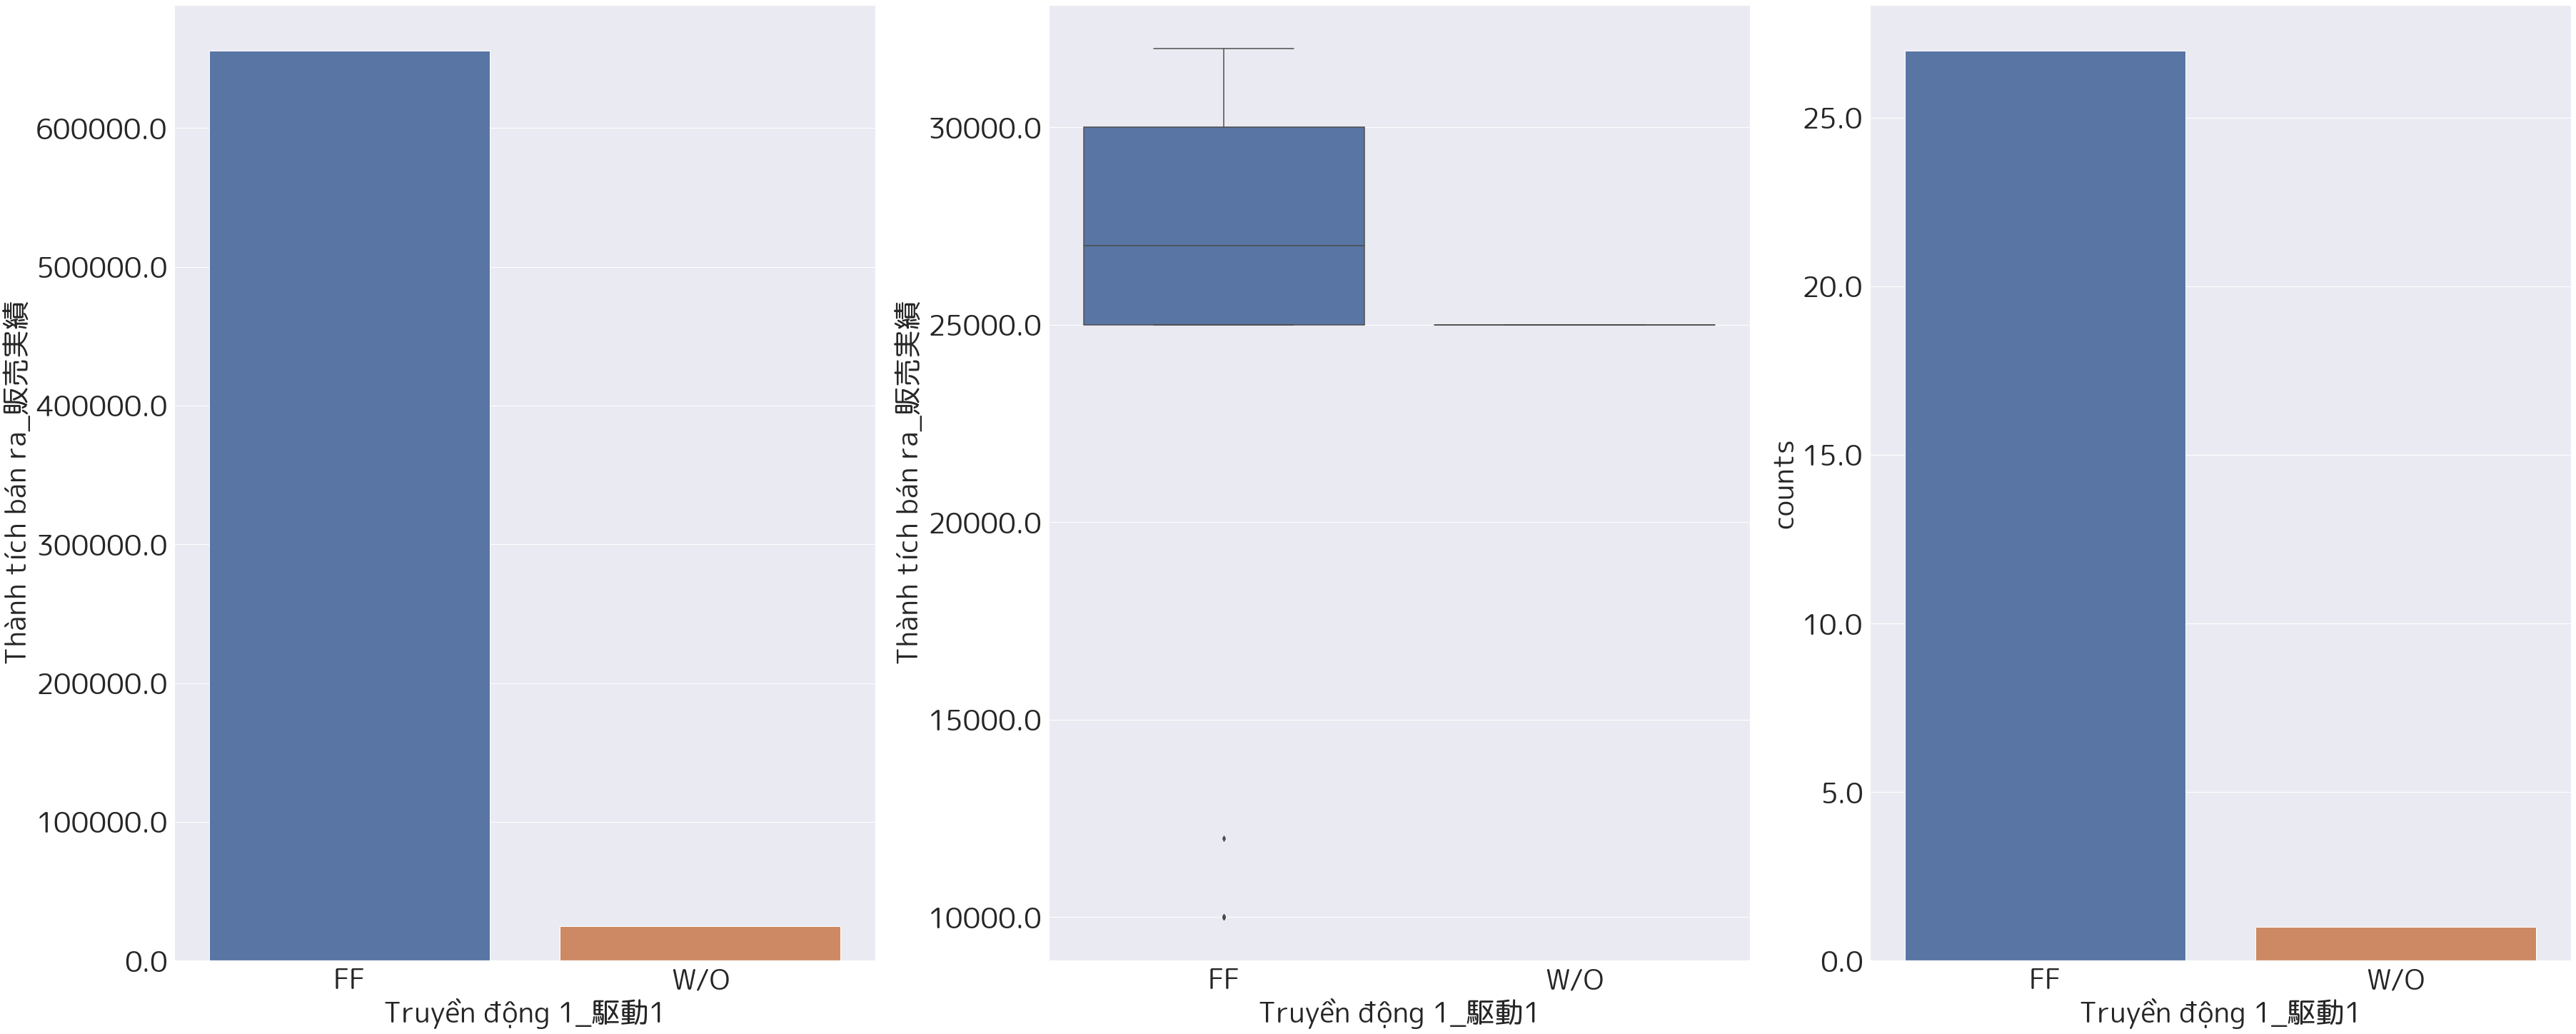

In [209]:
df_レガシィ_BH5_EJ20_2001 = df_レガシィ_BH5_EJ20[df_レガシィ_BH5_EJ20['Năm sản xuất_年式'] == 2001]
count_td1 = df_レガシィ_BH5_EJ20_2001.groupby(['Truyền động 1_駆動1'])['Truyền động 1_駆動1'].count().reset_index(name='counts')
sum_td1 = df_レガシィ_BH5_EJ20_2001.groupby(['Truyền động 1_駆動1'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 1_駆動1',y='sum',data=sum_td1,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 1_駆動1',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2001,ax=axs[1])
r = sns.barplot(x='Truyền động 1_駆動1',y='counts',data=count_td1,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
q.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
r.set_xlabel("Truyền động 1_駆動1",fontsize = 40)

<ipython-input-212-61b551cf73a2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-212-61b551cf73a2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-212-61b551cf73a2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 2_駆動2')

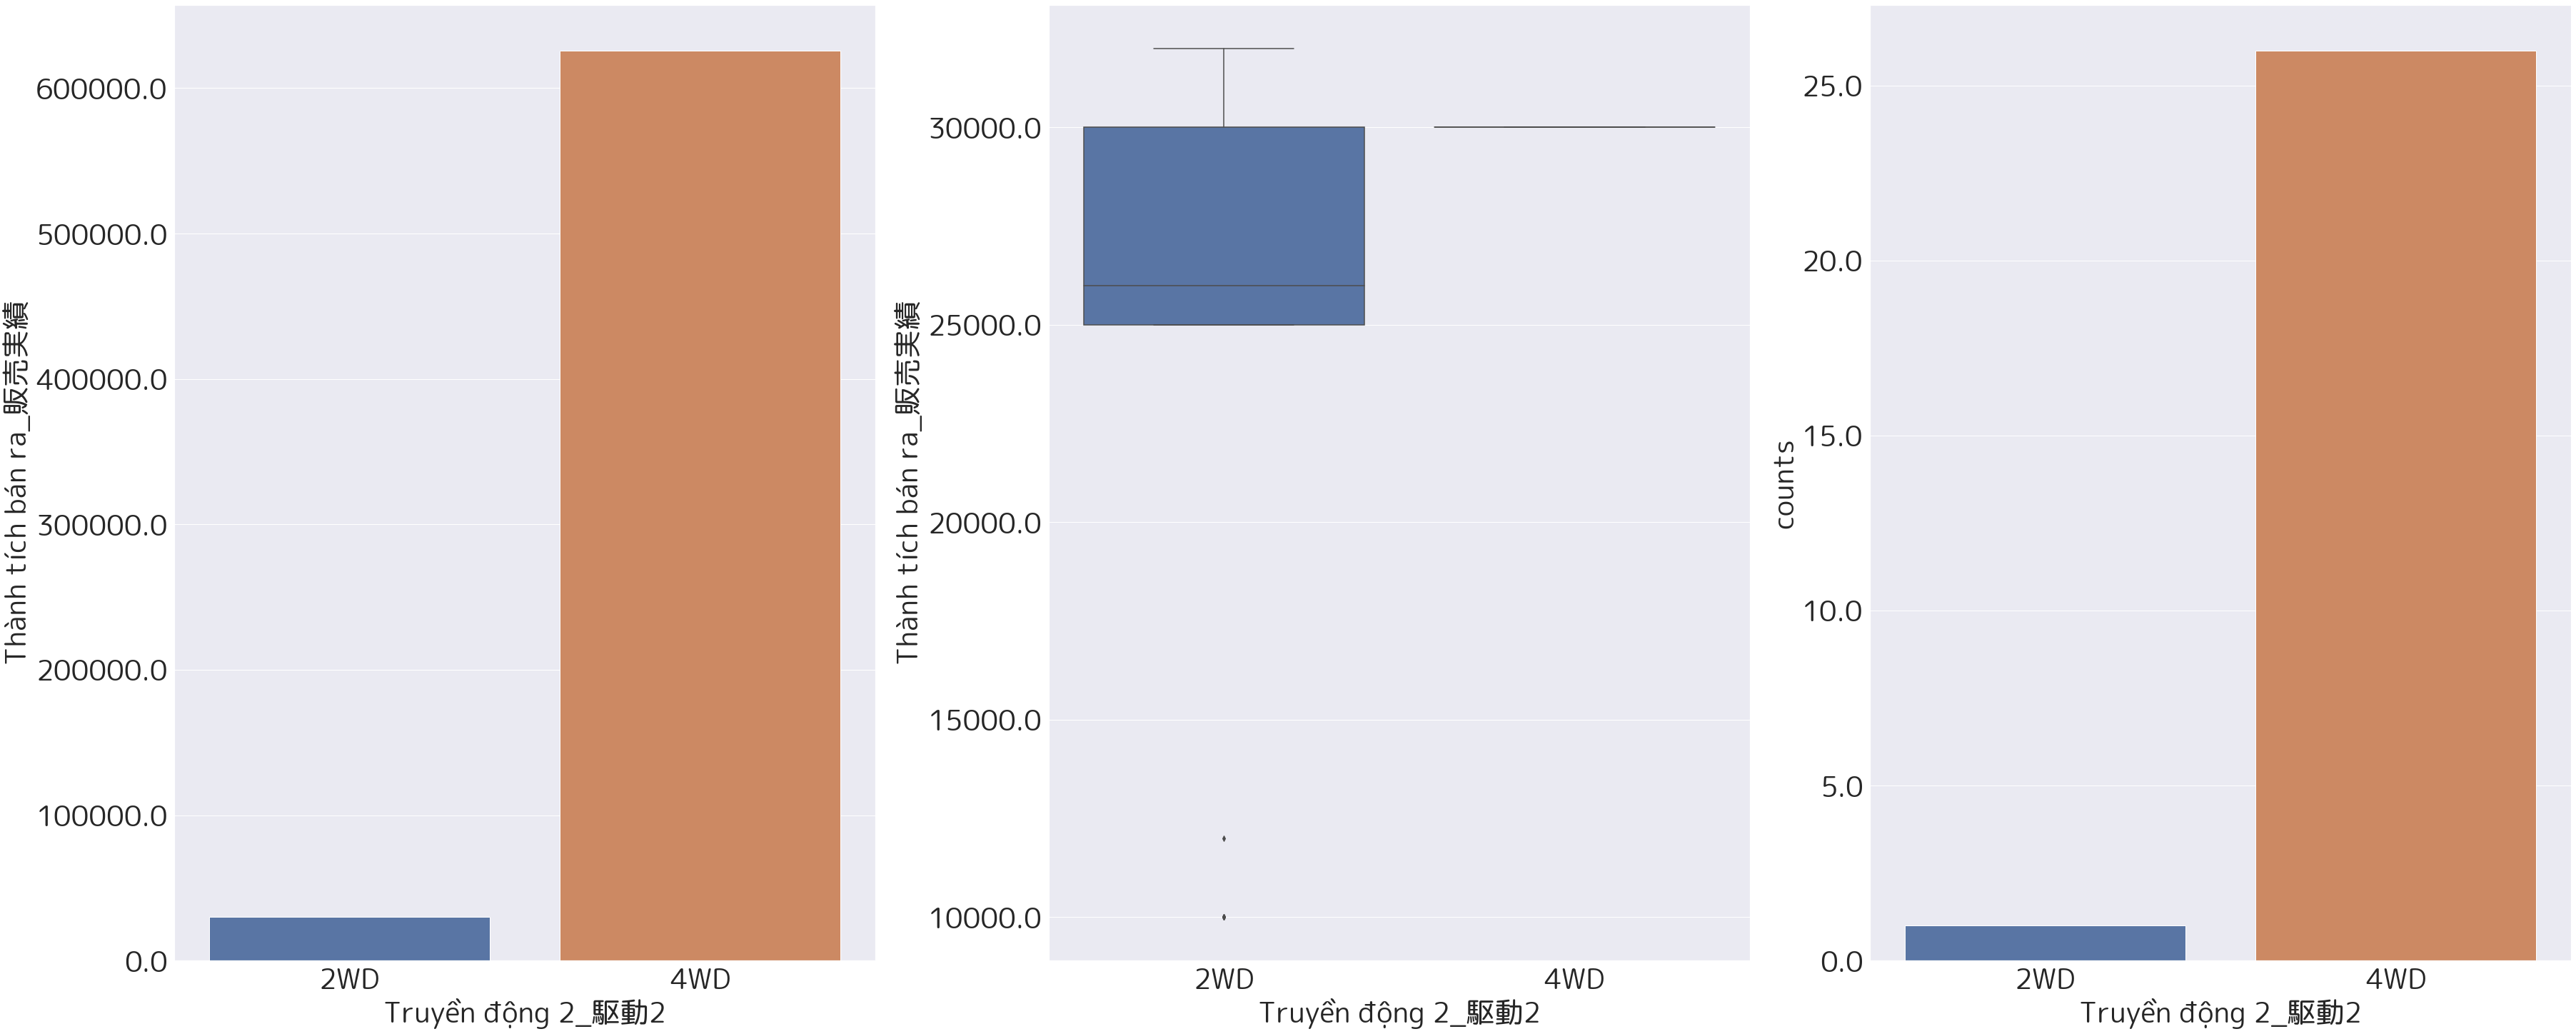

In [212]:
df_レガシィ_BH5_EJ20_2001_FF = df_レガシィ_BH5_EJ20_2001[df_レガシィ_BH5_EJ20_2001['Truyền động 1_駆動1'] == 'FF']
count_td2 = df_レガシィ_BH5_EJ20_2001_FF.groupby(['Truyền động 2_駆動2'])['Truyền động 2_駆動2'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BH5_EJ20_2001_FF.groupby(['Truyền động 2_駆動2'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 2_駆動2',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 2_駆動2',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2001_FF,ax=axs[1])
r = sns.barplot(x='Truyền động 2_駆動2',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
q.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
r.set_xlabel("Truyền động 2_駆動2",fontsize = 40)

<ipython-input-214-6f1c3b686946>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-214-6f1c3b686946>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-214-6f1c3b686946>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'TM_TM')

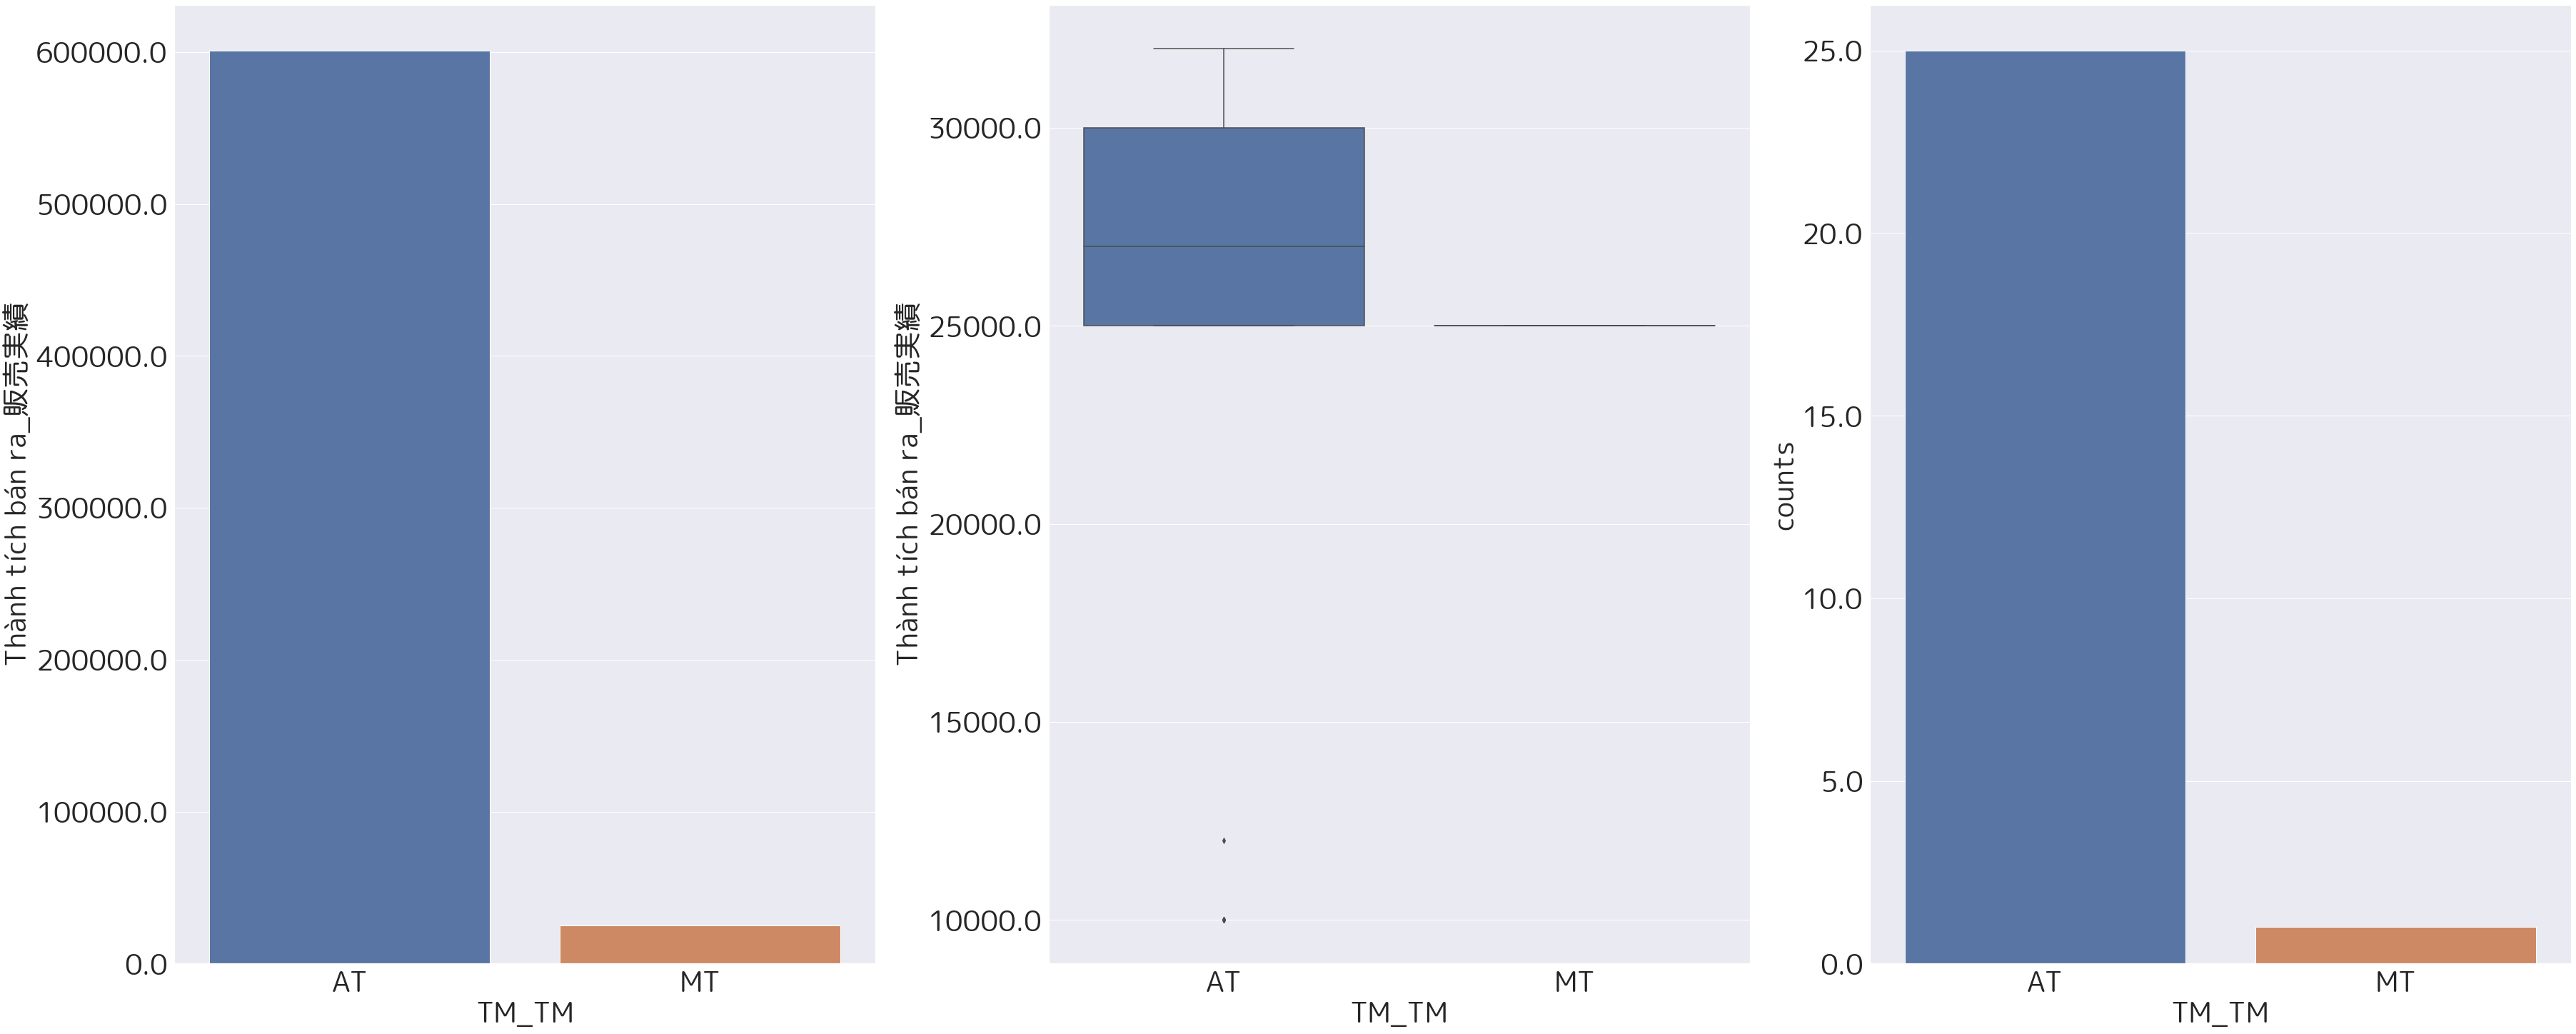

In [214]:
df_レガシィ_BH5_EJ20_2001_FF_4WD = df_レガシィ_BH5_EJ20_2001_FF[df_レガシィ_BH5_EJ20_2001_FF['Truyền động 2_駆動2'] == '4WD']
count_td2 = df_レガシィ_BH5_EJ20_2001_FF_4WD.groupby(['TM_TM'])['TM_TM'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BH5_EJ20_2001_FF_4WD.groupby(['TM_TM'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='TM_TM',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='TM_TM',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2001_FF_4WD,ax=axs[1])
r = sns.barplot(x='TM_TM',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("TM_TM",fontsize = 40)
q.set_xlabel("TM_TM",fontsize = 40)
r.set_xlabel("TM_TM",fontsize = 40)

<ipython-input-215-181970985905>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-215-181970985905>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-215-181970985905>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'D/G_Ｄ／Ｇ')

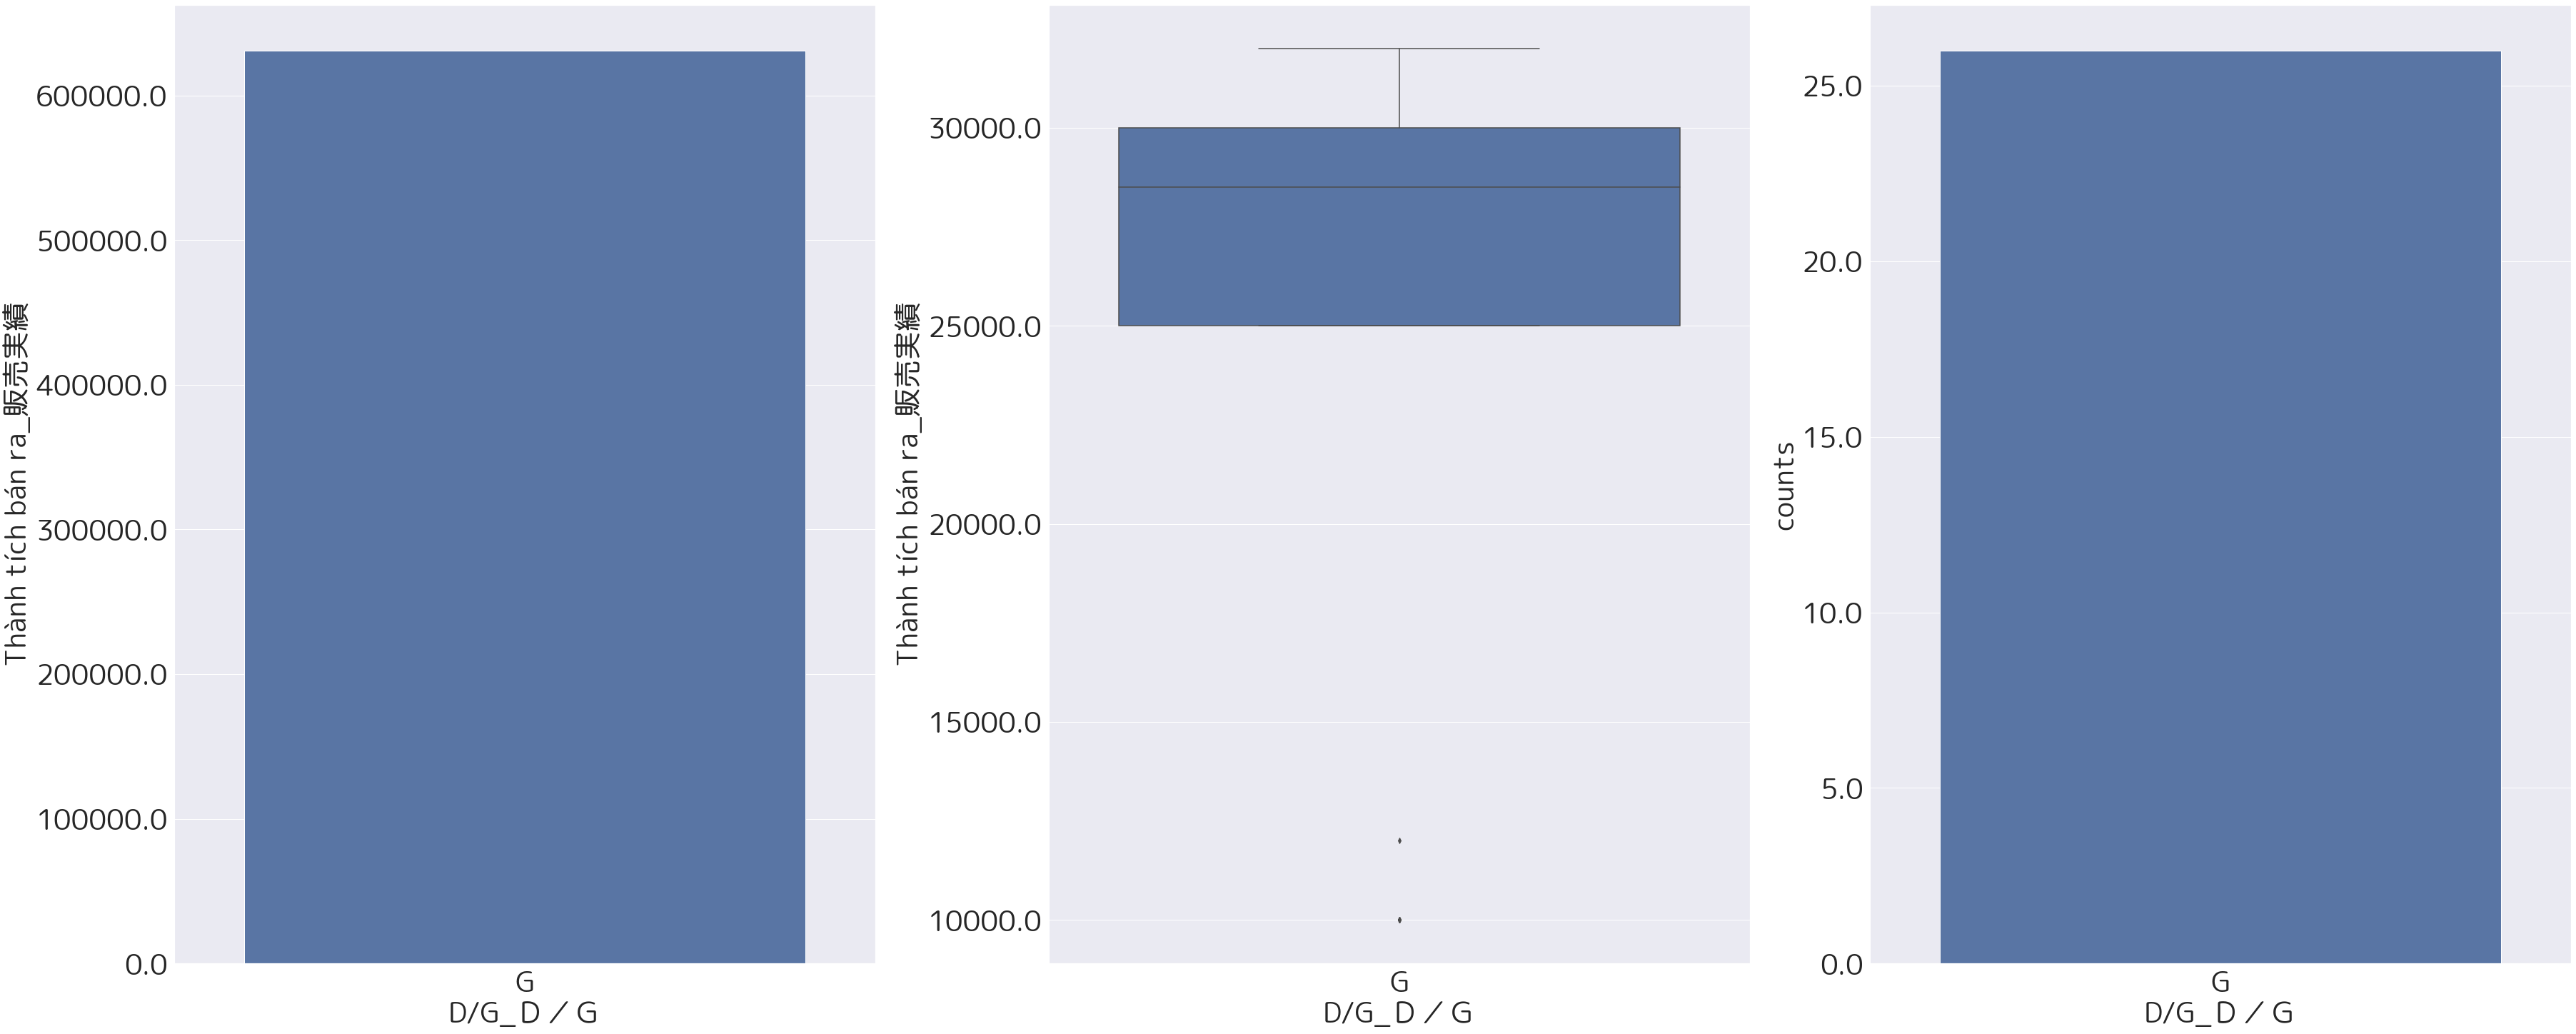

In [215]:
df_レガシィ_BH5_EJ20_2001_FF_4WD_AT = df_レガシィ_BH5_EJ20_2001_FF[df_レガシィ_BH5_EJ20_2001_FF['TM_TM'] == 'AT']
count_td2 = df_レガシィ_BH5_EJ20_2001_FF_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['D/G_Ｄ／Ｇ'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BH5_EJ20_2001_FF_4WD_AT.groupby(['D/G_Ｄ／Ｇ'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='D/G_Ｄ／Ｇ',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='D/G_Ｄ／Ｇ',y='Thành tích bán ra_販売実績',data=df_レガシィ_BH5_EJ20_2001_FF_4WD_AT,ax=axs[1])
r = sns.barplot(x='D/G_Ｄ／Ｇ',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
q.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)
r.set_xlabel("D/G_Ｄ／Ｇ",fontsize = 40)

<ipython-input-217-7423fe743f0e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 50)
<ipython-input-217-7423fe743f0e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 50)
<ipython-input-217-7423fe743f0e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =50)


Text(0.5, 0, 'Engine model_エンジン型式')

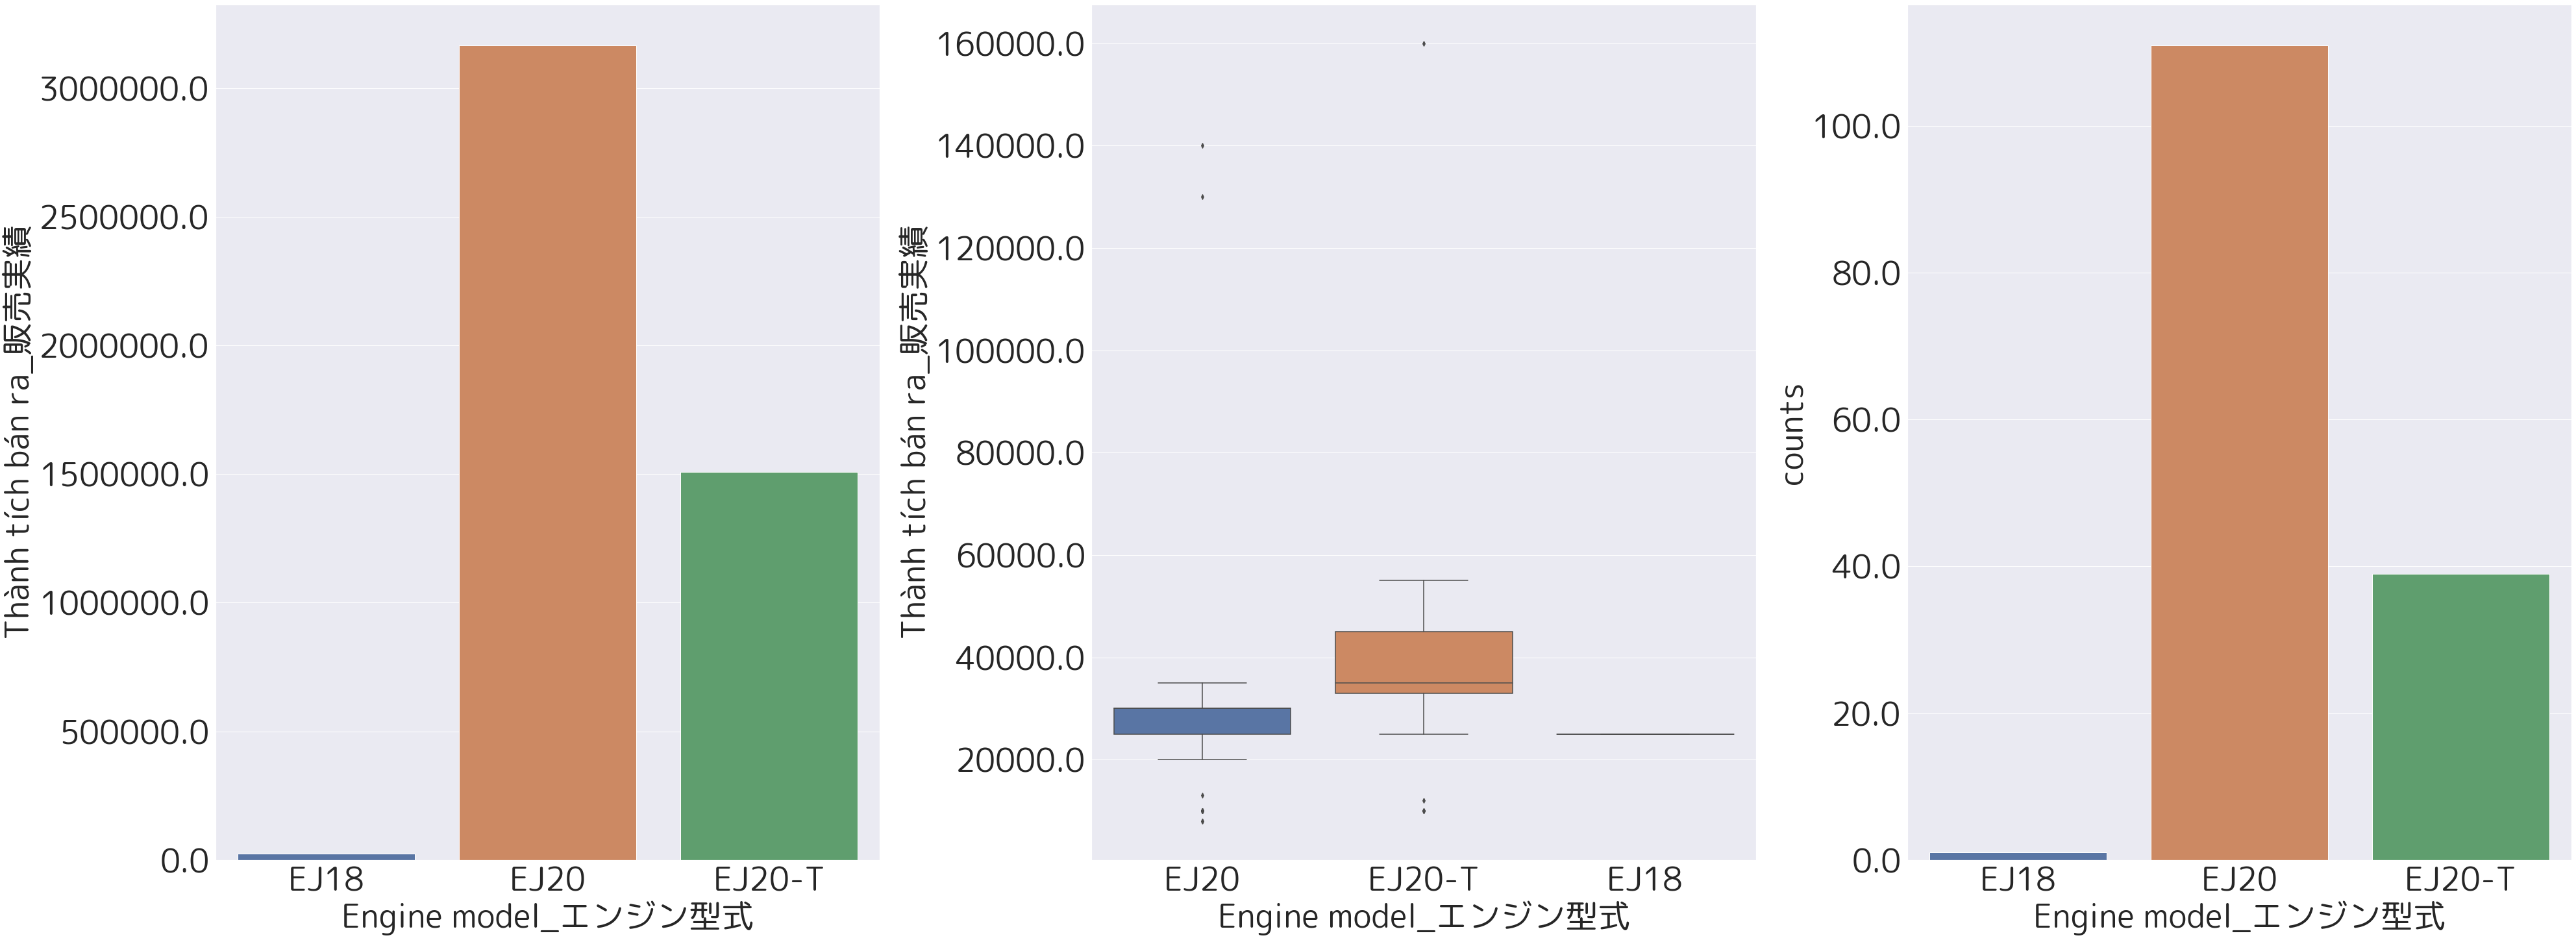

In [217]:
#chọn model xe BP5
df_レガシィ_BP5 =  df_レガシィ[df_レガシィ['Model xe_車輌型式'] == 'BP5']
count_em = df_レガシィ_BP5.groupby(['Engine model_エンジン型式'])['Engine model_エンジン型式'].count().reset_index(name='counts')
sum_em = df_レガシィ_BP5.groupby(['Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
# plt.figure(figsize=(80,60))
# plt.xticks(fontsize = 60)
# plt.xlabel(xlabel = 'Engine model_エンジン型式' ,fontsize = 60)
# plt.yticks(fontsize = 60)
# plt.ylabel(ylabel = 'count',fontsize = 60)
# sns.barplot(data=df_ｴｽﾃｨﾏ, x="Năm sản xuất_年式",y='Thành tích bán ra_販売実績',ci=None)
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(55, 20),constrained_layout=True)
p = sns.barplot(x='Engine model_エンジン型式',y='sum',data=sum_em,ax=axs[0],ci=None)
q = sns.boxplot(x='Engine model_エンジン型式',y='Thành tích bán ra_販売実績',data=df_レガシィ_BP5,ax=axs[1])
r = sns.barplot(x='Engine model_エンジン型式',y='counts',data=count_em,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =50,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =50,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =50)
p.set_yticklabels(p.get_yticks(), size = 50)
q.set_yticklabels(q.get_yticks(), size = 50)
r.set_yticklabels(r.get_yticks(),size =50)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
r.set_ylabel("counts",fontsize = 50)
p.set_xlabel("Engine model_エンジン型式",fontsize = 50)
q.set_xlabel("Engine model_エンジン型式",fontsize = 50)
r.set_xlabel("Engine model_エンジン型式",fontsize = 50)

<ipython-input-218-5d2694f9b5da>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-218-5d2694f9b5da>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-218-5d2694f9b5da>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Năm sản xuất_年式')

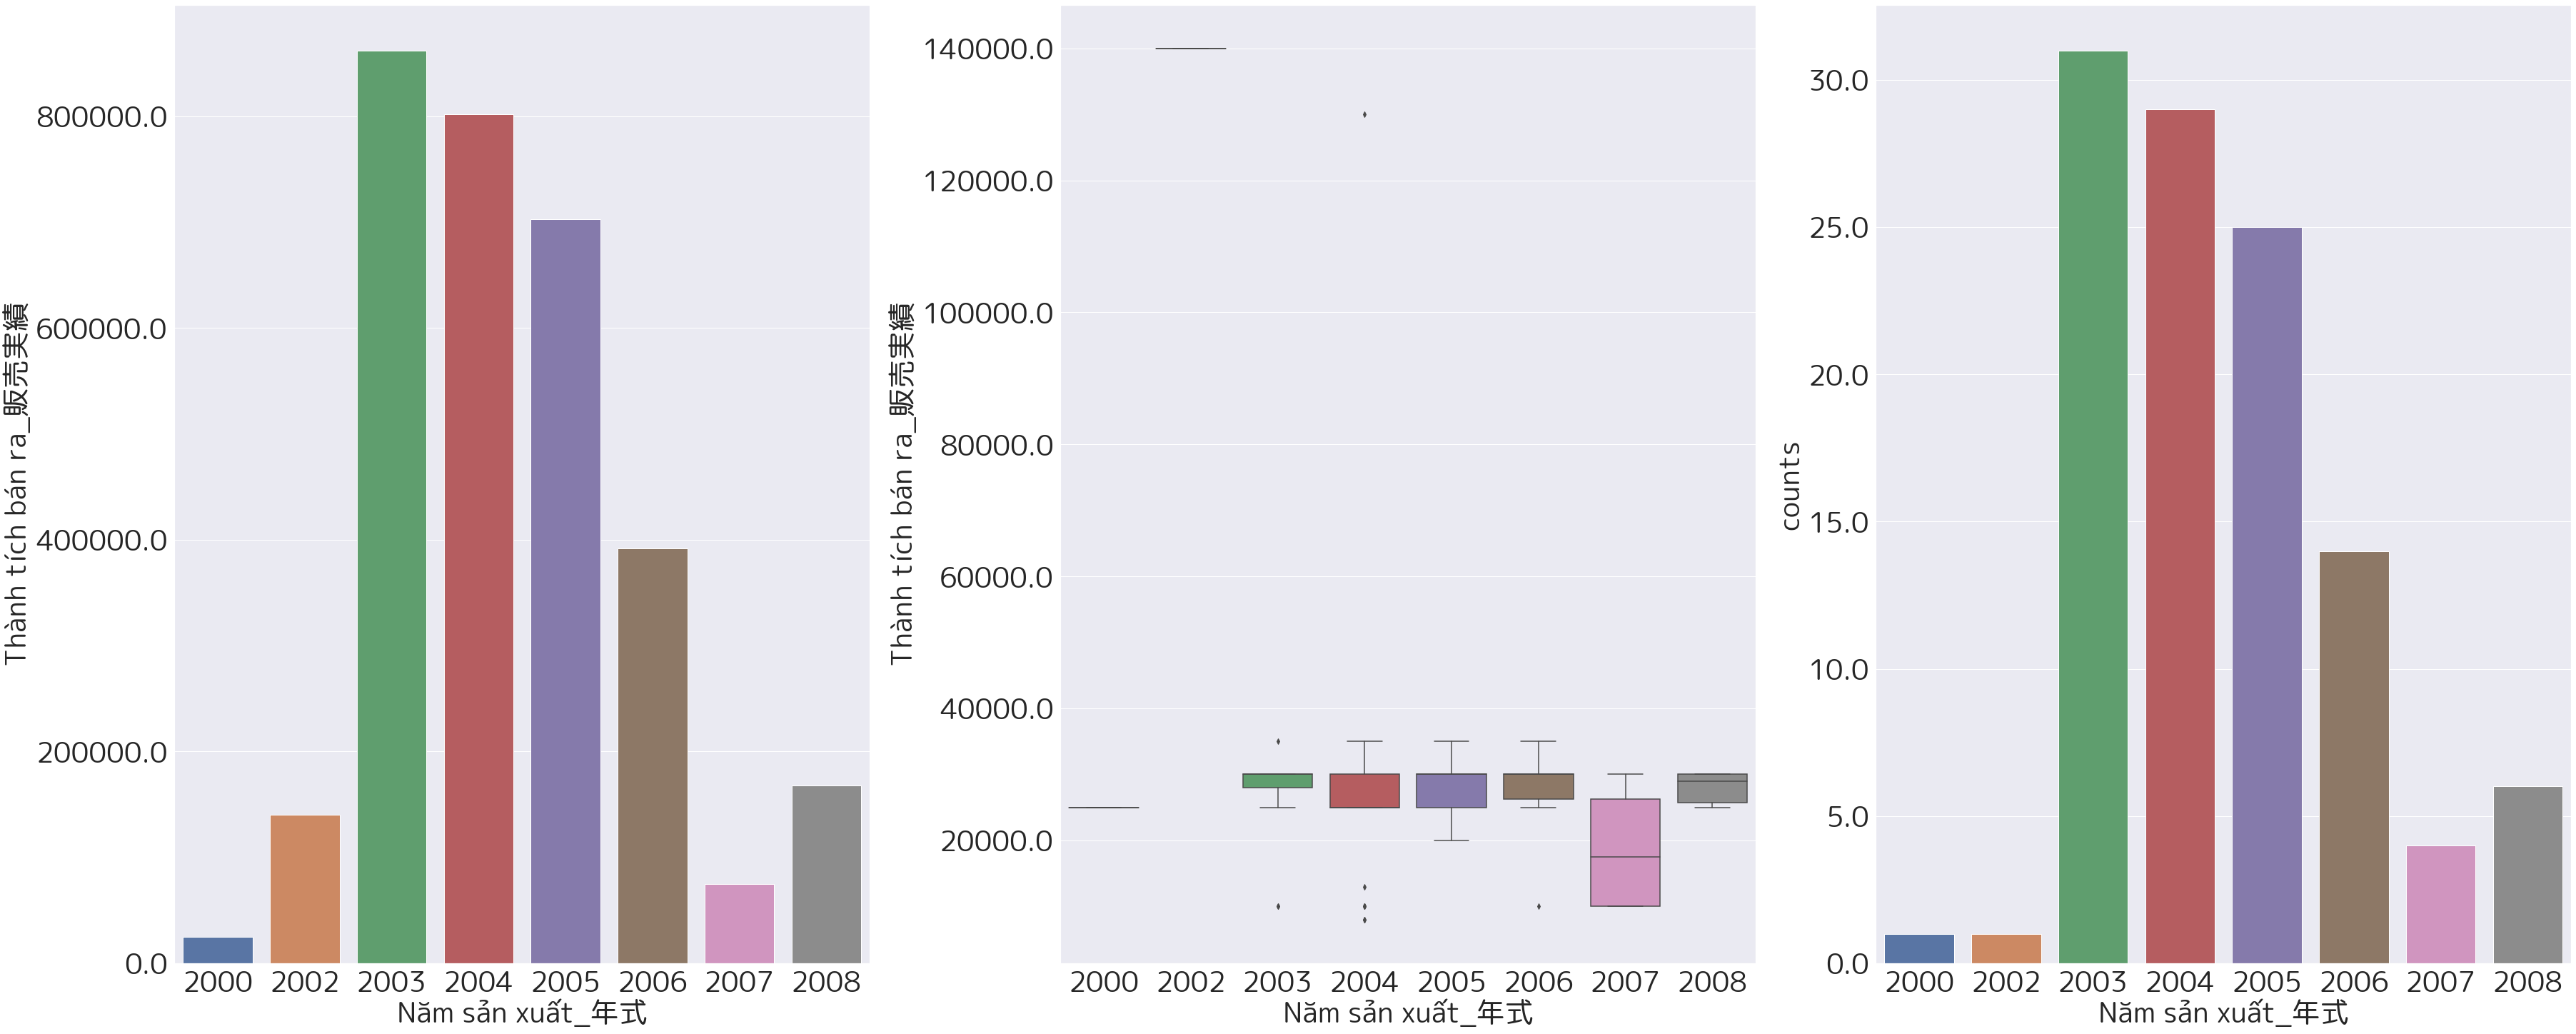

In [218]:
df_レガシィ_BP5_EJ20 = df_レガシィ_BP5[df_レガシィ_BP5['Engine model_エンジン型式'] == 'EJ20']
count_namsx = df_レガシィ_BP5_EJ20.groupby(['Năm sản xuất_年式'])['Năm sản xuất_年式'].count().reset_index(name='counts')
sum_namsx = df_レガシィ_BP5_EJ20.groupby(['Năm sản xuất_年式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
# plt.figure(figsize=(80,60))
# plt.xticks(fontsize = 60)
# plt.xlabel(xlabel = 'Engine model_エンジン型式' ,fontsize = 60)
# plt.yticks(fontsize = 60)
# plt.ylabel(ylabel = 'count',fontsize = 60)
# sns.barplot(data=df_ｴｽﾃｨﾏ_GSR55_2GR_FE, x="Engine model_エンジン型式",y='Thành tích bán ra_販売実績',ci=None)
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
# fig.tight_layout()
p = sns.barplot(x='Năm sản xuất_年式',y='sum',data=sum_namsx,ax=axs[0],ci=None)
q = sns.boxplot(x='Năm sản xuất_年式',y='Thành tích bán ra_販売実績',data=df_レガシィ_BP5_EJ20,ax=axs[1])
r = sns.barplot(x='Năm sản xuất_年式',y='counts',data=count_namsx,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Năm sản xuất_年式",fontsize = 40)
q.set_xlabel("Năm sản xuất_年式",fontsize = 40)
r.set_xlabel("Năm sản xuất_年式",fontsize = 40)

<ipython-input-219-89f73596b164>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-219-89f73596b164>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-219-89f73596b164>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 1_駆動1')

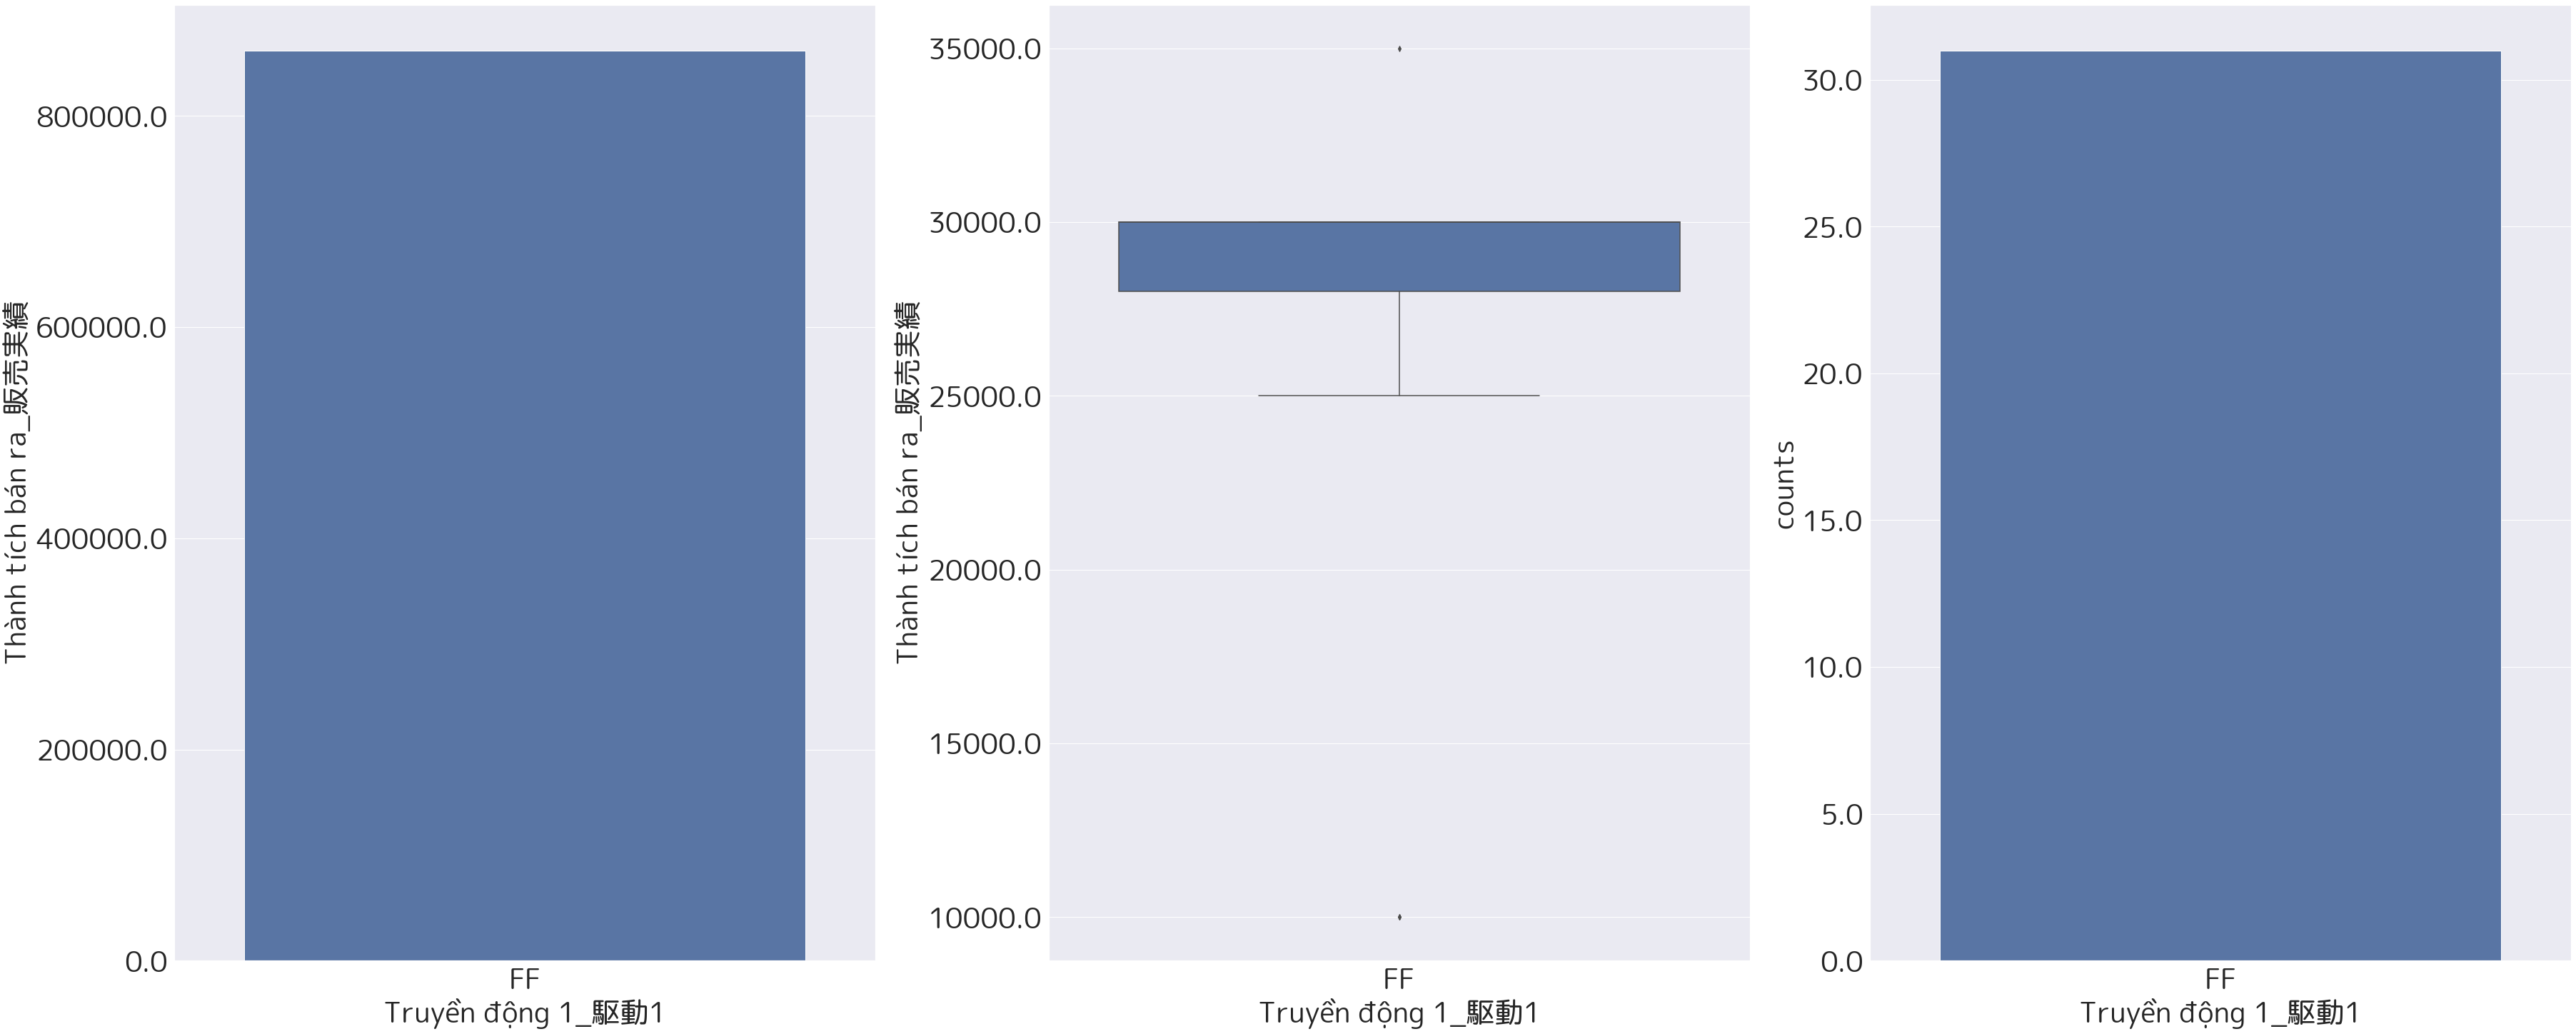

In [219]:
df_レガシィ_BP5_EJ20_2003 = df_レガシィ_BP5_EJ20[df_レガシィ_BP5_EJ20['Năm sản xuất_年式'] == 2003]
count_td1 = df_レガシィ_BP5_EJ20_2003.groupby(['Truyền động 1_駆動1'])['Truyền động 1_駆動1'].count().reset_index(name='counts')
sum_td1 = df_レガシィ_BP5_EJ20_2003.groupby(['Truyền động 1_駆動1'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 1_駆動1',y='sum',data=sum_td1,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 1_駆動1',y='Thành tích bán ra_販売実績',data=df_レガシィ_BP5_EJ20_2003,ax=axs[1])
r = sns.barplot(x='Truyền động 1_駆動1',y='counts',data=count_td1,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
q.set_xlabel("Truyền động 1_駆動1",fontsize = 40)
r.set_xlabel("Truyền động 1_駆動1",fontsize = 40)

<ipython-input-220-f31c2aac1f29>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-220-f31c2aac1f29>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-220-f31c2aac1f29>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =40)


Text(0.5, 0, 'Truyền động 2_駆動2')

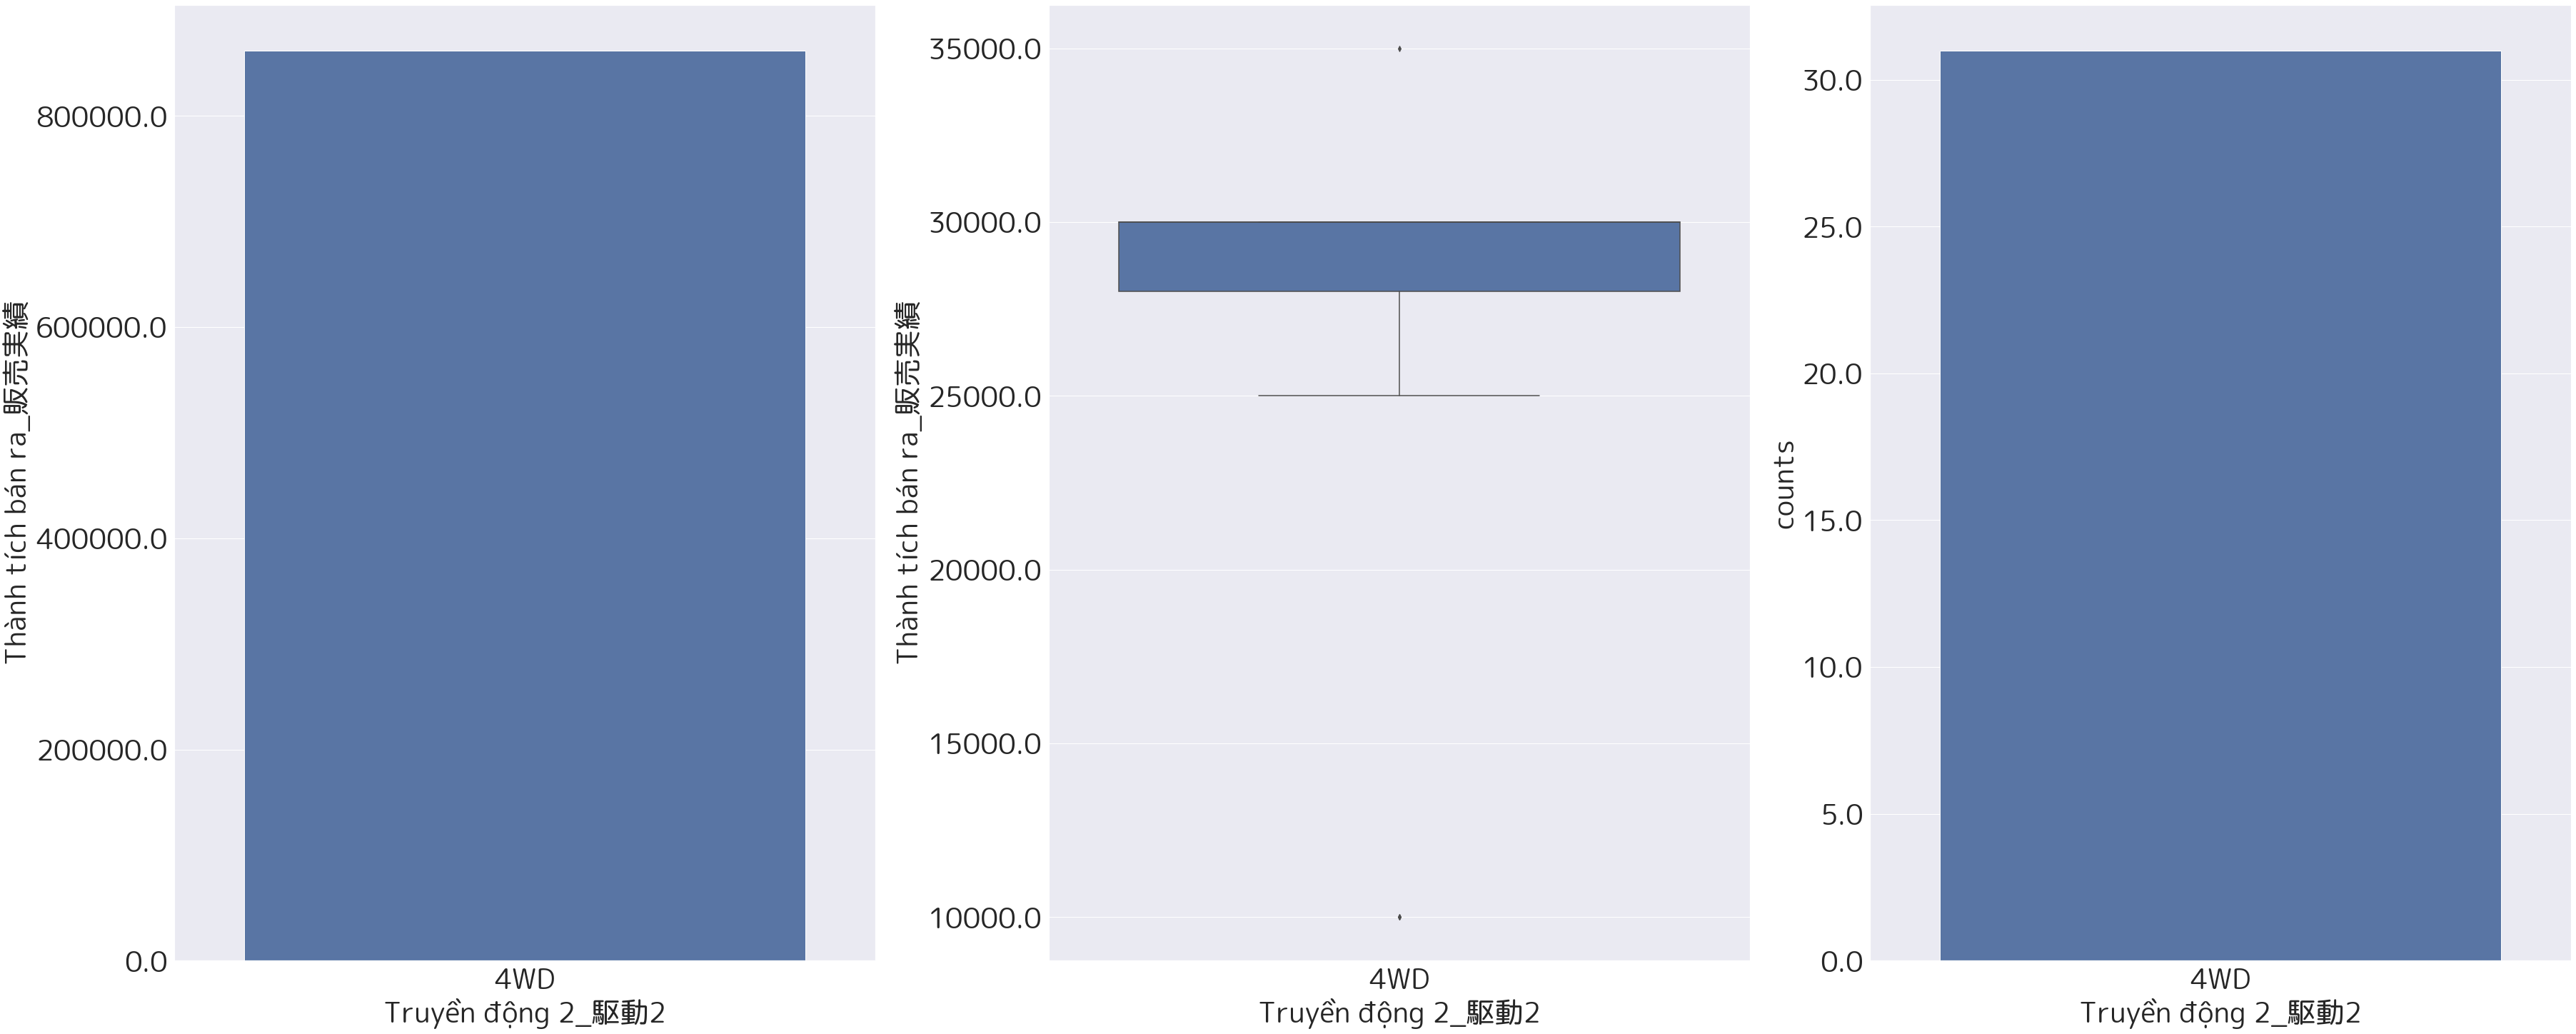

In [220]:
df_レガシィ_BP5_EJ20_2003_FF = df_レガシィ_BP5_EJ20_2003[df_レガシィ_BP5_EJ20_2003['Truyền động 1_駆動1'] == 'FF']
count_td2 = df_レガシィ_BP5_EJ20_2003_FF.groupby(['Truyền động 2_駆動2'])['Truyền động 2_駆動2'].count().reset_index(name='counts')
sum_td2 = df_レガシィ_BP5_EJ20_2003_FF.groupby(['Truyền động 2_駆動2'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Truyền động 2_駆動2',y='sum',data=sum_td2,ax=axs[0],ci=None)
q = sns.boxplot(x='Truyền động 2_駆動2',y='Thành tích bán ra_販売実績',data=df_レガシィ_BP5_EJ20_2003_FF,ax=axs[1])
r = sns.barplot(x='Truyền động 2_駆動2',y='counts',data=count_td2,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,weight = 'bold')
q.set_xticklabels(q.get_xticklabels(),size =40,weight = 'bold')
r.set_xticklabels(r.get_xticklabels(),size =40)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =40)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
q.set_xlabel("Truyền động 2_駆動2",fontsize = 40)
r.set_xlabel("Truyền động 2_駆動2",fontsize = 40)